# Algorithms for unconstrained nonlinear optimization : Direct methods
-----
## Goal
The use of direct methods (one-dimensional methods of exhaustive search,
dichotomy, golden section search; multidimensional methods of exhaustive search,
Gauss, Nelder-Mead) in the tasks of unconstrained nonlinear

------

## Problems and methods

I. Use the one-dimensional methods of exhaustive search, dichotomy and golden
section search to find an approximate (with precision 𝜀 = 0.001) solution
𝑥: 𝑓(𝑥) → 𝑚𝑖𝑛 for the following functions and domains:
1. 𝑓(𝑥) = 𝑥
3
, 𝑥 ∈ [0, 1];
2. 𝑓(𝑥) = |𝑥 − 0.2|, 𝑥 ∈ [0, 1];
3. 𝑓(𝑥) = 𝑥 𝑠𝑖𝑛 1
𝑥
, 𝑥 ∈ [0.01, 1].
Calculate the number of 𝑓-calculations and the number of iterations performed in
each method and analyze the results. Explain differences (if any) in the results
obtained.

II. Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1). Furthermore, generate the
noisy data {𝑥𝑘, 𝑦𝑘}, where 𝑘 = 0, … ,100, according to the following rule:
𝑦𝑘 = 𝛼𝑥𝑘 + 𝛽 + 𝛿𝑘, 𝑥𝑘 =
𝑘
100
,
where 𝛿𝑘~𝑁(0,1) are values of a random variable with standard normal
distribution. Approximate the data by the following linear and rational functions:
1. 𝐹(𝑥, 𝑎, 𝑏) = 𝑎𝑥 + 𝑏 (linear approximant),
2. 𝐹(𝑥, 𝑎, 𝑏) =
𝑎+𝑏𝑥
 (rational approximant),
by means of least squares through the numerical minimization (with precision 𝜀 = 0.001) of the following function:
𝐷(𝑎, 𝑏) = ∑(𝐹(𝑥𝑘, 𝑎, 𝑏) − 𝑦𝑘)^2

To solve the minimization problem, use the methods of exhaustive search, Gauss and
Nelder-Mead. If necessary, set the initial approximations and other parameters of
the methods. Visualize the data and the approximants obtained in a plot separately
for each type of approximant. Analyze the results obtained (in terms of number of
iterations, precision, number of function evaluations, etc.).

-----

## Content
### Part 1 : function defintion
### Part 2 : single vairable function opimization
### Part 3 : multivairable function opimization
### Part 4 : visualization 
------



In [1]:
'''
    import lib
'''
import math  
import random 
import numpy as np 
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import os 
import matplotlib.animation as animation

### Part 1 : function defintion 

In [57]:
'''
    define functions  
'''

EPS = 0.001
save_dir = '/home/ki/Downloads/'

def func1 (x) : 
    return x**3 

def func2 (x) : 
    return abs((x-0.2))

def func3 (x) :
    if x == 0 : 
        return 0   
    return x*math.sin(1/x)

def exhaustive_search(func= 'func1',interval=[0,1]):
    a,b=interval[0],interval[1]
    n = (b-a)/EPS  
    n= math.floor(n)+1
    x_min = -1
    min_f_x = 10E6  # very large number
    to_save = { 'x_min' :[], 'min_f_x' : []}
    for k in range(n) : 
        x = a + k * ((b-a)/n)
        f_x = func_list[func](x)
        if f_x < min_f_x : 
            x_min = x 
            min_f_x=f_x
            to_save['x_min'].append(x_min)
            to_save['min_f_x'].append(min_f_x)
    
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'exhaustive_search_'+func+'.csv')  
    to_save_df.to_csv(full_name)
    return x_min,n,n


def dichotomy_method(func= 'func1',interval=[0,1]):
    delta = EPS/2
    a0,b0 = interval[0],interval[1]
    ak,bk=a0,b0
    k=0
    to_save = { 'x_min' :[], 'min_f_x' : []}
    while abs(ak-bk) >= EPS :
        k+=1
        x1= (ak+bk-delta)/2
        x2=(ak+bk+delta)/2
        f_x1 = func_list[func](x1)
        f_x2 = func_list[func](x2)
        
        if f_x1<= f_x2 : 
            to_save['x_min'].append(x2)
            to_save['min_f_x'].append(f_x2)
            bk=x2
        elif f_x1>f_x2 : 
            to_save['x_min'].append(x1)
            to_save['min_f_x'].append(f_x1)
            ak=x1
    
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'dichotomy_method'+func+'.csv')  
    to_save_df.to_csv(full_name)

    return (ak+bk)/2,k,2*k


def golden_section(func= 'func1',interval=[0,1]):
    a0,b0 = interval[0],interval[1]
    ak,bk=a0,b0
    k=0
    fac1 = (3-math.sqrt(5))/2
    fac2=  (math.sqrt(5)-3)/2
    x1= a0 + fac1*(b0-a0)
    x2= b0+ fac2*(b0-a0)
    f_x1 = func_list[func](x1)
    f_x2 = func_list[func](x2)
    k=0 
    to_save = { 'x_min' :[], 'min_f_x' : []}
    while abs(ak-bk) >= EPS : 
        k+=1
        if f_x1 <= f_x2: 
            bk=x2
            x2=x1
            f_x2=f_x1
            x1=  ak + fac1*(bk-ak)
            f_x1 = func_list[func](x1)
            to_save['x_min'].append(x1)
            to_save['min_f_x'].append(f_x1)
        elif  f_x1 > f_x2:
            ak=x1
            x1=x2
            x2=  bk + fac2*(bk-ak)
            f_x1=f_x2
            f_x2 = func_list[func](x2)
            to_save['x_min'].append(x2)
            to_save['min_f_x'].append(f_x2)
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'golden_section'+func+'.csv')  
    to_save_df.to_csv(full_name)      
    return abs(ak+bk)/2,k,2+k 




def  linear_approx(param,x) : 
    a,b= param[0],param[1]
    return a*x+b

def  rational_approx(param,x) : 
    a,b= param[0],param[1]
    return a/(1+b*x)



def least_squares(param,X,Y,func='rational') :
    values = [(func_list[func](param,x)-y)**2 for x,y in zip(X,Y)  ]
    error = sum(values) 
    return error

def exahusted_grid_search(func,X,Y) : 
    interval = [-1,1]
    a,b=interval[0],interval[1]
    n = (b-a)/EPS  
    n= math.floor(n)+1
   
    min_f_x = 10e6  # very large number
    A=0
    B=0
    for i in range(n) :
        
        xa= a + i * ((b-a)/n)
        
        for k in range(n) :
            xb = a + k * ((b-a)/n)
            f_x = least_squares([xb,xa],X,Y,func)
            if f_x < min_f_x : 
                A =xa
                B= xb
                min_f_x=f_x
                print([A,B])
                print(f_x)
    return [A,B],n**2,n**2 
    

def Gauss_method(func,X,Y) :
    interval = [-1,1]
    A=0
    B=0 
    f_x  = 0
    f_x_prev = 10e6 
    total_itr= 0 
    total_calls= 0 
    to_save = { 'min_a' :[],'min_b' : [], 'min_f_x' : []}
    while abs (f_x_prev-f_x) : 

        #fixed a 
        a0,b0 = interval[0],interval[1]
        ak,bk=a0,b0
        k=0
        fac1 = (3-math.sqrt(5))/2
        fac2=  (math.sqrt(5)-3)/2
        x1= a0 + fac1*(b0-a0)
        x2= b0+ fac2*(b0-a0)
        f_x1 = least_squares([A,x1],X,Y,func)
        f_x2 = least_squares([A,x2],X,Y,func)
        k=0 
        while abs(ak-bk) >= EPS : 
            k+=1
            if f_x1 <= f_x2: 
                bk=x2
                x2=x1
                f_x2=f_x1
                x1=  ak + fac1*(bk-ak)
                f_x1 = least_squares([A,x1],X,Y,func)
            elif  f_x1 > f_x2:
                ak=x1
                x1=x2
                x2=  bk + fac2*(bk-ak)
                f_x1=f_x2
                f_x2 = least_squares([A,x2],X,Y,func)
        total_itr+= k 
        total_calls += k+2
        B=(ak+bk)/2
        to_save['min_a'].append(A)
        to_save['min_b'].append(B)
        to_save['min_f_x'].append(least_squares([A,B],X,Y,func))
        
        #fixed b 
        a0,b0 = interval[0],interval[1]
        ak,bk=a0,b0
        k=0
        fac1 = (3-math.sqrt(5))/2
        fac2=  (math.sqrt(5)-3)/2
        x1= a0 + fac1*(b0-a0)
        x2= b0+ fac2*(b0-a0)
        f_x1 = least_squares([x1,B],X,Y,func)
        f_x2 = least_squares([x2,B],X,Y,func)
        k=0 
        while abs(ak-bk) >= EPS : 
            k+=1
            if f_x1 <= f_x2: 
                bk=x2
                x2=x1
                f_x2=f_x1
                x1=  ak + fac1*(bk-ak)
                f_x1 = least_squares([x1,B],X,Y,func)
            elif  f_x1 > f_x2:
                ak=x1
                x1=x2
                x2=  bk + fac2*(bk-ak)
                f_x1=f_x2
                f_x2 = least_squares([x2,B],X,Y,func)
        total_itr+= k 
        total_calls += k+2
        A=(ak+bk)/2
        f_x_prev = f_x 
        f_x = least_squares([A,B],X,Y,func)
        to_save['min_a'].append(A)
        to_save['min_b'].append(B)
        to_save['min_f_x'].append(least_squares([A,B],X,Y,func))
        
        print([A,B])
        print(f_x)
    to_save_df =pd.DataFrame(data=to_save)    
    full_name =os.path.join(save_dir, 'gauss_2d'+func+'.csv')  
    to_save_df.to_csv(full_name)    
    return [A,B],total_itr,total_calls

func_list = {  
    'func1'  : lambda x : func1(x),
    'func2' :  lambda x : func2(x) , 
    'func3' :  lambda x : func3(x),
    'linear' : lambda param,x : linear_approx(param,x),
    'rational': lambda param,x : rational_approx(param,x)
}


### Part 2: single variable function opimization using exhaustive_search, dichotomy_method, golden_section

In [11]:
res = exhaustive_search('func3',[0.001,1])
print(res)

(0.22277800000000003, 1000, 1000)


In [25]:
res = dichotomy_method('func3',[0.001,1])
print(res)

(0.04244787597656249, 11, 22)


In [13]:
res = golden_section('func3',[0.001,1])
print(res)

(0.22259084119572914, 15, 17)


### Part 3 : multivariable function optimization 

In [26]:
'''
    generate data 
'''
a =random.random()
b=random.random()
delta =np.random.normal(size=100)
X = [k/100 for k in range(100)]
Y = [a*x_k+b+delta_k for x_k,delta_k in zip(X,delta)]

In [58]:
'''
    Nelder-Mead method using scipy.optimize
'''
EPS =0.001
initail_param = [1.0,1.0]
res = optimize.minimize(least_squares, initail_param[:], args=(X,Y), method="Nelder-Mead",tol=EPS) 
print(res)

 final_simplex: (array([[ 0.86518944, -0.11931988],
       [ 0.86493673, -0.11991698],
       [ 0.86562926, -0.11888448]]), array([78.21407532, 78.21407682, 78.21407846]))
           fun: 78.21407531961344
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 37
        status: 0
       success: True
             x: array([ 0.86518944, -0.11931988])


In [14]:
'''
    exahusted_grid_search method using our implementation 
'''
res = exahusted_grid_search('rational',X,Y)  
print(res)

[-1.0, -1.0]
17766.49516985507
[-1.0, -0.99990000499975]
17763.099896143987
[-1.0, -0.9998000099995]
17759.704949396993
[-1.0, -0.99970001499925]
17756.310329614076
[-1.0, -0.9996000199990001]
17752.91603679525
[-1.0, -0.99950002499875]
17749.5220709405
[-1.0, -0.9994000299985001]
17746.128432049838
[-1.0, -0.99930003499825]
17742.735120123256
[-1.0, -0.9992000399980001]
17739.342135160754
[-1.0, -0.9991000449977501]
17735.949477162336
[-1.0, -0.9990000499975001]
17732.557146128005
[-1.0, -0.9989000549972501]
17729.165142057755
[-1.0, -0.9988000599970002]
17725.77346495159
[-1.0, -0.9987000649967501]
17722.3821148095
[-1.0, -0.9986000699965002]
17718.9910916315
[-1.0, -0.9985000749962502]
17715.600395417576
[-1.0, -0.9984000799960002]
17712.210026167744
[-1.0, -0.9983000849957502]
17708.819983881986
[-1.0, -0.9982000899955003]
17705.430268560318
[-1.0, -0.9981000949952502]
17702.04088020273
[-1.0, -0.9980000999950003]
17698.651818809223
[-1.0, -0.9979001049947502]
17695.2630843798
[-1.

[-1.0, -0.8935053247337633]
14335.779977595248
[-1.0, -0.8934053297335134]
14332.732920632367
[-1.0, -0.8933053347332633]
14329.686190633562
[-1.0, -0.8932053397330133]
14326.639787598842
[-1.0, -0.8931053447327634]
14323.593711528207
[-1.0, -0.8930053497325133]
14320.547962421653
[-1.0, -0.8929053547322634]
14317.50254027918
[-1.0, -0.8928053597320134]
14314.45744510079
[-1.0, -0.8927053647317634]
14311.41267688649
[-1.0, -0.8926053697315134]
14308.368235636266
[-1.0, -0.8925053747312635]
14305.324121350128
[-1.0, -0.8924053797310134]
14302.28033402807
[-1.0, -0.8923053847307635]
14299.236873670096
[-1.0, -0.8922053897305134]
14296.193740276203
[-1.0, -0.8921053947302635]
14293.150933846397
[-1.0, -0.8920053997300135]
14290.108454380672
[-1.0, -0.8919054047297635]
14287.06630187903
[-1.0, -0.8918054097295135]
14284.024476341467
[-1.0, -0.8917054147292636]
14280.982977767992
[-1.0, -0.8916054197290135]
14277.941806158595
[-1.0, -0.8915054247287636]
14274.900961513285
[-1.0, -0.89140542

11403.129927737944
[-1.0, -0.7916104194790261]
11400.415720211362
[-1.0, -0.7915104244787761]
11397.701839648858
[-1.0, -0.791410429478526]
11394.98828605044
[-1.0, -0.7913104344782761]
11392.275059416108
[-1.0, -0.7912104394780262]
11389.56215974586
[-1.0, -0.7911104444777761]
11386.849587039687
[-1.0, -0.7910104494775261]
11384.1373412976
[-1.0, -0.7909104544772761]
11381.425422519596
[-1.0, -0.7908104594770262]
11378.713830705678
[-1.0, -0.7907104644767762]
11376.00256585584
[-1.0, -0.7906104694765261]
11373.291627970084
[-1.0, -0.7905104744762762]
11370.581017048415
[-1.0, -0.7904104794760263]
11367.870733090826
[-1.0, -0.7903104844757762]
11365.160776097317
[-1.0, -0.7902104894755262]
11362.451146067891
[-1.0, -0.7901104944752763]
11359.741843002552
[-1.0, -0.7900104994750262]
11357.032866901292
[-1.0, -0.7899105044747763]
11354.32421776412
[-1.0, -0.7898105094745262]
11351.615895591029
[-1.0, -0.7897105144742763]
11348.907900382015
[-1.0, -0.7896105194740263]
11346.20023213709
[-

[-1.0, -0.6845157742112895]
8681.195152763285
[-1.0, -0.6844157792110395]
8678.831450733476
[-1.0, -0.6843157842107894]
8676.468075667748
[-1.0, -0.6842157892105395]
8674.105027566107
[-1.0, -0.6841157942102896]
8671.742306428545
[-1.0, -0.6840157992100395]
8669.379912255066
[-1.0, -0.6839158042097895]
8667.01784504567
[-1.0, -0.6838158092095395]
8664.656104800359
[-1.0, -0.6837158142092896]
8662.294691519131
[-1.0, -0.6836158192090396]
8659.933605201983
[-1.0, -0.6835158242087895]
8657.572845848917
[-1.0, -0.6834158292085396]
8655.212413459936
[-1.0, -0.6833158342082897]
8652.852308035039
[-1.0, -0.6832158392080396]
8650.492529574223
[-1.0, -0.6831158442077896]
8648.13307807749
[-1.0, -0.6830158492075397]
8645.773953544842
[-1.0, -0.6829158542072896]
8643.415155976274
[-1.0, -0.6828158592070397]
8641.05668537179
[-1.0, -0.6827158642067896]
8638.698541731386
[-1.0, -0.6826158692065396]
8636.340725055066
[-1.0, -0.6825158742062897]
8633.983235342832
[-1.0, -0.6824158792060397]
8631.6260

[-1.0, -0.591520423978801]
6624.195844353868
[-1.0, -0.5914204289785511]
6622.136218921075
[-1.0, -0.5913204339783011]
6620.076920452364
[-1.0, -0.5912204389780511]
6618.017948947734
[-1.0, -0.5911204439778011]
6615.959304407186
[-1.0, -0.5910204489775511]
6613.900986830724
[-1.0, -0.5909204539773012]
6611.8429962183445
[-1.0, -0.5908204589770512]
6609.785332570045
[-1.0, -0.5907204639768011]
6607.727995885829
[-1.0, -0.5906204689765512]
6605.670986165698
[-1.0, -0.5905204739763013]
6603.614303409649
[-1.0, -0.5904204789760512]
6601.557947617681
[-1.0, -0.5903204839758012]
6599.501918789796
[-1.0, -0.5902204889755512]
6597.446216925997
[-1.0, -0.5901204939753013]
6595.39084202628
[-1.0, -0.5900204989750513]
6593.3357940906435
[-1.0, -0.5899205039748012]
6591.281073119089
[-1.0, -0.5898205089745513]
6589.22667911162
[-1.0, -0.5897205139743014]
6587.172612068236
[-1.0, -0.5896205189740513]
6585.118871988931
[-1.0, -0.5895205239738013]
6583.065458873708
[-1.0, -0.5894205289735513]
6581.01

[-1.0, -0.49752512374381286]
4832.446996193861
[-1.0, -0.4974251287435628]
4830.694716998907
[-1.0, -0.4973251337433129]
4828.94276476804
[-1.0, -0.49722513874306284]
4827.191139501252
[-1.0, -0.4971251437428129]
4825.439841198549
[-1.0, -0.4970251487425629]
4823.688869859928
[-1.0, -0.49692515374231294]
4821.93822548539
[-1.0, -0.4968251587420629]
4820.187908074934
[-1.0, -0.49672516374181297]
4818.437917628562
[-1.0, -0.49662516874156293]
4816.688254146271
[-1.0, -0.496525173741313]
4814.938917628066
[-1.0, -0.49642517874106296]
4813.189908073941
[-1.0, -0.496325183740813]
4811.441225483901
[-1.0, -0.496225188740563]
4809.692869857941
[-1.0, -0.49612519374031305]
4807.944841196066
[-1.0, -0.496025198740063]
4806.197139498272
[-1.0, -0.4959252037398131]
4804.449764764564
[-1.0, -0.49582520873956304]
4802.702716994936
[-1.0, -0.495725213739313]
4800.95599618939
[-1.0, -0.49562521873906307]
4799.20960234793
[-1.0, -0.495525223738813]
4797.46353547055
[-1.0, -0.4954252287385631]
4795.717

[-1.0, -0.39483025848707565]
3205.117616971167
[-1.0, -0.3947302634868257]
3203.701129889263
[-1.0, -0.3946302684865757]
3202.28496977144
[-1.0, -0.39453027348632574]
3200.8691366177013
[-1.0, -0.3944302784860757]
3199.4536304280446
[-1.0, -0.39433028348582577]
3198.0384512024707
[-1.0, -0.39423028848557573]
3196.623598940979
[-1.0, -0.3941302934853258]
3195.2090736435725
[-1.0, -0.39403029848507576]
3193.7948753102464
[-1.0, -0.39393030348482583]
3192.3810039410037
[-1.0, -0.3938303084845758]
3190.967459535844
[-1.0, -0.39373031348432586]
3189.5542420947672
[-1.0, -0.3936303184840758]
3188.1413516177727
[-1.0, -0.3935303234838259]
3186.728788104863
[-1.0, -0.39343032848357584]
3185.3165515560336
[-1.0, -0.3933303334833258]
3183.9046419712868
[-1.0, -0.39323033848307587]
3182.4930593506247
[-1.0, -0.39313034348282583]
3181.0818036940445
[-1.0, -0.3930303484825759]
3179.6708750015473
[-1.0, -0.39293035348232586]
3178.260273273132
[-1.0, -0.3928303584820759]
3176.849998508802
[-1.0, -0.3

2125.918684447129
[-1.0, -0.31033448327583624]
2124.778155051118
[-1.0, -0.3102344882755862]
2123.637952619188
[-1.0, -0.31013449327533626]
2122.498077151342
[-1.0, -0.3100344982750862]
2121.3585286475773
[-1.0, -0.3099345032748363]
2120.2193071078964
[-1.0, -0.30983450827458625]
2119.080412532298
[-1.0, -0.3097345132743363]
2117.9418449207833
[-1.0, -0.3096345182740863]
2116.80360427335
[-1.0, -0.30953452327383635]
2115.665690590001
[-1.0, -0.3094345282735863]
2114.528103870733
[-1.0, -0.3093345332733364]
2113.3908441155495
[-1.0, -0.30923453827308633]
2112.2539113244475
[-1.0, -0.3091345432728364]
2111.11730549743
[-1.0, -0.30903454827258636]
2109.981026634494
[-1.0, -0.30893455327233643]
2108.8450747356414
[-1.0, -0.3088345582720864]
2107.7094498008705
[-1.0, -0.30873456327183646]
2106.574151830184
[-1.0, -0.3086345682715864]
2105.4391808235787
[-1.0, -0.3085345732713365]
2104.3045367810582
[-1.0, -0.30843457827108645]
2103.1702197026184
[-1.0, -0.3083345832708365]
2102.036229588263

1506.9761041395495
[-1.0, -0.25103744812759365]
1506.0294644446449
[-1.0, -0.2509374531273436]
1505.0831517138222
[-1.0, -0.2508374581270937]
1504.137165947083
[-1.0, -0.25073746312684364]
1503.191507144426
[-1.0, -0.2506374681265937]
1502.2461753058524
[-1.0, -0.25053747312634367]
1501.3011704313606
[-1.0, -0.25043747812609374]
1500.356492520953
[-1.0, -0.2503374831258437]
1499.4121415746267
[-1.0, -0.25023748812559377]
1498.4681175923847
[-1.0, -0.2501374931253437]
1497.5244205742245
[-1.0, -0.2500374981250938]
1496.581050520148
[-1.0, -0.24993750312484375]
1495.6380074301533
[-1.0, -0.24983750812459382]
1494.695291304242
[-1.0, -0.24973751312434378]
1493.752902142413
[-1.0, -0.24963751812409385]
1492.8108399446678
[-1.0, -0.2495375231238438]
1491.8691047110044
[-1.0, -0.24943752812359388]
1490.9276964414248
[-1.0, -0.24933753312334384]
1489.9866151359265
[-1.0, -0.2492375381230939]
1489.0458607945127
[-1.0, -0.24913754312284386]
1488.1054334171804
[-1.0, -0.24903754812259393]
1487.1

797.0985144217545
[-1.0, -0.1625418729063547]
796.441237940137
[-1.0, -0.16244187790610476]
795.7842884226029
[-1.0, -0.16234188290585472]
795.1276658691509
[-1.0, -0.1622418879056048]
794.4713702797826
[-1.0, -0.16214189290535475]
793.8154016544962
[-1.0, -0.16204189790510481]
793.1597599932934
[-1.0, -0.16194190290485477]
792.5044452961729
[-1.0, -0.16184190790460484]
791.8494575631357
[-1.0, -0.1617419129043548]
791.1947967941808
[-1.0, -0.16164191790410487]
790.5404629893092
[-1.0, -0.16154192290385483]
789.8864561485195
[-1.0, -0.1614419279036049]
789.2327762718138
[-1.0, -0.16134193290335486]
788.57942335919
[-1.0, -0.16124193790310493]
787.9263974106498
[-1.0, -0.16114194290285488]
787.2736984261915
[-1.0, -0.16104194790260484]
786.621326405816
[-1.0, -0.1609419529023549]
785.9692813495242
[-1.0, -0.16084195790210487]
785.3175632573145
[-1.0, -0.16074196290185494]
784.6661721291885
[-1.0, -0.1606419679016049]
784.0151079651442
[-1.0, -0.16054197290135497]
783.3643707651836
[-1.0

[-1.0, -0.09894505274736265]
444.6452020303526
[-1.0, -0.09884505774711272]
444.19620166948647
[-1.0, -0.09874506274686268]
443.7475282727026
[-1.0, -0.09864506774661275]
443.299181840002
[-1.0, -0.0985450727463627]
442.8511623713838
[-1.0, -0.09844507774611277]
442.40346986684904
[-1.0, -0.09834508274586273]
441.95610432639637
[-1.0, -0.0982450877456128]
441.5090657500271
[-1.0, -0.09814509274536276]
441.06235413774016
[-1.0, -0.09804509774511272]
440.6159694895359
[-1.0, -0.09794510274486279]
440.16991180541515
[-1.0, -0.09784510774461275]
439.72418108537653
[-1.0, -0.09774511274436282]
439.27877732942136
[-1.0, -0.09764511774411277]
438.83370053754834
[-1.0, -0.09754512274386284]
438.38895070975866
[-1.0, -0.0974451277436128]
437.9445278460515
[-1.0, -0.09734513274336287]
437.50043194642745
[-1.0, -0.09724513774311283]
437.056663010886
[-1.0, -0.0971451427428629]
436.6132210394276
[-1.0, -0.09704514774261286]
436.1701060320515
[-1.0, -0.09694515274236293]
435.72731798875884
[-1.0, -

[-1.0, -4.99975001250208e-05]
160.3273792162577
[-1.0, 4.999750012490978e-05]
160.20174633329174
[-1.0, 0.00014999250037495138]
160.0764404144084
[-1.0, 0.000249987500624993]
159.95146145960788
[-1.0, 0.0003499825008750346]
159.82680946889025
[-1.0, 0.00044997750112485413]
159.70248444225567
[-1.0, 0.0005499725013748957]
159.57848637970358
[-1.0, 0.0006499675016249373]
159.45481528123435
[-1.0, 0.0007499625018749789]
159.33147114684792
[-1.0, 0.0008499575021247985]
159.20845397654458
[-1.0, 0.0009499525023748401]
159.08576377032378
[-1.0, 0.0010499475026248817]
158.9634005281858
[-1.0, 0.0011499425028749233]
158.84136425013065
[-1.0, 0.0012499375031247428]
158.71965493615855
[-1.0, 0.0013499325033747844]
158.598272586269
[-1.0, 0.001449927503624826]
158.47721720046218
[-1.0, 0.0015499225038748676]
158.35648877873828
[-1.0, 0.0016499175041246872]
158.23608732109741
[-1.0, 0.0017499125043747288]
158.1160128275391
[-1.0, 0.0018499075046247704]
157.99626529806358
[-1.0, 0.00194990250487481

[-0.99990000499975, 0.0356482175891204]
136.11800747166328
[-0.99990000499975, 0.03574821258937044]
136.10788373279982
[-0.99990000499975, 0.035848207589620484]
136.09808227880032
[-0.99990000499975, 0.035948202589870526]
136.08860310966475
[-0.99990000499975, 0.03604819759012057]
136.0794462253932
[-0.99990000499975, 0.03614819259037039]
136.07061162598558
[-0.99990000499975, 0.03624818759062043]
136.06209931144193
[-0.99990000499975, 0.03634818259087047]
136.05390928176215
[-0.99990000499975, 0.03644817759112051]
136.0460415369465
[-0.99990000499975, 0.03654817259137033]
136.0384960769947
[-0.99990000499975, 0.03664816759162037]
136.03127290190676
[-0.99990000499975, 0.036748162591870415]
136.02437201168297
[-0.99990000499975, 0.036848157592120456]
136.01779340632302
[-0.99990000499975, 0.036948152592370276]
136.01153708582706
[-0.99990000499975, 0.03704814759262032]
136.00560305019508
[-0.99990000499975, 0.03714814259287036]
135.99999129942705
[-0.99990000499975, 0.0372481375931204]

[-0.9994000299985001, 0.037648117594120345]
135.26185915851934
[-0.9994000299985001, 0.037748112594370165]
135.2521961786813
[-0.9994000299985001, 0.037848107594620206]
135.24283383542576
[-0.9994000299985001, 0.03794810259487025]
135.23377212875272
[-0.9994000299985001, 0.03804809759512029]
135.22501105866215
[-0.9994000299985001, 0.03814809259537011]
135.21655062515416
[-0.9994000299985001, 0.03824808759562015]
135.20839082822854
[-0.9994000299985001, 0.03834808259587019]
135.20053166788546
[-0.9994000299985001, 0.038448077596120234]
135.19297314412484
[-0.9994000299985001, 0.03854807259637005]
135.18571525694676
[-0.9994000299985001, 0.038648067596620095]
135.17875800635116
[-0.9994000299985001, 0.038748062596870136]
135.17210139233805
[-0.9994000299985001, 0.03884805759712018]
135.1657454149074
[-0.9994000299985001, 0.03894805259737]
135.1596900740592
[-0.9994000299985001, 0.03904804759762004]
135.15393536979352
[-0.9994000299985001, 0.03914804259787008]
135.1484813021104
[-0.99940

[-0.9990000499975001, 0.03924803759812012]
134.59659164284005
[-0.9990000499975001, 0.03934803259836994]
134.58730440587232
[-0.9990000499975001, 0.039448027598619984]
134.5783023468649
[-0.9990000499975001, 0.039548022598870025]
134.5695854658178
[-0.9990000499975001, 0.03964801759912007]
134.5611537627311
[-0.9990000499975001, 0.03974801259937011]
134.55300723760467
[-0.9990000499975001, 0.03984800759961993]
134.54514589043865
[-0.9990000499975001, 0.03994800259986997]
134.53756972123296
[-0.9990000499975001, 0.04004799760012001]
134.53027872998766
[-0.9990000499975001, 0.04014799260037005]
134.52327291670272
[-0.9990000499975001, 0.04024798760061987]
134.51655228137798
[-0.9990000499975001, 0.040347982600869914]
134.51011682401366
[-0.9990000499975001, 0.040447977601119955]
134.50396654460982
[-0.9990000499975001, 0.04054797260137]
134.49810144316618
[-0.9990000499975001, 0.04064796760161982]
134.49252151968292
[-0.9990000499975001, 0.04074796260186986]
134.48722677416004
[-0.999000

[-0.9986000699965002, 0.0408479576021199]
133.94822223830099
[-0.9986000699965002, 0.04094795260236994]
133.9393160834619
[-0.9986000699965002, 0.04104794760261976]
133.93068106723757
[-0.9986000699965002, 0.0411479426028698]
133.92231718962802
[-0.9986000699965002, 0.041247937603119844]
133.91422445063316
[-0.9986000699965002, 0.041347932603369886]
133.90640285025304
[-0.9986000699965002, 0.041447927603619705]
133.89885238848765
[-0.9986000699965002, 0.04154792260386975]
133.89157306533704
[-0.9986000699965002, 0.04164791760411979]
133.88456488080126
[-0.9986000699965002, 0.04174791260436983]
133.87782783488007
[-0.9986000699965002, 0.04184790760461965]
133.8713619275737
[-0.9986000699965002, 0.04194790260486969]
133.86516715888206
[-0.9986000699965002, 0.04204789760511973]
133.8592435288051
[-0.9986000699965002, 0.042147892605369774]
133.853591037343
[-0.9986000699965002, 0.042247887605619594]
133.84820968449566
[-0.9986000699965002, 0.042347882605869636]
133.8430994702629
[-0.998600

[-0.9982000899955003, 0.042347882605869636]
133.32501870576644
[-0.9982000899955003, 0.04244787760611968]
133.3162397122558
[-0.9982000899955003, 0.04254787260636972]
133.30771905836508
[-0.9982000899955003, 0.04264786760661954]
133.29945674409413
[-0.9982000899955003, 0.04274786260686958]
133.29145276944274
[-0.9982000899955003, 0.04284785760711962]
133.28370713441123
[-0.9982000899955003, 0.04294785260736966]
133.2762198389993
[-0.9982000899955003, 0.04304784760761948]
133.2689908832073
[-0.9982000899955003, 0.043147842607869524]
133.26202026703493
[-0.9982000899955003, 0.043247837608119566]
133.2553079904823
[-0.9982000899955003, 0.04334783260836961]
133.24885405354948
[-0.9982000899955003, 0.04344782760861943]
133.24265845623634
[-0.9982000899955003, 0.04354782260886947]
133.23672119854288
[-0.9982000899955003, 0.04364781760911951]
133.23104228046924
[-0.9982000899955003, 0.04374781260936955]
133.22562170201536
[-0.9982000899955003, 0.04384780760961959]
133.22045946318124
[-0.99820

[-0.9978001099945003, 0.04394780260986941]
132.7085263711531
[-0.9978001099945003, 0.044047797610119455]
132.70014812398435
[-0.9978001099945003, 0.044147792610369496]
132.69201650684386
[-0.9978001099945003, 0.04424778761061954]
132.6841315197315
[-0.9978001099945003, 0.04434778261086936]
132.67649316264743
[-0.9978001099945003, 0.0444477776111194]
132.66910143559153
[-0.9978001099945003, 0.04454777261136944]
132.66195633856395
[-0.9978001099945003, 0.04464776761161948]
132.65505787156448
[-0.9978001099945003, 0.0447477626118693]
132.64840603459322
[-0.9978001099945003, 0.04484775761211934]
132.64200082765018
[-0.9978001099945003, 0.044947752612369385]
132.63584225073544
[-0.9978001099945003, 0.045047747612619427]
132.62993030384877
[-0.9978001099945003, 0.045147742612869246]
132.62426498699043
[-0.9978001099945003, 0.04524773761311929]
132.6188463001603
[-0.9978001099945003, 0.04534773261336933]
132.61367424335836
[-0.9978001099945003, 0.04544772761361937]
132.60874881658455
[-0.9978

[-0.9974001299935004, 0.04554772261386919]
132.10744352694283
[-0.9974001299935004, 0.04564771761411923]
132.09946777204507
[-0.9974001299935004, 0.045747712614369274]
132.09172789887552
[-0.9974001299935004, 0.045847707614619315]
132.0842239074339
[-0.9974001299935004, 0.045947702614869135]
132.07695579772044
[-0.9974001299935004, 0.046047697615119176]
132.06992356973512
[-0.9974001299935004, 0.04614769261536922]
132.0631272234779
[-0.9974001299935004, 0.04624768761561926]
132.0565667589487
[-0.9974001299935004, 0.04634768261586908]
132.0502421761477
[-0.9974001299935004, 0.04644767761611912]
132.0441534750747
[-0.9974001299935004, 0.04654767261636916]
132.0383006557298
[-0.9974001299935004, 0.046647667616619204]
132.0326837181131
[-0.9974001299935004, 0.04674766261686902]
132.0273026622244
[-0.9974001299935004, 0.046847657617119065]
132.02215748806375
[-0.9974001299935004, 0.04694765261736911]
132.0172481956313
[-0.9974001299935004, 0.04704764761761915]
132.0125747849269
[-0.99740012

[-0.9970001499925004, 0.04704764761761915]
131.52910603867178
[-0.9970001499925004, 0.04714764261786897]
131.5213078805444
[-0.9970001499925004, 0.04724763761811901]
131.51373570779137
[-0.9970001499925004, 0.04734763261836905]
131.50638952041268
[-0.9970001499925004, 0.04744762761861909]
131.49926931840832
[-0.9970001499925004, 0.04754762261886891]
131.4923751017783
[-0.9970001499925004, 0.047647617619118954]
131.48570687052262
[-0.9970001499925004, 0.047747612619368995]
131.4792646246413
[-0.9970001499925004, 0.04784760761961904]
131.47304836413434
[-0.9970001499925004, 0.04794760261986908]
131.46705808900174
[-0.9970001499925004, 0.0480475976201189]
131.46129379924344
[-0.9970001499925004, 0.04814759262036894]
131.4557554948595
[-0.9970001499925004, 0.04824758762061898]
131.4504431758499
[-0.9970001499925004, 0.04834758262086902]
131.44535684221458
[-0.9970001499925004, 0.04844757762111884]
131.44049649395373
[-0.9970001499925004, 0.048547572621368884]
131.43586213106718
[-0.9970001

[-0.9966001699915005, 0.048547572621368884]
130.9646607812061
[-0.9966001699915005, 0.048647567621618926]
130.95705898114147
[-0.9966001699915005, 0.04874756262186897]
130.94967402822317
[-0.9966001699915005, 0.04884755762211879]
130.94250592245143
[-0.9966001699915005, 0.04894755262236883]
130.93555466382603
[-0.9966001699915005, 0.04904754762261887]
130.92882025234704
[-0.9966001699915005, 0.04914754262286891]
130.9223026880144
[-0.9966001699915005, 0.04924753762311873]
130.91600197082823
[-0.9966001699915005, 0.04934753262336877]
130.9099181007885
[-0.9966001699915005, 0.049447527623618814]
130.90405107789522
[-0.9966001699915005, 0.049547522623868856]
130.8984009021483
[-0.9966001699915005, 0.049647517624118676]
130.89296757354776
[-0.9966001699915005, 0.04974751262436872]
130.8877510920937
[-0.9966001699915005, 0.04984750762461876]
130.88275145778604
[-0.9966001699915005, 0.0499475026248688]
130.87796867062485
[-0.9966001699915005, 0.05004749762511862]
130.87340273061002
[-0.99660

[-0.9962001899905005, 0.05004749762511862]
130.4136560297125
[-0.9962001899905005, 0.05014749262536866]
130.40626676583065
[-0.9962001899905005, 0.0502474876256187]
130.39908588809334
[-0.9962001899905005, 0.050347482625868745]
130.39211339650075
[-0.9962001899905005, 0.050447477626118564]
130.3853492910528
[-0.9962001899905005, 0.050547472626368606]
130.3787935717496
[-0.9962001899905005, 0.05064746762661865]
130.372446238591
[-0.9962001899905005, 0.05074746262686869]
130.3663072915771
[-0.9962001899905005, 0.05084745762711851]
130.360376730708
[-0.9962001899905005, 0.05094745262736855]
130.3546545559834
[-0.9962001899905005, 0.05104744762761859]
130.3491407674035
[-0.9962001899905005, 0.05114744262786863]
130.34383536496836
[-0.9962001899905005, 0.05124743762811845]
130.3387383486778
[-0.9962001899905005, 0.051347432628368495]
130.33384971853206
[-0.9962001899905005, 0.051447427628618536]
130.32916947453083
[-0.9962001899905005, 0.05154742262886858]
130.32469761667434
[-0.99620018999

[-0.9958002099895005, 0.05154742262886858]
129.8756620096652
[-0.9958002099895005, 0.05164741762911862]
129.86849921068332
[-0.9958002099895005, 0.05174741262936844]
129.86153694398675
[-0.9958002099895005, 0.05184740762961848]
129.85477520957554
[-0.9958002099895005, 0.05194740262986852]
129.8482140074497
[-0.9958002099895005, 0.052047397630118564]
129.84185333760936
[-0.9958002099895005, 0.05214739263036838]
129.83569320005427
[-0.9958002099895005, 0.052247387630618425]
129.8297335947845
[-0.9958002099895005, 0.052347382630868466]
129.82397452180018
[-0.9958002099895005, 0.05244737763111851]
129.81841598110123
[-0.9958002099895005, 0.05254737263136833]
129.81305797268755
[-0.9958002099895005, 0.05264736763161837]
129.8079004965593
[-0.9958002099895005, 0.05274736263186841]
129.80294355271644
[-0.9958002099895005, 0.05284735763211845]
129.79818714115885
[-0.9958002099895005, 0.05294735263236827]
129.79363126188676
[-0.9958002099895005, 0.053047347632618314]
129.7892759148999
[-0.99580

[-0.9954002299885005, 0.053047347632618314]
129.35026971209
[-0.9954002299885005, 0.053147342632868355]
129.34334534381765
[-0.9954002299885005, 0.0532473376331184]
129.33661420013297
[-0.9954002299885005, 0.053347332633368216]
129.33007628103596
[-0.9954002299885005, 0.05344732763361826]
129.32373158652652
[-0.9954002299885005, 0.0535473226338683]
129.31758011660472
[-0.9954002299885005, 0.05364731763411834]
129.31162187127057
[-0.9954002299885005, 0.05374731263436816]
129.30585685052407
[-0.9954002299885005, 0.0538473076346182]
129.30028505436516
[-0.9954002299885005, 0.053947302634868244]
129.29490648279386
[-0.9954002299885005, 0.054047297635118285]
129.28972113581028
[-0.9954002299885005, 0.054147292635368105]
129.28472901341433
[-0.9954002299885005, 0.05424728763561815]
129.2799301156059
[-0.9954002299885005, 0.05434728263586819]
129.27532444238523
[-0.9954002299885005, 0.05444727763611823]
129.27091199375215
[-0.9954002299885005, 0.05454727263636805]
129.2666927697067
[-0.995400

[-0.9950002499875006, 0.05454727263636805]
128.8370897425719
[-0.9950002499875006, 0.05464726763661809]
128.83041405455958
[-0.9950002499875006, 0.05474726263686813]
128.82392477631828
[-0.9950002499875006, 0.054847257637118174]
128.81762190784804
[-0.9950002499875006, 0.054947252637367994]
128.81150544914888
[-0.9950002499875006, 0.055047247637618035]
128.8055754002207
[-0.9950002499875006, 0.05514724263786808]
128.79983176106356
[-0.9950002499875006, 0.05524723763811812]
128.79427453167753
[-0.9950002499875006, 0.05534723263836794]
128.78890371206242
[-0.9950002499875006, 0.05544722763861798]
128.78371930221851
[-0.9950002499875006, 0.05554722263886802]
128.77872130214553
[-0.9950002499875006, 0.05564721763911806]
128.77390971184363
[-0.9950002499875006, 0.055747212639368104]
128.76928453131282
[-0.9950002499875006, 0.055847207639617924]
128.76484576055302
[-0.9950002499875006, 0.055947202639867966]
128.76059339956424
[-0.9950002499875006, 0.05604719764011801]
128.7565274483465
[-0.9

[-0.9946002699865006, 0.05604719764011801]
128.3357512141623
[-0.9946002699865006, 0.05614719264036805]
128.32933295264738
[-0.9946002699865006, 0.05624718764061787]
128.32309473223307
[-0.9946002699865006, 0.05634718264086791]
128.31703655291952
[-0.9946002699865006, 0.05644717764111795]
128.3111584147065
[-0.9946002699865006, 0.05654717264136799]
128.3054603175942
[-0.9946002699865006, 0.05664716764161781]
128.29994226158243
[-0.9946002699865006, 0.056747162641867854]
128.2946042466714
[-0.9946002699865006, 0.056847157642117896]
128.28944627286097
[-0.9946002699865006, 0.05694715264236794]
128.28446834015116
[-0.9946002699865006, 0.05704714764261776]
128.27967044854196
[-0.9946002699865006, 0.0571471426428678]
128.27505259803345
[-0.9946002699865006, 0.05724713764311784]
128.2706147886255
[-0.9946002699865006, 0.05734713264336788]
128.26635702031825
[-0.9946002699865006, 0.0574471276436177]
128.2622792931116
[-0.9946002699865006, 0.05754712264386774]
128.25838160700562
[-0.9946002699

[-0.9942002899855007, 0.0574471276436177]
127.85222817549797
[-0.9942002899855007, 0.05754712264386774]
127.845900690319
[-0.9942002899855007, 0.057647117644117785]
127.83974728257064
[-0.9942002899855007, 0.057747112644367826]
127.83376795225301
[-0.9942002899855007, 0.057847107644617646]
127.82796269936593
[-0.9942002899855007, 0.05794710264486769]
127.82233152390951
[-0.9942002899855007, 0.05804709764511773]
127.81687442588377
[-0.9942002899855007, 0.05814709264536777]
127.81159140528858
[-0.9942002899855007, 0.05824708764561759]
127.80648246212412
[-0.9942002899855007, 0.05834708264586763]
127.80154759639025
[-0.9942002899855007, 0.05844707764611767]
127.79678680808713
[-0.9942002899855007, 0.058547072646367715]
127.79220009721452
[-0.9942002899855007, 0.058647067646617534]
127.78778746377263
[-0.9942002899855007, 0.058747062646867576]
127.78354890776137
[-0.9942002899855007, 0.05884705764711762]
127.77948442918067
[-0.9942002899855007, 0.05894705264736766]
127.7755940280308
[-0.99

[-0.9938003099845008, 0.05894705264736766]
127.37325194926285
[-0.9938003099845008, 0.05904704764761748]
127.36720118116678
[-0.9938003099845008, 0.05914704264786752]
127.36131889547924
[-0.9938003099845008, 0.05924703764811756]
127.35560509220039
[-0.9938003099845008, 0.059347032648367604]
127.3500597713301
[-0.9938003099845008, 0.059447027648617645]
127.3446829328685
[-0.9938003099845008, 0.059547022648867465]
127.33947457681546
[-0.9938003099845008, 0.059647017649117506]
127.33443470317104
[-0.9938003099845008, 0.05974701264936755]
127.32956331193533
[-0.9938003099845008, 0.05984700764961759]
127.32486040310825
[-0.9938003099845008, 0.05994700264986741]
127.32032597668979
[-0.9938003099845008, 0.06004699765011745]
127.31596003268001
[-0.9938003099845008, 0.06014699265036749]
127.31176257107879
[-0.9938003099845008, 0.060246987650617534]
127.30773359188625
[-0.9938003099845008, 0.060346982650867353]
127.30387309510235
[-0.9938003099845008, 0.060446977651117395]
127.30018108072701
[-0

[-0.9934003299835008, 0.060346982650867353]
126.91103269598169
[-0.9934003299835008, 0.060446977651117395]
126.9051003332525
[-0.9934003299835008, 0.06054697265136744]
126.89933119433326
[-0.9934003299835008, 0.06064696765161748]
126.89372527922389
[-0.9934003299835008, 0.0607469626518673]
126.8882825879242
[-0.9934003299835008, 0.06084695765211734]
126.88300312043445
[-0.9934003299835008, 0.06094695265236738]
126.87788687675443
[-0.9934003299835008, 0.06104694765261742]
126.87293385688432
[-0.9934003299835008, 0.06114694265286724]
126.86814406082412
[-0.9934003299835008, 0.061246937653117284]
126.86351748857366
[-0.9934003299835008, 0.061346932653367325]
126.85905414013304
[-0.9934003299835008, 0.06144692765361737]
126.85475401550227
[-0.9934003299835008, 0.061546922653867187]
126.85061711468137
[-0.9934003299835008, 0.06164691765411723]
126.8466434376702
[-0.9934003299835008, 0.06174691265436727]
126.84283298446893
[-0.9934003299835008, 0.06184690765461731]
126.83918575507748
[-0.993

[-0.9930003499825009, 0.06174691265436727]
126.458909061292
[-0.9930003499825009, 0.06184690765461731]
126.45310904795299
[-0.9930003499825009, 0.06194690265486713]
126.44746730759182
[-0.9930003499825009, 0.06204689765511717]
126.44198384020838
[-0.9930003499825009, 0.062146892655367214]
126.43665864580291
[-0.9930003499825009, 0.062246887655617256]
126.43149172437512
[-0.9930003499825009, 0.062346882655867075]
126.42648307592523
[-0.9930003499825009, 0.06244687765611712]
126.4216327004531
[-0.9930003499825009, 0.06254687265636716]
126.41694059795886
[-0.9930003499825009, 0.0626468676566172]
126.4124067684424
[-0.9930003499825009, 0.06274686265686702]
126.40803121190372
[-0.9930003499825009, 0.06284685765711706]
126.40381392834291
[-0.9930003499825009, 0.0629468526573671]
126.39975491775989
[-0.9930003499825009, 0.06304684765761714]
126.39585418015474
[-0.9930003499825009, 0.06314684265786696]
126.39211171552736
[-0.9930003499825009, 0.063246837658117]
126.38852752387787
[-0.993000349

[-0.9926003699815009, 0.06314684265786696]
126.01656569754493
[-0.9926003699815009, 0.063246837658117]
126.01091036425365
[-0.9926003699815009, 0.06334683265836705]
126.0054086353148
[-0.9926003699815009, 0.06344682765861709]
126.00006051072833
[-0.9926003699815009, 0.06354682265886713]
125.99486599049433
[-0.9926003699815009, 0.06364681765911695]
125.98982507461278
[-0.9926003699815009, 0.06374681265936699]
125.98493776308365
[-0.9926003699815009, 0.06384680765961703]
125.98020405590695
[-0.9926003699815009, 0.06394680265986707]
125.97562395308269
[-0.9926003699815009, 0.0640467976601169]
125.97119745461089
[-0.9926003699815009, 0.06414679266036694]
125.96692456049144
[-0.9926003699815009, 0.06424678766061698]
125.96280527072456
[-0.9926003699815009, 0.06434678266086702]
125.95883958531
[-0.9926003699815009, 0.06444677766111684]
125.95502750424794
[-0.9926003699815009, 0.06454677266136688]
125.95136902753825
[-0.9926003699815009, 0.06464676766161692]
125.94786415518116
[-0.99260036998

[-0.992200389980501, 0.06454677266136688]
125.58370430898971
[-0.992200389980501, 0.06464676766161692]
125.57820455470628
[-0.992200389980501, 0.06474676266186696]
125.57285399549254
[-0.992200389980501, 0.06484675766211678]
125.56765263134854
[-0.992200389980501, 0.06494675266236682]
125.56260046227422
[-0.992200389980501, 0.06504674766261687]
125.55769748826958
[-0.992200389980501, 0.06514674266286691]
125.55294370933461
[-0.992200389980501, 0.06524673766311673]
125.54833912546948
[-0.992200389980501, 0.06534673266336677]
125.54388373667403
[-0.992200389980501, 0.06544672766361681]
125.5395775429482
[-0.992200389980501, 0.06554672266386685]
125.53542054429214
[-0.992200389980501, 0.06564671766411667]
125.53141274070578
[-0.992200389980501, 0.06574671266436671]
125.52755413218914
[-0.992200389980501, 0.06584670766461675]
125.52384471874218
[-0.992200389980501, 0.0659467026648668]
125.52028450036484
[-0.992200389980501, 0.06604669766511662]
125.5168734770573
[-0.992200389980501, 0.0661

[-0.991800409979501, 0.0659467026648668]
125.16004233302286
[-0.991800409979501, 0.06604669766511662]
125.15470778386117
[-0.991800409979501, 0.06614669266536666]
125.14951825932077
[-0.991800409979501, 0.0662466876656167]
125.14447375940166
[-0.991800409979501, 0.06634668266586674]
125.13957428410387
[-0.991800409979501, 0.06644667766611656]
125.13481983342751
[-0.991800409979501, 0.0665466726663666]
125.13021040737243
[-0.991800409979501, 0.06664666766661664]
125.12574600593874
[-0.991800409979501, 0.06674666266686669]
125.12142662912632
[-0.991800409979501, 0.0668466576671165]
125.11725227693528
[-0.991800409979501, 0.06694665266736655]
125.11322294936551
[-0.991800409979501, 0.06704664766761659]
125.10933864641711
[-0.991800409979501, 0.06714664266786663]
125.1055993680901
[-0.991800409979501, 0.06724663766811645]
125.1020051143844
[-0.991800409979501, 0.06734663266836649]
125.09855588530002
[-0.991800409979501, 0.06744662766861653]
125.095251680837
[-0.991800409979501, 0.067546622

[-0.9914004299785011, 0.06734663266836649]
124.74531175342656
[-0.9914004299785011, 0.06744662766861653]
124.74015090191187
[-0.9914004299785011, 0.06754662266886657]
124.7351311249611
[-0.9914004299785011, 0.06764661766911662]
124.73025242257422
[-0.9914004299785011, 0.06774661266936644]
124.72551479475112
[-0.9914004299785011, 0.06784660766961648]
124.72091824149201
[-0.9914004299785011, 0.06794660266986652]
124.71646276279674
[-0.9914004299785011, 0.06804659767011656]
124.71214835866532
[-0.9914004299785011, 0.06814659267036638]
124.70797502909782
[-0.9914004299785011, 0.06824658767061642]
124.70394277409417
[-0.9914004299785011, 0.06834658267086646]
124.70005159365434
[-0.9914004299785011, 0.0684465776711165]
124.69630148777847
[-0.9914004299785011, 0.06854657267136632]
124.69269245646649
[-0.9914004299785011, 0.06864656767161637]
124.68922449971829
[-0.9914004299785011, 0.0687465626718664]
124.68589761753407
[-0.9914004299785011, 0.06884655767211645]
124.68271180991371
[-0.9914004

[-0.9910004499775011, 0.06864656767161637]
124.34437503029369
[-0.9910004499775011, 0.0687465626718664]
124.33925802947479
[-0.9910004499775011, 0.06884655767211645]
124.33427835692531
[-0.9910004499775011, 0.06894655267236627]
124.32943601264503
[-0.9910004499775011, 0.06904654767261631]
124.32473099663429
[-0.9910004499775011, 0.06914654267286635]
124.32016330889272
[-0.9910004499775011, 0.06924653767311639]
124.31573294942051
[-0.9910004499775011, 0.06934653267336621]
124.31143991821776
[-0.9910004499775011, 0.06944652767361625]
124.30728421528428
[-0.9910004499775011, 0.0695465226738663]
124.30326584062014
[-0.9910004499775011, 0.06964651767411634]
124.2993847942254
[-0.9910004499775011, 0.06974651267436616]
124.29564107609998
[-0.9910004499775011, 0.0698465076746162]
124.29203468624395
[-0.9910004499775011, 0.06994650267486624]
124.2885656246571
[-0.9910004499775011, 0.07004649767511628]
124.28523389133977
[-0.9910004499775011, 0.0701464926753661]
124.28203948629172
[-0.9910004499

[-0.9906004699765012, 0.07004649767511628]
123.94656481348802
[-0.9906004699765012, 0.0701464926753661]
123.94163912710391
[-0.9906004699765012, 0.07024648767561614]
123.93684721143048
[-0.9906004699765012, 0.07034648267586618]
123.93218906646769
[-0.9906004699765012, 0.07044647767611623]
123.9276646922156
[-0.9906004699765012, 0.07054647267636605]
123.92327408867425
[-0.9906004699765012, 0.07064646767661609]
123.91901725584343
[-0.9906004699765012, 0.07074646267686613]
123.91489419372346
[-0.9906004699765012, 0.07084645767711617]
123.91090490231412
[-0.9906004699765012, 0.07094645267736599]
123.90704938161544
[-0.9906004699765012, 0.07104644767761603]
123.90332763162745
[-0.9906004699765012, 0.07114644267786607]
123.89973965235016
[-0.9906004699765012, 0.07124643767811611]
123.89628544378351
[-0.9906004699765012, 0.07134643267836616]
123.89296500592759
[-0.9906004699765012, 0.07144642767861598]
123.88977833878236
[-0.9906004699765012, 0.07154642267886602]
123.88672544234774
[-0.990600

[-0.9902004899755013, 0.07134643267836616]
123.56181258335273
[-0.9902004899755013, 0.07144642767861598]
123.55695341767415
[-0.9902004899755013, 0.07154642267886602]
123.55222464027212
[-0.9902004899755013, 0.07164641767911606]
123.54762625114653
[-0.9902004899755013, 0.0717464126793661]
123.54315825029752
[-0.9902004899755013, 0.07184640767961592]
123.53882063772502
[-0.9902004899755013, 0.07194640267986596]
123.53461341342911
[-0.9902004899755013, 0.072046397680116]
123.53053657740963
[-0.9902004899755013, 0.07214639268036604]
123.52659012966664
[-0.9902004899755013, 0.07224638768061586]
123.5227740702002
[-0.9902004899755013, 0.0723463826808659]
123.51908839901036
[-0.9902004899755013, 0.07244637768111595]
123.51553311609695
[-0.9902004899755013, 0.07254637268136599]
123.51210822146005
[-0.9902004899755013, 0.07264636768161581]
123.50881371509969
[-0.9902004899755013, 0.07274636268186585]
123.50564959701585
[-0.9902004899755013, 0.07284635768211589]
123.5026158672086
[-0.9902004899

[-0.9898005099745013, 0.07264636768161581]
123.18475745477798
[-0.9898005099745013, 0.07274636268186585]
123.17997613199424
[-0.9898005099745013, 0.07284635768211589]
123.17532197782126
[-0.9898005099745013, 0.07294635268236593]
123.17079499225903
[-0.9898005099745013, 0.07304634768261575]
123.1663951753077
[-0.9898005099745013, 0.0731463426828658]
123.162122526967
[-0.9898005099745013, 0.07324633768311584]
123.15797704723713
[-0.9898005099745013, 0.07334633268336588]
123.15395873611811
[-0.9898005099745013, 0.0734463276836157]
123.1500675936098
[-0.9898005099745013, 0.07354632268386574]
123.14630361971226
[-0.9898005099745013, 0.07364631768411578]
123.14266681442552
[-0.9898005099745013, 0.07374631268436582]
123.13915717774951
[-0.9898005099745013, 0.07384630768461564]
123.13577470968444
[-0.9898005099745013, 0.07394630268486568]
123.13251941022996
[-0.9898005099745013, 0.07404629768511573]
123.12939127938634
[-0.9898005099745013, 0.07414629268536577]
123.12639031715347
[-0.9898005099

[-0.9894005299735014, 0.07394630268486568]
122.81516910700415
[-0.9894005299735014, 0.07404629768511573]
122.8104758565492
[-0.9894005299735014, 0.07414629268536577]
122.80590670656761
[-0.9894005299735014, 0.07424628768561559]
122.80146165705935
[-0.9894005299735014, 0.07434628268586563]
122.79714070802441
[-0.9894005299735014, 0.07444627768611567]
122.79294385946291
[-0.9894005299735014, 0.07454627268636571]
122.78887111137466
[-0.9894005299735014, 0.07464626768661553]
122.78492246375967
[-0.9894005299735014, 0.07474626268686557]
122.78109791661814
[-0.9894005299735014, 0.07484625768711561]
122.77739746994982
[-0.9894005299735014, 0.07494625268736566]
122.7738211237549
[-0.9894005299735014, 0.07504624768761547]
122.77036887803337
[-0.9894005299735014, 0.07514624268786552]
122.76704073278503
[-0.9894005299735014, 0.07524623768811556]
122.7638366880101
[-0.9894005299735014, 0.0753462326883656]
122.76075674370853
[-0.9894005299735014, 0.07544622768861564]
122.75780089988022
[-0.98940052

[-0.9890005499725014, 0.0753462326883656]
122.4482337544005
[-0.9890005499725014, 0.07544622768861564]
122.44375899284886
[-0.9890005499725014, 0.07554622268886546]
122.43940540491573
[-0.9890005499725014, 0.0756462176891155]
122.4351729906012
[-0.9890005499725014, 0.07574621268936554]
122.43106174990524
[-0.9890005499725014, 0.07584620768961559]
122.42707168282791
[-0.9890005499725014, 0.0759462026898654]
122.42320278936904
[-0.9890005499725014, 0.07604619769011545]
122.41945506952877
[-0.9890005499725014, 0.07614619269036549]
122.41582852330711
[-0.9890005499725014, 0.07624618769061553]
122.41232315070401
[-0.9890005499725014, 0.07634618269086535]
122.40893895171949
[-0.9890005499725014, 0.07644617769111539]
122.40567592635344
[-0.9890005499725014, 0.07654617269136543]
122.40253407460601
[-0.9890005499725014, 0.07664616769161547]
122.3995133964772
[-0.9890005499725014, 0.0767461626918653]
122.39661389196698
[-0.9890005499725014, 0.07684615769211534]
122.39383556107528
[-0.98900054997

[-0.9886005699715015, 0.07654617269136543]
122.09753284220646
[-0.9886005699715015, 0.07664616769161547]
122.09304257343503
[-0.9886005699715015, 0.0767461626918653]
122.0886706833528
[-0.9886005699715015, 0.07684615769211534]
122.08441717195997
[-0.9886005699715015, 0.07694615269236538]
122.08028203925642
[-0.9886005699715015, 0.07704614769261542]
122.07626528524223
[-0.9886005699715015, 0.07714614269286524]
122.07236690991743
[-0.9886005699715015, 0.07724613769311528]
122.06858691328178
[-0.9886005699715015, 0.07734613269336532]
122.0649252953355
[-0.9886005699715015, 0.07744612769361536]
122.0613820560786
[-0.9886005699715015, 0.07754612269386518]
122.057957195511
[-0.9886005699715015, 0.07764611769411522]
122.05465071363271
[-0.9886005699715015, 0.07774611269436527]
122.05146261044366
[-0.9886005699715015, 0.07784610769461531]
122.04839288594397
[-0.9886005699715015, 0.07794610269486513]
122.0454415401337
[-0.9886005699715015, 0.07804609769511517]
122.04260857301264
[-0.98860056997

[-0.9882005899705015, 0.07784610769461531]
121.74908281381012
[-0.9882005899705015, 0.07794610269486513]
121.74470575514687
[-0.9882005899705015, 0.07804609769511517]
121.74044440360748
[-0.9882005899705015, 0.07814609269536521]
121.73629875919204
[-0.9882005899705015, 0.07824608769561525]
121.73226882190046
[-0.9882005899705015, 0.07834608269586507]
121.72835459173274
[-0.9882005899705015, 0.07844607769611511]
121.72455606868905
[-0.9882005899705015, 0.07854607269636515]
121.72087325276918
[-0.9882005899705015, 0.0786460676966152]
121.71730614397308
[-0.9882005899705015, 0.07874606269686502]
121.71385474230091
[-0.9882005899705015, 0.07884605769711506]
121.7105190477527
[-0.9882005899705015, 0.0789460526973651]
121.70729906032841
[-0.9882005899705015, 0.07904604769761514]
121.70419478002795
[-0.9882005899705015, 0.07914604269786518]
121.70120620685141
[-0.9882005899705015, 0.079246037698115]
121.69833334079878
[-0.9882005899705015, 0.07934603269836504]
121.69557618186994
[-0.988200589

[-0.9878006099695015, 0.07914604269786518]
121.40729366849565
[-0.9878006099695015, 0.079246037698115]
121.40303663172529
[-0.9878006099695015, 0.07934603269836504]
121.39889274602939
[-0.9878006099695015, 0.07944602769861508]
121.39486201140791
[-0.9878006099695015, 0.07954602269886513]
121.39094442786083
[-0.9878006099695015, 0.07964601769911495]
121.38713999538817
[-0.9878006099695015, 0.07974601269936499]
121.38344871398998
[-0.9878006099695015, 0.07984600769961503]
121.37987058366616
[-0.9878006099695015, 0.07994600269986507]
121.3764056044169
[-0.9878006099695015, 0.08004599770011489]
121.37305377624189
[-0.9878006099695015, 0.08014599270036493]
121.36981509914143
[-0.9878006099695015, 0.08024598770061497]
121.36668957311545
[-0.9878006099695015, 0.08034598270086502]
121.36367719816378
[-0.9878006099695015, 0.08044597770111483]
121.36077797428658
[-0.9878006099695015, 0.08054597270136488]
121.35799190148377
[-0.9878006099695015, 0.08064596770161492]
121.35531897975551
[-0.9878006

[-0.9874006299685015, 0.08044597770111483]
121.0719885683551
[-0.9874006299685015, 0.08054597270136488]
121.06785770093245
[-0.9874006299685015, 0.08064596770161492]
121.06383753684483
[-0.9874006299685015, 0.08074596270186496]
121.05992807609225
[-0.9874006299685015, 0.08084595770211478]
121.0561293186746
[-0.9874006299685015, 0.08094595270236482]
121.05244126459196
[-0.9874006299685015, 0.08104594770261486]
121.04886391384443
[-0.9874006299685015, 0.0811459427028649]
121.04539726643179
[-0.9874006299685015, 0.08124593770311472]
121.04204132235422
[-0.9874006299685015, 0.08134593270336477]
121.0387960816116
[-0.9874006299685015, 0.0814459277036148]
121.03566154420399
[-0.9874006299685015, 0.08154592270386485]
121.03263771013143
[-0.9874006299685015, 0.08164591770411467]
121.02972457939389
[-0.9874006299685015, 0.08174591270436471]
121.02692215199123
[-0.9874006299685015, 0.08184590770461475]
121.02423042792368
[-0.9874006299685015, 0.08194590270486479]
121.02164940719105
[-0.987400629

[-0.9870006499675016, 0.08164591770411467]
120.74710663559846
[-0.9870006499675016, 0.08174591270436471]
120.74299912401001
[-0.9870006499675016, 0.08184590770461475]
120.73899996969953
[-0.9870006499675016, 0.08194590270486479]
120.73510917266735
[-0.9870006499675016, 0.08204589770511461]
120.73132673291315
[-0.9870006499675016, 0.08214589270536465]
120.72765265043707
[-0.9870006499675016, 0.0822458877056147]
120.72408692523902
[-0.9870006499675016, 0.08234588270586474]
120.72062955731916
[-0.9870006499675016, 0.08244587770611456]
120.7172805466774
[-0.9870006499675016, 0.0825458727063646]
120.71403989331365
[-0.9870006499675016, 0.08264586770661464]
120.71090759722809
[-0.9870006499675016, 0.08274586270686468]
120.70788365842063
[-0.9870006499675016, 0.0828458577071145]
120.70496807689125
[-0.9870006499675016, 0.08294585270736454]
120.70216085263996
[-0.9870006499675016, 0.08304584770761458]
120.69946198566689
[-0.9870006499675016, 0.08314584270786463]
120.69687147597173
[-0.98700064

[-0.9866006699665016, 0.08294585270736454]
120.42413335865793
[-0.9866006699665016, 0.08304584770761458]
120.42016480522585
[-0.9866006699665016, 0.08314584270786463]
120.41630235859222
[-0.9866006699665016, 0.08324583770811467]
120.4125460187571
[-0.9866006699665016, 0.08334583270836449]
120.40889578572045
[-0.9866006699665016, 0.08344582770861453]
120.40535165948228
[-0.9866006699665016, 0.08354582270886457]
120.40191364004261
[-0.9866006699665016, 0.08364581770911461]
120.39858172740145
[-0.9866006699665016, 0.08374581270936443]
120.39535592155879
[-0.9866006699665016, 0.08384580770961447]
120.39223622251455
[-0.9866006699665016, 0.08394580270986451]
120.38922263026875
[-0.9866006699665016, 0.08404579771011456]
120.3863151448215
[-0.9866006699665016, 0.08414579271036438]
120.3835137661727
[-0.9866006699665016, 0.08424578771061442]
120.38081849432244
[-0.9866006699665016, 0.08434578271086446]
120.37822932927062
[-0.9866006699665016, 0.0844457777111145]
120.3757462710172
[-0.986600669

[-0.9862006899655017, 0.08414579271036438]
120.1110867327644
[-0.9862006899655017, 0.08424578771061442]
120.1071575956893
[-0.9862006899655017, 0.08434578271086446]
120.10333240487742
[-0.9862006899655017, 0.0844457777111145]
120.09961116032898
[-0.9862006899655017, 0.08454577271136432]
120.09599386204387
[-0.9862006899655017, 0.08464576771161436]
120.09248051002201
[-0.9862006899655017, 0.0847457627118644]
120.08907110426347
[-0.9862006899655017, 0.08484575771211444]
120.08576564476836
[-0.9862006899655017, 0.08494575271236426]
120.08256413153646
[-0.9862006899655017, 0.0850457477126143]
120.07946656456795
[-0.9862006899655017, 0.08514574271286435]
120.07647294386278
[-0.9862006899655017, 0.08524573771311439]
120.07358326942091
[-0.9862006899655017, 0.08534573271336421]
120.07079754124236
[-0.9862006899655017, 0.08544572771361425]
120.06811575932716
[-0.9862006899655017, 0.08554572271386429]
120.06553792367524
[-0.9862006899655017, 0.08564571771411433]
120.06306403428664
[-0.986200689

[-0.9858007099645018, 0.08534573271336421]
119.8036947852391
[-0.9858007099645018, 0.08544572771361425]
119.79981316983341
[-0.9858007099645018, 0.08554572271386429]
119.79603342489563
[-0.9858007099645018, 0.08564571771411433]
119.79235555042584
[-0.9858007099645018, 0.08574571271436415]
119.78877954642395
[-0.9858007099645018, 0.0858457077146142]
119.78530541289007
[-0.9858007099645018, 0.08594570271486424]
119.78193314982417
[-0.9858007099645018, 0.08604569771511428]
119.77866275722614
[-0.9858007099645018, 0.0861456927153641]
119.7754942350961
[-0.9858007099645018, 0.08624568771561414]
119.77242758343404
[-0.9858007099645018, 0.08634568271586418]
119.76946280223996
[-0.9858007099645018, 0.08644567771611422]
119.76659989151378
[-0.9858007099645018, 0.08654567271636404]
119.7638388512556
[-0.9858007099645018, 0.08664566771661408]
119.76117968146535
[-0.9858007099645018, 0.08674566271686412]
119.75862238214306
[-0.9858007099645018, 0.08684565771711417]
119.7561669532887
[-0.9858007099

[-0.9854007299635018, 0.08664566771661408]
119.49797492847048
[-0.9854007299635018, 0.08674566271686412]
119.49424816365153
[-0.9854007299635018, 0.08684565771711417]
119.49062127342899
[-0.9854007299635018, 0.08694565271736399]
119.48709425780275
[-0.9854007299635018, 0.08704564771761403]
119.48366711677299
[-0.9854007299635018, 0.08714564271786407]
119.48033985033965
[-0.9854007299635018, 0.08724563771811411]
119.47711245850267
[-0.9854007299635018, 0.08734563271836415]
119.47398494126206
[-0.9854007299635018, 0.08744562771861397]
119.47095729861783
[-0.9854007299635018, 0.08754562271886401]
119.46802953056996
[-0.9854007299635018, 0.08764561771911406]
119.46520163711861
[-0.9854007299635018, 0.0877456127193641]
119.46247361826362
[-0.9854007299635018, 0.08784560771961392]
119.45984547400501
[-0.9854007299635018, 0.08794560271986396]
119.45731720434277
[-0.9854007299635018, 0.088045597720114]
119.4548888092769
[-0.9854007299635018, 0.08814559272036404]
119.45256028880745
[-0.98540072

[-0.9850007499625019, 0.08784560771961392]
119.20149420745008
[-0.9850007499625019, 0.08794560271986396]
119.19782735511866
[-0.9850007499625019, 0.088045597720114]
119.19425845697332
[-0.9850007499625019, 0.08814559272036404]
119.19078751301419
[-0.9850007499625019, 0.08824558772061386]
119.18741452324113
[-0.9850007499625019, 0.0883455827208639]
119.18413948765428
[-0.9850007499625019, 0.08844557772111394]
119.18096240625354
[-0.9850007499625019, 0.08854557272136399]
119.17788327903891
[-0.9850007499625019, 0.0886455677216138]
119.17490210601049
[-0.9850007499625019, 0.08874556272186385]
119.17201888716815
[-0.9850007499625019, 0.08884555772211389]
119.16923362251202
[-0.9850007499625019, 0.08894555272236393]
119.16654631204199
[-0.9850007499625019, 0.08904554772261375]
119.16395695575808
[-0.9850007499625019, 0.08914554272286379]
119.16146555366038
[-0.9850007499625019, 0.08924553772311383]
119.15907210574883
[-0.9850007499625019, 0.08934553272336387]
119.15677661202338
[-0.98500074

[-0.9846007699615019, 0.08904554772261375]
118.91022970039646
[-0.9846007699615019, 0.08914554272286379]
118.90662913994939
[-0.9846007699615019, 0.08924553772311383]
118.90312468459908
[-0.9846007699615019, 0.08934553272336387]
118.89971633434547
[-0.9846007699615019, 0.0894455277236137]
118.89640408918854
[-0.9846007699615019, 0.08954552272386374]
118.89318794912823
[-0.9846007699615019, 0.08964551772411378]
118.89006791416475
[-0.9846007699615019, 0.08974551272436382]
118.88704398429793
[-0.9846007699615019, 0.08984550772461364]
118.88411615952782
[-0.9846007699615019, 0.08994550272486368]
118.8812844398544
[-0.9846007699615019, 0.09004549772511372]
118.87854882527769
[-0.9846007699615019, 0.09014549272536376]
118.87590931579773
[-0.9846007699615019, 0.09024548772561358]
118.87336591141442
[-0.9846007699615019, 0.09034548272586362]
118.87091861212785
[-0.9846007699615019, 0.09044547772611367]
118.8685674179379
[-0.9846007699615019, 0.09054547272636371]
118.86631232884481
[-0.9846007

[-0.984200789960502, 0.09024548772561358]
118.62404693458735
[-0.984200789960502, 0.09034548272586362]
118.62051853685863
[-0.984200789960502, 0.09044547772611367]
118.6170844626114
[-0.984200789960502, 0.09054547272636371]
118.61374471184557
[-0.984200789960502, 0.09064546772661353]
118.61049928456104
[-0.984200789960502, 0.09074546272686357]
118.60734818075791
[-0.984200789960502, 0.09084545772711361]
118.60429140043613
[-0.984200789960502, 0.09094545272736365]
118.60132894359566
[-0.984200789960502, 0.0910454477276137]
118.5984608102367
[-0.984200789960502, 0.09114544272786351]
118.595687000359
[-0.984200789960502, 0.09124543772811355]
118.5930075139628
[-0.984200789960502, 0.0913454327283636]
118.59042235104782
[-0.984200789960502, 0.09144542772861364]
118.5879315116143
[-0.984200789960502, 0.09154542272886346]
118.58553499566212
[-0.984200789960502, 0.0916454177291135]
118.58323280319131
[-0.984200789960502, 0.09174541272936354]
118.58102493420185
[-0.984200789960502, 0.0918454077

[-0.983800809959502, 0.09144542772861364]
118.34281779418033
[-0.983800809959502, 0.09154542272886346]
118.33936696182386
[-0.983800809959502, 0.0916454177291135]
118.33600873522919
[-0.983800809959502, 0.09174541272936354]
118.33274311439637
[-0.983800809959502, 0.09184540772961358]
118.3295700993255
[-0.983800809959502, 0.0919454027298634]
118.32648969001653
[-0.983800809959502, 0.09204539773011344]
118.32350188646933
[-0.983800809959502, 0.09214539273036348]
118.32060668868418
[-0.983800809959502, 0.09224538773061353]
118.31780409666084
[-0.983800809959502, 0.09234538273086335]
118.31509411039931
[-0.983800809959502, 0.09244537773111339]
118.31247672989973
[-0.983800809959502, 0.09254537273136343]
118.30995195516202
[-0.983800809959502, 0.09264536773161347]
118.30751978618616
[-0.983800809959502, 0.09274536273186329]
118.30518022297217
[-0.983800809959502, 0.09284535773211333]
118.30293326552014
[-0.983800809959502, 0.09294535273236337]
118.30077891382997
[-0.983800809959502, 0.0930

[-0.9834008299585021, 0.09254537273136343]
118.06987933006592
[-0.9834008299585021, 0.09264536773161347]
118.06642008571892
[-0.9834008299585021, 0.09274536273186329]
118.0630517899776
[-0.9834008299585021, 0.09284535773211333]
118.05977444284194
[-0.9834008299585021, 0.09294535273236337]
118.05658804431201
[-0.9834008299585021, 0.09304534773261341]
118.05349259438765
[-0.9834008299585021, 0.09314534273286323]
118.05048809306905
[-0.9834008299585021, 0.09324533773311328]
118.0475745403561
[-0.9834008299585021, 0.09334533273336332]
118.04475193624883
[-0.9834008299585021, 0.09344532773361336]
118.04202028074722
[-0.9834008299585021, 0.09354532273386318]
118.03937957385128
[-0.9834008299585021, 0.09364531773411322]
118.03682981556095
[-0.9834008299585021, 0.09374531273436326]
118.03437100587644
[-0.9834008299585021, 0.0938453077346133]
118.03200314479747
[-0.9834008299585021, 0.09394530273486312]
118.02972623232428
[-0.9834008299585021, 0.09404529773511316]
118.02754026845669
[-0.9834008

[-0.9830008499575021, 0.09374531273436326]
117.79810767613712
[-0.9830008499575021, 0.0938453077346133]
117.79473714146178
[-0.9830008499575021, 0.09394530273486312]
117.7914559556918
[-0.9830008499575021, 0.09404529773511316]
117.78826411882704
[-0.9830008499575021, 0.0941452927353632]
117.7851616308677
[-0.9830008499575021, 0.09424528773561325]
117.78214849181373
[-0.9830008499575021, 0.09434528273586307]
117.77922470166511
[-0.9830008499575021, 0.09444527773611311]
117.77639026042182
[-0.9830008499575021, 0.09454527273636315]
117.77364516808397
[-0.9830008499575021, 0.09464526773661319]
117.77098942465135
[-0.9830008499575021, 0.09474526273686301]
117.76842303012414
[-0.9830008499575021, 0.09484525773711305]
117.7659459845022
[-0.9830008499575021, 0.0949452527373631]
117.76355828778566
[-0.9830008499575021, 0.09504524773761314]
117.76125993997442
[-0.9830008499575021, 0.09514524273786318]
117.75905094106865
[-0.9830008499575021, 0.095245237738113]
117.75693129106818
[-0.983000849957

[-0.9826008699565022, 0.0949452527373631]
117.53093513011105
[-0.9826008699565022, 0.09504524773761314]
117.52765745662295
[-0.9826008699565022, 0.09514524273786318]
117.524467586895
[-0.9826008699565022, 0.095245237738113]
117.5213655209272
[-0.9826008699565022, 0.09534523273836304]
117.51835125871956
[-0.9826008699565022, 0.09544522773861308]
117.51542480027209
[-0.9826008699565022, 0.09554522273886312]
117.51258614558479
[-0.9826008699565022, 0.09564521773911294]
117.50983529465768
[-0.9826008699565022, 0.09574521273936298]
117.50717224749069
[-0.9826008699565022, 0.09584520773961303]
117.50459700408385
[-0.9826008699565022, 0.09594520273986307]
117.50210956443713
[-0.9826008699565022, 0.09604519774011289]
117.49970992855069
[-0.9826008699565022, 0.09614519274036293]
117.49739809642432
[-0.9826008699565022, 0.09624518774061297]
117.4951740680581
[-0.9826008699565022, 0.09634518274086301]
117.49303784345216
[-0.9826008699565022, 0.09644517774111283]
117.49098942260622
[-0.98260086995

[-0.9822008899555023, 0.09604519774011289]
117.27152266231218
[-0.9822008899555023, 0.09614519274036293]
117.26825535446123
[-0.9822008899555023, 0.09624518774061297]
117.26507435706954
[-0.9822008899555023, 0.09634518274086301]
117.26197967013707
[-0.9822008899555023, 0.09644517774111283]
117.258971293664
[-0.9822008899555023, 0.09654517274136287]
117.25604922765015
[-0.9822008899555023, 0.09664516774161291]
117.25321347209572
[-0.9822008899555023, 0.09674516274186296]
117.25046402700046
[-0.9822008899555023, 0.09684515774211278]
117.24780089236455
[-0.9822008899555023, 0.09694515274236282]
117.2452240681879
[-0.9822008899555023, 0.09704514774261286]
117.24273355447052
[-0.9822008899555023, 0.0971451427428629]
117.24032935121257
[-0.9822008899555023, 0.09724513774311272]
117.23801145841382
[-0.9822008899555023, 0.09734513274336276]
117.23577987607436
[-0.9822008899555023, 0.0974451277436128]
117.23363460419415
[-0.9822008899555023, 0.09754512274386284]
117.23157564277336
[-0.982200889

[-0.9818009099545023, 0.09724513774311272]
117.01313219604558
[-0.9818009099545023, 0.09734513274336276]
117.0099665120023
[-0.9818009099545023, 0.0974451277436128]
117.00688569442563
[-0.9818009099545023, 0.09754512274386284]
117.00388974331578
[-0.9818009099545023, 0.09764511774411266]
117.00097865867255
[-0.9818009099545023, 0.0977451127443627]
116.9981524404961
[-0.9818009099545023, 0.09784510774461275]
116.99541108878643
[-0.9818009099545023, 0.09794510274486279]
116.99275460354337
[-0.9818009099545023, 0.09804509774511261]
116.99018298476702
[-0.9818009099545023, 0.09814509274536265]
116.98769623245745
[-0.9818009099545023, 0.09824508774561269]
116.98529434661465
[-0.9818009099545023, 0.09834508274586273]
116.98297732723846
[-0.9818009099545023, 0.09844507774611255]
116.98074517432902
[-0.9818009099545023, 0.0985450727463626]
116.9785978878863
[-0.9818009099545023, 0.09864506774661264]
116.97653546791028
[-0.9818009099545023, 0.09874506274686268]
116.97455791440095
[-0.9818009099

[-0.9814009299535024, 0.09834508274586273]
116.76217623996544
[-0.9814009299535024, 0.09844507774611255]
116.75903187919805
[-0.9814009299535024, 0.0985450727463626]
116.75597098783804
[-0.9814009299535024, 0.09864506774661264]
116.75299356588539
[-0.9814009299535024, 0.09874506274686268]
116.75009961334025
[-0.9814009299535024, 0.09884505774711272]
116.74728913020255
[-0.9814009299535024, 0.09894505274736254]
116.74456211647231
[-0.9814009299535024, 0.09904504774761258]
116.7419185721494
[-0.9814009299535024, 0.09914504274786262]
116.73935849723408
[-0.9814009299535024, 0.09924503774811266]
116.73688189172606
[-0.9814009299535024, 0.09934503274836248]
116.7344887556255
[-0.9814009299535024, 0.09944502774861252]
116.73217908893245
[-0.9814009299535024, 0.09954502274886257]
116.7299528916468
[-0.9814009299535024, 0.09964501774911261]
116.7278101637686
[-0.9814009299535024, 0.09974501274936243]
116.72575090529782
[-0.9814009299535024, 0.09984500774961247]
116.72377511623442
[-0.981400929

[-0.9810009499525024, 0.09944502774861252]
116.51528106699247
[-0.9810009499525024, 0.09954502274886257]
116.51216363874607
[-0.9810009499525024, 0.09964501774911261]
116.50912832755466
[-0.9810009499525024, 0.09974501274936243]
116.50617513341831
[-0.9810009499525024, 0.09984500774961247]
116.50330405633699
[-0.9810009499525024, 0.09994500274986251]
116.50051509631075
[-0.9810009499525024, 0.10004499775011255]
116.4978082533396
[-0.9810009499525024, 0.10014499275036237]
116.4951835274234
[-0.9810009499525024, 0.10024498775061241]
116.4926409185623
[-0.9810009499525024, 0.10034498275086245]
116.49018042675617
[-0.9810009499525024, 0.1004449777511125]
116.48780205200524
[-0.9810009499525024, 0.10054497275136232]
116.48550579430923
[-0.9810009499525024, 0.10064496775161236]
116.48329165366827
[-0.9810009499525024, 0.1007449627518624]
116.48115963008246
[-0.9810009499525024, 0.10084495775211244]
116.47910972355156
[-0.9810009499525024, 0.10094495275236226]
116.47714193407576
[-0.981000949

[-0.9806009699515025, 0.10064496775161236]
116.26925996430687
[-0.9806009699515025, 0.1007449627518624]
116.26625551241762
[-0.9806009699515025, 0.10084495775211244]
116.26333186784869
[-0.9806009699515025, 0.10094495275236226]
116.26048903060028
[-0.9806009699515025, 0.1010449477526123]
116.25772700067212
[-0.9806009699515025, 0.10114494275286234]
116.25504577806437
[-0.9806009699515025, 0.10124493775311239]
116.25244536277702
[-0.9806009699515025, 0.1013449327533622]
116.2499257548101
[-0.9806009699515025, 0.10144492775361225]
116.24748695416356
[-0.9806009699515025, 0.10154492275386229]
116.24512896083729
[-0.9806009699515025, 0.10164491775411233]
116.2428517748315
[-0.9806009699515025, 0.10174491275436215]
116.24065539614614
[-0.9806009699515025, 0.10184490775461219]
116.23853982478111
[-0.9806009699515025, 0.10194490275486223]
116.23650506073636
[-0.9806009699515025, 0.10204489775511227]
116.23455110401216
[-0.9806009699515025, 0.1021448927553621]
116.23267795460825
[-0.9806009699

[-0.9802009899505024, 0.10174491275436215]
116.03022369405475
[-0.9802009899505024, 0.10184490775461219]
116.02725503163809
[-0.9802009899505024, 0.10194490275486223]
116.02436590746272
[-0.9802009899505024, 0.10204489775511227]
116.02155632152862
[-0.9802009899505024, 0.1021448927553621]
116.01882627383563
[-0.9802009899505024, 0.10224488775561213]
116.01617576438382
[-0.9802009899505024, 0.10234488275586218]
116.0136047931733
[-0.9802009899505024, 0.10244487775611222]
116.011113360204
[-0.9802009899505024, 0.10254487275636204]
116.00870146547597
[-0.9802009899505024, 0.10264486775661208]
116.00636910898898
[-0.9802009899505024, 0.10274486275686212]
116.00411629074333
[-0.9802009899505024, 0.10284485775711216]
116.00194301073884
[-0.9802009899505024, 0.1029448527573622]
115.99984926897562
[-0.9802009899505024, 0.10304484775761202]
115.99783506545357
[-0.9802009899505024, 0.10314484275786207]
115.99590040017276
[-0.9802009899505024, 0.1032448377581121]
115.99404527313311
[-0.9802009899

[-0.9798010099495025, 0.10284485775711216]
115.79496202864937
[-0.9798010099495025, 0.1029448527573622]
115.79203376073664
[-0.9798010099495025, 0.10304484775761202]
115.78918380079656
[-0.9798010099495025, 0.10314484275786207]
115.7864121488294
[-0.9798010099495025, 0.1032448377581121]
115.78371880483508
[-0.9798010099495025, 0.10334483275836215]
115.78110376881351
[-0.9798010099495025, 0.10344482775861197]
115.77856704076473
[-0.9798010099495025, 0.10354482275886201]
115.77610862068877
[-0.9798010099495025, 0.10364481775911205]
115.77372850858562
[-0.9798010099495025, 0.10374481275936209]
115.77142670445528
[-0.9798010099495025, 0.10384480775961191]
115.76920320829771
[-0.9798010099495025, 0.10394480275986195]
115.7670580201129
[-0.9798010099495025, 0.104044797760112]
115.764991139901
[-0.9798010099495025, 0.10414479276036204]
115.76300256766191
[-0.9798010099495025, 0.10424478776061186]
115.76109230339553
[-0.9798010099495025, 0.1043447827608619]
115.75926034710201
[-0.9798010099495

[-0.9794010299485025, 0.10394480275986195]
115.56338625363149
[-0.9794010299485025, 0.104044797760112]
115.56050268208783
[-0.9794010299485025, 0.10414479276036204]
115.55769622532344
[-0.9794010299485025, 0.10424478776061186]
115.55496688333841
[-0.9794010299485025, 0.1043447827608619]
115.55231465613272
[-0.9794010299485025, 0.10444477776111194]
115.54973954370637
[-0.9794010299485025, 0.10454477276136198]
115.54724154605937
[-0.9794010299485025, 0.1046447677616118]
115.54482066319171
[-0.9794010299485025, 0.10474476276186184]
115.54247689510345
[-0.9794010299485025, 0.10484475776211188]
115.54021024179445
[-0.9794010299485025, 0.10494475276236193]
115.53802070326485
[-0.9794010299485025, 0.10504474776261175]
115.53590827951456
[-0.9794010299485025, 0.10514474276286179]
115.53387297054365
[-0.9794010299485025, 0.10524473776311183]
115.5319147763521
[-0.9794010299485025, 0.10534473276336187]
115.53003369693985
[-0.9794010299485025, 0.10544472776361169]
115.52822973230693
[-0.979401029

[-0.9790010499475026, 0.10504474776261175]
115.33541148392541
[-0.9790010499475026, 0.10514474276286179]
115.33257662773713
[-0.9790010499475026, 0.10524473776311183]
115.32981772857484
[-0.9790010499475026, 0.10534473276336187]
115.32713478643869
[-0.9790010499475026, 0.10544472776361169]
115.32452780132863
[-0.9790010499475026, 0.10554472276386173]
115.32199677324463
[-0.9790010499475026, 0.10564471776411177]
115.31954170218674
[-0.9790010499475026, 0.10574471276436181]
115.31716258815506
[-0.9790010499475026, 0.10584470776461163]
115.3148594311493
[-0.9790010499475026, 0.10594470276486168]
115.3126322311697
[-0.9790010499475026, 0.10604469776511172]
115.31048098821616
[-0.9790010499475026, 0.10614469276536176]
115.3084057022887
[-0.9790010499475026, 0.10624468776561158]
115.30640637338739
[-0.9790010499475026, 0.10634468276586162]
115.30448300151221
[-0.9790010499475026, 0.10644467776611166]
115.30263558666304
[-0.9790010499475026, 0.1065446727663617]
115.30086412884005
[-0.97900104

[-0.9786010699465026, 0.10614469276536176]
115.11095642837712
[-0.9786010699465026, 0.10624468776561158]
115.10817404239944
[-0.9786010699465026, 0.10634468276586162]
115.1054664895939
[-0.9786010699465026, 0.10644467776611166]
115.10283376996051
[-0.9786010699465026, 0.1065446727663617]
115.10027588349939
[-0.9786010699465026, 0.10664466776661152]
115.09779283021035
[-0.9786010699465026, 0.10674466276686156]
115.09538461009349
[-0.9786010699465026, 0.1068446577671116]
115.0930512231489
[-0.9786010699465026, 0.10694465276736165]
115.09079266937637
[-0.9786010699465026, 0.10704464776761169]
115.08860894877598
[-0.9786010699465026, 0.10714464276786151]
115.08650006134776
[-0.9786010699465026, 0.10724463776811155]
115.0844660070918
[-0.9786010699465026, 0.10734463276836159]
115.08250678600791
[-0.9786010699465026, 0.10744462776861163]
115.08062239809621
[-0.9786010699465026, 0.10754462276886145]
115.07881284335667
[-0.9786010699465026, 0.1076446177691115]
115.07707812178937
[-0.9786010699

[-0.9782010899455027, 0.10714464276786151]
114.89274332194579
[-0.9782010899455027, 0.10724463776811155]
114.88994317248056
[-0.9782010899455027, 0.10734463276836159]
114.88721676477927
[-0.9782010899455027, 0.10744462776861163]
114.88456409884195
[-0.9782010899455027, 0.10754462276886145]
114.88198517466856
[-0.9782010899455027, 0.1076446177691115]
114.87947999225919
[-0.9782010899455027, 0.10774461276936154]
114.87704855161388
[-0.9782010899455027, 0.10784460776961158]
114.87469085273244
[-0.9782010899455027, 0.1079446027698614]
114.87240689561497
[-0.9782010899455027, 0.10804459777011144]
114.87019668026154
[-0.9782010899455027, 0.10814459277036148]
114.86806020667213
[-0.9782010899455027, 0.10824458777061152]
114.86599747484661
[-0.9782010899455027, 0.10834458277086134]
114.8640084847851
[-0.9782010899455027, 0.10844457777111138]
114.86209323648761
[-0.9782010899455027, 0.10854457277136143]
114.86025172995399
[-0.9782010899455027, 0.10864456777161147]
114.85848396518449
[-0.9782010

[-0.9778011099445028, 0.10824458777061152]
114.67503681115802
[-0.9778011099445028, 0.10834458277086134]
114.6722969776353
[-0.9778011099445028, 0.10844457777111138]
114.66962982554173
[-0.9778011099445028, 0.10854457277136143]
114.66703535487738
[-0.9778011099445028, 0.10864456777161147]
114.66451356564227
[-0.9778011099445028, 0.10874456277186129]
114.6620644578363
[-0.9778011099445028, 0.10884455777211133]
114.6596880314595
[-0.9778011099445028, 0.10894455277236137]
114.65738428651183
[-0.9778011099445028, 0.10904454777261141]
114.65515322299338
[-0.9778011099445028, 0.10914454277286123]
114.65299484090403
[-0.9778011099445028, 0.10924453777311127]
114.65090914024391
[-0.9778011099445028, 0.10934453277336131]
114.64889612101295
[-0.9778011099445028, 0.10944452777361136]
114.64695578321114
[-0.9778011099445028, 0.10954452277386117]
114.64508812683849
[-0.9778011099445028, 0.10964451777411122]
114.64329315189507
[-0.9778011099445028, 0.10974451277436126]
114.64157085838082
[-0.9778011

[-0.9774011299435028, 0.10934453277336131]
114.46062258133571
[-0.9774011299435028, 0.10944452777361136]
114.45794609545324
[-0.9774011299435028, 0.10954452277386117]
114.4553412604418
[-0.9774011299435028, 0.10964451777411122]
114.45280807630144
[-0.9774011299435028, 0.10974451277436126]
114.45034654303217
[-0.9774011299435028, 0.1098445077746113]
114.44795666063395
[-0.9774011299435028, 0.10994450277486112]
114.44563842910682
[-0.9774011299435028, 0.11004449777511116]
114.44339184845074
[-0.9774011299435028, 0.1101444927753612]
114.4412169186657
[-0.9774011299435028, 0.11024448777561124]
114.43911363975181
[-0.9774011299435028, 0.11034448277586106]
114.43708201170908
[-0.9774011299435028, 0.1104444777761111]
114.43512203453732
[-0.9774011299435028, 0.11054447277636115]
114.43323370823663
[-0.9774011299435028, 0.11064446777661119]
114.43141703280698
[-0.9774011299435028, 0.11074446277686123]
114.42967200824845
[-0.9774011299435028, 0.11084445777711105]
114.42799863456102
[-0.977401129

[-0.9770011499425029, 0.1104444777761111]
114.2494319031586
[-0.9770011499425029, 0.11054447277636115]
114.24682159578042
[-0.9770011499425029, 0.11064446777661119]
114.24428193726577
[-0.9770011499425029, 0.11074446277686123]
114.2418129276147
[-0.9770011499425029, 0.11084445777711105]
114.23941456682721
[-0.9770011499425029, 0.11094445277736109]
114.23708685490328
[-0.9770011499425029, 0.11104444777761113]
114.23482979184307
[-0.9770011499425029, 0.11114444277786117]
114.23264337764635
[-0.9770011499425029, 0.111244437778111]
114.23052761231322
[-0.9770011499425029, 0.11134443277836104]
114.22848249584366
[-0.9770011499425029, 0.11144442777861108]
114.22650802823777
[-0.9770011499425029, 0.11154442277886112]
114.22460420949545
[-0.9770011499425029, 0.11164441777911094]
114.22277103961669
[-0.9770011499425029, 0.11174441277936098]
114.22100851860155
[-0.9770011499425029, 0.11184440777961102]
114.21931664645003
[-0.9770011499425029, 0.11194440277986106]
114.21769542316204
[-0.977001149

[-0.9766011699415029, 0.11144442777861108]
114.04400985368888
[-0.9766011699415029, 0.11154442277886112]
114.04139869333981
[-0.9766011699415029, 0.11164441777911094]
114.03885720723721
[-0.9766011699415029, 0.11174441277936098]
114.0363853953811
[-0.9766011699415029, 0.11184440777961102]
114.03398325777157
[-0.9766011699415029, 0.11194440277986106]
114.03165079440849
[-0.9766011699415029, 0.11204439778011088]
114.02938800529182
[-0.9766011699415029, 0.11214439278036092]
114.02719489042177
[-0.9766011699415029, 0.11224438778061097]
114.0250714497981
[-0.9766011699415029, 0.11234438278086101]
114.02301768342105
[-0.9766011699415029, 0.11244437778111083]
114.02103359129039
[-0.9766011699415029, 0.11254437278136087]
114.01911917340631
[-0.9766011699415029, 0.11264436778161091]
114.01727442976876
[-0.9766011699415029, 0.11274436278186095]
114.01549936037762
[-0.9766011699415029, 0.11284435778211077]
114.01379396523303
[-0.9766011699415029, 0.11294435278236081]
114.01215824433486
[-0.976601

[-0.976201189940503, 0.11254437278136087]
113.83899829174544
[-0.976201189940503, 0.11264436778161091]
113.83645936751115
[-0.976201189940503, 0.11274436278186095]
113.83398916919796
[-0.976201189940503, 0.11284435778211077]
113.83158769680595
[-0.976201189940503, 0.11294435278236081]
113.82925495033501
[-0.976201189940503, 0.11304434778261085]
113.82699092978527
[-0.976201189940503, 0.1131443427828609]
113.8247956351565
[-0.976201189940503, 0.11324433778311072]
113.82266906644888
[-0.976201189940503, 0.11334433278336076]
113.82061122366241
[-0.976201189940503, 0.1134443277836108]
113.8186221067971
[-0.976201189940503, 0.11354432278386084]
113.81670171585277
[-0.976201189940503, 0.11364431778411066]
113.81485005082965
[-0.976201189940503, 0.1137443127843607]
113.81306711172762
[-0.976201189940503, 0.11384430778461074]
113.81135289854669
[-0.976201189940503, 0.11394430278486078]
113.80970741128685
[-0.976201189940503, 0.1140442977851106]
113.80813064994821
[-0.976201189940503, 0.1141442

[-0.975801209939503, 0.11354432278386084]
113.63954933057154
[-0.975801209939503, 0.11364431778411066]
113.63701711561366
[-0.975801209939503, 0.1137443127843607]
113.63455270350215
[-0.975801209939503, 0.11384430778461074]
113.63215609423689
[-0.975801209939503, 0.11394430278486078]
113.62982728781799
[-0.975801209939503, 0.1140442977851106]
113.62756628424522
[-0.975801209939503, 0.11414429278536065]
113.62537308351892
[-0.975801209939503, 0.11424428778561069]
113.62324768563879
[-0.975801209939503, 0.11434428278586073]
113.62119009060503
[-0.975801209939503, 0.11444427778611055]
113.61920029841748
[-0.975801209939503, 0.11454427278636059]
113.61727830907631
[-0.975801209939503, 0.11464426778661063]
113.61542412258135
[-0.975801209939503, 0.11474426278686067]
113.61363773893275
[-0.975801209939503, 0.11484425778711072]
113.61191915813046
[-0.975801209939503, 0.11494425278736053]
113.61026838017442
[-0.975801209939503, 0.11504424778761058]
113.60868540506463
[-0.975801209939503, 0.115

[-0.9754012299385031, 0.11454427278636059]
113.44298376028404
[-0.9754012299385031, 0.11464426778661063]
113.44046217420149
[-0.9754012299385031, 0.11474426278686067]
113.43800749215372
[-0.9754012299385031, 0.11484425778711072]
113.43561971414078
[-0.9754012299385031, 0.11494425278736053]
113.43329884016251
[-0.9754012299385031, 0.11504424778761058]
113.43104487021894
[-0.9754012299385031, 0.11514424278786062]
113.42885780431016
[-0.9754012299385031, 0.11524423778811066]
113.42673764243611
[-0.9754012299385031, 0.11534423278836048]
113.42468438459686
[-0.9754012299385031, 0.11544422778861052]
113.42269803079235
[-0.9754012299385031, 0.11554422278886056]
113.42077858102256
[-0.9754012299385031, 0.1156442177891106]
113.41892603528757
[-0.9754012299385031, 0.11574421278936042]
113.41714039358727
[-0.9754012299385031, 0.11584420778961046]
113.41542165592176
[-0.9754012299385031, 0.1159442027898605]
113.41376982229099
[-0.9754012299385031, 0.11604419779011055]
113.41218489269498
[-0.975401

[-0.9750012499375031, 0.1156442177891106]
113.24672911391038
[-0.9750012499375031, 0.11574421278936042]
113.24428789031988
[-0.9750012499375031, 0.11584420778961046]
113.2419126952791
[-0.9750012499375031, 0.1159442027898605]
113.23960352878788
[-0.9750012499375031, 0.11604419779011055]
113.23736039084636
[-0.9750012499375031, 0.11614419279036037]
113.23518328145444
[-0.9750012499375031, 0.11624418779061041]
113.23307220061209
[-0.9750012499375031, 0.11634418279086045]
113.23102714831941
[-0.9750012499375031, 0.11644417779111049]
113.22904812457632
[-0.9750012499375031, 0.11654417279136031]
113.22713512938287
[-0.9750012499375031, 0.11664416779161035]
113.22528816273903
[-0.9750012499375031, 0.1167441627918604]
113.22350722464488
[-0.9750012499375031, 0.11684415779211044]
113.22179231510029
[-0.9750012499375031, 0.11694415279236026]
113.22014343410531
[-0.9750012499375031, 0.1170441477926103]
113.21856058166
[-0.9750012499375031, 0.11714414279286034]
113.21704375776429
[-0.975001249937

[-0.9746012699365032, 0.11664416779161035]
113.05575518896816
[-0.9746012699365032, 0.1167441627918604]
113.05333094919742
[-0.9746012699365032, 0.11684415779211044]
113.05097188492802
[-0.9746012699365032, 0.11694415279236026]
113.04867799615998
[-0.9746012699365032, 0.1170441477926103]
113.0464492828932
[-0.9746012699365032, 0.11714414279286034]
113.04428574512787
[-0.9746012699365032, 0.11724413779311038]
113.04218738286374
[-0.9746012699365032, 0.1173441327933602]
113.04015419610111
[-0.9746012699365032, 0.11744412779361024]
113.03818618483973
[-0.9746012699365032, 0.11754412279386028]
113.0362833490797
[-0.9746012699365032, 0.11764411779411033]
113.03444568882101
[-0.9746012699365032, 0.11774411279436015]
113.03267320406363
[-0.9746012699365032, 0.11784410779461019]
113.03096589480757
[-0.9746012699365032, 0.11794410279486023]
113.02932376105294
[-0.9746012699365032, 0.11804409779511027]
113.0277468027995
[-0.9746012699365032, 0.11814409279536009]
113.02623502004755
[-0.9746012699

[-0.9742012899355033, 0.11764411779411033]
112.86748018450035
[-0.9742012899355033, 0.11774411279436015]
112.86507626249569
[-0.9742012899355033, 0.11784410779461019]
112.8627366845356
[-0.9742012899355033, 0.11794410279486023]
112.86046145062018
[-0.9742012899355033, 0.11804409779511027]
112.85825056074944
[-0.9742012899355033, 0.11814409279536009]
112.8561040149233
[-0.9742012899355033, 0.11824408779561013]
112.85402181314188
[-0.9742012899355033, 0.11834408279586017]
112.85200395540521
[-0.9742012899355033, 0.11844407779611021]
112.85005044171302
[-0.9742012899355033, 0.11854407279636026]
112.84816127206565
[-0.9742012899355033, 0.11864406779661008]
112.84633644646281
[-0.9742012899355033, 0.11874406279686012]
112.84457596490476
[-0.9742012899355033, 0.11884405779711016]
112.84287982739136
[-0.9742012899355033, 0.1189440527973602]
112.84124803392251
[-0.9742012899355033, 0.11904404779761002]
112.83968058449835
[-0.9742012899355033, 0.11914404279786006]
112.838177479119
[-0.974201289

[-0.9738013099345033, 0.11864406779661008]
112.68184627455868
[-0.9738013099345033, 0.11874406279686012]
112.67946582370509
[-0.9738013099345033, 0.11884405779711016]
112.67714890622747
[-0.9738013099345033, 0.1189440527973602]
112.67489552212582
[-0.9738013099345033, 0.11904404779761002]
112.67270567140035
[-0.9738013099345033, 0.11914404279786006]
112.67057935405077
[-0.9738013099345033, 0.1192440377981101]
112.6685165700773
[-0.9738013099345033, 0.11934403279836014]
112.66651731947975
[-0.9738013099345033, 0.11944402779860996]
112.66458160225822
[-0.9738013099345033, 0.11954402279886]
112.66270941841272
[-0.9738013099345033, 0.11964401779911005]
112.66090076794323
[-0.9738013099345033, 0.11974401279936009]
112.65915565084977
[-0.9738013099345033, 0.11984400779960991]
112.6574740671323
[-0.9738013099345033, 0.11994400279985995]
112.65585601679084
[-0.9738013099345033, 0.12004399780010999]
112.65430149982546
[-0.9738013099345033, 0.12014399280036003]
112.652810516236
[-0.9738013099345

[-0.9734013299335034, 0.11964401779911005]
112.49879788999365
[-0.9734013299335034, 0.11974401279936009]
112.49644389326679
[-0.9734013299335034, 0.11984400779960991]
112.49415263927077
[-0.9734013299335034, 0.11994400279985995]
112.49192412800578
[-0.9734013299335034, 0.12004399780010999]
112.4897583594716
[-0.9734013299335034, 0.12014399280036003]
112.48765533366846
[-0.9734013299335034, 0.12024398780060985]
112.48561505059617
[-0.9734013299335034, 0.1203439828008599]
112.4836375102548
[-0.9734013299335034, 0.12044397780110994]
112.48172271264434
[-0.9734013299335034, 0.12054397280135998]
112.4798706577648
[-0.9734013299335034, 0.1206439678016098]
112.47808134561619
[-0.9734013299335034, 0.12074396280185984]
112.47635477619853
[-0.9734013299335034, 0.12084395780210988]
112.47469094951181
[-0.9734013299335034, 0.12094395280235992]
112.47308986555599
[-0.9734013299335034, 0.12104394780260974]
112.47155152433105
[-0.9734013299335034, 0.12114394280285978]
112.470075925837
[-0.97340132993

[-0.9730013499325034, 0.12074396280185984]
112.31595687484105
[-0.9730013499325034, 0.12084395780210988]
112.31369412568903
[-0.9730013499325034, 0.12094395280235992]
112.31149334791859
[-0.9730013499325034, 0.12104394780260974]
112.30935454152994
[-0.9730013499325034, 0.12114394280285978]
112.30727770652298
[-0.9730013499325034, 0.12124393780310982]
112.30526284289766
[-0.9730013499325034, 0.12134393280335987]
112.30330995065411
[-0.9730013499325034, 0.12144392780360969]
112.3014190297922
[-0.9730013499325034, 0.12154392280385973]
112.29959008031204
[-0.9730013499325034, 0.12164391780410977]
112.29782310221361
[-0.9730013499325034, 0.12174391280435981]
112.29611809549688
[-0.9730013499325034, 0.12184390780460963]
112.29447506016179
[-0.9730013499325034, 0.12194390280485967]
112.29289399620842
[-0.9730013499325034, 0.12204389780510971]
112.29137490363682
[-0.9730013499325034, 0.12214389280535976]
112.28991778244684
[-0.9730013499325034, 0.12224388780560957]
112.28852263263863
[-0.97300

[-0.9726013699315035, 0.12164391780410977]
112.14024597423352
[-0.9726013699315035, 0.12174391280435981]
112.13795319994688
[-0.9726013699315035, 0.12184390780460963]
112.13572164429544
[-0.9726013699315035, 0.12194390280485967]
112.13355130727936
[-0.9726013699315035, 0.12204389780510971]
112.13144218889852
[-0.9726013699315035, 0.12214389280535976]
112.12939428915293
[-0.9726013699315035, 0.12224388780560957]
112.12740760804273
[-0.9726013699315035, 0.12234388280585962]
112.12548214556779
[-0.9726013699315035, 0.12244387780610966]
112.1236179017282
[-0.9726013699315035, 0.1225438728063597]
112.12181487652377
[-0.9726013699315035, 0.12264386780660974]
112.1200730699547
[-0.9726013699315035, 0.12274386280685956]
112.11839248202092
[-0.9726013699315035, 0.1228438578071096]
112.11677311272247
[-0.9726013699315035, 0.12294385280735964]
112.11521496205927
[-0.9726013699315035, 0.12304384780760969]
112.11371803003135
[-0.9726013699315035, 0.1231438428078595]
112.11228231663873
[-0.972601369

[-0.9722013899305034, 0.12264386780660974]
111.96464152197038
[-0.9722013899305034, 0.12274386280685956]
111.9623832203094
[-0.9722013899305034, 0.1228438578071096]
111.96018540247958
[-0.9722013899305034, 0.12294385280735964]
111.95804806848119
[-0.9722013899305034, 0.12304384780760969]
111.95597121831378
[-0.9722013899305034, 0.1231438428078595]
111.9539548519776
[-0.9722013899305034, 0.12324383780810955]
111.9519989694727
[-0.9722013899305034, 0.12334383280835959]
111.950103570799
[-0.9722013899305034, 0.12344382780860963]
111.94826865595647
[-0.9722013899305034, 0.12354382280885945]
111.94649422494518
[-0.9722013899305034, 0.12364381780910949]
111.94478027776502
[-0.9722013899305034, 0.12374381280935953]
111.94312681441617
[-0.9722013899305034, 0.12384380780960957]
111.9415338348985
[-0.9722013899305034, 0.1239438028098594]
111.94000133921203
[-0.9722013899305034, 0.12404379781010944]
111.93852932735673
[-0.9722013899305034, 0.12414379281035948]
111.93711779933263
[-0.9722013899305

[-0.9718014099295035, 0.12364381780910949]
111.79142054582735
[-0.9718014099295035, 0.12374381280935953]
111.78919910731294
[-0.9718014099295035, 0.12384380780960957]
111.78703743513819
[-0.9718014099295035, 0.1239438028098594]
111.78493552930311
[-0.9718014099295035, 0.12404379781010944]
111.78289338980771
[-0.9718014099295035, 0.12414379281035948]
111.78091101665198
[-0.9718014099295035, 0.12424378781060952]
111.77898840983596
[-0.9718014099295035, 0.12434378281085934]
111.77712556935955
[-0.9718014099295035, 0.12444377781110938]
111.77532249522285
[-0.9718014099295035, 0.12454377281135942]
111.77357918742588
[-0.9718014099295035, 0.12464376781160946]
111.77189564596851
[-0.9718014099295035, 0.12474376281185928]
111.77027187085078
[-0.9718014099295035, 0.12484375781210932]
111.76870786207279
[-0.9718014099295035, 0.12494375281235937]
111.76720361963446
[-0.9718014099295035, 0.1250437478126094]
111.76575914353585
[-0.9718014099295035, 0.12514374281285923]
111.76437443377681
[-0.971801

[-0.9714014299285035, 0.12464376781160946]
111.62053707137932
[-0.9714014299285035, 0.12474376281185928]
111.61835475800918
[-0.9714014299285035, 0.12484375781210932]
111.6162315101989
[-0.9714014299285035, 0.12494375281235937]
111.61416732794854
[-0.9714014299285035, 0.1250437478126094]
111.61216221125804
[-0.9714014299285035, 0.12514374281285923]
111.61021616012751
[-0.9714014299285035, 0.12524373781310927]
111.60832917455679
[-0.9714014299285035, 0.1253437328133593]
111.60650125454599
[-0.9714014299285035, 0.12544372781360935]
111.60473240009497
[-0.9714014299285035, 0.12554372281385917]
111.60302261120384
[-0.9714014299285035, 0.1256437178141092]
111.60137188787263
[-0.9714014299285035, 0.12574371281435925]
111.59978023010135
[-0.9714014299285035, 0.1258437078146093]
111.5982476378899
[-0.9714014299285035, 0.12594370281485912]
111.5967741112383
[-0.9714014299285035, 0.12604369781510916]
111.5953596501466
[-0.9714014299285035, 0.1261436928153592]
111.59400425461483
[-0.9714014299285

[-0.9710014499275036, 0.1256437178141092]
111.4519467550454
[-0.9710014499275036, 0.12574371281435925]
111.4498057071805
[-0.9710014499275036, 0.1258437078146093]
111.44772304023392
[-0.9710014499275036, 0.12594370281485912]
111.44569875420561
[-0.9710014499275036, 0.12604369781510916]
111.44373284909571
[-0.9710014499275036, 0.1261436928153592]
111.44182532490404
[-0.9710014499275036, 0.12624368781560924]
111.43997618163075
[-0.9710014499275036, 0.12634368281585928]
111.43818541927575
[-0.9710014499275036, 0.1264436778161091]
111.43645303783913
[-0.9710014499275036, 0.12654367281635914]
111.43477903732077
[-0.9710014499275036, 0.12664366781660918]
111.43316341772076
[-0.9710014499275036, 0.12674366281685923]
111.43160617903905
[-0.9710014499275036, 0.12684365781710905]
111.43010732127564
[-0.9710014499275036, 0.1269436528173591]
111.4286668444305
[-0.9710014499275036, 0.12704364781760913]
111.42728474850371
[-0.9710014499275036, 0.12714364281785917]
111.42596103349531
[-0.971001449927

[-0.9706014699265036, 0.12664366781660918]
111.28560680216614
[-0.9706014699265036, 0.12674366281685923]
111.28350904499928
[-0.9706014699265036, 0.12684365781710905]
111.28146899969964
[-0.9706014699265036, 0.1269436528173591]
111.2794866662674
[-0.9706014699265036, 0.12704364781760913]
111.27756204470232
[-0.9706014699265036, 0.12714364281785917]
111.27569513500457
[-0.9706014699265036, 0.127243637818109]
111.27388593717413
[-0.9706014699265036, 0.12734363281835903]
111.272134451211
[-0.9706014699265036, 0.12744362781860907]
111.27044067711515
[-0.9706014699265036, 0.12754362281885911]
111.26880461488648
[-0.9706014699265036, 0.12764361781910893]
111.26722626452529
[-0.9706014699265036, 0.12774361281935898]
111.26570562603122
[-0.9706014699265036, 0.12784360781960902]
111.26424269940453
[-0.9706014699265036, 0.12794360281985906]
111.26283748464519
[-0.9706014699265036, 0.12804359782010888]
111.26148998175299
[-0.9706014699265036, 0.12814359282035892]
111.26020019072818
[-0.9706014699

[-0.9702014899255037, 0.12754362281885911]
111.12358549847714
[-0.9702014899255037, 0.12764361781910893]
111.12147589022968
[-0.9702014899255037, 0.12774361281935898]
111.11942333986575
[-0.9702014899255037, 0.12784360781960902]
111.11742784738522
[-0.9702014899255037, 0.12794360281985906]
111.1154894127882
[-0.9702014899255037, 0.12804359782010888]
111.11360803607452
[-0.9702014899255037, 0.12814359282035892]
111.11178371724432
[-0.9702014899255037, 0.12824358782060896]
111.11001645629763
[-0.9702014899255037, 0.128343582820859]
111.1083062532343
[-0.9702014899255037, 0.12844357782110882]
111.10665310805446
[-0.9702014899255037, 0.12854357282135886]
111.10505702075808
[-0.9702014899255037, 0.1286435678216089]
111.10351799134506
[-0.9702014899255037, 0.12874356282185895]
111.10203601981566
[-0.9702014899255037, 0.12884355782210877]
111.10061110616958
[-0.9702014899255037, 0.1289435528223588]
111.0992432504069
[-0.9702014899255037, 0.12904354782260885]
111.09793245252771
[-0.97020148992

[-0.9698015099245038, 0.12854357282135886]
110.96157604615917
[-0.9698015099245038, 0.1286435678216089]
110.95951409686683
[-0.9698015099245038, 0.12874356282185895]
110.95750856604096
[-0.9698015099245038, 0.12884355782210877]
110.9555594536816
[-0.9698015099245038, 0.1289435528223588]
110.95366675978875
[-0.9698015099245038, 0.12904354782260885]
110.95183048436243
[-0.9698015099245038, 0.1291435428228589]
110.95005062740246
[-0.9698015099245038, 0.1292435378231087]
110.94832718890896
[-0.9698015099245038, 0.12934353282335875]
110.94666016888206
[-0.9698015099245038, 0.1294435278236088]
110.94504956732155
[-0.9698015099245038, 0.12954352282385884]
110.94349538422755
[-0.9698015099245038, 0.12964351782410866]
110.94199761960006
[-0.9698015099245038, 0.1297435128243587]
110.94055627343897
[-0.9698015099245038, 0.12984350782460874]
110.93917134574446
[-0.9698015099245038, 0.12994350282485878]
110.93784283651635
[-0.9698015099245038, 0.1300434978251086]
110.93657074575478
[-0.969801509924

[-0.9694015299235038, 0.1294435278236088]
110.80376380476244
[-0.9694015299235038, 0.12954352282385884]
110.80169542194523
[-0.9694015299235038, 0.12964351782410866]
110.79968283226583
[-0.9694015299235038, 0.1297435128243587]
110.79772603572432
[-0.9694015299235038, 0.12984350782460874]
110.79582503232072
[-0.9694015299235038, 0.12994350282485878]
110.79397982205488
[-0.9694015299235038, 0.1300434978251086]
110.79219040492691
[-0.9694015299235038, 0.13014349282535864]
110.79045678093694
[-0.9694015299235038, 0.13024348782560868]
110.78877895008476
[-0.9694015299235038, 0.13034348282585873]
110.78715691237046
[-0.9694015299235038, 0.13044347782610877]
110.78559066779397
[-0.9694015299235038, 0.1305434728263586]
110.78408021635543
[-0.9694015299235038, 0.13064346782660863]
110.78262555805472
[-0.9694015299235038, 0.13074346282685867]
110.78122669289188
[-0.9694015299235038, 0.1308434578271087]
110.77988362086693
[-0.9694015299235038, 0.13094345282735853]
110.77859634197975
[-0.969401529

[-0.9690015499225039, 0.13044347782610877]
110.64592320087498
[-0.9690015499225039, 0.1305434728263586]
110.64390639756141
[-0.9690015499225039, 0.13064346782660863]
110.64194477568758
[-0.9690015499225039, 0.13074346282685867]
110.64003833525344
[-0.9690015499225039, 0.1308434578271087]
110.63818707625906
[-0.9690015499225039, 0.13094345282735853]
110.63639099870434
[-0.9690015499225039, 0.13104344782760857]
110.6346501025893
[-0.9690015499225039, 0.13114344282785861]
110.63296438791404
[-0.9690015499225039, 0.13124343782810866]
110.63133385467847
[-0.9690015499225039, 0.13134343282835848]
110.6297585028826
[-0.9690015499225039, 0.13144342782860852]
110.62823833252641
[-0.9690015499225039, 0.13154342282885856]
110.62677334360995
[-0.9690015499225039, 0.1316434178291086]
110.6253635361332
[-0.9690015499225039, 0.13174341282935842]
110.62400891009615
[-0.9690015499225039, 0.13184340782960846]
110.62270946549879
[-0.9690015499225039, 0.1319434028298585]
110.62146520234111
[-0.96900154992

[-0.9686015699215039, 0.13134343282835848]
110.492154965354
[-0.9686015699215039, 0.13144342782860852]
110.49013666589836
[-0.9686015699215039, 0.13154342282885856]
110.48817294937633
[-0.9686015699215039, 0.1316434178291086]
110.48626381578799
[-0.9686015699215039, 0.13174341282935842]
110.4844092651332
[-0.9686015699215039, 0.13184340782960846]
110.48260929741197
[-0.9686015699215039, 0.1319434028298585]
110.48086391262451
[-0.9686015699215039, 0.13204339783010854]
110.4791731107705
[-0.9686015699215039, 0.13214339283035836]
110.47753689185022
[-0.9686015699215039, 0.1322433878306084]
110.47595525586355
[-0.9686015699215039, 0.13234338283085845]
110.47442820281046
[-0.9686015699215039, 0.1324433778311085]
110.47295573269098
[-0.9686015699215039, 0.1325433728313583]
110.47153784550514
[-0.9686015699215039, 0.13264336783160835]
110.47017454125299
[-0.9686015699215039, 0.1327433628318584]
110.4688658199343
[-0.9686015699215039, 0.13284335783210843]
110.4676116815494
[-0.9686015699215039

[-0.968201589920504, 0.13234338283085845]
110.33833261024652
[-0.968201589920504, 0.1324433778311085]
110.33636940779027
[-0.968201589920504, 0.1325433728313583]
110.33446020253366
[-0.968201589920504, 0.13264336783160835]
110.33260499447678
[-0.968201589920504, 0.1327433628318584]
110.33080378361957
[-0.968201589920504, 0.13284335783210843]
110.32905656996222
[-0.968201589920504, 0.13294335283235825]
110.32736335350457
[-0.968201589920504, 0.1330433478326083]
110.32572413424658
[-0.968201589920504, 0.13314334283285834]
110.32413891218832
[-0.968201589920504, 0.13324333783310838]
110.32260768732984
[-0.968201589920504, 0.1333433328333582]
110.32113045967102
[-0.968201589920504, 0.13344332783360824]
110.319707229212
[-0.968201589920504, 0.13354332283385828]
110.31833799595263
[-0.968201589920504, 0.13364331783410832]
110.31702275989304
[-0.968201589920504, 0.13374331283435814]
110.31576152103315
[-0.968201589920504, 0.13384330783460818]
110.314554279373
[-0.968201589920504, 0.1339433028

[-0.967801609919504, 0.13324333783310838]
110.1884546942405
[-0.967801609919504, 0.1333433328333582]
110.18649449844376
[-0.967801609919504, 0.13344332783360824]
110.18458772648273
[-0.967801609919504, 0.13354332283385828]
110.1827343783574
[-0.967801609919504, 0.13364331783410832]
110.1809344540678
[-0.967801609919504, 0.13374331283435814]
110.17918795361379
[-0.967801609919504, 0.13384330783460818]
110.17749487699551
[-0.967801609919504, 0.13394330283485822]
110.17585522421297
[-0.967801609919504, 0.13404329783510827]
110.17426899526605
[-0.967801609919504, 0.13414329283535809]
110.17273619015485
[-0.967801609919504, 0.13424328783560813]
110.17125680887936
[-0.967801609919504, 0.13434328283585817]
110.16983085143954
[-0.967801609919504, 0.1344432778361082]
110.16845831783543
[-0.967801609919504, 0.13454327283635825]
110.16713920806696
[-0.967801609919504, 0.13464326783660807]
110.16587352213422
[-0.967801609919504, 0.1347432628368581]
110.1646612600372
[-0.967801609919504, 0.13484325

[-0.9674016299185041, 0.13424328783560813]
110.03850999147556
[-0.9674016299185041, 0.13434328283585817]
110.03660804679517
[-0.9674016299185041, 0.1344432778361082]
110.03475896457056
[-0.9674016299185041, 0.13454327283635825]
110.03296274480186
[-0.9674016299185041, 0.13464326783660807]
110.03121938748896
[-0.9674016299185041, 0.1347432628368581]
110.02952889263187
[-0.9674016299185041, 0.13484325783710815]
110.02789126023059
[-0.9674016299185041, 0.1349432528373582]
110.02630649028515
[-0.9674016299185041, 0.13504324783760802]
110.02477458279549
[-0.9674016299185041, 0.13514324283785806]
110.02329553776168
[-0.9674016299185041, 0.1352432378381081]
110.02186935518365
[-0.9674016299185041, 0.13534323283835814]
110.02049603506153
[-0.9674016299185041, 0.13544322783860796]
110.01917557739506
[-0.9674016299185041, 0.135543222838858]
110.01790798218455
[-0.9674016299185041, 0.13564321783910804]
110.0166932494298
[-0.9674016299185041, 0.13574321283935809]
110.01553137913095
[-0.96740162991

[-0.9670016499175041, 0.13514324283785806]
109.89237901020918
[-0.9670016499175041, 0.1352432378381081]
109.89048418105612
[-0.9670016499175041, 0.13534323283835814]
109.88864166459324
[-0.9670016499175041, 0.13544322783860796]
109.88685146082062
[-0.9670016499175041, 0.135543222838858]
109.88511356973815
[-0.9670016499175041, 0.13564321783910804]
109.88342799134594
[-0.9670016499175041, 0.13574321283935809]
109.88179472564387
[-0.9670016499175041, 0.1358432078396079]
109.88021377263206
[-0.9670016499175041, 0.13594320283985795]
109.87868513231034
[-0.9670016499175041, 0.136043197840108]
109.87720880467892
[-0.9670016499175041, 0.13614319284035803]
109.87578478973761
[-0.9670016499175041, 0.13624318784060785]
109.87441308748657
[-0.9670016499175041, 0.1363431828408579]
109.87309369792574
[-0.9670016499175041, 0.13644317784110793]
109.87182662105504
[-0.9670016499175041, 0.13654317284135797]
109.8706118568746
[-0.9670016499175041, 0.1366431678416078]
109.86944940538437
[-0.9670016499175

[-0.9666016699165042, 0.136043197840108]
109.74806596585474
[-0.9666016699165042, 0.13614319284035803]
109.74618043969281
[-0.9666016699165042, 0.13624318784060785]
109.74434668771504
[-0.9666016699165042, 0.1363431828408579]
109.742564709921
[-0.9666016699165042, 0.13644317784110793]
109.74083450631096
[-0.9666016699165042, 0.13654317284135797]
109.73915607688491
[-0.9666016699165042, 0.1366431678416078]
109.73752942164266
[-0.9666016699165042, 0.13674316284185783]
109.73595454058436
[-0.9666016699165042, 0.13684315784210788]
109.73443143370994
[-0.9666016699165042, 0.13694315284235792]
109.73296010101956
[-0.9666016699165042, 0.13704314784260774]
109.73154054251306
[-0.9666016699165042, 0.13714314284285778]
109.73017275819043
[-0.9666016699165042, 0.13724313784310782]
109.72885674805177
[-0.9666016699165042, 0.13734313284335786]
109.72759251209703
[-0.9666016699165042, 0.13744312784360768]
109.72638005032611
[-0.9666016699165042, 0.13754312284385772]
109.72521936273931
[-0.9666016699

[-0.9662016899155043, 0.13694315284235792]
109.60553649606297
[-0.9662016899155043, 0.13704314784260774]
109.60366236426253
[-0.9662016899155043, 0.13714314284285778]
109.60183947905844
[-0.9662016899155043, 0.13724313784310782]
109.60006784045063
[-0.9662016899155043, 0.13734313284335786]
109.59834744843914
[-0.9662016899155043, 0.13744312784360768]
109.59667830302402
[-0.9662016899155043, 0.13754312284385772]
109.59506040420514
[-0.9662016899155043, 0.13764311784410777]
109.59349375198262
[-0.9662016899155043, 0.1377431128443578]
109.59197834635641
[-0.9662016899155043, 0.13784310784460763]
109.59051418732649
[-0.9662016899155043, 0.13794310284485767]
109.58910127489298
[-0.9662016899155043, 0.1380430978451077]
109.5877396090557
[-0.9662016899155043, 0.13814309284535775]
109.58642918981468
[-0.9662016899155043, 0.1382430878456078]
109.58517001717011
[-0.9662016899155043, 0.1383430828458576]
109.58396209112178
[-0.9662016899155043, 0.13844307784610765]
109.58280541166981
[-0.966201689

[-0.9658017099145043, 0.13794310284485767]
109.4628966693455
[-0.9658017099145043, 0.1380430978451077]
109.46108666122174
[-0.9658017099145043, 0.13814309284535775]
109.45932738269825
[-0.9658017099145043, 0.1382430878456078]
109.457618833775
[-0.9658017099145043, 0.1383430828458576]
109.45596101445199
[-0.9658017099145043, 0.13844307784610765]
109.45435392472932
[-0.9658017099145043, 0.1385430728463577]
109.45279756460685
[-0.9658017099145043, 0.13864306784660774]
109.45129193408465
[-0.9658017099145043, 0.13874306284685756]
109.44983703316271
[-0.9658017099145043, 0.1388430578471076]
109.4484328618411
[-0.9658017099145043, 0.13894305284735764]
109.44707942011966
[-0.9658017099145043, 0.13904304784760768]
109.44577670799848
[-0.9658017099145043, 0.1391430428478575]
109.44452472547762
[-0.9658017099145043, 0.13924303784810754]
109.44332347255698
[-0.9658017099145043, 0.13934303284835758]
109.44217294923668
[-0.9658017099145043, 0.13944302784860763]
109.44107315551652
[-0.96580170991450

[-0.9654017299135044, 0.1388430578471076]
109.32385118779933
[-0.9654017299135044, 0.13894305284735764]
109.32205597929683
[-0.9654017299135044, 0.13904304784760768]
109.32031099367585
[-0.9654017299135044, 0.1391430428478575]
109.31861623093637
[-0.9654017299135044, 0.13924303784810754]
109.3169716910784
[-0.9654017299135044, 0.13934303284835758]
109.31537737410184
[-0.9654017299135044, 0.13944302784860763]
109.31383328000693
[-0.9654017299135044, 0.13954302284885745]
109.31233940879355
[-0.9654017299135044, 0.1396430178491075]
109.31089576046163
[-0.9654017299135044, 0.13974301284935753]
109.30950233501117
[-0.9654017299135044, 0.13984300784960757]
109.30815913244226
[-0.9654017299135044, 0.1399430028498574]
109.3068661527548
[-0.9654017299135044, 0.14004299785010743]
109.30562339594894
[-0.9654017299135044, 0.14014299285035747]
109.3044308620246
[-0.9654017299135044, 0.14024298785060751]
109.30328855098166
[-0.9654017299135044, 0.14034298285085733]
109.30219646282032
[-0.96540172991

[-0.9650017499125044, 0.13974301284935753]
109.18649481914726
[-0.9650017499125044, 0.13984300784960757]
109.18471624903648
[-0.9650017499125044, 0.1399430028498574]
109.18298740506374
[-0.9650017499125044, 0.14004299785010743]
109.18130828722911
[-0.9650017499125044, 0.14014299285035747]
109.1796788955325
[-0.9650017499125044, 0.14024298785060751]
109.17809922997402
[-0.9650017499125044, 0.14034298285085733]
109.17656929055357
[-0.9650017499125044, 0.14044297785110738]
109.17508907727121
[-0.9650017499125044, 0.14054297285135742]
109.17365859012686
[-0.9650017499125044, 0.14064296785160746]
109.17227782912062
[-0.9650017499125044, 0.14074296285185728]
109.17094679425242
[-0.9650017499125044, 0.14084295785210732]
109.16966548552229
[-0.9650017499125044, 0.14094295285235736]
109.16843390293029
[-0.9650017499125044, 0.1410429478526074]
109.1672520464763
[-0.9650017499125044, 0.14114294285285722]
109.16611991616034
[-0.9650017499125044, 0.14124293785310726]
109.16503751198249
[-0.96500174

[-0.9646017699115044, 0.14064296785160746]
109.05079748089186
[-0.9646017699115044, 0.14074296285185728]
109.04903730796008
[-0.9646017699115044, 0.14084295785210732]
109.04732637410778
[-0.9646017699115044, 0.14094295285235736]
109.04566467933506
[-0.9646017699115044, 0.1410429478526074]
109.04405222364196
[-0.9646017699115044, 0.14114294285285722]
109.0424890070285
[-0.9646017699115044, 0.14124293785310726]
109.04097502949467
[-0.9646017699115044, 0.1413429328533573]
109.03951029104043
[-0.9646017699115044, 0.14144292785360735]
109.03809479166576
[-0.9646017699115044, 0.14154292285385717]
109.03672853137074
[-0.9646017699115044, 0.1416429178541072]
109.03541151015527
[-0.9646017699115044, 0.14174291285435725]
109.03414372801944
[-0.9646017699115044, 0.1418429078546073]
109.03292518496318
[-0.9646017699115044, 0.1419429028548571]
109.03175588098652
[-0.9646017699115044, 0.14204289785510715]
109.03063581608954
[-0.9646017699115044, 0.1421428928553572]
109.02956499027209
[-0.96460176991

[-0.9642017899105044, 0.14154292285385717]
108.91673006256156
[-0.9642017899105044, 0.1416429178541072]
108.91498996920404
[-0.9642017899105044, 0.14174291285435725]
108.91329863727339
[-0.9642017899105044, 0.1418429078546073]
108.91165606676964
[-0.9642017899105044, 0.1419429028548571]
108.91006225769281
[-0.9642017899105044, 0.14204289785510715]
108.90851721004287
[-0.9642017899105044, 0.1421428928553572]
108.90702092381991
[-0.9642017899105044, 0.14224288785560724]
108.9055733990237
[-0.9642017899105044, 0.14234288285585728]
108.90417463565451
[-0.9642017899105044, 0.1424428778561071]
108.90282463371221
[-0.9642017899105044, 0.14254287285635714]
108.90152339319677
[-0.9642017899105044, 0.14264286785660718]
108.90027091410819
[-0.9642017899105044, 0.14274286285685722]
108.89906719644658
[-0.9642017899105044, 0.14284285785710704]
108.89791224021194
[-0.9642017899105044, 0.14294285285735708]
108.89680604540406
[-0.9642017899105044, 0.14304284785760712]
108.89574861202313
[-0.9642017899

[-0.9638018099095045, 0.1424428778561071]
108.78426438230989
[-0.9638018099095045, 0.14254287285635714]
108.7825459779378
[-0.9638018099095045, 0.14264286785660718]
108.78087586647705
[-0.9638018099095045, 0.14274286285685722]
108.7792540479276
[-0.9638018099095045, 0.14284285785710704]
108.7776805222896
[-0.9638018099095045, 0.14294285285735708]
108.77615528956287
[-0.9638018099095045, 0.14304284785760712]
108.77467834974738
[-0.9638018099095045, 0.14314284285785717]
108.77324970284333
[-0.9638018099095045, 0.14324283785810699]
108.77186934885056
[-0.9638018099095045, 0.14334283285835703]
108.7705372877691
[-0.9638018099095045, 0.14344282785860707]
108.76925351959898
[-0.9638018099095045, 0.1435428228588571]
108.7680180443402
[-0.9638018099095045, 0.14364281785910693]
108.76683086199273
[-0.9638018099095045, 0.14374281285935697]
108.7656919725566
[-0.9638018099095045, 0.143842807859607]
108.76460137603178
[-0.9638018099095045, 0.14394280285985706]
108.76355907241833
[-0.96380180990950

[-0.9634018299085045, 0.14334283285835703]
108.6533731459032
[-0.9634018299085045, 0.14344282785860707]
108.65167797017764
[-0.9634018299085045, 0.1435428228588571]
108.65003062772651
[-0.9634018299085045, 0.14364281785910693]
108.64843111854961
[-0.9634018299085045, 0.14374281285935697]
108.64687944264718
[-0.9634018299085045, 0.143842807859607]
108.64537560001902
[-0.9634018299085045, 0.14394280285985706]
108.64391959066509
[-0.9634018299085045, 0.14404279786010687]
108.64251141458561
[-0.9634018299085045, 0.14414279286035692]
108.64115107178038
[-0.9634018299085045, 0.14424278786060696]
108.63983856224957
[-0.9634018299085045, 0.144342782860857]
108.63857388599298
[-0.9634018299085045, 0.14444277786110682]
108.63735704301091
[-0.9634018299085045, 0.14454277286135686]
108.63618803330301
[-0.9634018299085045, 0.1446427678616069]
108.63506685686943
[-0.9634018299085045, 0.14474276286185694]
108.63399351371028
[-0.9634018299085045, 0.14484275786210676]
108.63296800382533
[-0.96340182990

[-0.9630018499075046, 0.14414279286035692]
108.52574776430761
[-0.9630018499075046, 0.14424278786060696]
108.52402990794361
[-0.9630018499075046, 0.144342782860857]
108.52235943384655
[-0.9630018499075046, 0.14444277786110682]
108.52073634201655
[-0.9630018499075046, 0.14454277286135686]
108.51916063245352
[-0.9630018499075046, 0.1446427678616069]
108.51763230515752
[-0.9630018499075046, 0.14474276286185694]
108.51615136012842
[-0.9630018499075046, 0.14484275786210676]
108.51471779736642
[-0.9630018499075046, 0.1449427528623568]
108.51333161687141
[-0.9630018499075046, 0.14504274786260685]
108.51199281864335
[-0.9630018499075046, 0.1451427428628569]
108.51070140268224
[-0.9630018499075046, 0.1452427378631067]
108.5094573689882
[-0.9630018499075046, 0.14534273286335675]
108.50826071756119
[-0.9630018499075046, 0.1454427278636068]
108.50711144840106
[-0.9630018499075046, 0.14554272286385683]
108.50600956150802
[-0.9630018499075046, 0.14564271786410665]
108.50495505688193
[-0.963001849907

[-0.9626018699065046, 0.14504274786260685]
108.39790033808127
[-0.9626018699065046, 0.1451427428628569]
108.39620903518319
[-0.9626018699065046, 0.1452427378631067]
108.3945646719347
[-0.9626018699065046, 0.14534273286335675]
108.39296724833572
[-0.9626018699065046, 0.1454427278636068]
108.39141676438638
[-0.9626018699065046, 0.14554272286385683]
108.38991322008667
[-0.9626018699065046, 0.14564271786410665]
108.38845661543644
[-0.9626018699065046, 0.1457427128643567]
108.38704695043587
[-0.9626018699065046, 0.14584270786460674]
108.38568422508482
[-0.9626018699065046, 0.14594270286485678]
108.38436843938334
[-0.9626018699065046, 0.14604269786510682]
108.38309959333152
[-0.9626018699065046, 0.14614269286535664]
108.38187768692919
[-0.9626018699065046, 0.14624268786560668]
108.38070272017639
[-0.9626018699065046, 0.14634268286585672]
108.37957469307337
[-0.9626018699065046, 0.14644267786610676]
108.37849360561975
[-0.9626018699065046, 0.14654267286635658]
108.37745945781575
[-0.962601869

[-0.9622018899055047, 0.14594270286485678]
108.27154908116052
[-0.9622018899055047, 0.14604269786510682]
108.2698856717997
[-0.9622018899055047, 0.14614269286535664]
108.26826876763012
[-0.9622018899055047, 0.14624268786560668]
108.26669836865157
[-0.9622018899055047, 0.14634268286585672]
108.26517447486407
[-0.9622018899055047, 0.14644267786610676]
108.26369708626778
[-0.9622018899055047, 0.14654267286635658]
108.26226620286249
[-0.9622018899055047, 0.14664266786660662]
108.2608818246483
[-0.9622018899055047, 0.14674266286685667]
108.25954395162529
[-0.9622018899055047, 0.1468426578671067]
108.25825258379332
[-0.9622018899055047, 0.14694265286735653]
108.25700772115245
[-0.9622018899055047, 0.14704264786760657]
108.2558093637027
[-0.9622018899055047, 0.1471426428678566]
108.25465751144395
[-0.9622018899055047, 0.14724263786810665]
108.25355216437642
[-0.9622018899055047, 0.14734263286835647]
108.25249332249997
[-0.9622018899055047, 0.1474426278686065]
108.25148098581462
[-0.9622018899

[-0.9618019099045048, 0.1468426578671067]
108.14666994039365
[-0.9618019099045048, 0.14694265286735653]
108.1450357065099
[-0.9618019099045048, 0.14704264786760657]
108.14344755129522
[-0.9618019099045048, 0.1471426428678566]
108.14190547474941
[-0.9618019099045048, 0.14724263786810665]
108.14040947687253
[-0.9618019099045048, 0.14734263286835647]
108.1389595576647
[-0.9618019099045048, 0.1474426278686065]
108.13755571712579
[-0.9618019099045048, 0.14754262286885655]
108.13619795525581
[-0.9618019099045048, 0.1476426178691066]
108.13488627205481
[-0.9618019099045048, 0.14774261286935642]
108.13362066752278
[-0.9618019099045048, 0.14784260786960646]
108.13240114165966
[-0.9618019099045048, 0.1479426028698565]
108.13122769446552
[-0.9618019099045048, 0.14804259787010654]
108.13010032594026
[-0.9618019099045048, 0.14814259287035636]
108.12901903608407
[-0.9618019099045048, 0.1482425878706064]
108.12798382489677
[-0.9618019099045048, 0.14834258287085644]
108.12699469237839
[-0.961801909904

[-0.9614019299035048, 0.14774261286935642]
108.02323957350691
[-0.9614019299035048, 0.14784260786960646]
108.02163574140685
[-0.9614019299035048, 0.1479426028698565]
108.02007756917534
[-0.9614019299035048, 0.14804259787010654]
108.01856505681229
[-0.9614019299035048, 0.14814259287035636]
108.01709820431776
[-0.9614019299035048, 0.1482425878706064]
108.01567701169184
[-0.9614019299035048, 0.14834258287085644]
108.0143014789344
[-0.9614019299035048, 0.14844257787110648]
108.01297160604544
[-0.9614019299035048, 0.1485425728713563]
108.01168739302501
[-0.9614019299035048, 0.14864256787160635]
108.01044883987309
[-0.9614019299035048, 0.1487425628718564]
108.00925594658975
[-0.9614019299035048, 0.14884255787210643]
108.00810871317489
[-0.9614019299035048, 0.14894255287235625]
108.00700713962856
[-0.9614019299035048, 0.1490425478726063]
108.00595122595067
[-0.9614019299035048, 0.14914254287285633]
108.00494097214137
[-0.9614019299035048, 0.14924253787310637]
108.00397637820062
[-0.9614019299

[-0.9610019499025049, 0.1485425728713563]
107.90285282553108
[-0.9610019499025049, 0.14864256787160635]
107.9012353196822
[-0.9610019499025049, 0.1487425628718564]
107.89966306241602
[-0.9610019499025049, 0.14884255787210643]
107.89813605373273
[-0.9610019499025049, 0.14894255287235625]
107.89665429363217
[-0.9610019499025049, 0.1490425478726063]
107.8952177821145
[-0.9610019499025049, 0.14914254287285633]
107.89382651917968
[-0.9610019499025049, 0.14924253787310637]
107.89248050482767
[-0.9610019499025049, 0.1493425328733562]
107.89117973905843
[-0.9610019499025049, 0.14944252787360623]
107.88992422187204
[-0.9610019499025049, 0.14954252287385628]
107.88871395326849
[-0.9610019499025049, 0.14964251787410632]
107.88754893324769
[-0.9610019499025049, 0.14974251287435614]
107.88642916180979
[-0.9610019499025049, 0.14984250787460618]
107.88535463895472
[-0.9610019499025049, 0.14994250287485622]
107.88432536468241
[-0.9610019499025049, 0.15004249787510626]
107.88334133899293
[-0.9610019499

[-0.9606019699015049, 0.14944252787360623]
107.78221957663536
[-0.9606019699015049, 0.14954252287385628]
107.78063517164715
[-0.9606019699015049, 0.14964251787410632]
107.77909561127106
[-0.9606019699015049, 0.14974251287435614]
107.77760089550726
[-0.9606019699015049, 0.14984250787460618]
107.7761510243556
[-0.9606019699015049, 0.14994250287485622]
107.77474599781613
[-0.9606019699015049, 0.15004249787510626]
107.77338581588887
[-0.9606019699015049, 0.1501424928753563]
107.77207047857372
[-0.9606019699015049, 0.15024248787560612]
107.77079998587084
[-0.9606019699015049, 0.15034248287585616]
107.7695743377801
[-0.9606019699015049, 0.1504424778761062]
107.76839353430155
[-0.9606019699015049, 0.15054247287635625]
107.76725757543528
[-0.9606019699015049, 0.15064246787660607]
107.76616646118104
[-0.9606019699015049, 0.1507424628768561]
107.76512019153907
[-0.9606019699015049, 0.15084245787710615]
107.76411876650931
[-0.9606019699015049, 0.1509424528773562]
107.76316218609173
[-0.9606019699

[-0.960201989900505, 0.15024248787560612]
107.66456267301976
[-0.960201989900505, 0.15034248287585616]
107.66296798722182
[-0.960201989900505, 0.1504424778761062]
107.66141774918776
[-0.960201989900505, 0.15054247287635625]
107.65991195891772
[-0.960201989900505, 0.15064246787660607]
107.6584506164116
[-0.960201989900505, 0.1507424628768561]
107.65703372166938
[-0.960201989900505, 0.15084245787710615]
107.65566127469114
[-0.960201989900505, 0.1509424528773562]
107.65433327547679
[-0.960201989900505, 0.151042447877606]
107.65304972402643
[-0.960201989900505, 0.15114244287785605]
107.65181062033992
[-0.960201989900505, 0.1512424378781061]
107.65061596441736
[-0.960201989900505, 0.15134243287835614]
107.64946575625873
[-0.960201989900505, 0.15144242787860596]
107.64835999586404
[-0.960201989900505, 0.151542422878856]
107.64729868323333
[-0.960201989900505, 0.15164241787910604]
107.64628181836652
[-0.960201989900505, 0.15174241287935608]
107.64530940126363
[-0.960201989900505, 0.1518424078

[-0.959802009899505, 0.15114244287785605]
107.54663643502842
[-0.959802009899505, 0.1512424378781061]
107.54507732558703
[-0.959802009899505, 0.15134243287835614]
107.54356227399774
[-0.959802009899505, 0.15144242787860596]
107.54209128026052
[-0.959802009899505, 0.151542422878856]
107.54066434437522
[-0.959802009899505, 0.15164241787910604]
107.5392814663421
[-0.959802009899505, 0.15174241287935608]
107.53794264616096
[-0.959802009899505, 0.1518424078796059]
107.53664788383186
[-0.959802009899505, 0.15194240287985594]
107.5353971793548
[-0.959802009899505, 0.15204239788010598]
107.53419053272981
[-0.959802009899505, 0.15214239288035603]
107.533027943957
[-0.959802009899505, 0.15224238788060585]
107.53190941303603
[-0.959802009899505, 0.1523423828808559]
107.53083493996715
[-0.959802009899505, 0.15244237788110593]
107.5298045247504
[-0.959802009899505, 0.15254237288135597]
107.52881816738564
[-0.959802009899505, 0.1526423678816058]
107.52787586787295
[-0.959802009899505, 0.152742362881

[-0.9594020298985051, 0.15204239788010598]
107.43005000110078
[-0.9594020298985051, 0.15214239288035603]
107.42852743609454
[-0.9594020298985051, 0.15224238788060585]
107.42704854578517
[-0.9594020298985051, 0.1523423828808559]
107.42561333017272
[-0.9594020298985051, 0.15244237788110593]
107.42422178925726
[-0.9594020298985051, 0.15254237288135597]
107.42287392303874
[-0.9594020298985051, 0.1526423678816058]
107.42156973151712
[-0.9594020298985051, 0.15274236288185583]
107.42030921469234
[-0.9594020298985051, 0.15284235788210587]
107.41909237256462
[-0.9594020298985051, 0.15294235288235591]
107.41791920513377
[-0.9594020298985051, 0.15304234788260573]
107.41678971239992
[-0.9594020298985051, 0.15314234288285578]
107.4157038943629
[-0.9594020298985051, 0.15324233788310582]
107.41466175102283
[-0.9594020298985051, 0.15334233288335586]
107.41366328237974
[-0.9594020298985051, 0.15344232788360568]
107.41270848843355
[-0.9594020298985051, 0.15354232288385572]
107.41179736918427
[-0.9594020

[-0.9590020498975051, 0.15284235788210587]
107.31631220491737
[-0.9590020498975051, 0.15294235288235591]
107.3147838116744
[-0.9590020498975051, 0.15304234788260573]
107.31329871655655
[-0.9590020498975051, 0.15314234288285578]
107.31185691956371
[-0.9590020498975051, 0.15324233788310582]
107.31045842069602
[-0.9590020498975051, 0.15334233288335586]
107.30910321995354
[-0.9590020498975051, 0.15344232788360568]
107.30779131733604
[-0.9590020498975051, 0.15354232288385572]
107.30652271284369
[-0.9590020498975051, 0.15364231788410576]
107.30529740647637
[-0.9590020498975051, 0.1537423128843558]
107.30411539823423
[-0.9590020498975051, 0.15384230788460562]
107.30297668811718
[-0.9590020498975051, 0.15394230288485566]
107.30188127612521
[-0.9590020498975051, 0.1540422978851057]
107.30082916225831
[-0.9590020498975051, 0.15414229288535575]
107.29982034651655
[-0.9590020498975051, 0.1542422878856058]
107.29885482889983
[-0.9590020498975051, 0.1543422828858556]
107.29793260940832
[-0.959002049

[-0.9586020698965052, 0.1537423128843558]
107.20230850597022
[-0.9586020698965052, 0.15384230788460562]
107.20081883736387
[-0.9586020698965052, 0.15394230288485566]
107.19937209672658
[-0.9586020698965052, 0.1540422978851057]
107.19796828405826
[-0.9586020698965052, 0.15414229288535575]
107.19660739935881
[-0.9586020698965052, 0.1542422878856058]
107.19528944262827
[-0.9586020698965052, 0.1543422828858556]
107.19401441386681
[-0.9586020698965052, 0.15444227788610565]
107.19278231307412
[-0.9586020698965052, 0.1545422728863557]
107.19159314025045
[-0.9586020698965052, 0.15464226788660573]
107.19044689539571
[-0.9586020698965052, 0.15474226288685555]
107.18934357850995
[-0.9586020698965052, 0.1548422578871056]
107.18828318959308
[-0.9586020698965052, 0.15494225288735564]
107.1872657286452
[-0.9586020698965052, 0.15504224788760568]
107.18629119566624
[-0.9586020698965052, 0.1551422428878555]
107.1853595906562
[-0.9586020698965052, 0.15524223788810554]
107.18447091361507
[-0.9586020698965

[-0.9582020898955053, 0.1545422728863557]
107.09107933226777
[-0.9582020898955053, 0.15464226788660573]
107.08958666339129
[-0.9582020898955053, 0.15474226288685555]
107.08813655858121
[-0.9582020898955053, 0.1548422578871056]
107.08672901783773
[-0.9582020898955053, 0.15494225288735564]
107.08536404116063
[-0.9582020898955053, 0.15504224788760568]
107.08404162855005
[-0.9582020898955053, 0.1551422428878555]
107.0827617800059
[-0.9582020898955053, 0.15524223788810554]
107.0815244955282
[-0.9582020898955053, 0.15534223288835558]
107.08032977511698
[-0.9582020898955053, 0.15544222788860562]
107.07917761877215
[-0.9582020898955053, 0.15554222288885544]
107.07806802649391
[-0.9582020898955053, 0.15564221788910548]
107.07700099828216
[-0.9582020898955053, 0.15574221288935552]
107.07597653413679
[-0.9582020898955053, 0.15584220788960557]
107.07499463405786
[-0.9582020898955053, 0.15594220288985539]
107.07405529804555
[-0.9582020898955053, 0.15604219789010543]
107.07315852609958
[-0.958202089

[-0.9578021098945053, 0.15534223288835558]
106.98107478273519
[-0.9578021098945053, 0.15544222788860562]
106.97958063094138
[-0.9578021098945053, 0.15554222288885544]
106.97812868540859
[-0.9578021098945053, 0.15564221788910548]
106.97671894613696
[-0.9578021098945053, 0.15574221288935552]
106.97535141312635
[-0.9578021098945053, 0.15584220788960557]
106.97402608637681
[-0.9578021098945053, 0.15594220288985539]
106.97274296588836
[-0.9578021098945053, 0.15604219789010543]
106.97150205166095
[-0.9578021098945053, 0.15614219289035547]
106.97030334369468
[-0.9578021098945053, 0.1562421878906055]
106.96914684198948
[-0.9578021098945053, 0.15634218289085533]
106.96803254654534
[-0.9578021098945053, 0.15644217789110537]
106.96696045736223
[-0.9578021098945053, 0.1565421728913554]
106.96593057444025
[-0.9578021098945053, 0.15664216789160545]
106.96494289777931
[-0.9578021098945053, 0.15674216289185527]
106.9639974273795
[-0.9578021098945053, 0.15684215789210532]
106.96309416324068
[-0.9578021

[-0.9574021298935054, 0.1562421878906055]
106.87077982961897
[-0.9574021298935054, 0.15634218289085533]
106.86932751293392
[-0.9574021298935054, 0.15644217789110537]
106.86791705065012
[-0.9574021298935054, 0.1565421728913554]
106.86654844276781
[-0.9574021298935054, 0.15664216789160545]
106.86522168928676
[-0.9574021298935054, 0.15674216289185527]
106.863936790207
[-0.9574021298935054, 0.15684215789210532]
106.8626937455286
[-0.9574021298935054, 0.15694215289235536]
106.86149255525149
[-0.9574021298935054, 0.1570421478926054]
106.86033321937575
[-0.9574021298935054, 0.15714214289285522]
106.85921573790145
[-0.9574021298935054, 0.15724213789310526]
106.85814011082832
[-0.9574021298935054, 0.1573421328933553]
106.85710633815657
[-0.9574021298935054, 0.15744212789360534]
106.8561144198862
[-0.9574021298935054, 0.15754212289385516]
106.85516435601711
[-0.9574021298935054, 0.1576421178941052]
106.85425614654939
[-0.9574021298935054, 0.15774211289435525]
106.85338979148297
[-0.9574021298935

[-0.9570021498925054, 0.1570421478926054]
106.76316397588843
[-0.9570021498925054, 0.15714214289285522]
106.76171270578979
[-0.9570021498925054, 0.15724213789310526]
106.76030294403188
[-0.9570021498925054, 0.1573421328933553]
106.7589346906147
[-0.9570021498925054, 0.15744212789360534]
106.75760794553834
[-0.9570021498925054, 0.15754212289385516]
106.75632270880277
[-0.9570021498925054, 0.1576421178941052]
106.75507898040789
[-0.9570021498925054, 0.15774211289435525]
106.75387676035386
[-0.9570021498925054, 0.1578421078946053]
106.75271604864055
[-0.9570021498925054, 0.15794210289485533]
106.75159684526795
[-0.9570021498925054, 0.15804209789510515]
106.75051915023622
[-0.9570021498925054, 0.1581420928953552]
106.74948296354525
[-0.9570021498925054, 0.15824208789560523]
106.74848828519491
[-0.9570021498925054, 0.15834208289585527]
106.74753511518549
[-0.9570021498925054, 0.1584420778961051]
106.74662345351673
[-0.9570021498925054, 0.15854207289635514]
106.74575330018884
[-0.95700214989

[-0.9566021698915055, 0.1578421078946053]
106.65671338792738
[-0.9566021698915055, 0.15794210289485533]
106.65526453228014
[-0.9566021698915055, 0.15804209789510515]
106.65385684457057
[-0.9566021698915055, 0.1581420928953552]
106.65249032479859
[-0.9566021698915055, 0.15824208789560523]
106.65116497296431
[-0.9566021698915055, 0.15834208289585527]
106.64988078906765
[-0.9566021698915055, 0.1584420778961051]
106.64863777310866
[-0.9566021698915055, 0.15854207289635514]
106.64743592508736
[-0.9566021698915055, 0.15864206789660518]
106.64627524500371
[-0.9566021698915055, 0.15874206289685522]
106.64515573285769
[-0.9566021698915055, 0.15884205789710504]
106.6440773886494
[-0.9566021698915055, 0.15894205289735508]
106.64304021237861
[-0.9566021698915055, 0.15904204789760512]
106.64204420404556
[-0.9566021698915055, 0.15914204289785516]
106.64108936365015
[-0.9566021698915055, 0.15924203789810498]
106.6401756911925
[-0.9566021698915055, 0.15934203289835502]
106.63930318667242
[-0.956602169

[-0.9562021898905054, 0.15874206289685522]
106.54996384037084
[-0.9562021898905054, 0.15884205789710504]
106.54855955209402
[-0.9562021898905054, 0.15894205289735508]
106.54719609687199
[-0.9562021898905054, 0.15904204789760512]
106.54587347470486
[-0.9562021898905054, 0.15914204289785516]
106.54459168559254
[-0.9562021898905054, 0.15924203789810498]
106.54335072953516
[-0.9562021898905054, 0.15934203289835502]
106.5421506065325
[-0.9562021898905054, 0.15944202789860507]
106.54099131658478
[-0.9562021898905054, 0.1595420228988551]
106.53987285969181
[-0.9562021898905054, 0.15964201789910493]
106.53879523585378
[-0.9562021898905054, 0.15974201289935497]
106.53775844507062
[-0.9562021898905054, 0.159842007899605]
106.53676248734226
[-0.9562021898905054, 0.15994200289985505]
106.5358073626687
[-0.9562021898905054, 0.16004199790010487]
106.53489307104996
[-0.9562021898905054, 0.1601419929003549]
106.53401961248615
[-0.9562021898905054, 0.16024198790060495]
106.53318698697713
[-0.9562021898

[-0.9558022098895055, 0.1595420228988551]
106.4457920348383
[-0.9558022098895055, 0.15964201789910493]
106.44439242503688
[-0.9558022098895055, 0.15974201289935497]
106.44303331879502
[-0.9558022098895055, 0.159842007899605]
106.4417147161127
[-0.9558022098895055, 0.15994200289985505]
106.44043661699004
[-0.9558022098895055, 0.16004199790010487]
106.43919902142692
[-0.9558022098895055, 0.1601419929003549]
106.43800192942334
[-0.9558022098895055, 0.16024198790060495]
106.4368453409793
[-0.9558022098895055, 0.160341982900855]
106.43572925609485
[-0.9558022098895055, 0.16044197790110482]
106.43465367477003
[-0.9558022098895055, 0.16054197290135486]
106.43361859700477
[-0.9558022098895055, 0.1606419679016049]
106.43262402279896
[-0.9558022098895055, 0.16074196290185494]
106.43166995215277
[-0.9558022098895055, 0.16084195790210476]
106.43075638506622
[-0.9558022098895055, 0.1609419529023548]
106.42988332153918
[-0.9558022098895055, 0.16104194790260484]
106.42905076157169
[-0.955802209889505

[-0.9554022298885055, 0.160341982900855]
106.3427310555113
[-0.9554022298885055, 0.16044197790110482]
106.3413373586052
[-0.9554022298885055, 0.16054197290135486]
106.33998384102236
[-0.9554022298885055, 0.1606419679016049]
106.3386705027628
[-0.9554022298885055, 0.16074196290185494]
106.33739734382651
[-0.9554022298885055, 0.16084195790210476]
106.33616436421343
[-0.9554022298885055, 0.1609419529023548]
106.33497156392369
[-0.9554022298885055, 0.16104194790260484]
106.3338189429571
[-0.9554022298885055, 0.16114194290285488]
106.3327065013139
[-0.9554022298885055, 0.1612419379031047]
106.33163423899389
[-0.9554022298885055, 0.16134193290335475]
106.33060215599716
[-0.9554022298885055, 0.1614419279036048]
106.32961025232372
[-0.9554022298885055, 0.16154192290385483]
106.32865852797352
[-0.9554022298885055, 0.16164191790410465]
106.3277469829466
[-0.9554022298885055, 0.1617419129043547]
106.32687561724299
[-0.9554022298885055, 0.16184190790460473]
106.32604443086261
[-0.9554022298885055,

[-0.9550022498875056, 0.16114194290285488]
106.240763356545
[-0.9550022498875056, 0.1612419379031047]
106.23937676397723
[-0.9550022498875056, 0.16134193290335475]
106.23803003163071
[-0.9550022498875056, 0.1614419279036048]
106.23672315950576
[-0.9550022498875056, 0.16154192290385483]
106.23545614760216
[-0.9550022498875056, 0.16164191790410465]
106.23422899592006
[-0.9550022498875056, 0.1617419129043547]
106.23304170445924
[-0.9550022498875056, 0.16184190790460473]
106.23189427321996
[-0.9550022498875056, 0.16194190290485477]
106.23078670220217
[-0.9550022498875056, 0.16204189790510481]
106.2297189914056
[-0.9550022498875056, 0.16214189290535463]
106.2286911408305
[-0.9550022498875056, 0.16224188790560468]
106.22770315047691
[-0.9550022498875056, 0.16234188290585472]
106.22675502034468
[-0.9550022498875056, 0.16244187790610476]
106.22584675043387
[-0.9550022498875056, 0.16254187290635458]
106.2249783407446
[-0.9550022498875056, 0.16264186790660462]
106.22414979127664
[-0.955002249887

[-0.9546022698865056, 0.16194190290485477]
106.13987188667154
[-0.9546022698865056, 0.16204189790510481]
106.13849354848386
[-0.9546022698865056, 0.16214189290535463]
106.13715475642972
[-0.9546022698865056, 0.16224188790560468]
106.13585551050895
[-0.9546022698865056, 0.16234188290585472]
106.13459581072155
[-0.9546022698865056, 0.16244187790610476]
106.13337565706767
[-0.9546022698865056, 0.16254187290635458]
106.1321950495471
[-0.9546022698865056, 0.16264186790660462]
106.13105398815996
[-0.9546022698865056, 0.16274186290685466]
106.12995247290631
[-0.9546022698865056, 0.1628418579071047]
106.12889050378605
[-0.9546022698865056, 0.16294185290735452]
106.12786808079916
[-0.9546022698865056, 0.16304184790760456]
106.12688520394566
[-0.9546022698865056, 0.1631418429078546]
106.12594187322561
[-0.9546022698865056, 0.16324183790810465]
106.12503808863902
[-0.9546022698865056, 0.16334183290835447]
106.12417385018578
[-0.9546022698865056, 0.1634418279086045]
106.12334915786596
[-0.95460226

[-0.9542022898855057, 0.16274186290685466]
106.04004007037172
[-0.9542022898855057, 0.1628418579071047]
106.03867109671515
[-0.9542022898855057, 0.16294185290735452]
106.0373413600009
[-0.9542022898855057, 0.16304184790760456]
106.03605086022897
[-0.9542022898855057, 0.1631418429078546]
106.03479959739943
[-0.9542022898855057, 0.16324183790810465]
106.03358757151224
[-0.9542022898855057, 0.16334183290835447]
106.0324147825674
[-0.9542022898855057, 0.1634418279086045]
106.03128123056496
[-0.9542022898855057, 0.16354182290885455]
106.03018691550483
[-0.9542022898855057, 0.1636418179091046]
106.02913183738706
[-0.9542022898855057, 0.1637418129093544]
106.02811599621165
[-0.9542022898855057, 0.16384180790960445]
106.02713939197854
[-0.9542022898855057, 0.1639418029098545]
106.02620202468788
[-0.9542022898855057, 0.16404179791010454]
106.02530389433952
[-0.9542022898855057, 0.16414179291035436]
106.02444500093353
[-0.9542022898855057, 0.1642417879106044]
106.02362534446988
[-0.9542022898855

[-0.9538023098845058, 0.16354182290885455]
105.94125178992053
[-0.9538023098845058, 0.1636418179091046]
105.939893252501
[-0.9538023098845058, 0.1637418129093544]
105.93857364761641
[-0.9538023098845058, 0.16384180790960445]
105.93729297526676
[-0.9538023098845058, 0.1639418029098545]
105.93605123545213
[-0.9538023098845058, 0.16404179791010454]
105.93484842817237
[-0.9538023098845058, 0.16414179291035436]
105.93368455342753
[-0.9538023098845058, 0.1642417879106044]
105.93255961121775
[-0.9538023098845058, 0.16434178291085444]
105.93147360154288
[-0.9538023098845058, 0.16444177791110448]
105.93042652440296
[-0.9538023098845058, 0.1645417729113543]
105.929418379798
[-0.9538023098845058, 0.16464176791160434]
105.92844916772796
[-0.9538023098845058, 0.16474176291185438]
105.92751888819284
[-0.9538023098845058, 0.16484175791210443]
105.92662754119272
[-0.9538023098845058, 0.16494175291235424]
105.92577512672754
[-0.9538023098845058, 0.1650417479126043]
105.92496164479728
[-0.95380230988450

[-0.9534023298835058, 0.16434178291085444]
105.84349136825729
[-0.9534023298835058, 0.16444177791110448]
105.8421443017227
[-0.9534023298835058, 0.1645417729113543]
105.84083586798951
[-0.9534023298835058, 0.16464176791160434]
105.83956606705763
[-0.9534023298835058, 0.16474176291185438]
105.8383348989271
[-0.9534023298835058, 0.16484175791210443]
105.83714236359799
[-0.9534023298835058, 0.16494175291235424]
105.83598846107023
[-0.9534023298835058, 0.1650417479126043]
105.83487319134375
[-0.9534023298835058, 0.16514174291285433]
105.83379655441875
[-0.9534023298835058, 0.16524173791310437]
105.83275855029505
[-0.9534023298835058, 0.1653417329133542]
105.83175917897273
[-0.9534023298835058, 0.16544172791360423]
105.83079844045183
[-0.9534023298835058, 0.16554172291385427]
105.82987633473228
[-0.9534023298835058, 0.16564171791410431]
105.82899286181403
[-0.9534023298835058, 0.16574171291435436]
105.82814802169717
[-0.9534023298835058, 0.16584170791460418]
105.82734181438174
[-0.953402329

[-0.9530023498825059, 0.16514174291285433]
105.74674355263764
[-0.9530023498825059, 0.16524173791310437]
105.74540895590684
[-0.9530023498825059, 0.1653417329133542]
105.74411269681106
[-0.9530023498825059, 0.16544172791360423]
105.74285477535048
[-0.9530023498825059, 0.16554172291385427]
105.74163519152496
[-0.9530023498825059, 0.16564171791410431]
105.74045394533454
[-0.9530023498825059, 0.16574171291435436]
105.73931103677923
[-0.9530023498825059, 0.16584170791460418]
105.73820646585902
[-0.9530023498825059, 0.16594170291485422]
105.73714023257386
[-0.9530023498825059, 0.16604169791510426]
105.73611233692377
[-0.9530023498825059, 0.1661416929153543]
105.7351227789088
[-0.9530023498825059, 0.16624168791560412]
105.73417155852894
[-0.9530023498825059, 0.16634168291585416]
105.7332586757842
[-0.9530023498825059, 0.1664416779161042]
105.73238413067443
[-0.9530023498825059, 0.16654167291635424]
105.73154792319986
[-0.9530023498825059, 0.16664166791660406]
105.73075005336047
[-0.953002349

[-0.9526023698815059, 0.16594170291485422]
105.65099349902535
[-0.9526023698815059, 0.16604169791510426]
105.64967233656293
[-0.9526023698815059, 0.1661416929153543]
105.64838922103324
[-0.9526023698815059, 0.16624168791560412]
105.64714415243645
[-0.9526023698815059, 0.16634168291585416]
105.64593713077245
[-0.9526023698815059, 0.1664416779161042]
105.64476815604142
[-0.9526023698815059, 0.16654167291635424]
105.64363722824308
[-0.9526023698815059, 0.16664166791660406]
105.6425443473776
[-0.9526023698815059, 0.1667416629168541]
105.64148951344498
[-0.9526023698815059, 0.16684165791710415]
105.64047272644517
[-0.9526023698815059, 0.1669416529173542]
105.63949398637823
[-0.9526023698815059, 0.167041647917604]
105.63855329324403
[-0.9526023698815059, 0.16714164291785405]
105.63765064704276
[-0.9526023698815059, 0.1672416379181041]
105.63678604777422
[-0.9526023698815059, 0.16734163291835413]
105.63595949543858
[-0.9526023698815059, 0.16744162791860395]
105.63517099003582
[-0.952602369881

[-0.952202389880506, 0.1667416629168541]
105.55622675718533
[-0.952202389880506, 0.16684165791710415]
105.55491996022418
[-0.952202389880506, 0.1669416529173542]
105.55365092385749
[-0.952202389880506, 0.167041647917604]
105.55241964808512
[-0.952202389880506, 0.16714164291785405]
105.55122613290696
[-0.952202389880506, 0.1672416379181041]
105.55007037832327
[-0.952202389880506, 0.16734163291835413]
105.54895238433399
[-0.952202389880506, 0.16744162791860395]
105.54787215093896
[-0.952202389880506, 0.167541622918854]
105.54682967813832
[-0.952202389880506, 0.16764161791910404]
105.54582496593211
[-0.952202389880506, 0.16774161291935408]
105.54485801432016
[-0.952202389880506, 0.1678416079196039]
105.5439288233026
[-0.952202389880506, 0.16794160291985394]
105.54303739287944
[-0.952202389880506, 0.16804159792010398]
105.54218372305056
[-0.952202389880506, 0.16814159292035402]
105.54136781381604
[-0.952202389880506, 0.16824158792060384]
105.5405896651759
[-0.952202389880506, 0.16834158292

[-0.951802409879506, 0.167541622918854]
105.46242925644134
[-0.951802409879506, 0.16764161791910404]
105.46113772415616
[-0.951802409879506, 0.16774161291935408]
105.45988367039344
[-0.951802409879506, 0.1678416079196039]
105.45866709515302
[-0.951802409879506, 0.16794160291985394]
105.45748799843513
[-0.951802409879506, 0.16804159792010398]
105.45634638023955
[-0.951802409879506, 0.16814159292035402]
105.45524224056652
[-0.951802409879506, 0.16824158792060384]
105.45417557941582
[-0.951802409879506, 0.16834158292085388]
105.45314639678755
[-0.951802409879506, 0.16844157792110392]
105.45215469268172
[-0.951802409879506, 0.16854157292135397]
105.45120046709825
[-0.951802409879506, 0.16864156792160379]
105.45028372003725
[-0.951802409879506, 0.16874156292185383]
105.44940445149857
[-0.951802409879506, 0.16884155792210387]
105.44856266148243
[-0.951802409879506, 0.1689415529223539]
105.44775834998866
[-0.951802409879506, 0.16904154792260373]
105.44699151701728
[-0.951802409879506, 0.16914

[-0.9514024298785061, 0.16834158292085388]
105.369587292063
[-0.9514024298785061, 0.16844157792110392]
105.36831189269606
[-0.9514024298785061, 0.16854157292135397]
105.36707369395154
[-0.9514024298785061, 0.16864156792160379]
105.36587269582976
[-0.9514024298785061, 0.16874156292185383]
105.36470889833053
[-0.9514024298785061, 0.16884155792210387]
105.36358230145402
[-0.9514024298785061, 0.1689415529223539]
105.36249290520004
[-0.9514024298785061, 0.16904154792260373]
105.36144070956873
[-0.9514024298785061, 0.16914154292285377]
105.3604257145601
[-0.9514024298785061, 0.1692415379231038]
105.35944792017392
[-0.9514024298785061, 0.16934153292335385]
105.3585073264104
[-0.9514024298785061, 0.16944152792360367]
105.35760393326956
[-0.9514024298785061, 0.16954152292385372]
105.35673774075133
[-0.9514024298785061, 0.16964151792410376]
105.35590874885568
[-0.9514024298785061, 0.1697415129243538]
105.35511695758267
[-0.9514024298785061, 0.16984150792460384]
105.3543623669323
[-0.951402429878

[-0.9510024498775062, 0.16914154292285377]
105.27768751225157
[-0.9510024498775062, 0.1692415379231038]
105.27642908419332
[-0.9510024498775062, 0.16934153292335385]
105.27520758293836
[-0.9510024498775062, 0.16944152792360367]
105.27402300848678
[-0.9510024498775062, 0.16954152292385372]
105.27287536083853
[-0.9510024498775062, 0.16964151792410376]
105.27176463999359
[-0.9510024498775062, 0.1697415129243538]
105.27069084595198
[-0.9510024498775062, 0.16984150792460384]
105.26965397871379
[-0.9510024498775062, 0.16994150292485366]
105.26865403827883
[-0.9510024498775062, 0.1700414979251037]
105.26769102464723
[-0.9510024498775062, 0.17014149292535374]
105.26676493781892
[-0.9510024498775062, 0.17024148792560378]
105.26587577779401
[-0.9510024498775062, 0.1703414829258536]
105.26502354457237
[-0.9510024498775062, 0.17044147792610365]
105.26420823815413
[-0.9510024498775062, 0.1705414729263537]
105.26342985853917
[-0.9510024498775062, 0.17064146792660373]
105.26268840572753
[-0.951002449

[-0.9506024698765062, 0.16994150292485366]
105.18671690569145
[-0.9506024698765062, 0.1700414979251037]
105.18547625851896
[-0.9506024698765062, 0.17014149292535374]
105.1842722683221
[-0.9506024698765062, 0.17024148792560378]
105.18310493510086
[-0.9506024698765062, 0.1703414829258536]
105.18197425885508
[-0.9506024698765062, 0.17044147792610365]
105.18088023958501
[-0.9506024698765062, 0.1705414729263537]
105.1798228772904
[-0.9506024698765062, 0.17064146792660373]
105.17880217197144
[-0.9506024698765062, 0.17074146292685355]
105.17781812362807
[-0.9506024698765062, 0.1708414579271036]
105.17687073226021
[-0.9506024698765062, 0.17094145292735363]
105.17595999786808
[-0.9506024698765062, 0.17104144792760367]
105.1750859204514
[-0.9506024698765062, 0.1711414429278535]
105.17424850001025
[-0.9506024698765062, 0.17124143792810353]
105.17344773654476
[-0.9506024698765062, 0.17134143292835358]
105.1726836300548
[-0.9506024698765062, 0.17144142792860362]
105.17195618054052
[-0.9506024698765

[-0.9502024898755063, 0.17074146292685355]
105.09666278964109
[-0.9502024898755063, 0.1708414579271036]
105.09544070511464
[-0.9502024898755063, 0.17094145292735363]
105.09425501164131
[-0.9502024898755063, 0.17104144792760367]
105.09310570922071
[-0.9502024898755063, 0.1711414429278535]
105.09199279785322
[-0.9502024898755063, 0.17124143792810353]
105.0909162775386
[-0.9502024898755063, 0.17134143292835358]
105.08987614827699
[-0.9502024898755063, 0.17144142792860362]
105.0888724100683
[-0.9502024898755063, 0.17154142292885344]
105.08790506291247
[-0.9502024898755063, 0.17164141792910348]
105.08697410680966
[-0.9502024898755063, 0.17174141292935352]
105.08607954175973
[-0.9502024898755063, 0.17184140792960356]
105.08522136776283
[-0.9502024898755063, 0.17194140292985338]
105.08439958481875
[-0.9502024898755063, 0.17204139793010342]
105.0836141929277
[-0.9502024898755063, 0.17214139293035347]
105.0828651920896
[-0.9502024898755063, 0.1722413879306035]
105.08215258230437
[-0.95020248987

[-0.9498025098745063, 0.17144142792860362]
105.00875169446488
[-0.9498025098745063, 0.17154142292885344]
105.00751279853426
[-0.9498025098745063, 0.17164141792910348]
105.00631003155513
[-0.9498025098745063, 0.17174141292935352]
105.00514339352756
[-0.9498025098745063, 0.17184140792960356]
105.0040128844514
[-0.9498025098745063, 0.17194140292985338]
105.00291850432671
[-0.9498025098745063, 0.17204139793010342]
105.00186025315351
[-0.9498025098745063, 0.17214139293035347]
105.00083813093175
[-0.9498025098745063, 0.1722413879306035]
104.99985213766155
[-0.9498025098745063, 0.17234138293085333]
104.99890227334271
[-0.9498025098745063, 0.17244137793110337]
104.99798853797546
[-0.9498025098745063, 0.1725413729313534]
104.99711093155966
[-0.9498025098745063, 0.17264136793160345]
104.99626945409528
[-0.9498025098745063, 0.17274136293185327]
104.99546410558241
[-0.9498025098745063, 0.1728413579321033]
104.99469488602102
[-0.9498025098745063, 0.17294135293235335]
104.99396179541111
[-0.94980250

[-0.9494025298735064, 0.1722413879306035]
104.92047346412683
[-0.9494025298735064, 0.17234138293085333]
104.91925487306773
[-0.9494025298735064, 0.17244137793110337]
104.91807215259826
[-0.9494025298735064, 0.1725413729313534]
104.91692530271841
[-0.9494025298735064, 0.17264136793160345]
104.91581432342814
[-0.9494025298735064, 0.17274136293185327]
104.91473921472758
[-0.9494025298735064, 0.1728413579321033]
104.9136999766165
[-0.9494025298735064, 0.17294135293235335]
104.91269660909514
[-0.9494025298735064, 0.1730413479326034]
104.91172911216341
[-0.9494025298735064, 0.17314134293285321]
104.91079748582128
[-0.9494025298735064, 0.17324133793310326]
104.90990173006877
[-0.9494025298735064, 0.1733413329333533]
104.90904184490587
[-0.9494025298735064, 0.17344132793360334]
104.90821783033255
[-0.9494025298735064, 0.17354132293385316]
104.90742968634886
[-0.9494025298735064, 0.1736413179341032]
104.90667741295485
[-0.9494025298735064, 0.17374131293435324]
104.90596101015043
[-0.94940252987

[-0.9490025498725063, 0.1730413479326034]
104.83307483568925
[-0.9490025498725063, 0.17314134293285321]
104.83187724974941
[-0.9490025498725063, 0.17324133793310326]
104.83071527969759
[-0.9490025498725063, 0.1733413329333533]
104.82958892553395
[-0.9490025498725063, 0.17344132793360334]
104.82849818725836
[-0.9490025498725063, 0.17354132293385316]
104.82744306487089
[-0.9490025498725063, 0.1736413179341032]
104.8264235583716
[-0.9490025498725063, 0.17374131293435324]
104.82543966776035
[-0.9490025498725063, 0.17384130793460328]
104.82449139303723
[-0.9490025498725063, 0.17394130293485333]
104.8235787342022
[-0.9490025498725063, 0.17404129793510315]
104.82270169125529
[-0.9490025498725063, 0.1741412929353532]
104.82186026419649
[-0.9490025498725063, 0.17424128793560323]
104.82105445302578
[-0.9490025498725063, 0.17434128293585327]
104.82028425774314
[-0.9490025498725063, 0.1744412779361031]
104.81954967834874
[-0.9490025498725063, 0.17454127293635313]
104.8188507148423
[-0.949002549872

[-0.9486025698715064, 0.17374131293435324]
104.74775562505562
[-0.9486025698715064, 0.17384130793460328]
104.74654435558588
[-0.9486025698715064, 0.17394130293485333]
104.74536845088596
[-0.9486025698715064, 0.17404129793510315]
104.74422791095613
[-0.9486025698715064, 0.1741412929353532]
104.74312273579594
[-0.9486025698715064, 0.17424128793560323]
104.7420529254058
[-0.9486025698715064, 0.17434128293585327]
104.74101847978561
[-0.9486025698715064, 0.1744412779361031]
104.74001939893519
[-0.9486025698715064, 0.17454127293635313]
104.73905568285478
[-0.9486025698715064, 0.17464126793660317]
104.73812733154415
[-0.9486025698715064, 0.17474126293685321]
104.73723434500349
[-0.9486025698715064, 0.17484125793710303]
104.73637672323265
[-0.9486025698715064, 0.17494125293735308]
104.73555446623179
[-0.9486025698715064, 0.17504124793760312]
104.73476757400078
[-0.9486025698715064, 0.17514124293785316]
104.73401604653965
[-0.9486025698715064, 0.17524123793810298]
104.73329988384839
[-0.9486025

[-0.9482025898705064, 0.17454127293635313]
104.6620595334485
[-0.9482025898705064, 0.17464126793660317]
104.66087084563812
[-0.9482025898705064, 0.17474126293685321]
104.65971727498777
[-0.9482025898705064, 0.17484125793710303]
104.65859882149738
[-0.9482025898705064, 0.17494125293735308]
104.65751548516732
[-0.9482025898705064, 0.17504124793760312]
104.65646726599725
[-0.9482025898705064, 0.17514124293785316]
104.65545416398722
[-0.9482025898705064, 0.17524123793810298]
104.65447617913723
[-0.9482025898705064, 0.17534123293835302]
104.65353331144746
[-0.9482025898705064, 0.17544122793860306]
104.6526255609176
[-0.9482025898705064, 0.1755412229388531]
104.6517529275479
[-0.9482025898705064, 0.17564121793910292]
104.65091541133836
[-0.9482025898705064, 0.17574121293935296]
104.65011301228873
[-0.9482025898705064, 0.175841207939603]
104.64934573039922
[-0.9482025898705064, 0.17594120293985305]
104.64861356566993
[-0.9482025898705064, 0.17604119794010287]
104.64791651810059
[-0.9482025898

[-0.9478026098695065, 0.17534123293835302]
104.57720887319196
[-0.9478026098695065, 0.17544122793860306]
104.57604339388786
[-0.9478026098695065, 0.1755412229388531]
104.57491278756955
[-0.9478026098695065, 0.17564121793910292]
104.57381705423715
[-0.9478026098695065, 0.17574121293935296]
104.57275619389048
[-0.9478026098695065, 0.175841207939603]
104.57173020652966
[-0.9478026098695065, 0.17594120293985305]
104.57073909215468
[-0.9478026098695065, 0.17604119794010287]
104.56978285076555
[-0.9478026098695065, 0.1761411929403529]
104.56886148236221
[-0.9478026098695065, 0.17624118794060295]
104.5679749869447
[-0.9478026098695065, 0.176341182940853]
104.56712336451304
[-0.9478026098695065, 0.1764411779411028]
104.56630661506715
[-0.9478026098695065, 0.17654117294135285]
104.56552473860717
[-0.9478026098695065, 0.1766411679416029]
104.56477773513292
[-0.9478026098695065, 0.17674116294185294]
104.5640656046446
[-0.9478026098695065, 0.17684115794210276]
104.56338834714195
[-0.94780260986950

[-0.9474026298685065, 0.17604119794010287]
104.49436930928766
[-0.9474026298685065, 0.1761411929403529]
104.49319301145901
[-0.9474026298685065, 0.17624118794060295]
104.49205134580669
[-0.9474026298685065, 0.176341182940853]
104.49094431233058
[-0.9474026298685065, 0.1764411779411028]
104.48987191103092
[-0.9474026298685065, 0.17654117294135285]
104.48883414190749
[-0.9474026298685065, 0.1766411679416029]
104.48783100496044
[-0.9474026298685065, 0.17674116294185294]
104.48686250018962
[-0.9474026298685065, 0.17684115794210276]
104.4859286275951
[-0.9474026298685065, 0.1769411529423528]
104.48502938717685
[-0.9474026298685065, 0.17704114794260284]
104.48416477893483
[-0.9474026298685065, 0.17714114294285288]
104.4833348028693
[-0.9474026298685065, 0.1772411379431027]
104.48253945897996
[-0.9474026298685065, 0.17734113294335274]
104.48177874726682
[-0.9474026298685065, 0.17744112794360278]
104.48105266773011
[-0.9474026298685065, 0.17754112294385282]
104.48036122036972
[-0.9474026298685

[-0.9470026498675066, 0.17684115794210276]
104.41115322619015
[-0.9470026498675066, 0.1769411529423528]
104.4100015636952
[-0.9470026498675066, 0.17704114794260284]
104.40888429586286
[-0.9470026498675066, 0.17714114294285288]
104.4078014226931
[-0.9470026498675066, 0.1772411379431027]
104.40675294418604
[-0.9470026498675066, 0.17734113294335274]
104.40573886034149
[-0.9470026498675066, 0.17744112794360278]
104.40475917115948
[-0.9470026498675066, 0.17754112294385282]
104.40381387664011
[-0.9470026498675066, 0.17764111794410287]
104.40290297678338
[-0.9470026498675066, 0.17774111294435269]
104.40202647158912
[-0.9470026498675066, 0.17784110794460273]
104.40118436105752
[-0.9470026498675066, 0.17794110294485277]
104.40037664518847
[-0.9470026498675066, 0.1780410979451028]
104.39960332398208
[-0.9470026498675066, 0.17814109294535263]
104.3988643974382
[-0.9470026498675066, 0.17824108794560267]
104.39815986555696
[-0.9470026498675066, 0.1783410829458527]
104.39748972833836
[-0.94700264986

[-0.9466026698665067, 0.17754112294385282]
104.32991147893655
[-0.9466026698665067, 0.17764111794410287]
104.32875085205681
[-0.9466026698665067, 0.17774111294435269]
104.32762438555473
[-0.9466026698665067, 0.17784110794460273]
104.32653207943032
[-0.9466026698665067, 0.17794110294485277]
104.32547393368354
[-0.9466026698665067, 0.1780410979451028]
104.32444994831444
[-0.9466026698665067, 0.17814109294535263]
104.32346012332306
[-0.9466026698665067, 0.17824108794560267]
104.32250445870926
[-0.9466026698665067, 0.1783410829458527]
104.32158295447312
[-0.9466026698665067, 0.17844107794610276]
104.32069561061459
[-0.9466026698665067, 0.17854107294635257]
104.31984242713372
[-0.9466026698665067, 0.17864106794660262]
104.31902340403055
[-0.9466026698665067, 0.17874106294685266]
104.31823854130505
[-0.9466026698665067, 0.1788410579471027]
104.3174878389571
[-0.9466026698665067, 0.17894105294735252]
104.31677129698691
[-0.9466026698665067, 0.17904104794760256]
104.31608891539435
[-0.94660266

[-0.9462026898655067, 0.1783410829458527]
104.24828695320478
[-0.9462026898655067, 0.17844107794610276]
104.2471522945544
[-0.9462026898655067, 0.17854107294635257]
104.24605156516014
[-0.9462026898655067, 0.17864106794660262]
104.24498476502215
[-0.9462026898655067, 0.17874106294685266]
104.24395189414042
[-0.9462026898655067, 0.1788410579471027]
104.24295295251497
[-0.9462026898655067, 0.17894105294735252]
104.24198794014579
[-0.9462026898655067, 0.17904104794760256]
104.24105685703275
[-0.9462026898655067, 0.1791410429478526]
104.24015970317606
[-0.9462026898655067, 0.17924103794810264]
104.2392964785756
[-0.9462026898655067, 0.17934103294835246]
104.23846718323135
[-0.9462026898655067, 0.1794410279486025]
104.23767181714348
[-0.9462026898655067, 0.17954102294885255]
104.23691038031171
[-0.9462026898655067, 0.1796410179491026]
104.23618287273628
[-0.9462026898655067, 0.1797410129493524]
104.23548929441702
[-0.9462026898655067, 0.17984100794960245]
104.23482964535398
[-0.946202689865

[-0.9458027098645068, 0.17904104794760256]
104.16859792958884
[-0.9458027098645068, 0.1791410429478526]
104.16745605704786
[-0.9458027098645068, 0.17924103794810264]
104.16634788574177
[-0.9458027098645068, 0.17934103294835246]
104.16527341567057
[-0.9458027098645068, 0.1794410279486025]
104.1642326468342
[-0.9458027098645068, 0.17954102294885255]
104.16322557923272
[-0.9458027098645068, 0.1796410179491026]
104.16225221286614
[-0.9458027098645068, 0.1797410129493524]
104.16131254773445
[-0.9458027098645068, 0.17984100794960245]
104.16040658383768
[-0.9458027098645068, 0.1799410029498525]
104.15953432117577
[-0.9458027098645068, 0.18004099795010253]
104.15869575974864
[-0.9458027098645068, 0.18014099295035235]
104.15789089955652
[-0.9458027098645068, 0.1802409879506024]
104.15711974059926
[-0.9458027098645068, 0.18034098295085244]
104.15638228287685
[-0.9458027098645068, 0.18044097795110248]
104.1556785263893
[-0.9458027098645068, 0.1805409729513523]
104.15500847113665
[-0.9458027098645

[-0.9454027298635068, 0.17984100794960245]
104.0885240173373
[-0.9454027298635068, 0.1799410029498525]
104.08740935802139
[-0.9454027298635068, 0.18004099795010253]
104.08632817495719
[-0.9454027298635068, 0.18014099295035235]
104.08528046814466
[-0.9454027298635068, 0.1802409879506024]
104.08426623758389
[-0.9454027298635068, 0.18034098295085244]
104.08328548327488
[-0.9454027298635068, 0.18044097795110248]
104.08233820521761
[-0.9454027298635068, 0.1805409729513523]
104.08142440341213
[-0.9454027298635068, 0.18064096795160234]
104.08054407785826
[-0.9454027298635068, 0.18074096295185238]
104.07969722855614
[-0.9454027298635068, 0.18084095795210242]
104.0788838555058
[-0.9454027298635068, 0.18094095295235224]
104.0781039587072
[-0.9454027298635068, 0.18104094795260228]
104.0773575381603
[-0.9454027298635068, 0.18114094295285232]
104.07664459386513
[-0.9454027298635068, 0.18124093795310237]
104.07596512582177
[-0.9454027298635068, 0.18134093295335219]
104.07531913403005
[-0.94540272986

[-0.9450027498625069, 0.1805409729513523]
104.01034481936276
[-0.9450027498625069, 0.18064096795160234]
104.00922459932316
[-0.9450027498625069, 0.18074096295185238]
104.00813763353017
[-0.9450027498625069, 0.18084095795210242]
104.00708392198383
[-0.9450027498625069, 0.18094095295235224]
104.00606346468405
[-0.9450027498625069, 0.18104094795260228]
104.00507626163085
[-0.9450027498625069, 0.18114094295285232]
104.00412231282431
[-0.9450027498625069, 0.18124093795310237]
104.00320161826438
[-0.9450027498625069, 0.18134093295335219]
104.00231417795112
[-0.9450027498625069, 0.18144092795360223]
104.00145999188445
[-0.9450027498625069, 0.18154092295385227]
104.00063906006434
[-0.9450027498625069, 0.1816409179541023]
103.99985138249085
[-0.9450027498625069, 0.18174091295435235]
103.99909695916409
[-0.9450027498625069, 0.18184090795460217]
103.99837579008387
[-0.9450027498625069, 0.1819409029548522]
103.99768787525029
[-0.9450027498625069, 0.18204089795510225]
103.99703321466333
[-0.9450027

[-0.9446027698615069, 0.18134093295335219]
103.93178251736599
[-0.9446027698615069, 0.18144092795360223]
103.9306906732442
[-0.9446027698615069, 0.18154092295385227]
103.92963186428322
[-0.9446027698615069, 0.1816409179541023]
103.92860609048321
[-0.9446027698615069, 0.18174091295435235]
103.92761335184414
[-0.9446027698615069, 0.18184090795460217]
103.92665364836596
[-0.9446027698615069, 0.1819409029548522]
103.9257269800487
[-0.9446027698615069, 0.18204089795510225]
103.92483334689238
[-0.9446027698615069, 0.1821408929553523]
103.92397274889694
[-0.9446027698615069, 0.18224088795560212]
103.92314518606254
[-0.9446027698615069, 0.18234088295585216]
103.92235065838895
[-0.9446027698615069, 0.1824408779561022]
103.92158916587637
[-0.9446027698615069, 0.18254087295635224]
103.92086070852467
[-0.9446027698615069, 0.18264086795660206]
103.9201652863339
[-0.9446027698615069, 0.1827408629568521]
103.91950289930404
[-0.9446027698615069, 0.18284085795710214]
103.91887354743518
[-0.944602769861

[-0.944202789860507, 0.18204089795510225]
103.85507230058478
[-0.944202789860507, 0.1821408929553523]
103.85397645745286
[-0.944202789860507, 0.18224088795560212]
103.85291343325842
[-0.944202789860507, 0.18234088295585216]
103.85188322800167
[-0.944202789860507, 0.1824408779561022]
103.85088584168247
[-0.944202789860507, 0.18254087295635224]
103.84992127430085
[-0.944202789860507, 0.18264086795660206]
103.84898952585675
[-0.944202789860507, 0.1827408629568521]
103.84809059635027
[-0.944202789860507, 0.18284085795710214]
103.84722448578131
[-0.944202789860507, 0.18294085295735218]
103.84639119415002
[-0.944202789860507, 0.183040847957602]
103.84559072145618
[-0.944202789860507, 0.18314084295785205]
103.84482306770002
[-0.944202789860507, 0.1832408379581021]
103.84408823288133
[-0.944202789860507, 0.18334083295835213]
103.8433862170003
[-0.944202789860507, 0.18344082795860195]
103.84271702005677
[-0.944202789860507, 0.183540822958852]
103.84208064205086
[-0.944202789860507, 0.1836408179

[-0.943802809859507, 0.18284085795710214]
103.77798442168972
[-0.943802809859507, 0.18294085295735218]
103.77691804006204
[-0.943802809859507, 0.183040847957602]
103.77588426395538
[-0.943802809859507, 0.18314084295785205]
103.7748830933696
[-0.943802809859507, 0.1832408379581021]
103.77391452830477
[-0.943802809859507, 0.18334083295835213]
103.77297856876092
[-0.943802809859507, 0.18344082795860195]
103.77207521473798
[-0.943802809859507, 0.183540822958852]
103.77120446623601
[-0.943802809859507, 0.18364081795910203]
103.770366323255
[-0.943802809859507, 0.18374081295935207]
103.76956078579491
[-0.943802809859507, 0.1838408079596019]
103.76878785385584
[-0.943802809859507, 0.18394080295985193]
103.76804752743764
[-0.943802809859507, 0.18404079796010198]
103.76733980654045
[-0.943802809859507, 0.18414079296035202]
103.7666646911641
[-0.943802809859507, 0.18424078796060184]
103.7660221813088
[-0.943802809859507, 0.18434078296085188]
103.76541227697442
[-0.943802809859507, 0.184440777961

[-0.9434028298585071, 0.183540822958852]
103.70270426471879
[-0.9434028298585071, 0.18364081795910203]
103.70163535980768
[-0.9434028298585071, 0.18374081295935207]
103.7005988497534
[-0.9434028298585071, 0.1838408079596019]
103.699594734556
[-0.9434028298585071, 0.18394080295985193]
103.69862301421553
[-0.9434028298585071, 0.18404079796010198]
103.69768368873198
[-0.9434028298585071, 0.18414079296035202]
103.69677675810523
[-0.9434028298585071, 0.18424078796060184]
103.6959022223353
[-0.9434028298585071, 0.18434078296085188]
103.69506008142227
[-0.9434028298585071, 0.18444077796110192]
103.69425033536616
[-0.9434028298585071, 0.18454077296135196]
103.69347298416686
[-0.9434028298585071, 0.18464076796160178]
103.69272802782454
[-0.9434028298585071, 0.18474076296185182]
103.69201546633896
[-0.9434028298585071, 0.18484075796210186]
103.69133529971027
[-0.9434028298585071, 0.1849407529623519]
103.69068752793851
[-0.9434028298585071, 0.18504074796260173]
103.69007215102364
[-0.943402829858

[-0.9430028498575072, 0.18424078796060184]
103.6281259399373
[-0.9430028498575072, 0.18434078296085188]
103.6270553229477
[-0.9430028498575072, 0.18444077796110192]
103.62601689285079
[-0.9430028498575072, 0.18454077296135196]
103.62501064964636
[-0.9430028498575072, 0.18464076796160178]
103.62403659333441
[-0.9430028498575072, 0.18474076296185182]
103.62309472391507
[-0.9430028498575072, 0.18484075796210186]
103.62218504138814
[-0.9430028498575072, 0.1849407529623519]
103.62130754575394
[-0.9430028498575072, 0.18504074796260173]
103.62046223701219
[-0.9430028498575072, 0.18514074296285177]
103.61964911516297
[-0.9430028498575072, 0.1852407379631018]
103.61886818020633
[-0.9430028498575072, 0.18534073296335185]
103.61811943214225
[-0.9430028498575072, 0.1854407279636019]
103.61740287097066
[-0.9430028498575072, 0.1855407229638517]
103.6167184966917
[-0.9430028498575072, 0.18564071796410175]
103.61606630930521
[-0.9430028498575072, 0.1857407129643518]
103.61544630881123
[-0.943002849857

[-0.9426028698565072, 0.18504074796260173]
103.55316810698956
[-0.9426028698565072, 0.18514074296285177]
103.55212854843944
[-0.9426028698565072, 0.1852407379631018]
103.55112097146576
[-0.9426028698565072, 0.18534073296335185]
103.55014537606867
[-0.9426028698565072, 0.1854407279636019]
103.54920176224795
[-0.9426028698565072, 0.1855407229638517]
103.5482901300038
[-0.9426028698565072, 0.18564071796410175]
103.54741047933618
[-0.9426028698565072, 0.1857407129643518]
103.54656281024504
[-0.9426028698565072, 0.18584070796460184]
103.54574712273038
[-0.9426028698565072, 0.18594070296485166]
103.54496341679227
[-0.9426028698565072, 0.1860406979651017]
103.54421169243058
[-0.9426028698565072, 0.18614069296535174]
103.54349194964547
[-0.9426028698565072, 0.18624068796560178]
103.54280418843688
[-0.9426028698565072, 0.1863406829658516]
103.54214840880476
[-0.9426028698565072, 0.18644067796610164]
103.5415246107491
[-0.9426028698565072, 0.18654067296635168]
103.54093279427
[-0.942602869856507

[-0.9422028898555073, 0.1857407129643518]
103.4799641285334
[-0.9422028898555073, 0.18584070796460184]
103.47892421146356
[-0.9422028898555073, 0.18594070296485166]
103.47791607325229
[-0.9422028898555073, 0.1860406979651017]
103.47693971389955
[-0.9422028898555073, 0.18614069296535174]
103.47599513340548
[-0.9422028898555073, 0.18624068796560178]
103.47508233176994
[-0.9422028898555073, 0.1863406829658516]
103.47420130899302
[-0.9422028898555073, 0.18644067796610164]
103.47335206507469
[-0.9422028898555073, 0.18654067296635168]
103.472534600015
[-0.9422028898555073, 0.18664066796660173]
103.47174891381367
[-0.9422028898555073, 0.18674066296685154]
103.47099500647116
[-0.9422028898555073, 0.1868406579671016]
103.47027287798723
[-0.9422028898555073, 0.18694065296735163]
103.46958252836177
[-0.9422028898555073, 0.18704064796760167]
103.46892395759501
[-0.9422028898555073, 0.1871406429678515]
103.4682971656867
[-0.9422028898555073, 0.18724063796810153]
103.46770215263717
[-0.9422028898555

[-0.9418029098545073, 0.18644067796610164]
103.40743403561902
[-0.9418029098545073, 0.18654067296635168]
103.40639450894328
[-0.9418029098545073, 0.18664066796660173]
103.40538656095742
[-0.9418029098545073, 0.18674066296685154]
103.40441019166154
[-0.9418029098545073, 0.1868406579671016]
103.40346540105548
[-0.9418029098545073, 0.18694065296735163]
103.40255218913943
[-0.9418029098545073, 0.18704064796760167]
103.40167055591314
[-0.9418029098545073, 0.1871406429678515]
103.4008205013768
[-0.9418029098545073, 0.18724063796810153]
103.40000202553031
[-0.9418029098545073, 0.18734063296835157]
103.39921512837377
[-0.9418029098545073, 0.18744062796860161]
103.39845980990711
[-0.9418029098545073, 0.18754062296885143]
103.39773607013035
[-0.9418029098545073, 0.18764061796910148]
103.39704390904348
[-0.9418029098545073, 0.18774061296935152]
103.39638332664644
[-0.9418029098545073, 0.18784060796960156]
103.39575432293933
[-0.9418029098545073, 0.18794060296985138]
103.39515689792226
[-0.9418029

[-0.9414029298535074, 0.1871406429678515]
103.33556870036632
[-0.9414029298535074, 0.18724063796810153]
103.33453029259401
[-0.9414029298535074, 0.18734063296835157]
103.3335232658445
[-0.9414029298535074, 0.18744062796860161]
103.33254762011765
[-0.9414029298535074, 0.18754062296885143]
103.33160335541352
[-0.9414029298535074, 0.18764061796910148]
103.33069047173214
[-0.9414029298535074, 0.18774061296935152]
103.32980896907355
[-0.9414029298535074, 0.18784060796960156]
103.32895884743759
[-0.9414029298535074, 0.18794060296985138]
103.32814010682446
[-0.9414029298535074, 0.18804059797010142]
103.32735274723392
[-0.9414029298535074, 0.18814059297035146]
103.32659676866629
[-0.9414029298535074, 0.1882405879706015]
103.32587217112125
[-0.9414029298535074, 0.18834058297085132]
103.32517895459908
[-0.9414029298535074, 0.18844057797110136]
103.32451711909958
[-0.9414029298535074, 0.1885405729713514]
103.32388666462272
[-0.9414029298535074, 0.18864056797160145]
103.3232875911687
[-0.941402929

[-0.9410029498525074, 0.18784060796960156]
103.26435921189749
[-0.9410029498525074, 0.18794060296985138]
103.2633226317274
[-0.9410029498525074, 0.18804059797010142]
103.26231723736804
[-0.9410029498525074, 0.18814059297035146]
103.26134302881923
[-0.9410029498525074, 0.1882405879706015]
103.26040000608099
[-0.9410029498525074, 0.18834058297085132]
103.2594881691533
[-0.9410029498525074, 0.18844057797110136]
103.25860751803629
[-0.9410029498525074, 0.1885405729713514]
103.25775805272983
[-0.9410029498525074, 0.18864056797160145]
103.25693977323391
[-0.9410029498525074, 0.18874056297185127]
103.25615267954862
[-0.9410029498525074, 0.1888405579721013]
103.25539677167393
[-0.9410029498525074, 0.18894055297235135]
103.25467204960978
[-0.9410029498525074, 0.1890405479726014]
103.25397851335619
[-0.9410029498525074, 0.1891405429728512]
103.2533161629133
[-0.9410029498525074, 0.18924053797310125]
103.252684998281
[-0.9410029498525074, 0.1893405329733513]
103.25208501945917
[-0.941002949852507

[-0.9406029698515074, 0.18864056797160145]
103.19276280642254
[-0.9406029698515074, 0.18874056297185127]
103.19175973632572
[-0.9406029698515074, 0.1888405579721013]
103.19078765923688
[-0.9406029698515074, 0.18894055297235135]
103.18984657515617
[-0.9406029698515074, 0.1890405479726014]
103.18893648408365
[-0.9406029698515074, 0.1891405429728512]
103.18805738601924
[-0.9406029698515074, 0.18924053797310125]
103.18720928096292
[-0.9406029698515074, 0.1893405329733513]
103.18639216891461
[-0.9406029698515074, 0.18944052797360134]
103.18560604987448
[-0.9406029698515074, 0.18954052297385138]
103.18485092384242
[-0.9406029698515074, 0.1896405179741012]
103.18412679081847
[-0.9406029698515074, 0.18974051297435124]
103.18343365080273
[-0.9406029698515074, 0.18984050797460128]
103.18277150379495
[-0.9406029698515074, 0.18994050297485132]
103.18214034979532
[-0.9406029698515074, 0.19004049797510114]
103.18154018880375
[-0.9406029698515074, 0.19014049297535118]
103.18097102082037
[-0.940602969

[-0.9402029898505074, 0.1893405329733513]
103.12284230095419
[-0.9402029898505074, 0.18944052797360134]
103.121842228267
[-0.9402029898505074, 0.18954052297385138]
103.12087295815078
[-0.9402029898505074, 0.1896405179741012]
103.11993449060564
[-0.9402029898505074, 0.18974051297435124]
103.11902682563152
[-0.9402029898505074, 0.18984050797460128]
103.11814996322842
[-0.9402029898505074, 0.18994050297485132]
103.11730390339633
[-0.9402029898505074, 0.19004049797510114]
103.11648864613517
[-0.9402029898505074, 0.19014049297535118]
103.1157041914451
[-0.9402029898505074, 0.19024048797560122]
103.11495053932605
[-0.9402029898505074, 0.19034048297585127]
103.11422768977799
[-0.9402029898505074, 0.19044047797610109]
103.11353564280097
[-0.9402029898505074, 0.19054047297635113]
103.11287439839496
[-0.9402029898505074, 0.19064046797660117]
103.11224395655994
[-0.9402029898505074, 0.1907404629768512]
103.11164431729595
[-0.9402029898505074, 0.19084045797710103]
103.111075480603
[-0.940202989850

[-0.9398030098495075, 0.19004049797510114]
103.05355279746853
[-0.9398030098495075, 0.19014049297535118]
103.05255637715051
[-0.9398030098495075, 0.19024048797560122]
103.05159057128874
[-0.9398030098495075, 0.19034048297585127]
103.05065537988304
[-0.9398030098495075, 0.19044047797610109]
103.0497508029336
[-0.9398030098495075, 0.19054047297635113]
103.04887684044022
[-0.9398030098495075, 0.19064046797660117]
103.048033492403
[-0.9398030098495075, 0.1907404629768512]
103.04722075882201
[-0.9398030098495075, 0.19084045797710103]
103.04643863969707
[-0.9398030098495075, 0.19094045297735107]
103.04568713502829
[-0.9398030098495075, 0.1910404479776011]
103.04496624481568
[-0.9398030098495075, 0.19114044297785115]
103.04427596905921
[-0.9398030098495075, 0.19124043797810097]
103.04361630775891
[-0.9398030098495075, 0.19134043297835102]
103.04298726091466
[-0.9398030098495075, 0.19144042797860106]
103.04238882852668
[-0.9398030098495075, 0.1915404229788511]
103.04182101059477
[-0.9398030098

[-0.9394030298485075, 0.1907404629768512]
102.98488616989395
[-0.9394030298485075, 0.19084045797710103]
102.98389403923721
[-0.9394030298485075, 0.19094045297735107]
102.98293233720192
[-0.9394030298485075, 0.1910404479776011]
102.9820010637879
[-0.9394030298485075, 0.19114044297785115]
102.98110021899528
[-0.9394030298485075, 0.19124043797810097]
102.98022980282396
[-0.9394030298485075, 0.19134043297835102]
102.97938981527402
[-0.9394030298485075, 0.19144042797860106]
102.97858025634542
[-0.9394030298485075, 0.1915404229788511]
102.97780112603826
[-0.9394030298485075, 0.19164041797910092]
102.9770524243523
[-0.9394030298485075, 0.19174041297935096]
102.97633415128786
[-0.9394030298485075, 0.191840407979601]
102.97564630684468
[-0.9394030298485075, 0.19194040297985104]
102.9749888910228
[-0.9394030298485075, 0.19204039798010086]
102.97436190382247
[-0.9394030298485075, 0.1921403929803509]
102.9737653452434
[-0.9394030298485075, 0.19224038798060095]
102.97319921528569
[-0.93940302984850

[-0.9390030498475076, 0.19144042797860106]
102.91683447807836
[-0.9390030498475076, 0.1915404229788511]
102.91584725721015
[-0.9390030498475076, 0.19164041797910092]
102.91489028136742
[-0.9390030498475076, 0.19174041297935096]
102.91396355055018
[-0.9390030498475076, 0.191840407979601]
102.91306706475858
[-0.9390030498475076, 0.19194040297985104]
102.91220082399238
[-0.9390030498475076, 0.19204039798010086]
102.91136482825178
[-0.9390030498475076, 0.1921403929803509]
102.91055907753663
[-0.9390030498475076, 0.19224038798060095]
102.90978357184714
[-0.9390030498475076, 0.192340382980851]
102.90903831118295
[-0.9390030498475076, 0.1924403779811008]
102.90832329554438
[-0.9390030498475076, 0.19254037298135085]
102.9076385249314
[-0.9390030498475076, 0.1926403679816009]
102.90698399934381
[-0.9390030498475076, 0.19274036298185093]
102.90635971878183
[-0.9390030498475076, 0.19284035798210075]
102.90576568324536
[-0.9390030498475076, 0.1929403529823508]
102.90520189273438
[-0.93900304984750

[-0.9386030698465077, 0.1921403929803509]
102.84938996214147
[-0.9386030698465077, 0.19224038798060095]
102.84840825451072
[-0.9386030698465077, 0.192340382980851]
102.84745661050843
[-0.9386030698465077, 0.1924403779811008]
102.84653503013467
[-0.9386030698465077, 0.19254037298135085]
102.84564351338938
[-0.9386030698465077, 0.1926403679816009]
102.84478206027254
[-0.9386030698465077, 0.19274036298185093]
102.84395067078418
[-0.9386030698465077, 0.19284035798210075]
102.84314934492431
[-0.9386030698465077, 0.1929403529823508]
102.84237808269303
[-0.9386030698465077, 0.19304034798260084]
102.84163688409014
[-0.9386030698465077, 0.19314034298285088]
102.84092574911573
[-0.9386030698465077, 0.1932403379831007]
102.84024467776989
[-0.9386030698465077, 0.19334033298335074]
102.83959367005242
[-0.9386030698465077, 0.19344032798360078]
102.83897272596352
[-0.9386030698465077, 0.19354032298385082]
102.83838184550311
[-0.9386030698465077, 0.19364031798410086]
102.83782102867113
[-0.93860306984

[-0.9382030898455077, 0.19284035798210075]
102.78254503703519
[-0.9382030898455077, 0.1929403529823508]
102.78156942988316
[-0.9382030898455077, 0.19304034798260084]
102.78062370712219
[-0.9382030898455077, 0.19314034298285088]
102.77970786875238
[-0.9382030898455077, 0.1932403379831007]
102.77882191477354
[-0.9382030898455077, 0.19334033298335074]
102.77796584518582
[-0.9382030898455077, 0.19344032798360078]
102.77713965998916
[-0.9382030898455077, 0.19354032298385082]
102.77634335918354
[-0.9382030898455077, 0.19364031798410086]
102.77557694276898
[-0.9382030898455077, 0.19374031298435068]
102.77484041074553
[-0.9382030898455077, 0.19384030798460072]
102.77413376311313
[-0.9382030898455077, 0.19394030298485077]
102.77345699987177
[-0.9382030898455077, 0.1940402979851008]
102.77281012102152
[-0.9382030898455077, 0.19414029298535063]
102.77219312656234
[-0.9382030898455077, 0.19424028798560067]
102.77160601649416
[-0.9382030898455077, 0.1943402829858507]
102.77104879081716
[-0.93820308

[-0.9378031098445078, 0.19354032298385082]
102.71629228730106
[-0.9378031098445078, 0.19364031798410086]
102.71532335211681
[-0.9378031098445078, 0.19374031298435068]
102.71438412420746
[-0.9378031098445078, 0.19384030798460072]
102.71347460357322
[-0.9378031098445078, 0.19394030298485077]
102.7125947902139
[-0.9378031098445078, 0.1940402979851008]
102.71174468412953
[-0.9378031098445078, 0.19414029298535063]
102.71092428532019
[-0.9378031098445078, 0.19424028798560067]
102.71013359378587
[-0.9378031098445078, 0.1943402829858507]
102.70937260952651
[-0.9378031098445078, 0.19444027798610075]
102.70864133254213
[-0.9378031098445078, 0.19454027298635057]
102.70793976283274
[-0.9378031098445078, 0.1946402679866006]
102.70726790039836
[-0.9378031098445078, 0.19474026298685065]
102.70662574523898
[-0.9378031098445078, 0.1948402579871007]
102.70601329735456
[-0.9378031098445078, 0.19494025298735052]
102.70543055674514
[-0.9378031098445078, 0.19504024798760056]
102.70487752341066
[-0.937803109

[-0.9374031298435078, 0.19424028798560067]
102.6506244620182
[-0.9374031298435078, 0.1943402829858507]
102.6496627549789
[-0.9374031298435078, 0.19444027798610075]
102.6487305801826
[-0.9374031298435078, 0.19454027298635057]
102.64782793762916
[-0.9374031298435078, 0.1946402679866006]
102.64695482731855
[-0.9374031298435078, 0.19474026298685065]
102.64611124925081
[-0.9374031298435078, 0.1948402579871007]
102.645297203426
[-0.9374031298435078, 0.19494025298735052]
102.644512689844
[-0.9374031298435078, 0.19504024798760056]
102.64375770850498
[-0.9374031298435078, 0.1951402429878506]
102.64303225940878
[-0.9374031298435078, 0.19524023798810064]
102.64233634255552
[-0.9374031298435078, 0.19534023298835046]
102.64166995794513
[-0.9374031298435078, 0.1954402279886005]
102.6410331055776
[-0.9374031298435078, 0.19554022298885054]
102.64042578545296
[-0.9374031298435078, 0.19564021798910058]
102.63984799757125
[-0.9374031298435078, 0.1957402129893504]
102.63929974193239
[-0.9374031298435078, 

[-0.9370031498425079, 0.19494025298735052]
102.58553446993234
[-0.9370031498425079, 0.19504024798760056]
102.58458053233034
[-0.9370031498425079, 0.1951402429878506]
102.58365595398668
[-0.9370031498425079, 0.19524023798810064]
102.58276073490121
[-0.9370031498425079, 0.19534023298835046]
102.581894875074
[-0.9370031498425079, 0.1954402279886005]
102.58105837450505
[-0.9370031498425079, 0.19554022298885054]
102.58025123319435
[-0.9370031498425079, 0.19564021798910058]
102.57947345114191
[-0.9370031498425079, 0.1957402129893504]
102.57872502834772
[-0.9370031498425079, 0.19584020798960045]
102.57800596481175
[-0.9370031498425079, 0.1959402029898505]
102.57731626053408
[-0.9370031498425079, 0.19604019799010053]
102.57665591551455
[-0.9370031498425079, 0.19614019299035035]
102.57602492975344
[-0.9370031498425079, 0.1962401879906004]
102.57542330325047
[-0.9370031498425079, 0.19634018299085043]
102.57485103600577
[-0.9370031498425079, 0.19644017799110047]
102.57430812801931
[-0.93700314984

[-0.9366031698415079, 0.19564021798910058]
102.52101537475953
[-0.9366031698415079, 0.1957402129893504]
102.52006973341504
[-0.9366031698415079, 0.19584020798960045]
102.519153280356
[-0.9366031698415079, 0.1959402029898505]
102.51826601558228
[-0.9366031698415079, 0.19604019799010053]
102.51740793909414
[-0.9366031698415079, 0.19614019299035035]
102.51657905089134
[-0.9366031698415079, 0.1962401879906004]
102.51577935097403
[-0.9366031698415079, 0.19634018299085043]
102.51500883934206
[-0.9366031698415079, 0.19644017799110047]
102.51426751599558
[-0.9366031698415079, 0.1965401729913503]
102.51355538093453
[-0.9366031698415079, 0.19664016799160033]
102.5128724341589
[-0.9366031698415079, 0.19674016299185038]
102.51221867566873
[-0.9366031698415079, 0.19684015799210042]
102.51159410546396
[-0.9366031698415079, 0.19694015299235024]
102.5109987235447
[-0.9366031698415079, 0.19704014799260028]
102.51043252991079
[-0.9366031698415079, 0.19714014299285032]
102.50989552456228
[-0.936603169841

[-0.936203189840508, 0.19634018299085043]
102.45706039065719
[-0.936203189840508, 0.19644017799110047]
102.45612355831801
[-0.936203189840508, 0.1965401729913503]
102.45521574526843
[-0.936203189840508, 0.19664016799160033]
102.45433695150848
[-0.936203189840508, 0.19674016299185038]
102.45348717703807
[-0.936203189840508, 0.19684015799210042]
102.45266642185732
[-0.936203189840508, 0.19694015299235024]
102.45187468596616
[-0.936203189840508, 0.19704014799260028]
102.45111196936452
[-0.936203189840508, 0.19714014299285032]
102.4503782720526
[-0.936203189840508, 0.19724013799310036]
102.44967359403019
[-0.936203189840508, 0.1973401329933504]
102.44899793529738
[-0.936203189840508, 0.19744012799360022]
102.44835129585418
[-0.936203189840508, 0.19754012299385026]
102.4477336757006
[-0.936203189840508, 0.1976401179941003]
102.4471450748366
[-0.936203189840508, 0.19774011299435035]
102.44658549326216
[-0.936203189840508, 0.19784010799460017]
102.44605493097737
[-0.936203189840508, 0.1979401

[-0.935703214839258, 0.19724013799310036]
102.37766585879062
[-0.935703214839258, 0.1973401329933504]
102.37674794064068
[-0.935703214839258, 0.19744012799360022]
102.37585883326395
[-0.935703214839258, 0.19754012299385026]
102.37499853666041
[-0.935703214839258, 0.1976401179941003]
102.37416705082998
[-0.935703214839258, 0.19774011299435035]
102.3733643757727
[-0.935703214839258, 0.19784010799460017]
102.37259051148862
[-0.935703214839258, 0.1979401029948502]
102.37184545797767
[-0.935703214839258, 0.19804009799510025]
102.37112921523992
[-0.935703214839258, 0.1981400929953503]
102.37044178327527
[-0.935703214839258, 0.1982400879956001]
102.36978316208382
[-0.935703214839258, 0.19834008299585015]
102.3691533516655
[-0.935703214839258, 0.1984400779961002]
102.36855235202036
[-0.935703214839258, 0.19854007299635024]
102.36798016314842
[-0.935703214839258, 0.19864006799660006]
102.36743678504959
[-0.935703214839258, 0.1987400629968501]
102.36692221772394
[-0.935703214839258, 0.1988400579

[-0.9352032398380081, 0.19804009799510025]
102.30006474561367
[-0.9352032398380081, 0.1981400929953503]
102.29913778755795
[-0.9352032398380081, 0.1982400879956001]
102.29823943473019
[-0.9352032398380081, 0.19834008299585015]
102.29736968713014
[-0.9352032398380081, 0.1984400779961002]
102.29652854475809
[-0.9352032398380081, 0.19854007299635024]
102.29571600761378
[-0.9352032398380081, 0.19864006799660006]
102.29493207569735
[-0.9352032398380081, 0.1987400629968501]
102.29417674900883
[-0.9352032398380081, 0.19884005799710014]
102.29345002754812
[-0.9352032398380081, 0.19894005299735018]
102.29275191131535
[-0.9352032398380081, 0.1990400479976]
102.29208240031036
[-0.9352032398380081, 0.19914004299785004]
102.29144149453327
[-0.9352032398380081, 0.19924003799810008]
102.29082919398405
[-0.9352032398380081, 0.19934003299835013]
102.29024549866267
[-0.9352032398380081, 0.19944002799859994]
102.2896904085691
[-0.9352032398380081, 0.19954002299885]
102.2891639237035
[-0.9352032398380081,

[-0.9348032598370082, 0.1987400629968501]
102.23802747299536
[-0.9348032598370082, 0.19884005799710014]
102.23711109439519
[-0.9348032598370082, 0.19894005299735018]
102.23622315868337
[-0.9348032598370082, 0.1990400479976]
102.23536366586015
[-0.9348032598370082, 0.19914004299785004]
102.23453261592532
[-0.9348032598370082, 0.19924003799810008]
102.233730008879
[-0.9348032598370082, 0.19934003299835013]
102.23295584472108
[-0.9348032598370082, 0.19944002799859994]
102.23221012345174
[-0.9348032598370082, 0.19954002299885]
102.2314928450708
[-0.9348032598370082, 0.19964001799910003]
102.23080400957842
[-0.9348032598370082, 0.19974001299935007]
102.23014361697449
[-0.9348032598370082, 0.1998400079995999]
102.22951166725898
[-0.9348032598370082, 0.19994000299984993]
102.22890816043203
[-0.9348032598370082, 0.20003999800009997]
102.22833309649346
[-0.9348032598370082, 0.20013999300035]
102.22778647544345
[-0.9348032598370082, 0.20023998800059983]
102.22726829728191
[-0.9348032598370082, 0

[-0.9344032798360082, 0.19944002799859994]
102.17652529690858
[-0.9344032798360082, 0.19954002299885]
102.17561995089162
[-0.9344032798360082, 0.19964001799910003]
102.17474288725354
[-0.9344032798360082, 0.19974001299935007]
102.1738941059944
[-0.9344032798360082, 0.1998400079995999]
102.17307360711413
[-0.9344032798360082, 0.19994000299984993]
102.17228139061272
[-0.9344032798360082, 0.20003999800009997]
102.17151745649022
[-0.9344032798360082, 0.20013999300035]
102.17078180474665
[-0.9344032798360082, 0.20023998800059983]
102.1700744353819
[-0.9344032798360082, 0.20033998300084987]
102.16939534839608
[-0.9344032798360082, 0.20043997800109992]
102.1687445437891
[-0.9344032798360082, 0.20053997300134996]
102.168122021561
[-0.9344032798360082, 0.20063996800159978]
102.16752778171187
[-0.9344032798360082, 0.20073996300184982]
102.16696182424147
[-0.9344032798360082, 0.20083995800209986]
102.16642414915009
[-0.9344032798360082, 0.2009399530023499]
102.16591475643756
[-0.9344032798360082,

[-0.9340032998350083, 0.20013999300035]
102.11555219084269
[-0.9340032998350083, 0.20023998800059983]
102.11465831846526
[-0.9340032998350083, 0.20033998300084987]
102.11379256975614
[-0.9340032998350083, 0.20043997800109992]
102.11295494471551
[-0.9340032998350083, 0.20053997300134996]
102.11214544334324
[-0.9340032998350083, 0.20063996800159978]
102.11136406563926
[-0.9340032998350083, 0.20073996300184982]
102.1106108116037
[-0.9340032998350083, 0.20083995800209986]
102.1098856812365
[-0.9340032998350083, 0.2009399530023499]
102.10918867453772
[-0.9340032998350083, 0.20103994800259972]
102.10851979150722
[-0.9340032998350083, 0.20113994300284976]
102.10787903214515
[-0.9340032998350083, 0.2012399380030998]
102.10726639645151
[-0.9340032998350083, 0.20133993300334985]
102.10668188442605
[-0.9340032998350083, 0.2014399280035999]
102.1061254960691
[-0.9340032998350083, 0.2015399230038497]
102.10559723138054
[-0.9340032998350083, 0.20163991800409975]
102.10509709036033
[-0.93400329983500

[-0.9335033248337583, 0.2009399530023499]
102.04074835670922
[-0.9335033248337583, 0.20103994800259972]
102.03984848292806
[-0.9335033248337583, 0.20113994300284976]
102.03897653691142
[-0.9335033248337583, 0.2012399380030998]
102.03813251865924
[-0.9335033248337583, 0.20133993300334985]
102.03731642817164
[-0.9335033248337583, 0.2014399280035999]
102.03652826544842
[-0.9335033248337583, 0.2015399230038497]
102.03576803048978
[-0.9335033248337583, 0.20163991800409975]
102.03503572329565
[-0.9335033248337583, 0.2017399130043498]
102.03433134386594
[-0.9335033248337583, 0.20183990800459983]
102.03365489220077
[-0.9335033248337583, 0.20193990300484965]
102.03300636830016
[-0.9335033248337583, 0.2020398980050997]
102.03238577216395
[-0.9335033248337583, 0.20213989300534974]
102.03179310379232
[-0.9335033248337583, 0.20223988800559978]
102.03122836318516
[-0.9335033248337583, 0.2023398830058496]
102.03069155034242
[-0.9335033248337583, 0.20243987800609964]
102.03018266526426
[-0.93350332483

[-0.9330033498325083, 0.20183990800459983]
101.96583773970875
[-0.9330033498325083, 0.20193990300484965]
101.9649605374535
[-0.9330033498325083, 0.2020398980050997]
101.96411106976589
[-0.9330033498325083, 0.20213989300534974]
101.96328933664589
[-0.9330033498325083, 0.20223988800559978]
101.9624953380935
[-0.9330033498325083, 0.2023398830058496]
101.96172907410869
[-0.9330033498325083, 0.20243987800609964]
101.96099054469157
[-0.9330033498325083, 0.20253987300634968]
101.96027974984202
[-0.9330033498325083, 0.20263986800659972]
101.95959668956007
[-0.9330033498325083, 0.20273986300684954]
101.95894136384574
[-0.9330033498325083, 0.20283985800709958]
101.95831377269893
[-0.9330033498325083, 0.20293985300734962]
101.95771391611986
[-0.9330033498325083, 0.20303984800759967]
101.95714179410834
[-0.9330033498325083, 0.20313984300784949]
101.95659740666447
[-0.9330033498325083, 0.20323983800809953]
101.95608075378819
[-0.9330033498325083, 0.20333983300834957]
101.95559183547947
[-0.93300334

[-0.9325033748312584, 0.20263986800659972]
101.89261335685259
[-0.9325033748312584, 0.20273986300684954]
101.8917318118942
[-0.9325033748312584, 0.20283985800709958]
101.89087781095796
[-0.9325033748312584, 0.20293985300734962]
101.89005135404385
[-0.9325033748312584, 0.20303984800759967]
101.88925244115173
[-0.9325033748312584, 0.20313984300784949]
101.88848107228162
[-0.9325033748312584, 0.20323983800809953]
101.88773724743372
[-0.9325033748312584, 0.20333983300834957]
101.88702096660776
[-0.9325033748312584, 0.2034398280085996]
101.88633222980397
[-0.9325033748312584, 0.20353982300884943]
101.88567103702214
[-0.9325033748312584, 0.20363981800909947]
101.8850373882625
[-0.9325033748312584, 0.2037398130093495]
101.88443128352486
[-0.9325033748312584, 0.20383980800959955]
101.88385272280935
[-0.9325033748312584, 0.20393980300984937]
101.88330170611586
[-0.9325033748312584, 0.20403979801009942]
101.88277823344448
[-0.9325033748312584, 0.20413979301034946]
101.88228230479521
[-0.93250337

[-0.9321033948302585, 0.20333983300834957]
101.83405778142291
[-0.9321033948302585, 0.2034398280085996]
101.83318983818018
[-0.9321033948302585, 0.20353982300884943]
101.83234928839558
[-0.9321033948302585, 0.20363981800909947]
101.8315361320692
[-0.9321033948302585, 0.2037398130093495]
101.83075036920108
[-0.9321033948302585, 0.20383980800959955]
101.82999199979108
[-0.9321033948302585, 0.20393980300984937]
101.82926102383931
[-0.9321033948302585, 0.20403979801009942]
101.82855744134571
[-0.9321033948302585, 0.20413979301034946]
101.82788125231033
[-0.9321033948302585, 0.2042397880105995]
101.82723245673319
[-0.9321033948302585, 0.20433978301084932]
101.82661105461415
[-0.9321033948302585, 0.20443977801109936]
101.82601704595339
[-0.9321033948302585, 0.2045397730113494]
101.82545043075073
[-0.9321033948302585, 0.20463976801159944]
101.82491120900625
[-0.9321033948302585, 0.20473976301184926]
101.82439938072007
[-0.9321033948302585, 0.2048397580120993]
101.82391494589199
[-0.9321033948

[-0.9316034198290085, 0.2042397880105995]
101.76134540725099
[-0.9316034198290085, 0.20433978301084932]
101.76050179506517
[-0.9316034198290085, 0.20443977801109936]
101.75968539042891
[-0.9316034198290085, 0.2045397730113494]
101.75889619334247
[-0.9316034198290085, 0.20463976801159944]
101.75813420380564
[-0.9316034198290085, 0.20473976301184926]
101.75739942181845
[-0.9316034198290085, 0.2048397580120993]
101.756691847381
[-0.9316034198290085, 0.20493975301234935]
101.7560114804932
[-0.9316034198290085, 0.2050397480125994]
101.75535832115511
[-0.9316034198290085, 0.20513974301284943]
101.7547323693667
[-0.9316034198290085, 0.20523973801309925]
101.75413362512788
[-0.9316034198290085, 0.2053397330133493]
101.75356208843884
[-0.9316034198290085, 0.20543972801359933]
101.75301775929942
[-0.9316034198290085, 0.20553972301384937]
101.75250063770974
[-0.9316034198290085, 0.2056397180140992]
101.75201072366968
[-0.9316034198290085, 0.20573971301434923]
101.7515480171793
[-0.931603419829008

[-0.9311034448277586, 0.2050397480125994]
101.69025484321259
[-0.9311034448277586, 0.20513974301284943]
101.68940901363172
[-0.9311034448277586, 0.20523973801309925]
101.68859020819545
[-0.9311034448277586, 0.2053397330133493]
101.68779842690387
[-0.9311034448277586, 0.20543972801359933]
101.68703366975679
[-0.9311034448277586, 0.20553972301384937]
101.68629593675449
[-0.9311034448277586, 0.2056397180140992]
101.68558522789667
[-0.9311034448277586, 0.20573971301434923]
101.68490154318356
[-0.9311034448277586, 0.20583970801459928]
101.68424488261496
[-0.9311034448277586, 0.20593970301484932]
101.68361524619108
[-0.9311034448277586, 0.20603969801509914]
101.68301263391172
[-0.9311034448277586, 0.20613969301534918]
101.68243704577704
[-0.9311034448277586, 0.20623968801559922]
101.68188848178698
[-0.9311034448277586, 0.20633968301584926]
101.6813669419415
[-0.9311034448277586, 0.20643967801609908]
101.68087242624071
[-0.9311034448277586, 0.20653967301634912]
101.68040493468442
[-0.93110344

[-0.9306034698265087, 0.20583970801459928]
101.61990663152137
[-0.9306034698265087, 0.20593970301484932]
101.61905940510029
[-0.9306034698265087, 0.20603969801509914]
101.61823902187211
[-0.9306034698265087, 0.20613969301534918]
101.61744548183668
[-0.9306034698265087, 0.20623968801559922]
101.61667878499418
[-0.9306034698265087, 0.20633968301584926]
101.61593893134457
[-0.9306034698265087, 0.20643967801609908]
101.61522592088772
[-0.9306034698265087, 0.20653967301634912]
101.6145397536238
[-0.9306034698265087, 0.20663966801659917]
101.61388042955262
[-0.9306034698265087, 0.2067396630168492]
101.61324794867444
[-0.9306034698265087, 0.20683965801709903]
101.61264231098899
[-0.9306034698265087, 0.20693965301734907]
101.61206351649648
[-0.9306034698265087, 0.2070396480175991]
101.6115115651968
[-0.9306034698265087, 0.20713964301784915]
101.61098645708995
[-0.9306034698265087, 0.20723963801809897]
101.61048819217599
[-0.9306034698265087, 0.207339633018349]
101.61001677045485
[-0.9306034698

[-0.9301034948252588, 0.2067396630168492]
101.54944173592162
[-0.9301034948252588, 0.20683965801709903]
101.54862057417196
[-0.9301034948252588, 0.20693965301734907]
101.54782607706788
[-0.9301034948252588, 0.2070396480175991]
101.54705824460933
[-0.9301034948252588, 0.20713964301784915]
101.54631707679637
[-0.9301034948252588, 0.20723963801809897]
101.54560257362903
[-0.9301034948252588, 0.207339633018349]
101.54491473510713
[-0.9301034948252588, 0.20743962801859905]
101.54425356123086
[-0.9301034948252588, 0.2075396230188491]
101.54361905200011
[-0.9301034948252588, 0.20763961801909891]
101.54301120741498
[-0.9301034948252588, 0.20773961301934896]
101.54243002747542
[-0.9301034948252588, 0.207839608019599]
101.54187551218136
[-0.9301034948252588, 0.20793960301984904]
101.54134766153297
[-0.9301034948252588, 0.20803959802009886]
101.54084647553007
[-0.9301034948252588, 0.2081395930203489]
101.54037195417268
[-0.9301034948252588, 0.20823958802059894]
101.53992409746095
[-0.930103494825

[-0.9296035198240088, 0.2075396230188491]
101.4805450674962
[-0.9296035198240088, 0.20763961801909891]
101.4797239034947
[-0.9296035198240088, 0.20773961301934896]
101.47892922794851
[-0.9296035198240088, 0.207839608019599]
101.47816104085744
[-0.9296035198240088, 0.20793960301984904]
101.47741934222164
[-0.9296035198240088, 0.20803959802009886]
101.47670413204101
[-0.9296035198240088, 0.2081395930203489]
101.47601541031563
[-0.9296035198240088, 0.20823958802059894]
101.47535317704535
[-0.9296035198240088, 0.20833958302084898]
101.47471743223038
[-0.9296035198240088, 0.2084395780210988]
101.47410817587061
[-0.9296035198240088, 0.20853957302134885]
101.47352540796605
[-0.9296035198240088, 0.2086395680215989]
101.47296912851662
[-0.9296035198240088, 0.20873956302184893]
101.47243933752249
[-0.9296035198240088, 0.20883955802209875]
101.47193603498349
[-0.9296035198240088, 0.2089395530223488]
101.47145922089975
[-0.9296035198240088, 0.20903954802259883]
101.47100889527117
[-0.9296035198240

[-0.9291035448227589, 0.20833958302084898]
101.41235874610855
[-0.9291035448227589, 0.2084395780210988]
101.41153833383427
[-0.9291035448227589, 0.20853957302134885]
101.4107442361355
[-0.9291035448227589, 0.2086395680215989]
101.40997645301219
[-0.9291035448227589, 0.20873956302184893]
101.40923498446439
[-0.9291035448227589, 0.20883955802209875]
101.40851983049208
[-0.9291035448227589, 0.2089395530223488]
101.40783099109531
[-0.9291035448227589, 0.20903954802259883]
101.40716846627387
[-0.9291035448227589, 0.20913954302284887]
101.40653225602809
[-0.9291035448227589, 0.20923953802309891]
101.40592236035766
[-0.9291035448227589, 0.20933953302334873]
101.40533877926276
[-0.9291035448227589, 0.20943952802359878]
101.40478151274338
[-0.9291035448227589, 0.20953952302384882]
101.4042505607995
[-0.9291035448227589, 0.20963951802409886]
101.40374592343109
[-0.9291035448227589, 0.20973951302434868]
101.40326760063812
[-0.9291035448227589, 0.20983950802459872]
101.40281559242064
[-0.929103544

[-0.9286035698215089, 0.20913954302284887]
101.3448723932707
[-0.9286035698215089, 0.20923953802309891]
101.34405346509692
[-0.9286035698215089, 0.20933953302334873]
101.3432606798845
[-0.9286035698215089, 0.20943952802359878]
101.34249403763333
[-0.9286035698215089, 0.20953952302384882]
101.3417535383435
[-0.9286035698215089, 0.20963951802409886]
101.34103918201494
[-0.9286035698215089, 0.20973951302434868]
101.34035096864763
[-0.9286035698215089, 0.20983950802459872]
101.33968889824176
[-0.9286035698215089, 0.20993950302484876]
101.33905297079711
[-0.9286035698215089, 0.2100394980250988]
101.33844318631374
[-0.9286035698215089, 0.21013949302534862]
101.33785954479175
[-0.9286035698215089, 0.21023948802559866]
101.33730204623102
[-0.9286035698215089, 0.2103394830258487]
101.33677069063162
[-0.9286035698215089, 0.21043947802609875]
101.33626547799355
[-0.9286035698215089, 0.21053947302634857]
101.33578640831675
[-0.9286035698215089, 0.2106394680265986]
101.33533348160127
[-0.9286035698

[-0.928103594820259, 0.20993950302484876]
101.27807589645694
[-0.928103594820259, 0.2100394980250988]
101.27725916381203
[-0.928103594820259, 0.21013949302534862]
101.27646840473572
[-0.928103594820259, 0.21023948802559866]
101.27570361922828
[-0.928103594820259, 0.2103394830258487]
101.27496480728952
[-0.928103594820259, 0.21043947802609875]
101.27425196891943
[-0.928103594820259, 0.21053947302634857]
101.27356510411825
[-0.928103594820259, 0.2106394680265986]
101.27290421288563
[-0.928103594820259, 0.21073946302684865]
101.27226929522183
[-0.928103594820259, 0.2108394580270987]
101.27166035112678
[-0.928103594820259, 0.2109394530273485]
101.27107738060047
[-0.928103594820259, 0.21103944802759855]
101.27052038364282
[-0.928103594820259, 0.2111394430278486]
101.26998936025404
[-0.928103594820259, 0.21123943802809864]
101.26948431043392
[-0.928103594820259, 0.21133943302834846]
101.26900523418247
[-0.928103594820259, 0.2114394280285985]
101.26855213149985
[-0.928103594820259, 0.21153942

[-0.9276036198190091, 0.2108394580270987]
101.21114555421524
[-0.9276036198190091, 0.2109394530273485]
101.2103575145748
[-0.9276036198190091, 0.21103944802759855]
101.2095952812893
[-0.9276036198190091, 0.2111394430278486]
101.20885885435888
[-0.9276036198190091, 0.21123943802809864]
101.20814823378345
[-0.9276036198190091, 0.21133943302834846]
101.2074634195629
[-0.9276036198190091, 0.2114394280285985]
101.20680441169735
[-0.9276036198190091, 0.21153942302884854]
101.2061712101868
[-0.9276036198190091, 0.21163941802909858]
101.2055638150312
[-0.9276036198190091, 0.2117394130293484]
101.20498222623064
[-0.9276036198190091, 0.21183940802959844]
101.20442644378502
[-0.9276036198190091, 0.21193940302984848]
101.20389646769442
[-0.9276036198190091, 0.21203939803009852]
101.20339229795877
[-0.9276036198190091, 0.21213939303034834]
101.20291393457805
[-0.9276036198190091, 0.21223938803059839]
101.20246137755235
[-0.9276036198190091, 0.21233938303084843]
101.20203462688157
[-0.92760361981900

[-0.9271036448177591, 0.21163941802909858]
101.14570300968832
[-0.9271036448177591, 0.2117394130293484]
101.14491836304914
[-0.9271036448177591, 0.21183940802959844]
101.14415935768831
[-0.9271036448177591, 0.21193940302984848]
101.14342599360587
[-0.9271036448177591, 0.21203939803009852]
101.14271827080165
[-0.9271036448177591, 0.21213939303034834]
101.14203618927577
[-0.9271036448177591, 0.21223938803059839]
101.14137974902812
[-0.9271036448177591, 0.21233938303084843]
101.14074895005889
[-0.9271036448177591, 0.21243937803109847]
101.14014379236797
[-0.9271036448177591, 0.2125393730313483]
101.13956427595535
[-0.9271036448177591, 0.21263936803159833]
101.13901040082106
[-0.9271036448177591, 0.21273936303184837]
101.13848216696505
[-0.9271036448177591, 0.2128393580320984]
101.13797957438736
[-0.9271036448177591, 0.21293935303234823]
101.13750262308795
[-0.9271036448177591, 0.21303934803259827]
101.13705131306706
[-0.9271036448177591, 0.21313934303284832]
101.13662564432425
[-0.9271036

[-0.9266036698165092, 0.21243937803109847]
101.08092214453896
[-0.9266036698165092, 0.2125393730313483]
101.08014154532721
[-0.9266036698165092, 0.21263936803159833]
101.0793864244135
[-0.9266036698165092, 0.21273936303184837]
101.07865678179787
[-0.9266036698165092, 0.2128393580320984]
101.07795261748038
[-0.9266036698165092, 0.21293935303234823]
101.07727393146092
[-0.9266036698165092, 0.21303934803259827]
101.07662072373961
[-0.9266036698165092, 0.21313934303284832]
101.07599299431644
[-0.9266036698165092, 0.21323933803309836]
101.07539074319124
[-0.9266036698165092, 0.2133393330333484]
101.07481397036429
[-0.9266036698165092, 0.21343932803359822]
101.07426267583531
[-0.9266036698165092, 0.21353932303384826]
101.07373685960448
[-0.9266036698165092, 0.2136393180340983]
101.07323652167173
[-0.9266036698165092, 0.21373931303434834]
101.07276166203704
[-0.9266036698165092, 0.21383930803459816]
101.0723122807005
[-0.9266036698165092, 0.2139393030348482]
101.07188837766206
[-0.92660366981

[-0.9261036948152592, 0.21323933803309836]
101.0167938061041
[-0.9261036948152592, 0.2133393330333484]
101.01601789018046
[-0.9261036948152592, 0.21343932803359822]
101.01526729163159
[-0.9261036948152592, 0.21353932303384826]
101.01454201045739
[-0.9261036948152592, 0.2136393180340983]
101.01384204665784
[-0.9261036948152592, 0.21373931303434834]
101.01316740023302
[-0.9261036948152592, 0.21383930803459816]
101.01251807118287
[-0.9261036948152592, 0.2139393030348482]
101.01189405950737
[-0.9261036948152592, 0.21403929803509825]
101.01129536520652
[-0.9261036948152592, 0.2141392930353483]
101.01072198828047
[-0.9261036948152592, 0.2142392880355981]
101.0101739287291
[-0.9261036948152592, 0.21433928303584815]
101.00965118655225
[-0.9261036948152592, 0.2144392780360982]
101.00915376175024
[-0.9261036948152592, 0.21453927303634823]
101.00868165432284
[-0.9261036948152592, 0.21463926803659805]
101.00823486427018
[-0.9261036948152592, 0.2147392630368481]
101.00781339159224
[-0.9261036948152

[-0.9256037198140092, 0.21403929803509825]
100.95330906716333
[-0.9256037198140092, 0.2141392930353483]
100.95253845237795
[-0.9256037198140092, 0.2142392880355981]
100.95179299606205
[-0.9256037198140092, 0.21433928303584815]
100.95107269821555
[-0.9256037198140092, 0.2144392780360982]
100.95037755883853
[-0.9256037198140092, 0.21453927303634823]
100.94970757793095
[-0.9256037198140092, 0.21463926803659805]
100.94906275549279
[-0.9256037198140092, 0.2147392630368481]
100.94844309152414
[-0.9256037198140092, 0.21483925803709814]
100.94784858602495
[-0.9256037198140092, 0.21493925303734818]
100.94727923899505
[-0.9256037198140092, 0.215039248037598]
100.94673505043471
[-0.9256037198140092, 0.21513924303784804]
100.94621602034374
[-0.9256037198140092, 0.21523923803809808]
100.94572214872221
[-0.9256037198140092, 0.21533923303834812]
100.94525343557028
[-0.9256037198140092, 0.21543922803859794]
100.94480988088762
[-0.9256037198140092, 0.21553922303884798]
100.94439148467445
[-0.9256037198

[-0.9251037448127594, 0.21483925803709814]
100.89045921864789
[-0.9251037448127594, 0.21493925303734818]
100.88969450537533
[-0.9251037448127594, 0.215039248037598]
100.88895479364746
[-0.9251037448127594, 0.21513924303784804]
100.88824008346421
[-0.9251037448127594, 0.21523923803809808]
100.88755037482571
[-0.9251037448127594, 0.21533923303834812]
100.88688566773186
[-0.9251037448127594, 0.21543922803859794]
100.88624596218277
[-0.9251037448127594, 0.21553922303884798]
100.8856312581784
[-0.9251037448127594, 0.21563921803909802]
100.88504155571859
[-0.9251037448127594, 0.21573921303934807]
100.88447685480351
[-0.9251037448127594, 0.21583920803959789]
100.88393715543317
[-0.9251037448127594, 0.21593920303984793]
100.88342245760754
[-0.9251037448127594, 0.21603919804009797]
100.8829327613265
[-0.9251037448127594, 0.216139193040348]
100.8824680665902
[-0.9251037448127594, 0.21623918804059783]
100.88202837339855
[-0.9251037448127594, 0.21633918304084787]
100.88161368175167
[-0.92510374481

[-0.9246037698115094, 0.21563921803909802]
100.8282357626319
[-0.9246037698115094, 0.21573921303934807]
100.82747753428832
[-0.9246037698115094, 0.21583920803959789]
100.82674415250834
[-0.9246037698115094, 0.21593920303984793]
100.8260356172921
[-0.9246037698115094, 0.21603919804009797]
100.82535192863945
[-0.9246037698115094, 0.216139193040348]
100.82469308655064
[-0.9246037698115094, 0.21623918804059783]
100.8240590910254
[-0.9246037698115094, 0.21633918304084787]
100.82344994206376
[-0.9246037698115094, 0.2164391780410979]
100.822865639666
[-0.9246037698115094, 0.21653917304134795]
100.82230618383178
[-0.9246037698115094, 0.21663916804159777]
100.82177157456131
[-0.9246037698115094, 0.21673916304184782]
100.82126181185448
[-0.9246037698115094, 0.21683915804209786]
100.82077689571135
[-0.9246037698115094, 0.2169391530423479]
100.8203168261318
[-0.9246037698115094, 0.21703914804259794]
100.81988160311602
[-0.9246037698115094, 0.21713914304284776]
100.81947122666386
[-0.92460376981150

[-0.9241037948102595, 0.2164391780410979]
100.76663040559279
[-0.9241037948102595, 0.21653917304134795]
100.7658792291356
[-0.9241037948102595, 0.21663916804159777]
100.76515274616897
[-0.9241037948102595, 0.21673916304184782]
100.76445095669293
[-0.9241037948102595, 0.21683915804209786]
100.76377386070739
[-0.9241037948102595, 0.2169391530423479]
100.7631214582124
[-0.9241037948102595, 0.21703914804259794]
100.76249374920799
[-0.9241037948102595, 0.21713914304284776]
100.76189073369413
[-0.9241037948102595, 0.2172391380430978]
100.76131241167084
[-0.9241037948102595, 0.21733913304334784]
100.7607587831381
[-0.9241037948102595, 0.21743912804359788]
100.76022984809595
[-0.9241037948102595, 0.2175391230438477]
100.75972560654436
[-0.9241037948102595, 0.21763911804409775]
100.75924605848331
[-0.9241037948102595, 0.2177391130443478]
100.75879120391278
[-0.9241037948102595, 0.21783910804459783]
100.75836104283287
[-0.9241037948102595, 0.21793910304484765]
100.75795557524351
[-0.924103794810

[-0.9236038198090095, 0.2172391380430978]
100.70563505193044
[-0.9236038198090095, 0.21733913304334784]
100.70489147834108
[-0.9236038198090095, 0.21743912804359788]
100.70417244704208
[-0.9236038198090095, 0.2175391230438477]
100.7034779580334
[-0.9236038198090095, 0.21763911804409775]
100.70280801131518
[-0.9236038198090095, 0.2177391130443478]
100.70216260688717
[-0.9236038198090095, 0.21783910804459783]
100.70154174474959
[-0.9236038198090095, 0.21793910304484765]
100.70094542490241
[-0.9236038198090095, 0.2180390980450977]
100.70037364734554
[-0.9236038198090095, 0.21813909304534773]
100.6998264120791
[-0.9236038198090095, 0.21823908804559777]
100.69930371910299
[-0.9236038198090095, 0.2183390830458476]
100.69880556841723
[-0.9236038198090095, 0.21843907804609763]
100.69833196002186
[-0.9236038198090095, 0.21853907304634768]
100.69788289391684
[-0.9236038198090095, 0.21863906804659772]
100.69745837010217
[-0.9236038198090095, 0.21873906304684754]
100.6970583885779
[-0.923603819809

[-0.9231038448077596, 0.2180390980450977]
100.64524179773194
[-0.9231038448077596, 0.21813909304534773]
100.64450636248229
[-0.9231038448077596, 0.21823908804559777]
100.64379532016164
[-0.9231038448077596, 0.2183390830458476]
100.64310867076988
[-0.9231038448077596, 0.21843907804609763]
100.64244641430717
[-0.9231038448077596, 0.21853907304634768]
100.64180855077342
[-0.9231038448077596, 0.21863906804659772]
100.64119508016867
[-0.9231038448077596, 0.21873906304684754]
100.6406060024928
[-0.9231038448077596, 0.21883905804709758]
100.64004131774588
[-0.9231038448077596, 0.21893905304734762]
100.63950102592803
[-0.9231038448077596, 0.21903904804759766]
100.63898512703906
[-0.9231038448077596, 0.21913904304784748]
100.6384936210791
[-0.9231038448077596, 0.21923903804809752]
100.6380265080481
[-0.9231038448077596, 0.21933903304834756]
100.6375837879461
[-0.9231038448077596, 0.2194390280485976]
100.63716546077305
[-0.9231038448077596, 0.21953902304884743]
100.63677152652895
[-0.92310384480

[-0.9226038698065097, 0.21883905804709758]
100.58544292477195
[-0.9226038698065097, 0.21893905304734762]
100.5847161482755
[-0.9226038698065097, 0.21903904804759766]
100.58401361715211
[-0.9226038698065097, 0.21913904304784748]
100.58333533140171
[-0.9226038698065097, 0.21923903804809752]
100.58268129102441
[-0.9226038698065097, 0.21933903304834756]
100.58205149602014
[-0.9226038698065097, 0.2194390280485976]
100.58144594638911
[-0.9226038698065097, 0.21953902304884743]
100.58086464213102
[-0.9226038698065097, 0.21963901804909747]
100.580307583246
[-0.9226038698065097, 0.2197390130493475]
100.5797747697341
[-0.9226038698065097, 0.21983900804959755]
100.57926620159525
[-0.9226038698065097, 0.21993900304984737]
100.57878187882942
[-0.9226038698065097, 0.2200389980500974]
100.57832180143672
[-0.9226038698065097, 0.22013899305034745]
100.57788596941704
[-0.9226038698065097, 0.2202389880505975]
100.57747438277045
[-0.9226038698065097, 0.22033898305084731]
100.57708704149695
[-0.922603869806

[-0.9221038948052598, 0.21963901804909747]
100.52623089473933
[-0.9221038948052598, 0.2197390130493475]
100.52551328278676
[-0.9221038948052598, 0.21983900804959755]
100.52481977042454
[-0.9221038948052598, 0.21993900304984737]
100.52415035765226
[-0.9221038948052598, 0.2200389980500974]
100.52350504447033
[-0.9221038948052598, 0.22013899305034745]
100.52288383087847
[-0.9221038948052598, 0.2202389880505975]
100.52228671687688
[-0.9221038948052598, 0.22033898305084731]
100.52171370246533
[-0.9221038948052598, 0.22043897805109736]
100.52116478764403
[-0.9221038948052598, 0.2205389730513474]
100.52063997241291
[-0.9221038948052598, 0.22063896805159744]
100.52013925677193
[-0.9221038948052598, 0.22073896305184726]
100.51966264072115
[-0.9221038948052598, 0.2208389580520973]
100.51921012426051
[-0.9221038948052598, 0.22093895305234734]
100.51878170739015
[-0.9221038948052598, 0.22103894805259738]
100.51837739010978
[-0.9221038948052598, 0.22113894305284743]
100.51799717241971
[-0.922103894

[-0.9216039198040098, 0.22033898305084731]
100.46833025504505
[-0.9216039198040098, 0.22043897805109736]
100.46759834367785
[-0.9216039198040098, 0.2205389730513474]
100.46689038785917
[-0.9216039198040098, 0.22063896805159744]
100.46620638758905
[-0.9216039198040098, 0.22073896305184726]
100.46554634286748
[-0.9216039198040098, 0.2208389580520973]
100.46491025369441
[-0.9216039198040098, 0.22093895305234734]
100.46429812006987
[-0.9216039198040098, 0.22103894805259738]
100.46370994199401
[-0.9216039198040098, 0.22113894305284743]
100.46314571946655
[-0.9216039198040098, 0.22123893805309724]
100.46260545248768
[-0.9216039198040098, 0.2213389330533473]
100.46208914105739
[-0.9216039198040098, 0.22143892805359733]
100.46159678517559
[-0.9216039198040098, 0.22153892305384737]
100.46112838484237
[-0.9216039198040098, 0.2216389180540972]
100.4606839400577
[-0.9216039198040098, 0.22173891305434723]
100.46026345082156
[-0.9216039198040098, 0.22183890805459727]
100.45986691713385
[-0.921603919

[-0.9211039448027598, 0.22113894305284743]
100.4102597117402
[-0.9211039448027598, 0.22123893805309724]
100.4095380766347
[-0.9211039448027598, 0.2213389330533473]
100.40884025474642
[-0.9211039448027598, 0.22143892805359733]
100.4081662460754
[-0.9211039448027598, 0.22153892305384737]
100.40751605062165
[-0.9211039448027598, 0.2216389180540972]
100.40688966838502
[-0.9211039448027598, 0.22173891305434723]
100.40628709936556
[-0.9211039448027598, 0.22183890805459727]
100.40570834356332
[-0.9211039448027598, 0.22193890305484731]
100.40515340097835
[-0.9211039448027598, 0.22203889805509713]
100.4046222716105
[-0.9211039448027598, 0.22213889305534718]
100.40411495546002
[-0.9211039448027598, 0.22223888805559722]
100.40363145252658
[-0.9211039448027598, 0.22233888305584726]
100.40317176281042
[-0.9211039448027598, 0.22243887805609708]
100.40273588631145
[-0.9211039448027598, 0.22253887305634712]
100.40232382302972
[-0.9211039448027598, 0.22263886805659716]
100.40193557296519
[-0.9211039448

[-0.9206039698015099, 0.22193890305484731]
100.35275395863172
[-0.9206039698015099, 0.22203889805509713]
100.35204306250559
[-0.9206039698015099, 0.22213889305534718]
100.35135583894537
[-0.9206039698015099, 0.22223888805559722]
100.35069228795108
[-0.9206039698015099, 0.22233888305584726]
100.35005240952272
[-0.9206039698015099, 0.22243887805609708]
100.34943620366029
[-0.9206039698015099, 0.22253887305634712]
100.34884367036376
[-0.9206039698015099, 0.22263886805659716]
100.34827480963322
[-0.9206039698015099, 0.2227388630568472]
100.34772962146859
[-0.9206039698015099, 0.22283885805709702]
100.34720810586983
[-0.9206039698015099, 0.22293885305734706]
100.34671026283701
[-0.9206039698015099, 0.2230388480575971]
100.3462360923701
[-0.9206039698015099, 0.22313884305784715]
100.34578559446915
[-0.9206039698015099, 0.22323883805809697]
100.34535876913417
[-0.9206039698015099, 0.223338833058347]
100.3449556163651
[-0.9206039698015099, 0.22343882805859705]
100.34457613616188
[-0.9206039698

[-0.92010399480026, 0.2227388630568472]
100.29580613648572
[-0.92010399480026, 0.22283885805709702]
100.29510642906862
[-0.92010399480026, 0.22293885305734706]
100.29443025521675
[-0.92010399480026, 0.2230388480575971]
100.29377761492995
[-0.92010399480026, 0.22313884305784715]
100.29314850820835
[-0.92010399480026, 0.22323883805809697]
100.29254293505194
[-0.92010399480026, 0.223338833058347]
100.29196089546055
[-0.92010399480026, 0.22343882805859705]
100.29140238943438
[-0.92010399480026, 0.2235388230588471]
100.29086741697341
[-0.92010399480026, 0.2236388180590969]
100.29035597807759
[-0.92010399480026, 0.22373881305934695]
100.28986807274684
[-0.92010399480026, 0.223838808059597]
100.28940370098127
[-0.92010399480026, 0.22393880305984704]
100.28896286278085
[-0.92010399480026, 0.22403879806009686]
100.28854555814561
[-0.92010399480026, 0.2241387930603469]
100.28815178707549
[-0.92010399480026, 0.22423878806059694]
100.28778154957057
[-0.92010399480026, 0.22433878306084698]
100.2874

[-0.9196040197990101, 0.22343882805859705]
100.240121017582
[-0.9196040197990101, 0.2235388230588471]
100.2394095397983
[-0.9196040197990101, 0.2236388180590969]
100.23872145820053
[-0.9196040197990101, 0.22373881305934695]
100.23805677278892
[-0.9196040197990101, 0.223838808059597]
100.23741548356334
[-0.9196040197990101, 0.22393880305984704]
100.23679759052375
[-0.9196040197990101, 0.22403879806009686]
100.23620309367021
[-0.9196040197990101, 0.2241387930603469]
100.23563199300274
[-0.9196040197990101, 0.22423878806059694]
100.23508428852132
[-0.9196040197990101, 0.22433878306084698]
100.2345599802259
[-0.9196040197990101, 0.2244387780610968]
100.23405906811648
[-0.9196040197990101, 0.22453877306134684]
100.23358155219317
[-0.9196040197990101, 0.22463876806159688]
100.23312743245584
[-0.9196040197990101, 0.22473876306184692]
100.23269670890457
[-0.9196040197990101, 0.22483875806209697]
100.23228938153936
[-0.9196040197990101, 0.22493875306234679]
100.23190545036024
[-0.91960401979901

[-0.9191040447977601, 0.22423878806059694]
100.184256903527
[-0.9191040447977601, 0.22433878306084698]
100.1835576121958
[-0.9191040447977601, 0.2244387780610968]
100.18288158126505
[-0.9191040447977601, 0.22453877306134684]
100.18222881073459
[-0.9191040447977601, 0.22463876806159688]
100.18159930060459
[-0.9191040447977601, 0.22473876306184692]
100.18099305087499
[-0.9191040447977601, 0.22483875806209697]
100.18041006154589
[-0.9191040447977601, 0.22493875306234679]
100.17985033261712
[-0.9191040447977601, 0.22503874806259683]
100.17931386408868
[-0.9191040447977601, 0.22513874306284687]
100.17880065596073
[-0.9191040447977601, 0.2252387380630969]
100.17831070823313
[-0.9191040447977601, 0.22533873306334673]
100.177844020906
[-0.9191040447977601, 0.22543872806359677]
100.17740059397919
[-0.9191040447977601, 0.2255387230638468]
100.17698042745286
[-0.9191040447977601, 0.22563871806409685]
100.1765835213269
[-0.9191040447977601, 0.22573871306434667]
100.17620987560137
[-0.9191040447977

[-0.9186040697965102, 0.22503874806259683]
100.12893063551661
[-0.9186040697965102, 0.22513874306284687]
100.1282439420018
[-0.9186040697965102, 0.2252387380630969]
100.12758037466766
[-0.9186040697965102, 0.22533873306334673]
100.12693993351431
[-0.9186040697965102, 0.22543872806359677]
100.12632261854161
[-0.9186040697965102, 0.2255387230638468]
100.12572842974964
[-0.9186040697965102, 0.22563871806409685]
100.12515736713847
[-0.9186040697965102, 0.22573871306434667]
100.12460943070782
[-0.9186040697965102, 0.22583870806459672]
100.12408462045805
[-0.9186040697965102, 0.22593870306484676]
100.12358293638896
[-0.9186040697965102, 0.2260386980650968]
100.12310437850061
[-0.9186040697965102, 0.22613869306534662]
100.12264894679295
[-0.9186040697965102, 0.22623868806559666]
100.12221664126598
[-0.9186040697965102, 0.2263386830658467]
100.1218074619197
[-0.9186040697965102, 0.22643867806609674]
100.12142140875417
[-0.9186040697965102, 0.22653867306634656]
100.12105848176938
[-0.9186040697

[-0.9181040947952602, 0.22583870806459672]
100.07413595385316
[-0.9181040947952602, 0.22593870306484676]
100.07346225796189
[-0.9181040947952602, 0.2260386980650968]
100.07281155557077
[-0.9181040947952602, 0.22613869306534662]
100.07218384667968
[-0.9181040947952602, 0.22623868806559666]
100.07157913128867
[-0.9181040947952602, 0.2263386830658467]
100.07099740939769
[-0.9181040947952602, 0.22643867806609674]
100.0704386810068
[-0.9181040947952602, 0.22653867306634656]
100.06990294611592
[-0.9181040947952602, 0.2266386680665966]
100.0693902047252
[-0.9181040947952602, 0.22673866306684665]
100.06890045683447
[-0.9181040947952602, 0.2268386580670967]
100.06843370244381
[-0.9181040947952602, 0.2269386530673465]
100.06798994155331
[-0.9181040947952602, 0.22703864806759655]
100.06756917416277
[-0.9181040947952602, 0.2271386430678466]
100.06717140027234
[-0.9181040947952602, 0.22723863806809663]
100.066796619882
[-0.9181040947952602, 0.22733863306834645]
100.06644483299162
[-0.91810409479526

[-0.9176041197940104, 0.22653867306634656]
100.02054990684248
[-0.9176041197940104, 0.2266386680665966]
100.01986673481608
[-0.9176041197940104, 0.22673866306684665]
100.01920642512181
[-0.9176041197940104, 0.2268386580670967]
100.0185689777598
[-0.9176041197940104, 0.2269386530673465]
100.01795439272995
[-0.9176041197940104, 0.22703864806759655]
100.01736267003221
[-0.9176041197940104, 0.2271386430678466]
100.01679380966664
[-0.9176041197940104, 0.22723863806809663]
100.0162478116332
[-0.9176041197940104, 0.22733863306834645]
100.01572467593202
[-0.9176041197940104, 0.2274386280685965]
100.01522440256296
[-0.9176041197940104, 0.22753862306884653]
100.01474699152608
[-0.9176041197940104, 0.22763861806909658]
100.01429244282134
[-0.9176041197940104, 0.2277386130693464]
100.01386075644872
[-0.9176041197940104, 0.22783860806959644]
100.01345193240842
[-0.9176041197940104, 0.22793860306984648]
100.01306597070014
[-0.9176041197940104, 0.22803859807009652]
100.01270287132407
[-0.917604119794

[-0.9171041447927604, 0.22733863306834645]
99.9667862651919
[-0.9171041447927604, 0.2274386280685965]
99.96611698669565
[-0.9171041447927604, 0.22753862306884653]
99.96547044085075
[-0.9171041447927604, 0.22763861806909658]
99.96484662765708
[-0.9171041447927604, 0.2277386130693464]
99.96424554711481
[-0.9171041447927604, 0.22783860806959644]
99.96366719922386
[-0.9171041447927604, 0.22793860306984648]
99.96311158398419
[-0.9171041447927604, 0.22803859807009652]
99.9625787013958
[-0.9171041447927604, 0.22813859307034634]
99.9620685514588
[-0.9171041447927604, 0.22823858807059638]
99.96158113417304
[-0.9171041447927604, 0.22833858307084642]
99.96111644953875
[-0.9171041447927604, 0.22843857807109647]
99.96067449755562
[-0.9171041447927604, 0.22853857307134628]
99.96025527822388
[-0.9171041447927604, 0.22863856807159633]
99.95985879154343
[-0.9171041447927604, 0.22873856307184637]
99.95948503751426
[-0.9171041447927604, 0.2288385580720964]
99.95913401613642
[-0.9171041447927604, 0.228938

[-0.9166041697915104, 0.22803859807009652]
99.91421348918708
[-0.9166041697915104, 0.22813859307034634]
99.91353586536056
[-0.9166041697915104, 0.22823858807059638]
99.91288084596644
[-0.9166041697915104, 0.22833858307084642]
99.91224843100481
[-0.9166041697915104, 0.22843857807109647]
99.91163862047556
[-0.9166041697915104, 0.22853857307134628]
99.91105141437855
[-0.9166041697915104, 0.22863856807159633]
99.91048681271413
[-0.9166041697915104, 0.22873856307184637]
99.90994481548204
[-0.9166041697915104, 0.2288385580720964]
99.90942542268235
[-0.9166041697915104, 0.22893855307234645]
99.90892863431506
[-0.9166041697915104, 0.22903854807259627]
99.90845445038023
[-0.9166041697915104, 0.2291385430728463]
99.90800287087772
[-0.9166041697915104, 0.22923853807309635]
99.90757389580766
[-0.9166041697915104, 0.2293385330733464]
99.90716752516998
[-0.9166041697915104, 0.22943852807359622]
99.9067837589647
[-0.9166041697915104, 0.22953852307384626]
99.90642259719179
[-0.9166041697915104, 0.2296

[-0.9161041947902605, 0.2288385580720964]
99.86145586128666
[-0.9161041947902605, 0.22893855307234645]
99.86079297861544
[-0.9161041947902605, 0.22903854807259627]
99.86015257359506
[-0.9161041947902605, 0.2291385430728463]
99.85953464622553
[-0.9161041947902605, 0.22923853807309635]
99.85893919650688
[-0.9161041947902605, 0.2293385330733464]
99.85836622443914
[-0.9161041947902605, 0.22943852807359622]
99.85781573002222
[-0.9161041947902605, 0.22953852307384626]
99.85728771325614
[-0.9161041947902605, 0.2296385180740963]
99.85678217414086
[-0.9161041947902605, 0.22973851307434634]
99.85629911267662
[-0.9161041947902605, 0.22983850807459616]
99.85583852886312
[-0.9161041947902605, 0.2299385030748462]
99.85540042270051
[-0.9161041947902605, 0.23003849807509624]
99.8549847941887
[-0.9161041947902605, 0.23013849307534628]
99.85459164332785
[-0.9161041947902605, 0.2302384880755961]
99.85422097011781
[-0.9161041947902605, 0.23033848307584615]
99.85387277455864
[-0.9161041947902605, 0.2304384

[-0.9156042197890105, 0.2296385180740963]
99.8091997945421
[-0.9156042197890105, 0.22973851307434634]
99.80855199686754
[-0.9156042197890105, 0.22983850807459616]
99.80792655147559
[-0.9156042197890105, 0.2299385030748462]
99.80732345836634
[-0.9156042197890105, 0.23003849807509624]
99.8067427175397
[-0.9156042197890105, 0.23013849307534628]
99.80618432899597
[-0.9156042197890105, 0.2302384880755961]
99.80564829273476
[-0.9156042197890105, 0.23033848307584615]
99.80513460875618
[-0.9156042197890105, 0.2304384780760962]
99.80464327706048
[-0.9156042197890105, 0.23053847307634623]
99.8041742976473
[-0.9156042197890105, 0.23063846807659605]
99.80372767051692
[-0.9156042197890105, 0.2307384630768461]
99.80330339566908
[-0.9156042197890105, 0.23083845807709613]
99.80290147310404
[-0.9156042197890105, 0.23093845307734617]
99.80252190282171
[-0.9156042197890105, 0.231038448077596]
99.80216468482207
[-0.9156042197890105, 0.23113844307784603]
99.80182981910505
[-0.9156042197890105, 0.2312384380

[-0.9151042447877606, 0.23033848307584615]
99.75809441465536
[-0.9151042447877606, 0.2304384780760962]
99.75743980779569
[-0.9151042447877606, 0.23053847307634623]
99.75680742924047
[-0.9151042447877606, 0.23063846807659605]
99.75619727898963
[-0.9151042447877606, 0.2307384630768461]
99.75560935704323
[-0.9151042447877606, 0.23083845807709613]
99.75504366340117
[-0.9151042447877606, 0.23093845307734617]
99.7545001980636
[-0.9151042447877606, 0.231038448077596]
99.75397896103028
[-0.9151042447877606, 0.23113844307784603]
99.75347995230145
[-0.9151042447877606, 0.23123843807809608]
99.75300317187707
[-0.9151042447877606, 0.23133843307834612]
99.752548619757
[-0.9151042447877606, 0.23143842807859594]
99.75211629594142
[-0.9151042447877606, 0.23153842307884598]
99.7517062004302
[-0.9151042447877606, 0.23163841807909602]
99.75131833322327
[-0.9151042447877606, 0.23173841307934606]
99.75095269432092
[-0.9151042447877606, 0.23183840807959588]
99.75060928372288
[-0.9151042447877606, 0.23193840

[-0.9146042697865107, 0.23113844307784603]
99.70680927398134
[-0.9146042697865107, 0.23123843807809608]
99.70617053352242
[-0.9146042697865107, 0.23133843307834612]
99.70555389875655
[-0.9146042697865107, 0.23143842807859594]
99.7049593696837
[-0.9146042697865107, 0.23153842307884598]
99.70438694630394
[-0.9146042697865107, 0.23163841807909602]
99.70383662861722
[-0.9146042697865107, 0.23173841307934606]
99.70330841662346
[-0.9146042697865107, 0.23183840807959588]
99.70280231032278
[-0.9146042697865107, 0.23193840307984592]
99.7023183097152
[-0.9146042697865107, 0.23203839808009596]
99.70185641480055
[-0.9146042697865107, 0.232138393080346]
99.70141662557897
[-0.9146042697865107, 0.23223838808059583]
99.70099894205045
[-0.9146042697865107, 0.23233838308084587]
99.70060336421503
[-0.9146042697865107, 0.2324383780810959]
99.70022989207257
[-0.9146042697865107, 0.23253837308134595]
99.69987852562313
[-0.9146042697865107, 0.23263836808159577]
99.6995492648668
[-0.9146042697865107, 0.232738

[-0.9141042947852608, 0.23183840807959588]
99.65665381892019
[-0.9141042947852608, 0.23193840307984592]
99.6560092745663
[-0.9141042947852608, 0.23203839808009596]
99.6553867146384
[-0.9141042947852608, 0.232138393080346]
99.65478613913665
[-0.9141042947852608, 0.23223838808059583]
99.65420754806114
[-0.9141042947852608, 0.23233838308084587]
99.6536509414117
[-0.9141042947852608, 0.2324383780810959]
99.65311631918838
[-0.9141042947852608, 0.23253837308134595]
99.65260368139127
[-0.9141042947852608, 0.23263836808159577]
99.65211302802028
[-0.9141042947852608, 0.2327383630818458]
99.65164435907536
[-0.9141042947852608, 0.23283835808209585]
99.65119767455663
[-0.9141042947852608, 0.2329383530823459]
99.65077297446408
[-0.9141042947852608, 0.23303834808259594]
99.65037025879761
[-0.9141042947852608, 0.23313834308284576]
99.64998952755724
[-0.9141042947852608, 0.2332383380830958]
99.6496307807431
[-0.9141042947852608, 0.23333833308334584]
99.64929401835508
[-0.9141042947852608, 0.2334383280

[-0.9136043197840108, 0.23263836808159577]
99.60631721427899
[-0.9136043197840108, 0.2327383630818458]
99.60568927560725
[-0.9136043197840108, 0.23283835808209585]
99.60508320141724
[-0.9136043197840108, 0.2329383530823459]
99.60449899170894
[-0.9136043197840108, 0.23303834808259594]
99.60393664648252
[-0.9136043197840108, 0.23313834308284576]
99.60339616573764
[-0.9136043197840108, 0.2332383380830958]
99.60287754947461
[-0.9136043197840108, 0.23333833308334584]
99.60238079769327
[-0.9136043197840108, 0.23343832808359588]
99.60190591039371
[-0.9136043197840108, 0.2335383230838457]
99.60145288757579
[-0.9136043197840108, 0.23363831808409574]
99.60102172923965
[-0.9136043197840108, 0.23373831308434578]
99.60061243538522
[-0.9136043197840108, 0.23383830808459583]
99.60022500601261
[-0.9136043197840108, 0.23393830308484564]
99.59985944112167
[-0.9136043197840108, 0.2340382980850957]
99.59951574071248
[-0.9136043197840108, 0.23413829308534573]
99.59919390478498
[-0.9136043197840108, 0.23423

[-0.9131043447827609, 0.23333833308334584]
99.55708806180797
[-0.9131043447827609, 0.23343832808359588]
99.5564552782041
[-0.9131043447827609, 0.2335383230838457]
99.55584424043847
[-0.9131043447827609, 0.23363831808409574]
99.55525494851115
[-0.9131043447827609, 0.23373831308434578]
99.5546874024221
[-0.9131043447827609, 0.23383830808459583]
99.55414160217146
[-0.9131043447827609, 0.23393830308484564]
99.55361754775912
[-0.9131043447827609, 0.2340382980850957]
99.55311523918513
[-0.9131043447827609, 0.23413829308534573]
99.55263467644947
[-0.9131043447827609, 0.23423828808559577]
99.55217585955208
[-0.9131043447827609, 0.2343382830858456]
99.55173878849301
[-0.9131043447827609, 0.23443827808609563]
99.55132346327234
[-0.9131043447827609, 0.23453827308634567]
99.55092988388988
[-0.9131043447827609, 0.2346382680865957]
99.55055805034588
[-0.9131043447827609, 0.23473826308684553]
99.55020796264012
[-0.9131043447827609, 0.23483825808709557]
99.54987962077278
[-0.9131043447827609, 0.234938

[-0.9126043697815109, 0.2340382980850957]
99.50831566927111
[-0.9126043697815109, 0.23413829308534573]
99.50767856225897
[-0.9126043697815109, 0.23423828808559577]
99.50706308372173
[-0.9126043697815109, 0.2343382830858456]
99.50646923365936
[-0.9126043697815109, 0.23443827808609563]
99.50589701207191
[-0.9126043697815109, 0.23453827308634567]
99.5053464189593
[-0.9126043697815109, 0.2346382680865957]
99.50481745432155
[-0.9126043697815109, 0.23473826308684553]
99.50431011815876
[-0.9126043697815109, 0.23483825808709557]
99.5038244104708
[-0.9126043697815109, 0.23493825308734562]
99.50336033125772
[-0.9126043697815109, 0.23503824808759566]
99.50291788051956
[-0.9126043697815109, 0.23513824308784548]
99.50249705825627
[-0.9126043697815109, 0.23523823808809552]
99.50209786446784
[-0.9126043697815109, 0.23533823308834556]
99.50172029915439
[-0.9126043697815109, 0.2354382280885956]
99.50136436231566
[-0.9126043697815109, 0.23553822308884542]
99.5010300539519
[-0.9126043697815109, 0.2356382

[-0.912104394780261, 0.23483825808709557]
99.45935310675772
[-0.912104394780261, 0.23493825308734562]
99.45873369825425
[-0.912104394780261, 0.23503824808759566]
99.4581358021215
[-0.912104394780261, 0.23513824308784548]
99.45755941835968
[-0.912104394780261, 0.23523823808809552]
99.45700454696868
[-0.912104394780261, 0.23533823308834556]
99.45647118794848
[-0.912104394780261, 0.2354382280885956]
99.45595934129908
[-0.912104394780261, 0.23553822308884542]
99.4554690070206
[-0.912104394780261, 0.23563821808909546]
99.4550001851128
[-0.912104394780261, 0.2357382130893455]
99.45455287557591
[-0.912104394780261, 0.23583820808959555]
99.45412707840987
[-0.912104394780261, 0.23593820308984537]
99.45372279361452
[-0.912104394780261, 0.2360381980900954]
99.45334002119013
[-0.912104394780261, 0.23613819309034545]
99.45297876113652
[-0.912104394780261, 0.2362381880905955]
99.45263901345372
[-0.912104394780261, 0.2363381830908453]
99.45232077814167
[-0.912104394780261, 0.23643817809109535]
99.452

[-0.9116044197790111, 0.23553822308884542]
99.41147302584915
[-0.9116044197790111, 0.23563821808909546]
99.41085018648701
[-0.9116044197790111, 0.2357382130893455]
99.41024874463085
[-0.9116044197790111, 0.23583820808959555]
99.40966870028065
[-0.9116044197790111, 0.23593820308984537]
99.40911005343648
[-0.9116044197790111, 0.2360381980900954]
99.4085728040983
[-0.9116044197790111, 0.23613819309034545]
99.40805695226608
[-0.9116044197790111, 0.2362381880905955]
99.40756249793995
[-0.9116044197790111, 0.2363381830908453]
99.40708944111982
[-0.9116044197790111, 0.23643817809109535]
99.40663778180559
[-0.9116044197790111, 0.2365381730913454]
99.4062075199974
[-0.9116044197790111, 0.23663816809159544]
99.40579865569524
[-0.9116044197790111, 0.23673816309184548]
99.40541118889904
[-0.9116044197790111, 0.2368381580920953]
99.40504511960893
[-0.9116044197790111, 0.23693815309234534]
99.40470044782474
[-0.9116044197790111, 0.23703814809259538]
99.40437717354658
[-0.9116044197790111, 0.23713814

[-0.9111044447777611, 0.2363381830908453]
99.36340678246859
[-0.9111044447777611, 0.23643817809109535]
99.36280228381024
[-0.9111044447777611, 0.2365381730913454]
99.36221906901272
[-0.9111044447777611, 0.23663816809159544]
99.36165713807586
[-0.9111044447777611, 0.23673816309184548]
99.36111649099963
[-0.9111044447777611, 0.2368381580920953]
99.36059712778417
[-0.9111044447777611, 0.23693815309234534]
99.36009904842935
[-0.9111044447777611, 0.23703814809259538]
99.35962225293537
[-0.9111044447777611, 0.23713814309284542]
99.359166741302
[-0.9111044447777611, 0.23723813809309524]
99.35873251352933
[-0.9111044447777611, 0.23733813309334528]
99.35831956961738
[-0.9111044447777611, 0.23743812809359532]
99.35792790956613
[-0.9111044447777611, 0.23753812309384537]
99.35755753337553
[-0.9111044447777611, 0.23763811809409519]
99.35720844104567
[-0.9111044447777611, 0.23773811309434523]
99.3568806325766
[-0.9111044447777611, 0.23783810809459527]
99.35657410796816
[-0.9111044447777611, 0.237938

[-0.9106044697765112, 0.23703814809259538]
99.31639784810865
[-0.9106044697765112, 0.23713814309284542]
99.31579077042842
[-0.9106044697765112, 0.23723813809309524]
99.31520486416383
[-0.9106044697765112, 0.23733813309334528]
99.31464012931481
[-0.9106044697765112, 0.23743812809359532]
99.31409656588141
[-0.9106044697765112, 0.23753812309384537]
99.3135741738637
[-0.9106044697765112, 0.23763811809409519]
99.31307295326154
[-0.9106044697765112, 0.23773811309434523]
99.3125929040751
[-0.9106044697765112, 0.23783810809459527]
99.31213402630429
[-0.9106044697765112, 0.2379381030948453]
99.31169631994904
[-0.9106044697765112, 0.23803809809509513]
99.31127978500935
[-0.9106044697765112, 0.23813809309534517]
99.31088442148551
[-0.9106044697765112, 0.2382380880955952]
99.3105102293771
[-0.9106044697765112, 0.23833808309584525]
99.31015720868437
[-0.9106044697765112, 0.23843807809609507]
99.30982535940736
[-0.9106044697765112, 0.23853807309634512]
99.3095146815459
[-0.9106044697765112, 0.238638

[-0.9101044947752612, 0.23773811309434523]
99.26981786956732
[-0.9101044947752612, 0.23783810809459527]
99.26920867977991
[-0.9101044947752612, 0.2379381030948453]
99.26862055014439
[-0.9101044947752612, 0.23803809809509513]
99.26805348066074
[-0.9101044947752612, 0.23813809309534517]
99.26750747132886
[-0.9101044947752612, 0.2382380880955952]
99.266982522149
[-0.9101044947752612, 0.23833808309584525]
99.26647863312095
[-0.9101044947752612, 0.23843807809609507]
99.26599580424477
[-0.9101044947752612, 0.23853807309634512]
99.2655340355205
[-0.9101044947752612, 0.23863806809659516]
99.26509332694805
[-0.9101044947752612, 0.2387380630968452]
99.26467367852752
[-0.9101044947752612, 0.23883805809709502]
99.26427509025886
[-0.9101044947752612, 0.23893805309734506]
99.26389756214213
[-0.9101044947752612, 0.2390380480975951]
99.26354109417727
[-0.9101044947752612, 0.23913804309784514]
99.26320568636422
[-0.9101044947752612, 0.23923803809809496]
99.26289133870314
[-0.9101044947752612, 0.2393380

[-0.9096045197740112, 0.23843807809609507]
99.22366145376414
[-0.9096045197740112, 0.23853807309634512]
99.22305060818698
[-0.9096045197740112, 0.23863806809659516]
99.22246071266076
[-0.9096045197740112, 0.2387380630968452]
99.22189176718553
[-0.9096045197740112, 0.23883805809709502]
99.22134377176121
[-0.9096045197740112, 0.23893805309734506]
99.22081672638787
[-0.9096045197740112, 0.2390380480975951]
99.22031063106543
[-0.9096045197740112, 0.23913804309784514]
99.21982548579395
[-0.9096045197740112, 0.23923803809809496]
99.21936129057343
[-0.9096045197740112, 0.239338033098345]
99.21891804540391
[-0.9096045197740112, 0.23943802809859505]
99.21849575028531
[-0.9096045197740112, 0.2395380230988451]
99.21809440521763
[-0.9096045197740112, 0.2396380180990949]
99.21771401020095
[-0.9096045197740112, 0.23973801309934495]
99.2173545652352
[-0.9096045197740112, 0.239838008099595]
99.21701607032044
[-0.9096045197740112, 0.23993800309984503]
99.21669852545654
[-0.9096045197740112, 0.240037998

[-0.9091045447727614, 0.23923803809809496]
99.17731126961692
[-0.9091045447727614, 0.239338033098345]
99.17672005532516
[-0.9091045447727614, 0.23943802809859505]
99.17614968212813
[-0.9091045447727614, 0.2395380230988451]
99.1756001500259
[-0.9091045447727614, 0.2396380180990949]
99.17507145901833
[-0.9091045447727614, 0.23973801309934495]
99.17456360910558
[-0.9091045447727614, 0.239838008099595]
99.1740766002875
[-0.9091045447727614, 0.23993800309984503]
99.17361043256425
[-0.9091045447727614, 0.24003799810009485]
99.1731651059356
[-0.9091045447727614, 0.2401379931003449]
99.17274062040173
[-0.9091045447727614, 0.24023798810059493]
99.17233697596255
[-0.9091045447727614, 0.24033798310084498]
99.17195417261824
[-0.9091045447727614, 0.2404379781010948]
99.17159221036853
[-0.9091045447727614, 0.24053797310134484]
99.17125108921361
[-0.9091045447727614, 0.24063796810159488]
99.17093080915339
[-0.9091045447727614, 0.24073796310184492]
99.17063137018793
[-0.9091045447727614, 0.24083795810

[-0.9086045697715114, 0.23993800309984503]
99.1319854924109
[-0.9086045697715114, 0.24003799810009485]
99.13139339637708
[-0.9086045697715114, 0.2401379931003449]
99.13082203360881
[-0.9086045697715114, 0.24023798810059493]
99.1302714041059
[-0.9086045697715114, 0.24033798310084498]
99.12974150786843
[-0.9086045697715114, 0.2404379781010948]
99.12923234489654
[-0.9086045697715114, 0.24053797310134484]
99.1287439151901
[-0.9086045697715114, 0.24063796810159488]
99.12827621874915
[-0.9086045697715114, 0.24073796310184492]
99.12782925557363
[-0.9086045697715114, 0.24083795810209496]
99.12740302566361
[-0.9086045697715114, 0.24093795310234478]
99.12699752901902
[-0.9086045697715114, 0.24103794810259482]
99.12661276564
[-0.9086045697715114, 0.24113794310284486]
99.12624873552642
[-0.9086045697715114, 0.2412379381030949]
99.12590543867827
[-0.9086045697715114, 0.24133793310334473]
99.12558287509562
[-0.9086045697715114, 0.24143792810359477]
99.12528104477842
[-0.9086045697715114, 0.241537923

[-0.9081045947702615, 0.24063796810159488]
99.08706821612107
[-0.9081045947702615, 0.24073796310184492]
99.08647566551296
[-0.9081045947702615, 0.24083795810209496]
99.08590374145071
[-0.9081045947702615, 0.24093795310234478]
99.08535244393414
[-0.9081045947702615, 0.24103794810259482]
99.08482177296348
[-0.9081045947702615, 0.24113794310284486]
99.08431172853855
[-0.9081045947702615, 0.2412379381030949]
99.08382231065947
[-0.9081045947702615, 0.24133793310334473]
99.08335351932611
[-0.9081045947702615, 0.24143792810359477]
99.08290535453862
[-0.9081045947702615, 0.2415379231038448]
99.08247781629696
[-0.9081045947702615, 0.24163791810409485]
99.08207090460103
[-0.9081045947702615, 0.24173791310434467]
99.08168461945085
[-0.9081045947702615, 0.2418379081045947]
99.08131896084662
[-0.9081045947702615, 0.24193790310484475]
99.08097392878817
[-0.9081045947702615, 0.2420378981050948]
99.08064952327547
[-0.9081045947702615, 0.24213789310534461]
99.08034574430852
[-0.9081045947702615, 0.2422

[-0.9076046197690115, 0.24133793310334473]
99.04255448844995
[-0.9076046197690115, 0.24143792810359477]
99.04196190081895
[-0.9076046197690115, 0.2415379231038448]
99.04138983410674
[-0.9076046197690115, 0.24163791810409485]
99.04083828831315
[-0.9076046197690115, 0.24173791310434467]
99.04030726343831
[-0.9076046197690115, 0.2418379081045947]
99.03979675948207
[-0.9076046197690115, 0.24193790310484475]
99.0393067764446
[-0.9076046197690115, 0.2420378981050948]
99.03883731432583
[-0.9076046197690115, 0.24213789310534461]
99.03838837312568
[-0.9076046197690115, 0.24223788810559466]
99.03795995284419
[-0.9076046197690115, 0.2423378831058447]
99.03755205348152
[-0.9076046197690115, 0.24243787810609474]
99.03716467503737
[-0.9076046197690115, 0.24253787310634456]
99.03679781751204
[-0.9076046197690115, 0.2426378681065946]
99.03645148090531
[-0.9076046197690115, 0.24273786310684464]
99.03612566521733
[-0.9076046197690115, 0.24283785810709468]
99.03582037044798
[-0.9076046197690115, 0.242937

[-0.9071046447677616, 0.24213789310534461]
98.99784724580353
[-0.9071046447677616, 0.24223788810559466]
98.9972754456849
[-0.9071046447677616, 0.2423378831058447]
98.99672406193375
[-0.9071046447677616, 0.24243787810609474]
98.99619309455
[-0.9071046447677616, 0.24253787310634456]
98.99568254353375
[-0.9071046447677616, 0.2426378681065946]
98.99519240888489
[-0.9071046447677616, 0.24273786310684464]
98.9947226906036
[-0.9071046447677616, 0.24283785810709468]
98.99427338868969
[-0.9071046447677616, 0.2429378531073445]
98.9938445031432
[-0.9071046447677616, 0.24303784810759455]
98.99343603396423
[-0.9071046447677616, 0.2431378431078446]
98.99304798115269
[-0.9071046447677616, 0.24323783810809463]
98.99268034470853
[-0.9071046447677616, 0.24333783310834445]
98.9923331246319
[-0.9071046447677616, 0.2434378281085945]
98.99200632092263
[-0.9071046447677616, 0.24353782310884453]
98.99169993358096
[-0.9071046447677616, 0.24363781810909457]
98.99141396260656
[-0.9071046447677616, 0.243737813109

[-0.9066046697665117, 0.24283785810709468]
98.95412694652629
[-0.9066046697665117, 0.2429378531073445]
98.95355581307071
[-0.9066046697665117, 0.24303784810759455]
98.95300499249093
[-0.9066046697665117, 0.2431378431078446]
98.9524744847869
[-0.9066046697665117, 0.24323783810809463]
98.95196428995862
[-0.9066046697665117, 0.24333783310834445]
98.95147440800613
[-0.9066046697665117, 0.2434378281085945]
98.95100483892935
[-0.9066046697665117, 0.24353782310884453]
98.95055558272836
[-0.9066046697665117, 0.24363781810909457]
98.9501266394031
[-0.9066046697665117, 0.2437378131093444]
98.94971800895357
[-0.9066046697665117, 0.24383780810959443]
98.94932969137989
[-0.9066046697665117, 0.24393780310984448]
98.94896168668188
[-0.9066046697665117, 0.24403779811009452]
98.94861399485967
[-0.9066046697665117, 0.24413779311034434]
98.94828661591326
[-0.9066046697665117, 0.24423778811059438]
98.94797954984259
[-0.9066046697665117, 0.24433778311084442]
98.94769279664764
[-0.9066046697665117, 0.244437

[-0.9061046947652618, 0.24353782310884453]
98.91079634881919
[-0.9061046947652618, 0.24363781810909457]
98.91022627314216
[-0.9061046947652618, 0.2437378131093444]
98.90967640789268
[-0.9061046947652618, 0.24383780810959443]
98.90914675307084
[-0.9061046947652618, 0.24393780310984448]
98.9086373086766
[-0.9061046947652618, 0.24403779811009452]
98.90814807470991
[-0.9061046947652618, 0.24413779311034434]
98.90767905117086
[-0.9061046947652618, 0.24423778811059438]
98.90723023805943
[-0.9061046947652618, 0.24433778311084442]
98.90680163537556
[-0.9061046947652618, 0.24443777811109446]
98.90639324311927
[-0.9061046947652618, 0.2445377731113445]
98.90600506129057
[-0.9061046947652618, 0.24463776811159432]
98.90563708988945
[-0.9061046947652618, 0.24473776311184436]
98.90528932891594
[-0.9061046947652618, 0.2448377581120944]
98.90496177837007
[-0.9061046947652618, 0.24493775311234445]
98.90465443825175
[-0.9061046947652618, 0.24503774811259427]
98.90436730856104
[-0.9061046947652618, 0.2451

[-0.9056047197640118, 0.24423778811059438]
98.86785089559653
[-0.9056047197640118, 0.24433778311084442]
98.8672822600734
[-0.9056047197640118, 0.24443777811109446]
98.86673373355767
[-0.9056047197640118, 0.2445377731113445]
98.86620531604909
[-0.9056047197640118, 0.24463776811159432]
98.86569700754782
[-0.9056047197640118, 0.24473776311184436]
98.86520880805386
[-0.9056047197640118, 0.2448377581120944]
98.8647407175672
[-0.9056047197640118, 0.24493775311234445]
98.8642927360877
[-0.9056047197640118, 0.24503774811259427]
98.86386486361546
[-0.9056047197640118, 0.2451377431128443]
98.86345710015061
[-0.9056047197640118, 0.24523773811309435]
98.86306944569294
[-0.9056047197640118, 0.2453377331133444]
98.86270190024251
[-0.9056047197640118, 0.2454377281135942]
98.8623544637994
[-0.9056047197640118, 0.24553772311384425]
98.86202713636358
[-0.9056047197640118, 0.2456377181140943]
98.86171991793503
[-0.9056047197640118, 0.24573771311434434]
98.8614328085137
[-0.9056047197640118, 0.24583770811

[-0.9051047447627618, 0.24493775311234445]
98.82528612425111
[-0.9051047447627618, 0.24503774811259427]
98.82471930272558
[-0.9051047447627618, 0.2451377431128443]
98.82417248979947
[-0.9051047447627618, 0.24523773811309435]
98.82364568547281
[-0.9051047447627618, 0.2453377331133444]
98.82313888974545
[-0.9051047447627618, 0.2454377281135942]
98.82265210261752
[-0.9051047447627618, 0.24553772311384425]
98.82218532408905
[-0.9051047447627618, 0.2456377181140943]
98.82173855415992
[-0.9051047447627618, 0.24573771311434434]
98.82131179283024
[-0.9051047447627618, 0.24583770811459416]
98.82090504009992
[-0.9051047447627618, 0.2459377031148442]
98.82051829596892
[-0.9051047447627618, 0.24603769811509424]
98.82015156043744
[-0.9051047447627618, 0.24613769311534428]
98.81980483350542
[-0.9051047447627618, 0.2462376881155941]
98.81947811517264
[-0.9051047447627618, 0.24633768311584414]
98.81917140543936
[-0.9051047447627618, 0.24643767811609418]
98.81888470430546
[-0.9051047447627618, 0.246537

[-0.9046047697615119, 0.2456377181140943]
98.78309766413297
[-0.9046047697615119, 0.24573771311434434]
98.78253302211905
[-0.9046047697615119, 0.24583770811459416]
98.78198828929406
[-0.9046047697615119, 0.2459377031148442]
98.78146346565805
[-0.9046047697615119, 0.24603769811509424]
98.78095855121093
[-0.9046047697615119, 0.24613769311534428]
98.78047354595267
[-0.9046047697615119, 0.2462376881155941]
98.78000844988341
[-0.9046047697615119, 0.24633768311584414]
98.77956326300308
[-0.9046047697615119, 0.24643767811609418]
98.77913798531162
[-0.9046047697615119, 0.24653767311634422]
98.77873261680915
[-0.9046047697615119, 0.24663766811659404]
98.77834715749553
[-0.9046047697615119, 0.24673766311684409]
98.77798160737089
[-0.9046047697615119, 0.24683765811709413]
98.77763596643517
[-0.9046047697615119, 0.24693765311734417]
98.77731023468831
[-0.9046047697615119, 0.247037648117594]
98.77700441213041
[-0.9046047697615119, 0.24713764311784403]
98.77671849876147
[-0.9046047697615119, 0.24723

[-0.904104794760262, 0.24633768311584414]
98.74128123410728
[-0.904104794760262, 0.24643767811609418]
98.7407191289865
[-0.904104794760262, 0.24653767311634422]
98.74017683462678
[-0.904104794760262, 0.24663766811659404]
98.73965435102811
[-0.904104794760262, 0.24673766311684409]
98.7391516781905
[-0.904104794760262, 0.24683765811709413]
98.73866881611393
[-0.904104794760262, 0.24693765311734417]
98.7382057647984
[-0.904104794760262, 0.247037648117594]
98.73776252424398
[-0.904104794760262, 0.24713764311784403]
98.73733909445068
[-0.904104794760262, 0.24723763811809407]
98.73693547541825
[-0.904104794760262, 0.2473376331183441]
98.736551667147
[-0.904104794760262, 0.24743762811859393]
98.73618766963675
[-0.904104794760262, 0.24753762311884397]
98.7358434828876
[-0.904104794760262, 0.24763761811909402]
98.7355191068995
[-0.904104794760262, 0.24773761311934406]
98.73521454167245
[-0.904104794760262, 0.24783760811959388]
98.73492978720648
[-0.904104794760262, 0.24793760311984392]
98.73466

[-0.9036048197590121, 0.247037648117594]
98.69983264018984
[-0.9036048197590121, 0.24713764311784403]
98.69927342140254
[-0.9036048197590121, 0.24723763811809407]
98.69873391591662
[-0.9036048197590121, 0.2473376331183441]
98.69821412373194
[-0.9036048197590121, 0.24743762811859393]
98.69771404484865
[-0.9036048197590121, 0.24753762311884397]
98.69723367926659
[-0.9036048197590121, 0.24763761811909402]
98.69677302698598
[-0.9036048197590121, 0.24773761311934406]
98.69633208800654
[-0.9036048197590121, 0.24783760811959388]
98.69591086232855
[-0.9036048197590121, 0.24793760311984392]
98.69550934995169
[-0.9036048197590121, 0.24803759812009396]
98.69512755087638
[-0.9036048197590121, 0.248137593120344]
98.69476546510231
[-0.9036048197590121, 0.24823758812059382]
98.6944230926294
[-0.9036048197590121, 0.24833758312084386]
98.69410043345802
[-0.9036048197590121, 0.2484375781210939]
98.69379748758787
[-0.9036048197590121, 0.24853757312134395]
98.69351425501895
[-0.9036048197590121, 0.2486375

[-0.9031048447577621, 0.24773761311934406]
98.65874777325571
[-0.9031048447577621, 0.24783760811959388]
98.65819178248762
[-0.9031048447577621, 0.24793760311984392]
98.65765540851494
[-0.9031048447577621, 0.24803759812009396]
98.65713865133786
[-0.9031048447577621, 0.248137593120344]
98.65664151095628
[-0.9031048447577621, 0.24823758812059382]
98.65616398737022
[-0.9031048447577621, 0.24833758312084386]
98.65570608057962
[-0.9031048447577621, 0.2484375781210939]
98.6552677905845
[-0.9031048447577621, 0.24853757312134395]
98.65484911738494
[-0.9031048447577621, 0.248637568121594]
98.65445006098082
[-0.9031048447577621, 0.2487375631218438]
98.6540706213723
[-0.9031048447577621, 0.24883755812209385]
98.65371079855916
[-0.9031048447577621, 0.2489375531223439]
98.6533705925416
[-0.9031048447577621, 0.24903754812259393]
98.65305000331948
[-0.9031048447577621, 0.24913754312284375]
98.65274903089295
[-0.9031048447577621, 0.2492375381230938]
98.65246767526183
[-0.9031048447577621, 0.24933753312

[-0.9026048697565122, 0.2484375781210939]
98.61802260681982
[-0.9026048697565122, 0.24853757312134395]
98.61747017818315
[-0.9026048697565122, 0.248637568121594]
98.61693727077613
[-0.9026048697565122, 0.2487375631218438]
98.61642388459883
[-0.9026048697565122, 0.24883755812209385]
98.61593001965113
[-0.9026048697565122, 0.2489375531223439]
98.61545567593316
[-0.9026048697565122, 0.24903754812259393]
98.61500085344494
[-0.9026048697565122, 0.24913754312284375]
98.61456555218629
[-0.9026048697565122, 0.2492375381230938]
98.61414977215739
[-0.9026048697565122, 0.24933753312334384]
98.61375351335818
[-0.9026048697565122, 0.24943752812359388]
98.61337677578861
[-0.9026048697565122, 0.2495375231238437]
98.61301955944879
[-0.9026048697565122, 0.24963751812409374]
98.61268186433864
[-0.9026048697565122, 0.24973751312434378]
98.61236369045811
[-0.9026048697565122, 0.24983750812459382]
98.61206503780735
[-0.9026048697565122, 0.24993750312484364]
98.61178590638625
[-0.9026048697565122, 0.2500374

[-0.9021048947552622, 0.24913754312284375]
98.57765319488631
[-0.9021048947552622, 0.2492375381230938]
98.57710465509626
[-0.9021048947552622, 0.24933753312334384]
98.57657554189639
[-0.9021048947552622, 0.24943752812359388]
98.57606585528676
[-0.9021048947552622, 0.2495375231238437]
98.57557559526727
[-0.9021048947552622, 0.24963751812409374]
98.57510476183809
[-0.9021048947552622, 0.24973751312434378]
98.57465335499906
[-0.9021048947552622, 0.24983750812459382]
98.5742213747503
[-0.9021048947552622, 0.24993750312484364]
98.5738088210917
[-0.9021048947552622, 0.2500374981250937]
98.57341569402328
[-0.9021048947552622, 0.2501374931253437]
98.57304199354509
[-0.9021048947552622, 0.25023748812559377]
98.57268771965721
[-0.9021048947552622, 0.2503374831258436]
98.57235287235936
[-0.9021048947552622, 0.2504374781260936]
98.57203745165182
[-0.9021048947552622, 0.25053747312634367]
98.5717414575345
[-0.9021048947552622, 0.2506374681265937]
98.57146489000735
[-0.9021048947552622, 0.2507374631

[-0.9016049197540124, 0.24983750812459382]
98.53763566986363
[-0.9016049197540124, 0.24993750312484364]
98.53709133841019
[-0.9016049197540124, 0.2500374981250937]
98.53656633982037
[-0.9016049197540124, 0.2501374931253437]
98.53606067409424
[-0.9016049197540124, 0.25023748812559377]
98.53557434123186
[-0.9016049197540124, 0.2503374831258436]
98.53510734123313
[-0.9016049197540124, 0.2504374781260936]
98.53465967409805
[-0.9016049197540124, 0.25053747312634367]
98.53423133982672
[-0.9016049197540124, 0.2506374681265937]
98.53382233841901
[-0.9016049197540124, 0.25073746312684353]
98.53343266987501
[-0.9016049197540124, 0.25083745812709357]
98.53306233419467
[-0.9016049197540124, 0.2509374531273436]
98.53271133137804
[-0.9016049197540124, 0.25103744812759365]
98.53237966142511
[-0.9016049197540124, 0.2511374431278435]
98.53206732433583
[-0.9016049197540124, 0.2512374381280935]
98.53177432011022
[-0.9016049197540124, 0.25133743312834356]
98.53150064874835
[-0.9016049197540124, 0.25143742

[-0.9011049447527624, 0.25053747312634367]
98.49796624054436
[-0.9011049447527624, 0.2506374681265937]
98.49742642985932
[-0.9011049447527624, 0.25073746312684353]
98.49690585921131
[-0.9011049447527624, 0.25083745812709357]
98.4964045286002
[-0.9011049447527624, 0.2509374531273436]
98.49592243802606
[-0.9011049447527624, 0.25103744812759365]
98.49545958748892
[-0.9011049447527624, 0.2511374431278435]
98.49501597698871
[-0.9011049447527624, 0.2512374381280935]
98.49459160652556
[-0.9011049447527624, 0.25133743312834356]
98.49418647609934
[-0.9011049447527624, 0.2514374281285936]
98.49380058570998
[-0.9011049447527624, 0.2515374231288434]
98.4934339353577
[-0.9011049447527624, 0.25163741812909346]
98.49308652504234
[-0.9011049447527624, 0.2517374131293435]
98.492758354764
[-0.9011049447527624, 0.25183740812959354]
98.4924494245225
[-0.9011049447527624, 0.25193740312984336]
98.49215973431815
[-0.9011049447527624, 0.2520373981300934]
98.49188928415066
[-0.9011049447527624, 0.2521373931303

[-0.9006049697515124, 0.2512374381280935]
98.45864119014644
[-0.9006049697515124, 0.25133743312834356]
98.45810620576631
[-0.9006049697515124, 0.2514374281285936]
98.45759036948337
[-0.9006049697515124, 0.2515374231288434]
98.45709368129756
[-0.9006049697515124, 0.25163741812909346]
98.45661614120901
[-0.9006049697515124, 0.2517374131293435]
98.4561577492176
[-0.9006049697515124, 0.25183740812959354]
98.45571850532332
[-0.9006049697515124, 0.25193740312984336]
98.4552984095262
[-0.9006049697515124, 0.2520373981300934]
98.45489746182638
[-0.9006049697515124, 0.25213739313034345]
98.45451566222363
[-0.9006049697515124, 0.2522373881305935]
98.45415301071807
[-0.9006049697515124, 0.2523373831308433]
98.45380950730976
[-0.9006049697515124, 0.25243737813109335]
98.4534851519986
[-0.9006049697515124, 0.2525373731313434]
98.45317994478458
[-0.9006049697515124, 0.25263736813159343]
98.45289388566776
[-0.9006049697515124, 0.2527373631318435]
98.45262697464813
[-0.9006049697515124, 0.252837358132

[-0.9001049947502625, 0.25193740312984336]
98.41965687441406
[-0.9001049947502625, 0.2520373981300934]
98.41912701513834
[-0.9001049947502625, 0.25213739313034345]
98.41861621289418
[-0.9001049947502625, 0.2522373881305935]
98.41812446768174
[-0.9001049947502625, 0.2523373831308433]
98.41765177950096
[-0.9001049947502625, 0.25243737813109335]
98.41719814835184
[-0.9001049947502625, 0.2525373731313434]
98.41676357423442
[-0.9001049947502625, 0.25263736813159343]
98.41634805714864
[-0.9001049947502625, 0.2527373631318435]
98.41595159709459
[-0.9001049947502625, 0.2528373581320933]
98.41557419407216
[-0.9001049947502625, 0.25293735313234333]
98.41521584808152
[-0.9001049947502625, 0.2530373481325934]
98.41487655912236
[-0.9001049947502625, 0.2531373431328434]
98.41455632719494
[-0.9001049947502625, 0.25323733813309324]
98.41425515229928
[-0.9001049947502625, 0.2533373331333433]
98.41397303443514
[-0.9001049947502625, 0.2534373281335933]
98.41370997360279
[-0.9001049947502625, 0.2535373231

[-0.8996050197490125, 0.25263736813159343]
98.3810097197762
[-0.8996050197490125, 0.2527373631318435]
98.38048527782139
[-0.8996050197490125, 0.2528373581320933]
98.37997980269468
[-0.8996050197490125, 0.25293735313234333]
98.37949329439608
[-0.8996050197490125, 0.2530373481325934]
98.3790257529255
[-0.8996050197490125, 0.2531373431328434]
98.37857717828292
[-0.8996050197490125, 0.25323733813309324]
98.37814757046837
[-0.8996050197490125, 0.2533373331333433]
98.37773692948198
[-0.8996050197490125, 0.2534373281335933]
98.37734525532352
[-0.8996050197490125, 0.25353732313384336]
98.37697254799318
[-0.8996050197490125, 0.2536373181340932]
98.37661880749086
[-0.8996050197490125, 0.2537373131343432]
98.37628403381662
[-0.8996050197490125, 0.25383730813459326]
98.37596822697037
[-0.8996050197490125, 0.2539373031348433]
98.37567138695225
[-0.8996050197490125, 0.2540372981350931]
98.37539351376215
[-0.8996050197490125, 0.25413729313534317]
98.37513460740011
[-0.8996050197490125, 0.254237288135

[-0.8991050447477626, 0.2533373331333433]
98.34269622156
[-0.8991050447477626, 0.2534373281335933]
98.3421774827105
[-0.8991050447477626, 0.25353732313384336]
98.34167762133514
[-0.8991050447477626, 0.2536373181340932]
98.34119663743381
[-0.8991050447477626, 0.2537373131343432]
98.34073453100667
[-0.8991050447477626, 0.25383730813459326]
98.34029130205373
[-0.8991050447477626, 0.2539373031348433]
98.3398669505749
[-0.8991050447477626, 0.2540372981350931]
98.33946147657016
[-0.8991050447477626, 0.25413729313534317]
98.33907488003965
[-0.8991050447477626, 0.2542372881355932]
98.3387071609832
[-0.8991050447477626, 0.25433728313584325]
98.33835831940094
[-0.8991050447477626, 0.25443727813609307]
98.33802835529274
[-0.8991050447477626, 0.2545372731363431]
98.33771726865879
[-0.8991050447477626, 0.25463726813659315]
98.33742505949887
[-0.8991050447477626, 0.2547372631368432]
98.33715172781315
[-0.8991050447477626, 0.254837258137093]
98.33689727360161
[-0.8991050447477626, 0.25493725313734306

[-0.8986050697465127, 0.2540372981350931]
98.30471294225914
[-0.8986050697465127, 0.25413729313534317]
98.30420018601272
[-0.8986050697465127, 0.2542372881355932]
98.30370621872427
[-0.8986050697465127, 0.25433728313584325]
98.30323104039385
[-0.8986050697465127, 0.25443727813609307]
98.30277465102145
[-0.8986050697465127, 0.2545372731363431]
98.3023370506071
[-0.8986050697465127, 0.25463726813659315]
98.30191823915065
[-0.8986050697465127, 0.2547372631368432]
98.30151821665225
[-0.8986050697465127, 0.254837258137093]
98.3011369831118
[-0.8986050697465127, 0.25493725313734306]
98.30077453852941
[-0.8986050697465127, 0.2550372481375931]
98.30043088290498
[-0.8986050697465127, 0.25513724313784314]
98.30010601623862
[-0.8986050697465127, 0.25523723813809296]
98.2997999385302
[-0.8986050697465127, 0.255337233138343]
98.29951264977976
[-0.8986050697465127, 0.25543722813859304]
98.29924414998735
[-0.8986050697465127, 0.2555372231388431]
98.29899443915302
[-0.8986050697465127, 0.2556372181390

[-0.8981050947452628, 0.2547372631368432]
98.26705650985215
[-0.8981050947452628, 0.254837258137093]
98.26655000956305
[-0.8981050947452628, 0.25493725313734306]
98.26606221054182
[-0.8981050947452628, 0.2550372481375931]
98.26559311278848
[-0.8981050947452628, 0.25513724313784314]
98.26514271630305
[-0.8981050947452628, 0.25523723813809296]
98.26471102108559
[-0.8981050947452628, 0.255337233138343]
98.26429802713598
[-0.8981050947452628, 0.25543722813859304]
98.26390373445433
[-0.8981050947452628, 0.2555372231388431]
98.26352814304059
[-0.8981050947452628, 0.2556372181390929]
98.26317125289471
[-0.8981050947452628, 0.25573721313934294]
98.26283306401686
[-0.8981050947452628, 0.255837208139593]
98.26251357640682
[-0.8981050947452628, 0.25593720313984303]
98.26221279006475
[-0.8981050947452628, 0.25603719814009285]
98.26193070499058
[-0.8981050947452628, 0.2561371931403429]
98.26166732118438
[-0.8981050947452628, 0.25623718814059293]
98.26142263864604
[-0.8981050947452628, 0.25633718314

[-0.8976051197440128, 0.25543722813859304]
98.22972361617246
[-0.8976051197440128, 0.2555372231388431]
98.22922363918975
[-0.8976051197440128, 0.2556372181390929]
98.22874227659939
[-0.8976051197440128, 0.25573721313934294]
98.22827952840143
[-0.8976051197440128, 0.255837208139593]
98.22783539459584
[-0.8976051197440128, 0.25593720313984303]
98.2274098751826
[-0.8976051197440128, 0.25603719814009285]
98.22700297016176
[-0.8976051197440128, 0.2561371931403429]
98.22661467953334
[-0.8976051197440128, 0.25623718814059293]
98.22624500329731
[-0.8976051197440128, 0.256337183140843]
98.22589394145359
[-0.8976051197440128, 0.256437178141093]
98.22556149400233
[-0.8976051197440128, 0.25653717314134283]
98.22524766094327
[-0.8976051197440128, 0.2566371681415929]
98.22495244227679
[-0.8976051197440128, 0.2567371631418429]
98.22467583800264
[-0.8976051197440128, 0.25683715814209296]
98.2244178481209
[-0.8976051197440128, 0.2569371531423428]
98.22417847263148
[-0.8976051197440128, 0.25703714814259

[-0.8971051447427628, 0.25603719814009285]
98.19322273584244
[-0.8971051447427628, 0.2561371931403429]
98.19271101532544
[-0.8971051447427628, 0.25623718814059293]
98.19221782312847
[-0.8971051447427628, 0.256337183140843]
98.19174315925162
[-0.8971051447427628, 0.256437178141093]
98.19128702369484
[-0.8971051447427628, 0.25653717314134283]
98.19084941645828
[-0.8971051447427628, 0.2566371681415929]
98.19043033754174
[-0.8971051447427628, 0.2567371631418429]
98.19002978694536
[-0.8971051447427628, 0.25683715814209296]
98.18964776466906
[-0.8971051447427628, 0.2569371531423428]
98.1892842707129
[-0.8971051447427628, 0.2570371481425928]
98.18893930507681
[-0.8971051447427628, 0.25713714314284286]
98.18861286776088
[-0.8971051447427628, 0.2572371381430929]
98.18830495876503
[-0.8971051447427628, 0.2573371331433427]
98.18801557808929
[-0.8971051447427628, 0.25743712814359276]
98.18774472573367
[-0.8971051447427628, 0.2575371231438428]
98.18749240169808
[-0.8971051447427628, 0.2576371181440

[-0.8966051697415129, 0.2567371631418429]
98.1565201168622
[-0.8966051697415129, 0.25683715814209296]
98.15601552215233
[-0.8966051697415129, 0.2569371531423428]
98.15552937048248
[-0.8966051697415129, 0.2570371481425928]
98.15506166185276
[-0.8966051697415129, 0.25713714314284286]
98.15461239626295
[-0.8966051697415129, 0.2572371381430929]
98.15418157371313
[-0.8966051697415129, 0.2573371331433427]
98.15376919420343
[-0.8966051697415129, 0.25743712814359276]
98.1533752577337
[-0.8966051697415129, 0.2575371231438428]
98.15299976430401
[-0.8966051697415129, 0.25763711814409285]
98.15264271391435
[-0.8966051697415129, 0.25773711314434267]
98.1523041065647
[-0.8966051697415129, 0.2578371081445927]
98.15198394225506
[-0.8966051697415129, 0.25793710314484275]
98.15168222098539
[-0.8966051697415129, 0.2580370981450928]
98.1513989427558
[-0.8966051697415129, 0.2581370931453426]
98.1511341075663
[-0.8966051697415129, 0.25823708814559265]
98.15088771541677
[-0.8966051697415129, 0.25833708314584

[-0.896105194740263, 0.25743712814359276]
98.12013123029251
[-0.896105194740263, 0.2575371231438428]
98.11963401074026
[-0.896105194740263, 0.25763711814409285]
98.11915514972928
[-0.896105194740263, 0.25773711314434267]
98.11869464725945
[-0.896105194740263, 0.2578371081445927]
98.11825250333082
[-0.896105194740263, 0.25793710314484275]
98.1178287179435
[-0.896105194740263, 0.2580370981450928]
98.11742329109744
[-0.896105194740263, 0.2581370931453426]
98.11703622279252
[-0.896105194740263, 0.25823708814559265]
98.11666751302889
[-0.896105194740263, 0.2583370831458427]
98.11631716180648
[-0.896105194740263, 0.25843707814609274]
98.11598516912534
[-0.896105194740263, 0.25853707314634256]
98.11567153498538
[-0.896105194740263, 0.2586370681465926]
98.1153762593867
[-0.896105194740263, 0.25873706314684264]
98.11509934232929
[-0.896105194740263, 0.2588370581470927]
98.114840783813
[-0.896105194740263, 0.2589370531473425]
98.11460058383803
[-0.896105194740263, 0.25903704814759254]
98.1143787

[-0.8956052197390131, 0.2581370931453426]
98.08405301349237
[-0.8956052197390131, 0.25823708814559265]
98.0835634129742
[-0.8956052197390131, 0.2583370831458427]
98.08309208726897
[-0.8956052197390131, 0.25843707814609274]
98.08263903637688
[-0.8956052197390131, 0.25853707314634256]
98.08220426029784
[-0.8956052197390131, 0.2586370681465926]
98.0817877590319
[-0.8956052197390131, 0.25873706314684264]
98.08138953257894
[-0.8956052197390131, 0.2588370581470927]
98.08100958093908
[-0.8956052197390131, 0.2589370531473425]
98.08064790411237
[-0.8956052197390131, 0.25903704814759254]
98.08030450209864
[-0.8956052197390131, 0.2591370431478426]
98.07997937489797
[-0.8956052197390131, 0.2592370381480926]
98.07967252251038
[-0.8956052197390131, 0.25933703314834244]
98.07938394493591
[-0.8956052197390131, 0.2594370281485925]
98.07911364217449
[-0.8956052197390131, 0.2595370231488425]
98.07886161422616
[-0.8956052197390131, 0.25963701814909257]
98.07862786109082
[-0.8956052197390131, 0.25973701314

[-0.8951052447377631, 0.2588370581470927]
98.048282460092
[-0.8951052447377631, 0.2589370531473425]
98.047800717132
[-0.8951052447377631, 0.25903704814759254]
98.04733716601707
[-0.8951052447377631, 0.2591370431478426]
98.04689180674715
[-0.8951052447377631, 0.2592370381480926]
98.04646463932234
[-0.8951052447377631, 0.25933703314834244]
98.04605566374252
[-0.8951052447377631, 0.2594370281485925]
98.04566488000778
[-0.8951052447377631, 0.2595370231488425]
98.04529228811802
[-0.8951052447377631, 0.25963701814909257]
98.04493788807332
[-0.8951052447377631, 0.2597370131493424]
98.04460167987361
[-0.8951052447377631, 0.25983700814959243]
98.04428366351905
[-0.8951052447377631, 0.25993700314984247]
98.04398383900948
[-0.8951052447377631, 0.2600369981500925]
98.0437022063449
[-0.8951052447377631, 0.26013699315034233]
98.04343876552538
[-0.8951052447377631, 0.2602369881505924]
98.04319351655086
[-0.8951052447377631, 0.2603369831508424]
98.04296645942144
[-0.8951052447377631, 0.260436978151092

[-0.8946052697365132, 0.2594370281485925]
98.013308380369
[-0.8946052697365132, 0.2595370231488425]
98.01281661863129
[-0.8946052697365132, 0.25963701814909257]
98.01234296652025
[-0.8946052697365132, 0.2597370131493424]
98.01188742403613
[-0.8946052697365132, 0.25983700814959243]
98.01144999117884
[-0.8946052697365132, 0.25993700314984247]
98.01103066794842
[-0.8946052697365132, 0.2600369981500925]
98.01062945434477
[-0.8946052697365132, 0.26013699315034233]
98.01024635036802
[-0.8946052697365132, 0.2602369881505924]
98.00988135601811
[-0.8946052697365132, 0.2603369831508424]
98.009534471295
[-0.8946052697365132, 0.26043697815109246]
98.00920569619883
[-0.8946052697365132, 0.2605369731513425]
98.00889503072949
[-0.8946052697365132, 0.2606369681515923]
98.00860247488698
[-0.8946052697365132, 0.26073696315184236]
98.00832802867126
[-0.8946052697365132, 0.2608369581520924]
98.00807169208241
[-0.8946052697365132, 0.26093695315234244]
98.00783346512047
[-0.8946052697365132, 0.2610369481525

[-0.8941052947352632, 0.26013699315034233]
97.97813595247534
[-0.8941052947352632, 0.2602369881505924]
97.97765259123773
[-0.8941052947352632, 0.2603369831508424]
97.97718725814849
[-0.8941052947352632, 0.26043697815109246]
97.97673995320773
[-0.8941052947352632, 0.2605369731513425]
97.97631067641532
[-0.8941052947352632, 0.2606369681515923]
97.97589942777127
[-0.8941052947352632, 0.26073696315184236]
97.97550620727553
[-0.8941052947352632, 0.2608369581520924]
97.97513101492827
[-0.8941052947352632, 0.26093695315234244]
97.97477385072928
[-0.8941052947352632, 0.26103694815259226]
97.97443471467875
[-0.8941052947352632, 0.2611369431528423]
97.97411360677658
[-0.8941052947352632, 0.26123693815309235]
97.97381052702282
[-0.8941052947352632, 0.2613369331533424]
97.9735254754174
[-0.8941052947352632, 0.2614369281535922]
97.97325845196038
[-0.8941052947352632, 0.26153692315384225]
97.97300945665168
[-0.8941052947352632, 0.2616369181540923]
97.97277848949147
[-0.8941052947352632, 0.2617369131

[-0.8936053197340132, 0.2608369581520924]
97.94326227064191
[-0.8936053197340132, 0.26093695315234244]
97.94278753234245
[-0.8936053197340132, 0.26103694815259226]
97.94233074144266
[-0.8936053197340132, 0.2611369431528423]
97.94189189794263
[-0.8936053197340132, 0.26123693815309235]
97.94147100184229
[-0.8936053197340132, 0.2613369331533424]
97.94106805314162
[-0.8936053197340132, 0.2614369281535922]
97.94068305184065
[-0.8936053197340132, 0.26153692315384225]
97.94031599793934
[-0.8936053197340132, 0.2616369181540923]
97.93996689143785
[-0.8936053197340132, 0.26173691315434233]
97.93963573233597
[-0.8936053197340132, 0.26183690815459215]
97.93932252063378
[-0.8936053197340132, 0.2619369031548422]
97.9390272563314
[-0.8936053197340132, 0.26203689815509223]
97.93874993942876
[-0.8936053197340132, 0.2621368931553423]
97.93849056992565
[-0.8936053197340132, 0.2622368881555921]
97.9382491478223
[-0.8936053197340132, 0.26233688315584214]
97.93802567311874
[-0.8936053197340132, 0.2624368781

[-0.8931053447327634, 0.2614369281535922]
97.90916831042138
[-0.8931053447327634, 0.26153692315384225]
97.9086845452413
[-0.8931053447327634, 0.2616369181540923]
97.90821864743226
[-0.8931053447327634, 0.26173691315434233]
97.90777061699431
[-0.8931053447327634, 0.26183690815459215]
97.90734045392742
[-0.8931053447327634, 0.2619369031548422]
97.9069281582316
[-0.8931053447327634, 0.26203689815509223]
97.90653372990685
[-0.8931053447327634, 0.2621368931553423]
97.90615716895313
[-0.8931053447327634, 0.2622368881555921]
97.90579847537047
[-0.8931053447327634, 0.26233688315584214]
97.905457649159
[-0.8931053447327634, 0.2624368781560922]
97.90513469031848
[-0.8931053447327634, 0.2625368731563422]
97.9048295988491
[-0.8931053447327634, 0.26263686815659204]
97.90454237475076
[-0.8931053447327634, 0.2627368631568421]
97.90427301802345
[-0.8931053447327634, 0.2628368581570921]
97.90402152866727
[-0.8931053447327634, 0.26293685315734217]
97.90378790668213
[-0.8931053447327634, 0.26303684815759

[-0.8926053697315134, 0.2621368931553423]
97.87487466898001
[-0.8926053697315134, 0.2622368881555921]
97.87440003638237
[-0.8926053697315134, 0.26233688315584214]
97.87394319183765
[-0.8926053697315134, 0.2624368781560922]
97.8735041353459
[-0.8926053697315134, 0.2625368731563422]
97.87308286690688
[-0.8926053697315134, 0.26263686815659204]
97.87267938652083
[-0.8926053697315134, 0.2627368631568421]
97.87229369418769
[-0.8926053697315134, 0.2628368581570921]
97.87192578990748
[-0.8926053697315134, 0.26293685315734217]
97.87157567368007
[-0.8926053697315134, 0.263036848157592]
97.8712433455056
[-0.8926053697315134, 0.263136843157842]
97.87092880538398
[-0.8926053697315134, 0.26323683815809207]
97.87063205331528
[-0.8926053697315134, 0.2633368331583421]
97.87035308929948
[-0.8926053697315134, 0.26343682815859193]
97.87009191333652
[-0.8926053697315134, 0.26353682315884197]
97.86984852542643
[-0.8926053697315134, 0.263636818159092]
97.86962292556937
[-0.8926053697315134, 0.263736813159342

[-0.8921053947302635, 0.2628368581570921]
97.84087134535243
[-0.8921053947302635, 0.26293685315734217]
97.840406052736
[-0.8921053947302635, 0.263036848157592]
97.8399584695553
[-0.8921053947302635, 0.263136843157842]
97.83952859581035
[-0.8921053947302635, 0.26323683815809207]
97.83911643150121
[-0.8921053947302635, 0.2633368331583421]
97.83872197662775
[-0.8921053947302635, 0.26343682815859193]
97.83834523119015
[-0.8921053947302635, 0.26353682315884197]
97.83798619518822
[-0.8921053947302635, 0.263636818159092]
97.8376448686221
[-0.8921053947302635, 0.26373681315934205]
97.83732125149167
[-0.8921053947302635, 0.2638368081595919]
97.83701534379708
[-0.8921053947302635, 0.2639368031598419]
97.8367271455382
[-0.8921053947302635, 0.26403679816009196]
97.83645665671504
[-0.8921053947302635, 0.264136793160342]
97.8362038773277
[-0.8921053947302635, 0.26423678816059204]
97.83596880737613
[-0.8921053947302635, 0.26433678316084186]
97.83575144686027
[-0.8921053947302635, 0.2644367781610919]


[-0.8916054197290135, 0.26343682815859193]
97.8076290815023
[-0.8916054197290135, 0.26353682315884197]
97.80715570019215
[-0.8916054197290135, 0.263636818159092]
97.80669995039248
[-0.8916054197290135, 0.26373681315934205]
97.80626183210319
[-0.8916054197290135, 0.2638368081595919]
97.80584134532425
[-0.8916054197290135, 0.2639368031598419]
97.8054384900559
[-0.8916054197290135, 0.26403679816009196]
97.80505326629783
[-0.8916054197290135, 0.264136793160342]
97.80468567405022
[-0.8916054197290135, 0.26423678816059204]
97.80433571331302
[-0.8916054197290135, 0.26433678316084186]
97.80400338408623
[-0.8916054197290135, 0.2644367781610919]
97.8036886863699
[-0.8916054197290135, 0.26453677316134194]
97.80339162016392
[-0.8916054197290135, 0.264636768161592]
97.80311218546844
[-0.8916054197290135, 0.2647367631618418]
97.80285038228334
[-0.8916054197290135, 0.26483675816209185]
97.80260621060866
[-0.8916054197290135, 0.2649367531623419]
97.80237967044442
[-0.8916054197290135, 0.26503674816259

[-0.8911054447277637, 0.264136793160342]
97.77418870324287
[-0.8911054447277637, 0.26423678816059204]
97.77372514036361
[-0.8911054447277637, 0.26433678316084186]
97.77327913175213
[-0.8911054447277637, 0.2644367781610919]
97.77285067740837
[-0.8911054447277637, 0.26453677316134194]
97.77243977733256
[-0.8911054447277637, 0.264636768161592]
97.77204643152452
[-0.8911054447277637, 0.2647367631618418]
97.77167063998422
[-0.8911054447277637, 0.26483675816209185]
97.77131240271167
[-0.8911054447277637, 0.2649367531623419]
97.77097171970706
[-0.8911054447277637, 0.26503674816259193]
97.77064859097011
[-0.8911054447277637, 0.26513674316284175]
97.77034301650099
[-0.8911054447277637, 0.2652367381630918]
97.77005499629972
[-0.8911054447277637, 0.26533673316334183]
97.76978453036611
[-0.8911054447277637, 0.2654367281635919]
97.76953161870046
[-0.8911054447277637, 0.2655367231638417]
97.76929626130251
[-0.8911054447277637, 0.26563671816409173]
97.76907845817237
[-0.8911054447277637, 0.2657367131

[-0.8906054697265137, 0.26483675816209185]
97.74103066898323
[-0.8906054697265137, 0.2649367531623419]
97.74057711786523
[-0.8906054697265137, 0.26503674816259193]
97.74014104444616
[-0.8906054697265137, 0.26513674316284175]
97.73972244872608
[-0.8906054697265137, 0.2652367381630918]
97.73932133070494
[-0.8906054697265137, 0.26533673316334183]
97.73893769038263
[-0.8906054697265137, 0.2654367281635919]
97.73857152775946
[-0.8906054697265137, 0.2655367231638417]
97.7382228428351
[-0.8906054697265137, 0.26563671816409173]
97.73789163560976
[-0.8906054697265137, 0.2657367131643418]
97.73757790608336
[-0.8906054697265137, 0.2658367081645918]
97.7372816542559
[-0.8906054697265137, 0.26593670316484164]
97.73700288012742
[-0.8906054697265137, 0.2660366981650917]
97.73674158369788
[-0.8906054697265137, 0.2661366931653417]
97.73649776496727
[-0.8906054697265137, 0.26623668816559176]
97.73627142393563
[-0.8906054697265137, 0.2663366831658416]
97.73606256060297
[-0.8906054697265137, 0.26643667816

[-0.8901054947252638, 0.2654367281635919]
97.70861323116016
[-0.8901054947252638, 0.2655367231638417]
97.70815247907427
[-0.8901054947252638, 0.26563671816409173]
97.70770912878359
[-0.8901054947252638, 0.2657367131643418]
97.70728318028796
[-0.8901054947252638, 0.2658367081645918]
97.70687463358745
[-0.8901054947252638, 0.26593670316484164]
97.706483488682
[-0.8901054947252638, 0.2660366981650917]
97.70610974557181
[-0.8901054947252638, 0.2661366931653417]
97.70575340425665
[-0.8901054947252638, 0.26623668816559176]
97.70541446473669
[-0.8901054947252638, 0.2663366831658416]
97.70509292701175
[-0.8901054947252638, 0.2664366781660916]
97.70478879108205
[-0.8901054947252638, 0.26653667316634166]
97.70450205694739
[-0.8901054947252638, 0.2666366681665917]
97.70423272460792
[-0.8901054947252638, 0.2667366631668415]
97.70398079406353
[-0.8901054947252638, 0.26683665816709157]
97.70374626531425
[-0.8901054947252638, 0.2669366531673416]
97.70352913836014
[-0.8901054947252638, 0.2670366481675

[-0.8896055197240138, 0.2661366931653417]
97.67600196796289
[-0.8896055197240138, 0.26623668816559176]
97.67555167684534
[-0.8896055197240138, 0.2663366831658416]
97.67511871227546
[-0.8896055197240138, 0.2664366781660916]
97.67470307425323
[-0.8896055197240138, 0.26653667316634166]
97.67430476277868
[-0.8896055197240138, 0.2666366681665917]
97.67392377785177
[-0.8896055197240138, 0.2667366631668415]
97.67356011947265
[-0.8896055197240138, 0.26683665816709157]
97.67321378764119
[-0.8896055197240138, 0.2669366531673416]
97.67288478235731
[-0.8896055197240138, 0.26703664816759165]
97.67257310362126
[-0.8896055197240138, 0.26713664316784147]
97.67227875143283
[-0.8896055197240138, 0.2672366381680915]
97.67200172579216
[-0.8896055197240138, 0.26733663316834155]
97.67174202669905
[-0.8896055197240138, 0.2674366281685916]
97.67149965415372
[-0.8896055197240138, 0.2675366231688414]
97.67127460815608
[-0.8896055197240138, 0.26763661816909146]
97.67106688870604
[-0.8896055197240138, 0.267736613

[-0.8891055447227638, 0.2667366631668415]
97.64412239953828
[-0.8891055447227638, 0.26683665816709157]
97.64366549760354
[-0.8891055447227638, 0.2669366531673416]
97.64322584761696
[-0.8891055447227638, 0.26703664816759165]
97.64280344957855
[-0.8891055447227638, 0.26713664316784147]
97.64239830348833
[-0.8891055447227638, 0.2672366381680915]
97.64201040934624
[-0.8891055447227638, 0.26733663316834155]
97.64163976715244
[-0.8891055447227638, 0.2674366281685916]
97.64128637690669
[-0.8891055447227638, 0.2675366231688414]
97.64095023860915
[-0.8891055447227638, 0.26763661816909146]
97.64063135225973
[-0.8891055447227638, 0.2677366131693415]
97.64032971785848
[-0.8891055447227638, 0.26783660816959154]
97.64004533540553
[-0.8891055447227638, 0.26793660316984136]
97.63977820490061
[-0.8891055447227638, 0.2680365981700914]
97.63952832634389
[-0.8891055447227638, 0.26813659317034144]
97.63929569973537
[-0.8891055447227638, 0.2682365881705915]
97.63908032507497
[-0.8891055447227638, 0.26833658

[-0.8886055697215139, 0.2674366281685916]
97.61204746108942
[-0.8886055697215139, 0.2675366231688414]
97.61160145042132
[-0.8886055697215139, 0.26763661816909146]
97.61117261774139
[-0.8886055697215139, 0.2677366131693415]
97.61076096304976
[-0.8886055697215139, 0.26783660816959154]
97.61036648634634
[-0.8886055697215139, 0.26793660316984136]
97.60998918763127
[-0.8886055697215139, 0.2680365981700914]
97.60962906690422
[-0.8886055697215139, 0.26813659317034144]
97.60928612416551
[-0.8886055697215139, 0.2682365881705915]
97.60896035941515
[-0.8886055697215139, 0.2683365831708415]
97.60865177265298
[-0.8886055697215139, 0.26843657817109134]
97.60836036387902
[-0.8886055697215139, 0.2685365731713414]
97.6080861330933
[-0.8886055697215139, 0.26863656817159143]
97.60782908029583
[-0.8886055697215139, 0.26873656317184147]
97.60758920548658
[-0.8886055697215139, 0.2688365581720913]
97.60736650866566
[-0.8886055697215139, 0.26893655317234133]
97.60716098983289
[-0.8886055697215139, 0.269036548

[-0.888105594720264, 0.2680365981700914]
97.58069449694592
[-0.888105594720264, 0.26813659317034144]
97.58024244452697
[-0.888105594720264, 0.2682365881705915]
97.57980749676767
[-0.888105594720264, 0.2683365831708415]
97.57938965366819
[-0.888105594720264, 0.26843657817109134]
97.57898891522844
[-0.888105594720264, 0.2685365731713414]
97.57860528144835
[-0.888105594720264, 0.26863656817159143]
97.57823875232799
[-0.888105594720264, 0.26873656317184147]
97.5778893278674
[-0.888105594720264, 0.2688365581720913]
97.57755700806649
[-0.888105594720264, 0.26893655317234133]
97.57724179292538
[-0.888105594720264, 0.26903654817259137]
97.57694368244384
[-0.888105594720264, 0.2691365431728414]
97.5766626766221
[-0.888105594720264, 0.26923653817309123]
97.57639877546016
[-0.888105594720264, 0.2693365331733413]
97.57615197895787
[-0.888105594720264, 0.2694365281735913]
97.57592228711533
[-0.888105594720264, 0.26953652317384136]
97.57570969993243
[-0.888105594720264, 0.2696365181740912]
97.575514

[-0.887505624718764, 0.2688365581720913]
97.54304812538341
[-0.887505624718764, 0.26893655317234133]
97.54260284984011
[-0.887505624718764, 0.26903654817259137]
97.54217459178454
[-0.887505624718764, 0.2691365431728414]
97.5417633512165
[-0.887505624718764, 0.26923653817309123]
97.54136912813618
[-0.887505624718764, 0.2693365331733413]
97.54099192254343
[-0.887505624718764, 0.2694365281735913]
97.5406317344384
[-0.887505624718764, 0.26953652317384136]
97.54028856382095
[-0.887505624718764, 0.2696365181740912]
97.53996241069112
[-0.887505624718764, 0.2697365131743412]
97.53965327504895
[-0.887505624718764, 0.26983650817459126]
97.53936115689447
[-0.887505624718764, 0.2699365031748413]
97.53908605622752
[-0.887505624718764, 0.2700364981750911]
97.53882797304826
[-0.887505624718764, 0.27013649317534116]
97.5385869073567
[-0.887505624718764, 0.2702364881755912]
97.53836285915261
[-0.887505624718764, 0.27033648317584125]
97.5381558284363
[-0.887505624718764, 0.27043647817609107]
97.53796581

[-0.8870056497175142, 0.26953652317384136]
97.51181282230601
[-0.8870056497175142, 0.2696365181740912]
97.51137907473927
[-0.8870056497175142, 0.2697365131743412]
97.51096227269257
[-0.8870056497175142, 0.26983650817459126]
97.51056241616605
[-0.8870056497175142, 0.2699365031748413]
97.51017950515956
[-0.8870056497175142, 0.2700364981750911]
97.50981353967303
[-0.8870056497175142, 0.27013649317534116]
97.50946451970675
[-0.8870056497175142, 0.2702364881755912]
97.5091324452605
[-0.8870056497175142, 0.27033648317584125]
97.50881731633436
[-0.8870056497175142, 0.27043647817609107]
97.50851913292821
[-0.8870056497175142, 0.2705364731763411]
97.50823789504221
[-0.8870056497175142, 0.27063646817659115]
97.50797360267627
[-0.8870056497175142, 0.2707364631768412]
97.5077262558304
[-0.8870056497175142, 0.270836458177091]
97.50749585450463
[-0.8870056497175142, 0.27093645317734105]
97.50728239869896
[-0.8870056497175142, 0.2710364481775911]
97.50708588841331
[-0.8870056497175142, 0.271136443177

[-0.8865056747162642, 0.27013649317534116]
97.48127896889946
[-0.8865056747162642, 0.2702364881755912]
97.48084003403225
[-0.8865056747162642, 0.27033648317584125]
97.4804179733237
[-0.8865056747162642, 0.27043647817609107]
97.48001278677374
[-0.8865056747162642, 0.2705364731763411]
97.4796244743825
[-0.8865056747162642, 0.27063646817659115]
97.47925303614987
[-0.8865056747162642, 0.2707364631768412]
97.47889847207603
[-0.8865056747162642, 0.270836458177091]
97.47856078216068
[-0.8865056747162642, 0.27093645317734105]
97.47823996640405
[-0.8865056747162642, 0.2710364481775911]
97.4779360248061
[-0.8865056747162642, 0.27113644317784114]
97.47764895736672
[-0.8865056747162642, 0.27123643817809096]
97.47737876408603
[-0.8865056747162642, 0.271336433178341]
97.477125444964
[-0.8865056747162642, 0.27143642817859104]
97.4768890000007
[-0.8865056747162642, 0.2715364231788411]
97.47666942919597
[-0.8865056747162642, 0.2716364181790909]
97.47646673254994
[-0.8865056747162642, 0.2717364131793409

[-0.8860056997150143, 0.270836458177091]
97.45055461979076
[-0.8860056997150143, 0.27093645317734105]
97.45012759787858
[-0.8860056997150143, 0.2710364481775911]
97.4497173793622
[-0.8860056997150143, 0.27113644317784114]
97.44932396424144
[-0.8860056997150143, 0.27123643817809096]
97.44894735251656
[-0.8860056997150143, 0.271336433178341]
97.4485875441874
[-0.8860056997150143, 0.27143642817859104]
97.44824453925398
[-0.8860056997150143, 0.2715364231788411]
97.44791833771623
[-0.8860056997150143, 0.2716364181790909]
97.4476089395743
[-0.8860056997150143, 0.27173641317934094]
97.44731634482802
[-0.8860056997150143, 0.271836408179591]
97.44704055347763
[-0.8860056997150143, 0.271936403179841]
97.44678156552284
[-0.8860056997150143, 0.27203639818009084]
97.44653938096391
[-0.8860056997150143, 0.2721363931803409]
97.44631399980061
[-0.8860056997150143, 0.2722363881805909]
97.44610542203313
[-0.8860056997150143, 0.27233638318084097]
97.44591364766141
[-0.8860056997150143, 0.272436378181091]

[-0.8854057297135143, 0.2715364231788411]
97.41463149962404
[-0.8854057297135143, 0.2716364181790909]
97.41419556567108
[-0.8854057297135143, 0.27173641317934094]
97.41377635097791
[-0.8854057297135143, 0.271836408179591]
97.41337385554442
[-0.8854057297135143, 0.271936403179841]
97.41298807937065
[-0.8854057297135143, 0.27203639818009084]
97.41261902245675
[-0.8854057297135143, 0.2721363931803409]
97.41226668480246
[-0.8854057297135143, 0.2722363881805909]
97.411931066408
[-0.8854057297135143, 0.27233638318084097]
97.41161216727319
[-0.8854057297135143, 0.272436378181091]
97.41130998739824
[-0.8854057297135143, 0.27253637318134083]
97.41102452678294
[-0.8854057297135143, 0.27263636818159087]
97.4107557854274
[-0.8854057297135143, 0.2727363631818409]
97.41050376333165
[-0.8854057297135143, 0.27283635818209095]
97.41026846049556
[-0.8854057297135143, 0.2729363531823408]
97.41004987691925
[-0.8854057297135143, 0.2730363481825908]
97.4098480126027
[-0.8854057297135143, 0.27313634318284086

[-0.8849057547122644, 0.2722363881805909]
97.38445490290529
[-0.8849057547122644, 0.27233638318084097]
97.38403130749131
[-0.8849057547122644, 0.272436378181091]
97.3836243618646
[-0.8849057547122644, 0.27253637318134083]
97.3832340660254
[-0.8849057547122644, 0.27263636818159087]
97.38286041997345
[-0.8849057547122644, 0.2727363631818409]
97.38250342370885
[-0.8849057547122644, 0.27283635818209095]
97.38216307723162
[-0.8849057547122644, 0.2729363531823408]
97.38183938054172
[-0.8849057547122644, 0.2730363481825908]
97.38153233363919
[-0.8849057547122644, 0.27313634318284086]
97.38124193652405
[-0.8849057547122644, 0.2732363381830909]
97.38096818919624
[-0.8849057547122644, 0.2733363331833407]
97.38071109165578
[-0.8849057547122644, 0.27343632818359076]
97.3804706439027
[-0.8849057547122644, 0.2735363231838408]
97.38024684593694
[-0.8849057547122644, 0.27363631818409084]
97.38003969775858
[-0.8849057547122644, 0.27373631318434066]
97.37984919936753
[-0.8849057547122644, 0.273836308184

[-0.8843057847107645, 0.2729363531823408]
97.34917706672358
[-0.8843057847107645, 0.2730363481825908]
97.348745272107
[-0.8843057847107645, 0.27313634318284086]
97.34833004466918
[-0.8843057847107645, 0.2732363381830909]
97.34793138441019
[-0.8843057847107645, 0.2733363331833407]
97.34754929133004
[-0.8843057847107645, 0.27343632818359076]
97.34718376542865
[-0.8843057847107645, 0.2735363231838408]
97.34683480670613
[-0.8843057847107645, 0.27363631818409084]
97.34650241516236
[-0.8843057847107645, 0.27373631318434066]
97.34618659079747
[-0.8843057847107645, 0.2738363081845907]
97.34588733361136
[-0.8843057847107645, 0.27393630318484075]
97.34560464360412
[-0.8843057847107645, 0.2740362981850908]
97.34533852077563
[-0.8843057847107645, 0.2741362931853406]
97.34508896512592
[-0.8843057847107645, 0.27423628818559065]
97.34485597665514
[-0.8843057847107645, 0.2743362831858407]
97.34463955536312
[-0.8843057847107645, 0.27443627818609073]
97.3444397012499
[-0.8843057847107645, 0.274536273186

[-0.8838058097095145, 0.27363631818409084]
97.31953730068987
[-0.8838058097095145, 0.27373631318434066]
97.31911825067097
[-0.8838058097095145, 0.2738363081845907]
97.31871569961416
[-0.8838058097095145, 0.27393630318484075]
97.31832964751926
[-0.8838058097095145, 0.2740362981850908]
97.31796009438646
[-0.8838058097095145, 0.2741362931853406]
97.31760704021558
[-0.8838058097095145, 0.27423628818559065]
97.31727048500672
[-0.8838058097095145, 0.2743362831858407]
97.3169504287597
[-0.8838058097095145, 0.27443627818609073]
97.31664687147487
[-0.8838058097095145, 0.27453627318634055]
97.31635981315195
[-0.8838058097095145, 0.2746362681865906]
97.31608925379098
[-0.8838058097095145, 0.27473626318684063]
97.3158351933921
[-0.8838058097095145, 0.2748362581870907]
97.31559763195517
[-0.8838058097095145, 0.2749362531873405]
97.31537656948005
[-0.8838058097095145, 0.27503624818759054]
97.3151720059672
[-0.8838058097095145, 0.2751362431878406]
97.31498394141616
[-0.8838058097095145, 0.27523623818

[-0.8832058397080146, 0.2743362831858407]
97.28489034983893
[-0.8832058397080146, 0.27443627818609073]
97.28446378668556
[-0.8832058397080146, 0.27453627318634055]
97.28405364137203
[-0.8832058397080146, 0.2746362681865906]
97.28365991389806
[-0.8832058397080146, 0.27473626318684063]
97.28328260426392
[-0.8832058397080146, 0.2748362581870907]
97.28292171246939
[-0.8832058397080146, 0.2749362531873405]
97.28257723851465
[-0.8832058397080146, 0.27503624818759054]
97.2822491823997
[-0.8832058397080146, 0.2751362431878406]
97.28193754412435
[-0.8832058397080146, 0.2752362381880906]
97.28164232368877
[-0.8832058397080146, 0.27533623318834044]
97.28136352109289
[-0.8832058397080146, 0.2754362281885905]
97.2811011363367
[-0.8832058397080146, 0.2755362231888405]
97.28085516942032
[-0.8832058397080146, 0.27563621818909056]
97.28062562034353
[-0.8832058397080146, 0.2757362131893404]
97.28041248910652
[-0.8832058397080146, 0.2758362081895904]
97.28021577570921
[-0.8832058397080146, 0.275936203189

[-0.8826058697065147, 0.2751362431878406]
97.25015249357241
[-0.8826058697065147, 0.2752362381880906]
97.2497351692522
[-0.8826058697065147, 0.27533623318834044]
97.24933418244325
[-0.8826058697065147, 0.2754362281885905]
97.24894953314568
[-0.8826058697065147, 0.2755362231888405]
97.24858122135934
[-0.8826058697065147, 0.27563621818909056]
97.2482292470844
[-0.8826058697065147, 0.2757362131893404]
97.24789361032065
[-0.8826058697065147, 0.2758362081895904]
97.24757431106815
[-0.8826058697065147, 0.27593620318984047]
97.24727134932708
[-0.8826058697065147, 0.2760361981900905]
97.24698472509726
[-0.8826058697065147, 0.27613619319034055]
97.24671443837876
[-0.8826058697065147, 0.27623618819059037]
97.24646048917151
[-0.8826058697065147, 0.2763361831908404]
97.24622287747562
[-0.8826058697065147, 0.27643617819109045]
97.24600160329098
[-0.8826058697065147, 0.2765361731913405]
97.24579666661766
[-0.8826058697065147, 0.2766361681915903]
97.24560806745562
[-0.8826058697065147, 0.276736163191

[-0.8820058997050148, 0.27593620318984047]
97.2157557482903
[-0.8820058997050148, 0.2760361981900905]
97.21534790971566
[-0.8820058997050148, 0.27613619319034055]
97.21495632910616
[-0.8820058997050148, 0.27623618819059037]
97.21458100646174
[-0.8820058997050148, 0.2763361831908404]
97.2142219417825
[-0.8820058997050148, 0.27643617819109045]
97.2138791350684
[-0.8820058997050148, 0.2765361731913405]
97.21355258631944
[-0.8820058997050148, 0.2766361681915903]
97.21324229553566
[-0.8820058997050148, 0.27673616319184036]
97.21294826271699
[-0.8820058997050148, 0.2768361581920904]
97.21267048786342
[-0.8820058997050148, 0.27693615319234044]
97.21240897097509
[-0.8820058997050148, 0.27703614819259026]
97.21216371205185
[-0.8820058997050148, 0.2771361431928403]
97.21193471109378
[-0.8820058997050148, 0.27723613819309034]
97.21172196810085
[-0.8820058997050148, 0.2773361331933404]
97.21152548307306
[-0.8820058997050148, 0.2774361281935902]
97.2113452560104
[-0.8820058997050148, 0.277536123193

[-0.8814059297035148, 0.2766361681915903]
97.18211094241171
[-0.8814059297035148, 0.27673616319184036]
97.18169665135804
[-0.8814059297035148, 0.2768361581920904]
97.18129853949418
[-0.8814059297035148, 0.27693615319234044]
97.18091660682026
[-0.8814059297035148, 0.27703614819259026]
97.18055085333616
[-0.8814059297035148, 0.2771361431928403]
97.18020127904201
[-0.8814059297035148, 0.27723613819309034]
97.17986788393773
[-0.8814059297035148, 0.2773361331933404]
97.17955066802327
[-0.8814059297035148, 0.2774361281935902]
97.17924963129877
[-0.8814059297035148, 0.27753612319384025]
97.17896477376422
[-0.8814059297035148, 0.2776361181940903]
97.17869609541945
[-0.8814059297035148, 0.27773611319434033]
97.17844359626461
[-0.8814059297035148, 0.27783610819459015]
97.17820727629969
[-0.8814059297035148, 0.2779361031948402]
97.17798713552459
[-0.8814059297035148, 0.27803609819509023]
97.17778317393943
[-0.8814059297035148, 0.2781360931953403]
97.17759539154406
[-0.8814059297035148, 0.27823608

[-0.8808059597020149, 0.2774361281935902]
97.14837605942641
[-0.8808059597020149, 0.27753612319384025]
97.1479718082593
[-0.8808059597020149, 0.2776361181940903]
97.14758365826654
[-0.8808059597020149, 0.27773611319434033]
97.14721160944826
[-0.8808059597020149, 0.27783610819459015]
97.14685566180431
[-0.8808059597020149, 0.2779361031948402]
97.1465158153347
[-0.8808059597020149, 0.27803609819509023]
97.14619207003955
[-0.8808059597020149, 0.2781360931953403]
97.14588442591867
[-0.8808059597020149, 0.2782360881955901]
97.1455928829723
[-0.8808059597020149, 0.27833608319584013]
97.1453174412003
[-0.8808059597020149, 0.2784360781960902]
97.14505810060263
[-0.8808059597020149, 0.2785360731963402]
97.14481486117934
[-0.8808059597020149, 0.27863606819659004]
97.14458772293044
[-0.8808059597020149, 0.2787360631968401]
97.14437668585599
[-0.8808059597020149, 0.2788360581970901]
97.14418174995586
[-0.8808059597020149, 0.27893605319734016]
97.14400291523013
[-0.8808059597020149, 0.2790360481975

[-0.880205989700515, 0.2781360931953403]
97.1153818798046
[-0.880205989700515, 0.2782360881955901]
97.11497187336117
[-0.880205989700515, 0.27833608319584013]
97.11457789082536
[-0.880205989700515, 0.2784360781960902]
97.11419993219732
[-0.880205989700515, 0.2785360731963402]
97.11383799747694
[-0.880205989700515, 0.27863606819659004]
97.11349208666422
[-0.880205989700515, 0.2787360631968401]
97.11316219975927
[-0.880205989700515, 0.2788360581970901]
97.11284833676196
[-0.880205989700515, 0.27893605319734016]
97.11255049767234
[-0.880205989700515, 0.27903604819759]
97.11226868249051
[-0.880205989700515, 0.27913604319784]
97.11200289121633
[-0.880205989700515, 0.27923603819809006]
97.11175312384978
[-0.880205989700515, 0.2793360331983401]
97.11151938039104
[-0.880205989700515, 0.2794360281985899]
97.11130166084
[-0.880205989700515, 0.27953602319883997]
97.11109996519657
[-0.880205989700515, 0.27963601819909]
97.11091429346091
[-0.880205989700515, 0.27973601319934005]
97.11074464563292
[

[-0.8796060196990151, 0.27893605319734016]
97.08229456426005
[-0.8796060196990151, 0.27903604819759]
97.08189512619971
[-0.8796060196990151, 0.27913604319784]
97.0815116355185
[-0.8796060196990151, 0.27923603819809006]
97.08114409221643
[-0.8796060196990151, 0.2793360331983401]
97.08079249629336
[-0.8796060196990151, 0.2794360281985899]
97.0804568477495
[-0.8796060196990151, 0.27953602319883997]
97.08013714658466
[-0.8796060196990151, 0.27963601819909]
97.079833392799
[-0.8796060196990151, 0.27973601319934005]
97.07954558639246
[-0.8796060196990151, 0.27983600819958987]
97.07927372736499
[-0.8796060196990151, 0.2799360031998399]
97.07901781571663
[-0.8796060196990151, 0.28003599820008995]
97.07877785144737
[-0.8796060196990151, 0.28013599320034]
97.07855383455723
[-0.8796060196990151, 0.28023598820059004]
97.07834576504625
[-0.8796060196990151, 0.28033598320083986]
97.07815364291434
[-0.8796060196990151, 0.2804359782010899]
97.07797746816149
[-0.8796060196990151, 0.28053597320133994]
9

[-0.8790060496975152, 0.27963601819909]
97.04993579948552
[-0.8790060496975152, 0.27973601319934005]
97.04953127533516
[-0.8790060496975152, 0.27983600819958987]
97.04914262276283
[-0.8790060496975152, 0.2799360031998399]
97.0487698417686
[-0.8790060496975152, 0.28003599820008995]
97.04841293235249
[-0.8790060496975152, 0.28013599320034]
97.04807189451444
[-0.8790060496975152, 0.28023598820059004]
97.04774672825448
[-0.8790060496975152, 0.28033598320083986]
97.04743743357263
[-0.8790060496975152, 0.2804359782010899]
97.0471440104689
[-0.8790060496975152, 0.28053597320133994]
97.0468664589432
[-0.8790060496975152, 0.28063596820159]
97.04660477899566
[-0.8790060496975152, 0.2807359632018398]
97.0463589706262
[-0.8790060496975152, 0.28083595820208984]
97.04612903383486
[-0.8790060496975152, 0.2809359532023399]
97.04591496862153
[-0.8790060496975152, 0.2810359482025899]
97.0457167749864
[-0.8790060496975152, 0.28113594320283974]
97.04553445292935
[-0.8790060496975152, 0.2812359382030898]
9

[-0.8784060796960151, 0.2804359782010899]
97.01748233605853
[-0.8784060796960151, 0.28053597320133994]
97.0170888843315
[-0.8784060796960151, 0.28063596820159]
97.01671122909883
[-0.8784060796960151, 0.2807359632018398]
97.01634937036056
[-0.8784060796960151, 0.28083595820208984]
97.01600330811657
[-0.8784060796960151, 0.2809359532023399]
97.01567304236688
[-0.8784060796960151, 0.2810359482025899]
97.01535857311161
[-0.8784060796960151, 0.28113594320283974]
97.01505990035054
[-0.8784060796960151, 0.2812359382030898]
97.01477702408393
[-0.8784060796960151, 0.2813359332033398]
97.0145099443116
[-0.8784060796960151, 0.28143592820358987]
97.01425866103367
[-0.8784060796960151, 0.2815359232038397]
97.01402317424999
[-0.8784060796960151, 0.28163591820408973]
97.01380348396071
[-0.8784060796960151, 0.28173591320433977]
97.01359959016577
[-0.8784060796960151, 0.2818359082045898]
97.0134114928651
[-0.8784060796960151, 0.28193590320483963]
97.0132391920588
[-0.8784060796960151, 0.282035898205089

[-0.8778061096945153, 0.28113594320283974]
96.98574439078989
[-0.8778061096945153, 0.2812359382030898]
96.98534649538345
[-0.8778061096945153, 0.2813359332033398]
96.98496432209488
[-0.8778061096945153, 0.28143592820358987]
96.98459787092393
[-0.8778061096945153, 0.2815359232038397]
96.98424714187075
[-0.8778061096945153, 0.28163591820408973]
96.9839121349352
[-0.8778061096945153, 0.28173591320433977]
96.98359285011732
[-0.8778061096945153, 0.2818359082045898]
96.98328928741718
[-0.8778061096945153, 0.28193590320483963]
96.98300144683479
[-0.8778061096945153, 0.2820358982050897]
96.98272932837001
[-0.8778061096945153, 0.2821358932053397]
96.9824729320231
[-0.8778061096945153, 0.28223588820558976]
96.98223225779373
[-0.8778061096945153, 0.2823358832058396]
96.98200730568212
[-0.8778061096945153, 0.2824358782060896]
96.98179807568825
[-0.8778061096945153, 0.28253587320633966]
96.981604567812
[-0.8778061096945153, 0.2826358682065897]
96.98142678205352
[-0.8778061096945153, 0.2827358632068

[-0.8772061396930153, 0.28193590320483963]
96.95391161361307
[-0.8772061396930153, 0.2820358982050897]
96.95352527134018
[-0.8772061396930153, 0.2821358932053397]
96.95315457750552
[-0.8772061396930153, 0.28223588820558976]
96.9527995321092
[-0.8772061396930153, 0.2823358832058396]
96.952460135151
[-0.8772061396930153, 0.2824358782060896]
96.95213638663117
[-0.8772061396930153, 0.28253587320633966]
96.95182828654953
[-0.8772061396930153, 0.2826358682065897]
96.95153583490622
[-0.8772061396930153, 0.2827358632068395]
96.95125903170114
[-0.8772061396930153, 0.28283585820708956]
96.95099787693431
[-0.8772061396930153, 0.2829358532073396]
96.9507523706057
[-0.8772061396930153, 0.28303584820758965]
96.95052251271541
[-0.8772061396930153, 0.28313584320783947]
96.95030830326338
[-0.8772061396930153, 0.2832358382080895]
96.95010974224962
[-0.8772061396930153, 0.28333583320833955]
96.94992682967407
[-0.8772061396930153, 0.2834358282085896]
96.94975956553675
[-0.8772061396930153, 0.2835358232088

[-0.8766061696915154, 0.2826358682065897]
96.92278047709533
[-0.8766061696915154, 0.2827358632068395]
96.92239030795555
[-0.8766061696915154, 0.28283585820708956]
96.92201571426199
[-0.8766061696915154, 0.2829358532073396]
96.92165669601467
[-0.8766061696915154, 0.28303584820758965]
96.9213132532136
[-0.8766061696915154, 0.28313584320783947]
96.92098538585873
[-0.8766061696915154, 0.2832358382080895]
96.92067309395027
[-0.8766061696915154, 0.28333583320833955]
96.92037637748788
[-0.8766061696915154, 0.2834358282085896]
96.92009523647177
[-0.8766061696915154, 0.2835358232088394]
96.919829670902
[-0.8766061696915154, 0.28363581820908945]
96.91957968077843
[-0.8766061696915154, 0.2837358132093395]
96.91934526610112
[-0.8766061696915154, 0.28383580820958954]
96.91912642687006
[-0.8766061696915154, 0.2839358032098396]
96.91892316308525
[-0.8766061696915154, 0.2840357982100894]
96.91873547474675
[-0.8766061696915154, 0.28413579321033944]
96.91856336185448
[-0.8766061696915154, 0.284235788210

[-0.8760061996900155, 0.2834358282085896]
96.89155574150556
[-0.8760061996900155, 0.2835358232088394]
96.89117758394627
[-0.8760061996900155, 0.28363581820908945]
96.89081492951904
[-0.8760061996900155, 0.2837358132093395]
96.89046777822398
[-0.8760061996900155, 0.28383580820958954]
96.89013613006104
[-0.8760061996900155, 0.2839358032098396]
96.88981998503017
[-0.8760061996900155, 0.2840357982100894]
96.88951934313141
[-0.8760061996900155, 0.28413579321033944]
96.8892342043648
[-0.8760061996900155, 0.2842357882105895]
96.88896456873026
[-0.8760061996900155, 0.2843357832108395]
96.88871043622783
[-0.8760061996900155, 0.28443577821108934]
96.88847180685751
[-0.8760061996900155, 0.2845357732113394]
96.88824868061943
[-0.8760061996900155, 0.2846357682115894]
96.88804105751338
[-0.8760061996900155, 0.28473576321183947]
96.8878489375394
[-0.8760061996900155, 0.2848357582120893]
96.8876723206975
[-0.8760061996900155, 0.2849357532123393]
96.88751120698781
[-0.8760061996900155, 0.28503574821258

[-0.8754062296885156, 0.28413579321033944]
96.86101795796934
[-0.8754062296885156, 0.2842357882105895]
96.86063656587461
[-0.8754062296885156, 0.2843357832108395]
96.86027060526622
[-0.8754062296885156, 0.28443577821108934]
96.85992007614439
[-0.8754062296885156, 0.2845357732113394]
96.85958497850898
[-0.8754062296885156, 0.2846357682115894]
96.85926531236004
[-0.8754062296885156, 0.28473576321183947]
96.85896107769749
[-0.8754062296885156, 0.2848357582120893]
96.85867227452137
[-0.8754062296885156, 0.2849357532123393]
96.85839890283177
[-0.8754062296885156, 0.28503574821258937]
96.85814096262854
[-0.8754062296885156, 0.2851357432128394]
96.85789845391182
[-0.8754062296885156, 0.28523573821308923]
96.85767137668145
[-0.8754062296885156, 0.28533573321333927]
96.85745973093759
[-0.8754062296885156, 0.2854357282135893]
96.85726351668022
[-0.8754062296885156, 0.28553572321383935]
96.85708273390924
[-0.8754062296885156, 0.2856357182140892]
96.85691738262467
[-0.8754062296885156, 0.285735713

[-0.8748062596870156, 0.2848357582120893]
96.83077341777131
[-0.8748062596870156, 0.2849357532123393]
96.83038911395337
[-0.8748062596870156, 0.28503574821258937]
96.83002017063552
[-0.8748062596870156, 0.2851357432128394]
96.8296665878177
[-0.8748062596870156, 0.28523573821308923]
96.82932836549985
[-0.8748062596870156, 0.28533573321333927]
96.82900550368204
[-0.8748062596870156, 0.2854357282135893]
96.82869800236416
[-0.8748062596870156, 0.28553572321383935]
96.82840586154644
[-0.8748062596870156, 0.2856357182140892]
96.8281290812287
[-0.8748062596870156, 0.2857357132143392]
96.82786766141105
[-0.8748062596870156, 0.28583570821458926]
96.82762160209327
[-0.8748062596870156, 0.2859357032148393]
96.82739090327564
[-0.8748062596870156, 0.2860356982150891]
96.82717556495797
[-0.8748062596870156, 0.28613569321533916]
96.82697558714037
[-0.8748062596870156, 0.2862356882155892]
96.8267909698228
[-0.8748062596870156, 0.28633568321583924]
96.8266217130052
[-0.8748062596870156, 0.2864356782160

[-0.8742062896855157, 0.2856357182140892]
96.8004317547666
[-0.8742062896855157, 0.2857357132143392]
96.80006014582484
[-0.8742062896855157, 0.28583570821458926]
96.79970382704686
[-0.8742062896855157, 0.2859357032148393]
96.79936279843267
[-0.8742062896855157, 0.2860356982150891]
96.79903705998233
[-0.8742062896855157, 0.28613569321533916]
96.79872661169577
[-0.8742062896855157, 0.2862356882155892]
96.79843145357299
[-0.8742062896855157, 0.28633568321583924]
96.79815158561404
[-0.8742062896855157, 0.28643567821608906]
96.79788700781883
[-0.8742062896855157, 0.2865356732163391]
96.79763772018754
[-0.8742062896855157, 0.28663566821658915]
96.79740372271993
[-0.8742062896855157, 0.2867356632168392]
96.79718501541619
[-0.8742062896855157, 0.286835658217089]
96.79698159827626
[-0.8742062896855157, 0.28693565321733905]
96.7967934713001
[-0.8742062896855157, 0.2870356482175891]
96.79662063448784
[-0.8742062896855157, 0.28713564321783913]
96.79646308783927
[-0.8742062896855157, 0.287235638218

[-0.8736063196840158, 0.28633568321583924]
96.77076108571899
[-0.8736063196840158, 0.28643567821608906]
96.77038712199106
[-0.8736063196840158, 0.2865356732163391]
96.77002837873202
[-0.8736063196840158, 0.28663566821658915]
96.76968485594188
[-0.8736063196840158, 0.2867356632168392]
96.7693565536206
[-0.8736063196840158, 0.286835658217089]
96.76904347176824
[-0.8736063196840158, 0.28693565321733905]
96.76874561038481
[-0.8736063196840158, 0.2870356482175891]
96.76846296947019
[-0.8736063196840158, 0.28713564321783913]
96.76819554902448
[-0.8736063196840158, 0.28723563821808895]
96.76794334904766
[-0.8736063196840158, 0.287335633218339]
96.76770636953971
[-0.8736063196840158, 0.28743562821858903]
96.76748461050069
[-0.8736063196840158, 0.2875356232188391]
96.76727807193052
[-0.8736063196840158, 0.2876356182190889]
96.76708675382923
[-0.8736063196840158, 0.28773561321933894]
96.76691065619694
[-0.8736063196840158, 0.287835608219589]
96.76674977903342
[-0.8736063196840158, 0.287935603219

[-0.8730063496825159, 0.2870356482175891]
96.74137377323568
[-0.8730063496825159, 0.28713564321783913]
96.74099775944582
[-0.8730063496825159, 0.28723563821808895]
96.7406368970625
[-0.8730063496825159, 0.287335633218339]
96.74029118608566
[-0.8730063496825159, 0.28743562821858903]
96.73996062651538
[-0.8730063496825159, 0.2875356232188391]
96.73964521835165
[-0.8730063496825159, 0.2876356182190889]
96.73934496159454
[-0.8730063496825159, 0.28773561321933894]
96.73905985624398
[-0.8730063496825159, 0.287835608219589]
96.7387899023
[-0.8730063496825159, 0.287935603219839]
96.73853509976244
[-0.8730063496825159, 0.28803559822008906]
96.7382954486316
[-0.8730063496825159, 0.2881355932203389]
96.73807094890724
[-0.8730063496825159, 0.2882355882205889]
96.7378616005894
[-0.8730063496825159, 0.28833558322083896]
96.7376674036781
[-0.8730063496825159, 0.288435578221089]
96.73748835817342
[-0.8730063496825159, 0.2885355732213388]
96.73732446407534
[-0.8730063496825159, 0.28863556822158887]
96.

[-0.872406379681016, 0.287835608219589]
96.71188878590421
[-0.872406379681016, 0.287935603219839]
96.71152610376214
[-0.872406379681016, 0.28803559822008906]
96.71117850458835
[-0.872406379681016, 0.2881355932203389]
96.71084598838281
[-0.872406379681016, 0.2882355882205889]
96.71052855514542
[-0.872406379681016, 0.28833558322083896]
96.71022620487634
[-0.872406379681016, 0.288435578221089]
96.7099389375755
[-0.872406379681016, 0.2885355732213388]
96.70966675324281
[-0.872406379681016, 0.28863556822158887]
96.70940965187839
[-0.872406379681016, 0.2887355632218389]
96.70916763348227
[-0.872406379681016, 0.28883555822208895]
96.70894069805432
[-0.872406379681016, 0.28893555322233877]
96.70872884559464
[-0.872406379681016, 0.2890355482225888]
96.7085320761031
[-0.872406379681016, 0.28913554322283885]
96.70835038957996
[-0.872406379681016, 0.2892355382230889]
96.70818378602497
[-0.872406379681016, 0.2893355332233387]
96.70803226543819
[-0.872406379681016, 0.28943552822358876]
96.7078958278

[-0.8718064096795161, 0.2885355732213388]
96.68305699478576
[-0.8718064096795161, 0.28863556822158887]
96.68269278638756
[-0.8718064096795161, 0.2887355632218389]
96.68234359313479
[-0.8718064096795161, 0.28883555822208895]
96.68200941502757
[-0.8718064096795161, 0.28893555322233877]
96.68169025206583
[-0.8718064096795161, 0.2890355482225888]
96.68138610424968
[-0.8718064096795161, 0.28913554322283885]
96.68109697157901
[-0.8718064096795161, 0.2892355382230889]
96.68082285405383
[-0.8718064096795161, 0.2893355332233387]
96.68056375167417
[-0.8718064096795161, 0.28943552822358876]
96.68031966444005
[-0.8718064096795161, 0.2895355232238388]
96.68009059235133
[-0.8718064096795161, 0.28963551822408884]
96.67987653540825
[-0.8718064096795161, 0.28973551322433866]
96.67967749361067
[-0.8718064096795161, 0.2898355082245887]
96.67949346695853
[-0.8718064096795161, 0.28993550322483874]
96.679324455452
[-0.8718064096795161, 0.2900354982250888]
96.6791704590909
[-0.8718064096795161, 0.29013549322

[-0.8712064396780161, 0.2892355382230889]
96.65449924356474
[-0.8712064396780161, 0.2893355332233387]
96.6541337966745
[-0.8712064396780161, 0.28943552822358876]
96.65378329771437
[-0.8712064396780161, 0.2895355232238388]
96.65344774668428
[-0.8712064396780161, 0.28963551822408884]
96.65312714358433
[-0.8712064396780161, 0.28973551322433866]
96.6528214884145
[-0.8712064396780161, 0.2898355082245887]
96.65253078117482
[-0.8712064396780161, 0.28993550322483874]
96.65225502186527
[-0.8712064396780161, 0.2900354982250888]
96.65199421048582
[-0.8712064396780161, 0.2901354932253386]
96.65174834703646
[-0.8712064396780161, 0.29023548822558864]
96.65151743151725
[-0.8712064396780161, 0.2903354832258387]
96.65130146392814
[-0.8712064396780161, 0.29043547822608873]
96.65110044426915
[-0.8712064396780161, 0.29053547322633855]
96.65091437254031
[-0.8712064396780161, 0.2906354682265886]
96.65074324874153
[-0.8712064396780161, 0.29073546322683863]
96.65058707287297
[-0.8712064396780161, 0.2908354582

[-0.8706064696765161, 0.28993550322483874]
96.62621245216951
[-0.8706064696765161, 0.2900354982250888]
96.62584604893463
[-0.8706064696765161, 0.2901354932253386]
96.62549452701367
[-0.8706064696765161, 0.29023548822558864]
96.62515788640665
[-0.8706064696765161, 0.2903354832258387]
96.6248361271136
[-0.8706064696765161, 0.29043547822608873]
96.6245292491345
[-0.8706064696765161, 0.29053547322633855]
96.62423725246926
[-0.8706064696765161, 0.2906354682265886]
96.62396013711805
[-0.8706064696765161, 0.29073546322683863]
96.62369790308077
[-0.8706064696765161, 0.2908354582270887]
96.62345055035739
[-0.8706064696765161, 0.2909354532273385]
96.62321807894794
[-0.8706064696765161, 0.29103544822758853]
96.62300048885251
[-0.8706064696765161, 0.2911354432278386]
96.62279778007097
[-0.8706064696765161, 0.2912354382280886]
96.62260995260338
[-0.8706064696765161, 0.29133543322833844]
96.62243700644983
[-0.8706064696765161, 0.2914354282285885]
96.62227894161003
[-0.8706064696765161, 0.29153542322

[-0.8700064996750163, 0.29073546322683863]
96.59782651849738
[-0.8700064996750163, 0.2908354582270887]
96.59747425085634
[-0.8700064996750163, 0.2909354532273385]
96.59713679850438
[-0.8700064996750163, 0.29103544822758853]
96.59681416144137
[-0.8700064996750163, 0.2911354432278386]
96.59650633966746
[-0.8700064996750163, 0.2912354382280886]
96.59621333318248
[-0.8700064996750163, 0.29133543322833844]
96.59593514198653
[-0.8700064996750163, 0.2914354282285885]
96.59567176607952
[-0.8700064996750163, 0.2915354232288385]
96.59542320546159
[-0.8700064996750163, 0.29163541822908856]
96.59518946013267
[-0.8700064996750163, 0.2917354132293384]
96.59497053009282
[-0.8700064996750163, 0.2918354082295884]
96.59476641534188
[-0.8700064996750163, 0.29193540322983846]
96.59457711588
[-0.8700064996750163, 0.2920353982300885]
96.59440263170707
[-0.8700064996750163, 0.29213539323033855]
96.59424296282317
[-0.8700064996750163, 0.29223538823058837]
96.59409810922833
[-0.8700064996750163, 0.292335383230

[-0.8694065296735163, 0.2914354282285885]
96.57007224019749
[-0.8694065296735163, 0.2915354232288385]
96.56971949868725
[-0.8694065296735163, 0.29163541822908856]
96.56938150702456
[-0.8694065296735163, 0.2917354132293384]
96.56905826520928
[-0.8694065296735163, 0.2918354082295884]
96.56874977324149
[-0.8694065296735163, 0.29193540322983846]
96.56845603112119
[-0.8694065296735163, 0.2920353982300885]
96.56817703884835
[-0.8694065296735163, 0.29213539323033855]
96.56791279642299
[-0.8694065296735163, 0.29223538823058837]
96.56766330384511
[-0.8694065296735163, 0.2923353832308384]
96.56742856111468
[-0.8694065296735163, 0.29243537823108845]
96.56720856823176
[-0.8694065296735163, 0.2925353732313385]
96.56700332519634
[-0.8694065296735163, 0.2926353682315883]
96.56681283200841
[-0.8694065296735163, 0.29273536323183835]
96.56663708866795
[-0.8694065296735163, 0.2928353582320884]
96.56647609517493
[-0.8694065296735163, 0.29293535323233844]
96.56632985152935
[-0.8694065296735163, 0.293035348

[-0.8688065596720164, 0.29213539323033855]
96.54258030690715
[-0.8688065596720164, 0.29223538823058837]
96.54222735810158
[-0.8688065596720164, 0.2923353832308384]
96.54188909427774
[-0.8688065596720164, 0.29243537823108845]
96.5415655154355
[-0.8688065596720164, 0.2925353732313385]
96.541256621575
[-0.8688065596720164, 0.2926353682315883]
96.54096241269609
[-0.8688065596720164, 0.29273536323183835]
96.54068288879886
[-0.8688065596720164, 0.2928353582320884]
96.54041804988324
[-0.8688065596720164, 0.29293535323233844]
96.5401678959494
[-0.8688065596720164, 0.29303534823258826]
96.53993242699721
[-0.8688065596720164, 0.2931353432328383]
96.53971164302656
[-0.8688065596720164, 0.29323533823308834]
96.53950554403774
[-0.8688065596720164, 0.2933353332333384]
96.53931413003046
[-0.8688065596720164, 0.2934353282335882]
96.53913740100488
[-0.8688065596720164, 0.29353532323383824]
96.538975356961
[-0.8688065596720164, 0.2936353182340883]
96.53882799789878
[-0.8688065596720164, 0.29373531323433

[-0.8682065896705164, 0.2928353582320884]
96.5153478681086
[-0.8682065896705164, 0.29293535323233844]
96.51499497341523
[-0.8682065896705164, 0.29303534823258826]
96.51465669940579
[-0.8682065896705164, 0.2931353432328383]
96.51433304608044
[-0.8682065896705164, 0.29323533823308834]
96.51402401343907
[-0.8682065896705164, 0.2933353332333384]
96.51372960148173
[-0.8682065896705164, 0.2934353282335882]
96.5134498102083
[-0.8682065896705164, 0.29353532323383824]
96.51318463961887
[-0.8682065896705164, 0.2936353182340883]
96.51293408971358
[-0.8682065896705164, 0.2937353132343383]
96.51269816049223
[-0.8682065896705164, 0.29383530823458814]
96.51247685195477
[-0.8682065896705164, 0.2939353032348382]
96.51227016410141
[-0.8682065896705164, 0.2940352982350882]
96.51207809693206
[-0.8682065896705164, 0.29413529323533827]
96.51190065044678
[-0.8682065896705164, 0.2942352882355881]
96.51173782464541
[-0.8682065896705164, 0.29433528323583813]
96.51158961952797
[-0.8682065896705164, 0.29443527823

[-0.8676066196690165, 0.29353532323383824]
96.48837212850925
[-0.8676066196690165, 0.2936353182340883]
96.48801954427674
[-0.8676066196690165, 0.2937353132343383]
96.48768151699129
[-0.8676066196690165, 0.29383530823458814]
96.48735804665289
[-0.8676066196690165, 0.2939353032348382]
96.48704913326155
[-0.8676066196690165, 0.2940352982350882]
96.48675477681725
[-0.8676066196690165, 0.29413529323533827]
96.48647497732007
[-0.8676066196690165, 0.2942352882355881]
96.48620973476996
[-0.8676066196690165, 0.29433528323583813]
96.48595904916695
[-0.8676066196690165, 0.29443527823608817]
96.48572292051094
[-0.8676066196690165, 0.2945352732363382]
96.48550134880202
[-0.8676066196690165, 0.29463526823658803]
96.48529433404012
[-0.8676066196690165, 0.2947352632368381]
96.48510187622539
[-0.8676066196690165, 0.2948352582370881]
96.48492397535757
[-0.8676066196690165, 0.29493525323733816]
96.48476063143691
[-0.8676066196690165, 0.295035248237588]
96.48461184446325
[-0.8676066196690165, 0.2951352432

[-0.8670066496675166, 0.29433528323583813]
96.46129832431889
[-0.8670066496675166, 0.29443527823608817]
96.46096079570583
[-0.8670066496675166, 0.2945352732363382]
96.46063776085641
[-0.8670066496675166, 0.29463526823658803]
96.46032921977047
[-0.8670066496675166, 0.2947352632368381]
96.46003517244812
[-0.8670066496675166, 0.2948352582370881]
96.45975561888929
[-0.8670066496675166, 0.29493525323733816]
96.45949055909406
[-0.8670066496675166, 0.295035248237588]
96.45923999306237
[-0.8670066496675166, 0.295135243237838]
96.45900392079422
[-0.8670066496675166, 0.29523523823808806]
96.45878234228955
[-0.8670066496675166, 0.2953352332383381]
96.45857525754857
[-0.8670066496675166, 0.2954352282385879]
96.458382666571
[-0.8670066496675166, 0.29553522323883796]
96.45820456935704
[-0.8670066496675166, 0.295635218239088]
96.45804096590669
[-0.8670066496675166, 0.29573521323933805]
96.4578918562198
[-0.8670066496675166, 0.2958352082395881]
96.45775724029653
[-0.8670066496675166, 0.295935203239837

[-0.8664066796660167, 0.295035248237588]
96.43482861984802
[-0.8664066796660167, 0.295135243237838]
96.43449183699782
[-0.8664066796660167, 0.29523523823808806]
96.43416948527378
[-0.8664066796660167, 0.2953352332383381]
96.4338615646762
[-0.8664066796660167, 0.2954352282385879]
96.43356807520472
[-0.8664066796660167, 0.29553522323883796]
96.43328901685963
[-0.8664066796660167, 0.295635218239088]
96.43302438964078
[-0.8664066796660167, 0.29573521323933805]
96.43277419354823
[-0.8664066796660167, 0.2958352082395881]
96.43253842858198
[-0.8664066796660167, 0.2959352032398379]
96.432317094742
[-0.8664066796660167, 0.29603519824008795]
96.43211019202835
[-0.8664066796660167, 0.296135193240338]
96.43191772044092
[-0.8664066796660167, 0.29623518824058803]
96.43173967997974
[-0.8664066796660167, 0.29633518324083785]
96.43157607064492
[-0.8664066796660167, 0.2964351782410879]
96.43142689243639
[-0.8664066796660167, 0.29653517324133793]
96.43129214535412
[-0.8664066796660167, 0.296635168241588]

[-0.8658067096645168, 0.29573521323933805]
96.40860778857153
[-0.8658067096645168, 0.2958352082395881]
96.40827199381636
[-0.8658067096645168, 0.2959352032398379]
96.40795056808939
[-0.8658067096645168, 0.29603519824008795]
96.40764351139069
[-0.8658067096645168, 0.296135193240338]
96.40735082372024
[-0.8658067096645168, 0.29623518824058803]
96.40707250507789
[-0.8658067096645168, 0.29633518324083785]
96.40680855546383
[-0.8658067096645168, 0.2964351782410879]
96.40655897487802
[-0.8658067096645168, 0.29653517324133793]
96.40632376332037
[-0.8658067096645168, 0.296635168241588]
96.406102920791
[-0.8658067096645168, 0.2967351632418378]
96.40589644728982
[-0.8658067096645168, 0.29683515824208784]
96.40570434281688
[-0.8658067096645168, 0.2969351532423379]
96.40552660737215
[-0.8658067096645168, 0.2970351482425879]
96.40536324095567
[-0.8658067096645168, 0.29713514324283774]
96.40521424356734
[-0.8658067096645168, 0.2972351382430878]
96.40507961520727
[-0.8658067096645168, 0.2973351332433

[-0.8652067396630169, 0.2964351782410879]
96.38263323835977
[-0.8652067396630169, 0.29653517324133793]
96.382298669372
[-0.8652067396630169, 0.296635168241588]
96.3819784078466
[-0.8652067396630169, 0.2967351632418378]
96.38167245378372
[-0.8652067396630169, 0.29683515824208784]
96.38138080718316
[-0.8652067396630169, 0.2969351532423379]
96.38110346804511
[-0.8652067396630169, 0.2970351482425879]
96.38084043636948
[-0.8652067396630169, 0.29713514324283774]
96.38059171215625
[-0.8652067396630169, 0.2972351382430878]
96.38035729540543
[-0.8652067396630169, 0.2973351332433378]
96.38013718611708
[-0.8652067396630169, 0.29743512824358787]
96.37993138429107
[-0.8652067396630169, 0.2975351232438377]
96.3797398899276
[-0.8652067396630169, 0.2976351182440877]
96.37956270302654
[-0.8652067396630169, 0.29773511324433777]
96.37939982358782
[-0.8652067396630169, 0.2978351082445878]
96.37925125161166
[-0.8652067396630169, 0.29793510324483763]
96.37911698709782
[-0.8652067396630169, 0.298035098245087

[-0.864606769661517, 0.29713514324283774]
96.35690242604416
[-0.864606769661517, 0.2972351382430878]
96.3565693159315
[-0.864606769661517, 0.2973351332433378]
96.35625045224097
[-0.864606769661517, 0.29743512824358787]
96.35594583497252
[-0.864606769661517, 0.2975351232438377]
96.3556554641261
[-0.864606769661517, 0.2976351182440877]
96.3553793397019
[-0.864606769661517, 0.29773511324433777]
96.35511746169965
[-0.864606769661517, 0.2978351082445878]
96.35486983011958
[-0.864606769661517, 0.29793510324483763]
96.35463644496156
[-0.864606769661517, 0.29803509824508767]
96.35441730622564
[-0.864606769661517, 0.2981350932453377]
96.35421241391184
[-0.864606769661517, 0.29823508824558775]
96.35402176802016
[-0.864606769661517, 0.2983350832458376]
96.3538453685505
[-0.864606769661517, 0.2984350782460876]
96.35368321550297
[-0.864606769661517, 0.29853507324633766]
96.35353530887754
[-0.864606769661517, 0.2986350682465877]
96.35340164867414
[-0.864606769661517, 0.2987350632468375]
96.353282234

[-0.864006799660017, 0.2978351082445878]
96.33141285624797
[-0.864006799660017, 0.29793510324483763]
96.331081433647
[-0.864006799660017, 0.29803509824508767]
96.33076419694662
[-0.864006799660017, 0.2981350932453377]
96.33046114614666
[-0.864006799660017, 0.29823508824558775]
96.33017228124733
[-0.864006799660017, 0.2983350832458376]
96.3298976022484
[-0.864006799660017, 0.2984350782460876]
96.32963710915007
[-0.864006799660017, 0.29853507324633766]
96.32939080195224
[-0.864006799660017, 0.2986350682465877]
96.32915868065496
[-0.864006799660017, 0.2987350632468375]
96.32894074525815
[-0.864006799660017, 0.29883505824708756]
96.32873699576189
[-0.864006799660017, 0.2989350532473376]
96.32854743216612
[-0.864006799660017, 0.29903504824758764]
96.32837205447092
[-0.864006799660017, 0.29913504324783746]
96.32821086267623
[-0.864006799660017, 0.2992350382480875]
96.32806385678204
[-0.864006799660017, 0.29933503324833755]
96.32793103678841
[-0.864006799660017, 0.2994350282485876]
96.3278124

[-0.8634068296585171, 0.29853507324633766]
96.3061620802501
[-0.8634068296585171, 0.2986350682465877]
96.30583256941729
[-0.8634068296585171, 0.2987350632468375]
96.30551718447555
[-0.8634068296585171, 0.29883505824708756]
96.305215925425
[-0.8634068296585171, 0.2989350532473376]
96.30492879226557
[-0.8634068296585171, 0.29903504824758764]
96.30465578499724
[-0.8634068296585171, 0.29913504324783746]
96.30439690362006
[-0.8634068296585171, 0.2992350382480875]
96.30415214813401
[-0.8634068296585171, 0.29933503324833755]
96.3039215185391
[-0.8634068296585171, 0.2994350282485876]
96.30370501483537
[-0.8634068296585171, 0.2995350232488374]
96.30350263702272
[-0.8634068296585171, 0.29963501824908745]
96.30331438510119
[-0.8634068296585171, 0.2997350132493375]
96.30314025907079
[-0.8634068296585171, 0.29983500824958753]
96.30298025893156
[-0.8634068296585171, 0.2999350032498376]
96.30283438468344
[-0.8634068296585171, 0.3000349982500874]
96.30270263632643
[-0.8634068296585171, 0.3001349932503

[-0.8628068596570171, 0.2992350382480875]
96.28114769488033
[-0.8628068596570171, 0.29933503324833755]
96.28082031578084
[-0.8628068596570171, 0.2994350282485876]
96.28050700306893
[-0.8628068596570171, 0.2995350232488374]
96.28020775674433
[-0.8628068596570171, 0.29963501824908745]
96.27992257680728
[-0.8628068596570171, 0.2997350132493375]
96.27965146325766
[-0.8628068596570171, 0.29983500824958753]
96.27939441609544
[-0.8628068596570171, 0.2999350032498376]
96.2791514353207
[-0.8628068596570171, 0.3000349982500874]
96.27892252093349
[-0.8628068596570171, 0.30013499325033743]
96.27870767293366
[-0.8628068596570171, 0.3002349882505875]
96.27850689132131
[-0.8628068596570171, 0.3003349832508375]
96.27832017609636
[-0.8628068596570171, 0.30043497825108734]
96.27814752725888
[-0.8628068596570171, 0.3005349732513374]
96.27798894480881
[-0.8628068596570171, 0.3006349682515874]
96.2778444287462
[-0.8628068596570171, 0.30073496325183746]
96.27771397907111
[-0.8628068596570171, 0.300834958252

[-0.8622068896555173, 0.2999350032498376]
96.25636734144494
[-0.8622068896555173, 0.3000349982500874]
96.25604230983984
[-0.8622068896555173, 0.30013499325033743]
96.25573128561798
[-0.8622068896555173, 0.3002349882505875]
96.25543426877915
[-0.8622068896555173, 0.3003349832508375]
96.25515125932353
[-0.8622068896555173, 0.30043497825108734]
96.2548822572509
[-0.8622068896555173, 0.3005349732513374]
96.25462726256153
[-0.8622068896555173, 0.3006349682515874]
96.25438627525511
[-0.8622068896555173, 0.30073496325183746]
96.25415929533196
[-0.8622068896555173, 0.3008349582520873]
96.25394632279182
[-0.8622068896555173, 0.3009349532523373]
96.25374735763482
[-0.8622068896555173, 0.30103494825258736]
96.25356239986094
[-0.8622068896555173, 0.3011349432528374]
96.25339144947019
[-0.8622068896555173, 0.3012349382530872]
96.25323450646253
[-0.8622068896555173, 0.30133493325333727]
96.25309157083795
[-0.8622068896555173, 0.3014349282535873]
96.25296264259656
[-0.8622068896555173, 0.301534923253

[-0.8616069196540173, 0.3006349682515874]
96.23181870468208
[-0.8616069196540173, 0.30073496325183746]
96.23149623221312
[-0.8616069196540173, 0.3008349582520873]
96.23118770861596
[-0.8616069196540173, 0.3009349532523373]
96.23089313389066
[-0.8616069196540173, 0.30103494825258736]
96.2306125080372
[-0.8616069196540173, 0.3011349432528374]
96.23034583105562
[-0.8616069196540173, 0.3012349382530872]
96.23009310294596
[-0.8616069196540173, 0.30133493325333727]
96.22985432370811
[-0.8616069196540173, 0.3014349282535873]
96.22962949334216
[-0.8616069196540173, 0.30153492325383735]
96.22941861184802
[-0.8616069196540173, 0.30163491825408717]
96.22922167922586
[-0.8616069196540173, 0.3017349132543372]
96.22903869547547
[-0.8616069196540173, 0.30183490825458725]
96.22886966059696
[-0.8616069196540173, 0.3019349032548373]
96.2287145745904
[-0.8616069196540173, 0.3020348982550871]
96.22857343745562
[-0.8616069196540173, 0.30213489325533716]
96.22844624919276
[-0.8616069196540173, 0.30223488825

[-0.8610069496525173, 0.30133493325333727]
96.20749951174632
[-0.8610069496525173, 0.3014349282535873]
96.20717980601833
[-0.8610069496525173, 0.30153492325383735]
96.20687399113784
[-0.8610069496525173, 0.30163491825408717]
96.20658206710489
[-0.8610069496525173, 0.3017349132543372]
96.20630403391962
[-0.8610069496525173, 0.30183490825458725]
96.20603989158181
[-0.8610069496525173, 0.3019349032548373]
96.20578964009164
[-0.8610069496525173, 0.3020348982550871]
96.20555327944898
[-0.8610069496525173, 0.30213489325533716]
96.20533080965384
[-0.8610069496525173, 0.3022348882555872]
96.2051222307063
[-0.8610069496525173, 0.30233488325583724]
96.20492754260631
[-0.8610069496525173, 0.30243487825608706]
96.20474674535394
[-0.8610069496525173, 0.3025348732563371]
96.20457983894909
[-0.8610069496525173, 0.30263486825658714]
96.20442682339177
[-0.8610069496525173, 0.3027348632568372]
96.20428769868198
[-0.8610069496525173, 0.302834858257087]
96.20416246481979
[-0.8610069496525173, 0.3029348532

[-0.8604069796510174, 0.3020348982550871]
96.18340753121926
[-0.8604069796510174, 0.30213489325533716]
96.18309079588177
[-0.8604069796510174, 0.3022348882555872]
96.1827878938484
[-0.8604069796510174, 0.30233488325583724]
96.18249882511915
[-0.8604069796510174, 0.30243487825608706]
96.18222358969402
[-0.8604069796510174, 0.3025348732563371]
96.18196218757309
[-0.8604069796510174, 0.30263486825658714]
96.18171461875629
[-0.8604069796510174, 0.3027348632568372]
96.18148088324345
[-0.8604069796510174, 0.302834858257087]
96.181260981035
[-0.8604069796510174, 0.30293485325733704]
96.18105491213052
[-0.8604069796510174, 0.3030348482575871]
96.18086267653027
[-0.8604069796510174, 0.3031348432578371]
96.1806842742341
[-0.8604069796510174, 0.30323483825808695]
96.1805197052421
[-0.8604069796510174, 0.303334833258337]
96.1803689695542
[-0.8604069796510174, 0.30343482825858703]
96.18023206717046
[-0.8604069796510174, 0.30353482325883707]
96.18010899809082
[-0.8604069796510174, 0.3036348182590871

[-0.8598070096495175, 0.3027348632568372]
96.1595405721492
[-0.8598070096495175, 0.302834858257087]
96.15922700697516
[-0.8598070096495175, 0.30293485325733704]
96.1589272180368
[-0.8598070096495175, 0.3030348482575871]
96.1586412053341
[-0.8598070096495175, 0.3031348432578371]
96.15836896886711
[-0.8598070096495175, 0.30323483825808695]
96.15811050863569
[-0.8598070096495175, 0.303334833258337]
96.15786582463988
[-0.8598070096495175, 0.30343482825858703]
96.15763491687986
[-0.8598070096495175, 0.30353482325883707]
96.15741778535542
[-0.8598070096495175, 0.3036348182590871]
96.15721443006652
[-0.8598070096495175, 0.30373481325933693]
96.1570248510134
[-0.8598070096495175, 0.303834808259587]
96.15684904819587
[-0.8598070096495175, 0.303934803259837]
96.15668702161403
[-0.8598070096495175, 0.30403479826008706]
96.15653877126778
[-0.8598070096495175, 0.3041347932603369]
96.15640429715721
[-0.8598070096495175, 0.3042347882605869]
96.15628359928222
[-0.8598070096495175, 0.30433478326083696]

[-0.8592070396480176, 0.30343482825858703]
96.13589648311537
[-0.8592070396480176, 0.30353482325883707]
96.13558628407878
[-0.8592070396480176, 0.3036348182590871]
96.13528980467834
[-0.8592070396480176, 0.30373481325933693]
96.13500704491419
[-0.8592070396480176, 0.303834808259587]
96.1347380047863
[-0.8592070396480176, 0.303934803259837]
96.1344826842946
[-0.8592070396480176, 0.30403479826008706]
96.13424108343919
[-0.8592070396480176, 0.3041347932603369]
96.13401320222006
[-0.8592070396480176, 0.3042347882605869]
96.13379904063704
[-0.8592070396480176, 0.30433478326083696]
96.13359859869041
[-0.8592070396480176, 0.304434778261087]
96.13341187637988
[-0.8592070396480176, 0.3045347732613368]
96.13323887370566
[-0.8592070396480176, 0.30463476826158686]
96.13307959066768
[-0.8592070396480176, 0.3047347632618369]
96.1329340272659
[-0.8592070396480176, 0.30483475826208695]
96.13280218350043
[-0.8592070396480176, 0.30493475326233677]
96.13268405937114
[-0.8592070396480176, 0.30503474826258

[-0.8586070696465177, 0.3041347932603369]
96.11247315131828
[-0.8586070696465177, 0.3042347882605869]
96.11216651066918
[-0.8586070696465177, 0.30433478326083696]
96.11187353352028
[-0.8586070696465177, 0.304434778261087]
96.11159421987146
[-0.8586070696465177, 0.3045347732613368]
96.11132856972284
[-0.8586070696465177, 0.30463476826158686]
96.1110765830744
[-0.8586070696465177, 0.3047347632618369]
96.1108382599261
[-0.8586070696465177, 0.30483475826208695]
96.11061360027796
[-0.8586070696465177, 0.30493475326233677]
96.11040260412996
[-0.8586070696465177, 0.3050347482625868]
96.11020527148214
[-0.8586070696465177, 0.30513474326283685]
96.11002160233443
[-0.8586070696465177, 0.3052347382630869]
96.10985159668691
[-0.8586070696465177, 0.3053347332633367]
96.10969525453955
[-0.8586070696465177, 0.30543472826358675]
96.10955257589232
[-0.8586070696465177, 0.3055347232638368]
96.10942356074521
[-0.8586070696465177, 0.30563471826408684]
96.10930820909836
[-0.8586070696465177, 0.305734713264

[-0.8580070996450178, 0.3047347632618369]
96.08958500317665
[-0.8580070996450178, 0.30483475826208695]
96.08926850169372
[-0.8580070996450178, 0.30493475326233677]
96.08896560803247
[-0.8580070996450178, 0.3050347482625868]
96.08867632219298
[-0.8580070996450178, 0.30513474326283685]
96.08840064417518
[-0.8580070996450178, 0.3052347382630869]
96.08813857397925
[-0.8580070996450178, 0.3053347332633367]
96.08789011160496
[-0.8580070996450178, 0.30543472826358675]
96.08765525705233
[-0.8580070996450178, 0.3055347232638368]
96.08743401032154
[-0.8580070996450178, 0.30563471826408684]
96.08722637141241
[-0.8580070996450178, 0.30573471326433665]
96.08703234032507
[-0.8580070996450178, 0.3058347082645867]
96.08685191705943
[-0.8580070996450178, 0.30593470326483674]
96.0866851016155
[-0.8580070996450178, 0.3060346982650868]
96.08653189399335
[-0.8580070996450178, 0.3061346932653366]
96.08639229419289
[-0.8580070996450178, 0.30623468826558664]
96.08626630221418
[-0.8580070996450178, 0.306334683

[-0.8574071296435178, 0.30543472826358675]
96.06659301029771
[-0.8574071296435178, 0.3055347232638368]
96.06628049605145
[-0.8574071296435178, 0.30563471826408684]
96.06598153440072
[-0.8574071296435178, 0.30573471326433665]
96.06569612534528
[-0.8574071296435178, 0.3058347082645867]
96.06542426888528
[-0.8574071296435178, 0.30593470326483674]
96.06516596502065
[-0.8574071296435178, 0.3060346982650868]
96.06492121375145
[-0.8574071296435178, 0.3061346932653366]
96.06469001507766
[-0.8574071296435178, 0.30623468826558664]
96.06447236899923
[-0.8574071296435178, 0.3063346832658367]
96.06426827551618
[-0.8574071296435178, 0.3064346782660867]
96.06407773462857
[-0.8574071296435178, 0.30653467326633654]
96.06390074633633
[-0.8574071296435178, 0.3066346682665866]
96.0637373106395
[-0.8574071296435178, 0.3067346632668366]
96.06358742753805
[-0.8574071296435178, 0.30683465826708667]
96.063451097032
[-0.8574071296435178, 0.3069346532673365]
96.06332831912137
[-0.8574071296435178, 0.307034648267

[-0.8568071596420179, 0.3061346932653366]
96.043815478177
[-0.8568071596420179, 0.30623468826558664]
96.04350713223627
[-0.8568071596420179, 0.3063346832658367]
96.04321228411119
[-0.8568071596420179, 0.3064346782660867]
96.04293093380176
[-0.8568071596420179, 0.30653467326633654]
96.04266308130809
[-0.8568071596420179, 0.3066346682665866]
96.04240872662994
[-0.8568071596420179, 0.3067346632668366]
96.0421678697676
[-0.8568071596420179, 0.30683465826708667]
96.04194051072078
[-0.8568071596420179, 0.3069346532673365]
96.04172664948977
[-0.8568071596420179, 0.30703464826758653]
96.04152628607437
[-0.8568071596420179, 0.30713464326783657]
96.04133942047469
[-0.8568071596420179, 0.3072346382680866]
96.04116605269063
[-0.8568071596420179, 0.30733463326833643]
96.04100618272219
[-0.8568071596420179, 0.3074346282685865]
96.04085981056947
[-0.8568071596420179, 0.3075346232688365]
96.04072693623242
[-0.8568071596420179, 0.30763461826908656]
96.04060755971095
[-0.8568071596420179, 0.307734613269

[-0.856207189640518, 0.30683465826708667]
96.02125044331093
[-0.856207189640518, 0.3069346532673365]
96.02094644331139
[-0.856207189640518, 0.30703464826758653]
96.02065588678896
[-0.856207189640518, 0.30713464326783657]
96.02037877374366
[-0.856207189640518, 0.3072346382680866]
96.02011510417557
[-0.856207189640518, 0.30733463326833643]
96.0198648780846
[-0.856207189640518, 0.3074346282685865]
96.01962809547081
[-0.856207189640518, 0.3075346232688365]
96.0194047563341
[-0.856207189640518, 0.30763461826908656]
96.01919486067462
[-0.856207189640518, 0.3077346132693366]
96.01899840849228
[-0.856207189640518, 0.3078346082695864]
96.01881539978699
[-0.856207189640518, 0.30793460326983646]
96.018645834559
[-0.856207189640518, 0.3080345982700865]
96.01848971280809
[-0.856207189640518, 0.30813459327033654]
96.01834703453429
[-0.856207189640518, 0.30823458827058636]
96.0182177997377
[-0.856207189640518, 0.3083345832708364]
96.01810200841823
[-0.856207189640518, 0.30843457827108645]
96.01799966

[-0.8556072196390181, 0.3075346232688365]
95.99889597655222
[-0.8556072196390181, 0.30763461826908656]
95.99859649676381
[-0.8556072196390181, 0.3077346132693366]
95.99831040654995
[-0.8556072196390181, 0.3078346082695864]
95.9980377059107
[-0.8556072196390181, 0.30793460326983646]
95.99777839484588
[-0.8556072196390181, 0.3080345982700865]
95.99753247335562
[-0.8556072196390181, 0.30813459327033654]
95.99729994143993
[-0.8556072196390181, 0.30823458827058636]
95.99708079909878
[-0.8556072196390181, 0.3083345832708364]
95.99687504633215
[-0.8556072196390181, 0.30843457827108645]
95.99668268314
[-0.8556072196390181, 0.3085345732713365]
95.9965037095225
[-0.8556072196390181, 0.3086345682715863]
95.99633812547947
[-0.8556072196390181, 0.30873456327183635]
95.99618593101107
[-0.8556072196390181, 0.3088345582720864]
95.99604712611703
[-0.8556072196390181, 0.30893455327233643]
95.99592171079772
[-0.8556072196390181, 0.30903454827258625]
95.99580968505289
[-0.8556072196390181, 0.3091345432728

[-0.8550072496375181, 0.30823458827058636]
95.97675018233801
[-0.8550072496375181, 0.3083345832708364]
95.97645539373076
[-0.8550072496375181, 0.30843457827108645]
95.97617394122616
[-0.8550072496375181, 0.3085345732713365]
95.97590582482414
[-0.8550072496375181, 0.3086345682715863]
95.97565104452475
[-0.8550072496375181, 0.30873456327183635]
95.97540960032798
[-0.8550072496375181, 0.3088345582720864]
95.97518149223386
[-0.8550072496375181, 0.30893455327233643]
95.97496672024232
[-0.8550072496375181, 0.30903454827258625]
95.97476528435331
[-0.8550072496375181, 0.3091345432728363]
95.97457718456704
[-0.8550072496375181, 0.30923453827308633]
95.97440242088332
[-0.8550072496375181, 0.3093345332733364]
95.97424099330219
[-0.8550072496375181, 0.3094345282735862]
95.97409290182365
[-0.8550072496375181, 0.30953452327383624]
95.97395814644781
[-0.8550072496375181, 0.3096345182740863]
95.9738367271745
[-0.8550072496375181, 0.3097345132743363]
95.9737286440039
[-0.8550072496375181, 0.30983450827

[-0.8544072796360183, 0.3088345582720864]
95.9551144106853
[-0.8544072796360183, 0.30893455327233643]
95.95481119793735
[-0.8544072796360183, 0.30903454827258625]
95.95452126824567
[-0.8544072796360183, 0.3091345432728363]
95.9542446216102
[-0.8544072796360183, 0.30923453827308633]
95.95398125803086
[-0.8544072796360183, 0.3093345332733364]
95.95373117750788
[-0.8544072796360183, 0.3094345282735862]
95.95349438004105
[-0.8544072796360183, 0.30953452327383624]
95.95327086563047
[-0.8544072796360183, 0.3096345182740863]
95.95306063427611
[-0.8544072796360183, 0.3097345132743363]
95.95286368597803
[-0.8544072796360183, 0.30983450827458614]
95.95268002073608
[-0.8544072796360183, 0.3099345032748362]
95.95250963855041
[-0.8544072796360183, 0.3100344982750862]
95.95235253942097
[-0.8544072796360183, 0.31013449327533626]
95.95220872334775
[-0.8544072796360183, 0.3102344882755861]
95.95207819033084
[-0.8544072796360183, 0.3103344832758361]
95.95196094037001
[-0.8544072796360183, 0.310434478276

[-0.8538073096345182, 0.30953452327383624]
95.93337532936467
[-0.8538073096345182, 0.3096345182740863]
95.93307719271964
[-0.8538073096345182, 0.3097345132743363]
95.93279228650492
[-0.8538073096345182, 0.30983450827458614]
95.93252061072045
[-0.8538073096345182, 0.3099345032748362]
95.93226216536638
[-0.8538073096345182, 0.3100344982750862]
95.93201695044266
[-0.8538073096345182, 0.31013449327533626]
95.93178496594922
[-0.8538073096345182, 0.3102344882755861]
95.93156621188614
[-0.8538073096345182, 0.3103344832758361]
95.93136068825333
[-0.8538073096345182, 0.31043447827608617]
95.9311683950509
[-0.8538073096345182, 0.3105344732763362]
95.93098933227871
[-0.8538073096345182, 0.31063446827658603]
95.93082349993703
[-0.8538073096345182, 0.31073446327683607]
95.93067089802551
[-0.8538073096345182, 0.3108344582770861]
95.93053152654441
[-0.8538073096345182, 0.31093445327733615]
95.9304053854937
[-0.8538073096345182, 0.311034448277586]
95.9302924748732
[-0.8538073096345182, 0.3111344432778

[-0.8532073396330183, 0.3102344882755861]
95.9118392669485
[-0.8532073396330183, 0.3103344832758361]
95.9115463674408
[-0.8532073396330183, 0.31043447827608617]
95.9112666461531
[-0.8532073396330183, 0.3105344732763362]
95.91100010308534
[-0.8532073396330183, 0.31063446827658603]
95.91074673823755
[-0.8532073396330183, 0.31073446327683607]
95.91050655160964
[-0.8532073396330183, 0.3108344582770861]
95.91027954320171
[-0.8532073396330183, 0.31093445327733615]
95.91006571301375
[-0.8532073396330183, 0.311034448277586]
95.90986506104565
[-0.8532073396330183, 0.311134443277836]
95.90967758729755
[-0.8532073396330183, 0.31123443827808606]
95.90950329176937
[-0.8532073396330183, 0.3113344332783361]
95.90934217446114
[-0.8532073396330183, 0.3114344282785859]
95.90919423537287
[-0.8532073396330183, 0.31153442327883596]
95.90905947450449
[-0.8532073396330183, 0.311634418279086]
95.90893789185608
[-0.8532073396330183, 0.31173441327933604]
95.90882948742765
[-0.8532073396330183, 0.311834408279586

[-0.8526073696315184, 0.31093445327733615]
95.89050445793131
[-0.8526073696315184, 0.311034448277586]
95.89021695354926
[-0.8526073696315184, 0.311134443277836]
95.88994257558741
[-0.8526073696315184, 0.31123443827808606]
95.88968132404567
[-0.8526073696315184, 0.3113344332783361]
95.88943319892411
[-0.8526073696315184, 0.3114344282785859]
95.88919820022271
[-0.8526073696315184, 0.31153442327883596]
95.88897632794144
[-0.8526073696315184, 0.311634418279086]
95.88876758208033
[-0.8526073696315184, 0.31173441327933604]
95.88857196263943
[-0.8526073696315184, 0.3118344082795861]
95.88838946961873
[-0.8526073696315184, 0.3119344032798359]
95.88822010301806
[-0.8526073696315184, 0.31203439828008595]
95.8880638628376
[-0.8526073696315184, 0.312134393280336]
95.88792074907734
[-0.8526073696315184, 0.31223438828058603]
95.88779076173721
[-0.8526073696315184, 0.31233438328083585]
95.8876739008172
[-0.8526073696315184, 0.3124343782810859]
95.88757016631739
[-0.8526073696315184, 0.312534373281335

[-0.8520073996300185, 0.31153442327883596]
95.86966419604704
[-0.8520073996300185, 0.311634418279086]
95.86936916676493
[-0.8520073996300185, 0.31173441327933604]
95.86908721250893
[-0.8520073996300185, 0.3118344082795861]
95.86881833327908
[-0.8520073996300185, 0.3119344032798359]
95.8685625290754
[-0.8520073996300185, 0.31203439828008595]
95.86831979989789
[-0.8520073996300185, 0.312134393280336]
95.86809014574658
[-0.8520073996300185, 0.31223438828058603]
95.86787356662145
[-0.8520073996300185, 0.31233438328083585]
95.8676700625224
[-0.8520073996300185, 0.3124343782810859]
95.86747963344953
[-0.8520073996300185, 0.31253437328133593]
95.86730227940285
[-0.8520073996300185, 0.312634368281586]
95.86713800038238
[-0.8520073996300185, 0.3127343632818358]
95.86698679638802
[-0.8520073996300185, 0.31283435828208583]
95.86684866741982
[-0.8520073996300185, 0.3129343532823359]
95.86672361347777
[-0.8520073996300185, 0.3130343482825859]
95.86661163456195
[-0.8520073996300185, 0.31313434328283

[-0.8514074296285186, 0.31223438828058603]
95.8487209632932
[-0.8514074296285186, 0.31233438328083585]
95.84843168720012
[-0.8514074296285186, 0.3124343782810859]
95.84815543514037
[-0.8514074296285186, 0.31253437328133593]
95.8478922071138
[-0.8514074296285186, 0.312634368281586]
95.84764200312043
[-0.8514074296285186, 0.3127343632818358]
95.84740482316023
[-0.8514074296285186, 0.31283435828208583]
95.8471806672332
[-0.8514074296285186, 0.3129343532823359]
95.84696953533948
[-0.8514074296285186, 0.3130343482825859]
95.84677142747896
[-0.8514074296285186, 0.31313434328283574]
95.84658634365152
[-0.8514074296285186, 0.3132343382830858]
95.84641428385736
[-0.8514074296285186, 0.3133343332833358]
95.8462552480964
[-0.8514074296285186, 0.31343432828358586]
95.84610923636865
[-0.8514074296285186, 0.3135343232838357]
95.84597624867409
[-0.8514074296285186, 0.3136343182840857]
95.84585628501272
[-0.8514074296285186, 0.31373431328433576]
95.84574934538463
[-0.8514074296285186, 0.31383430828458

[-0.8508074596270186, 0.3129343532823359]
95.8279737157505
[-0.8508074596270186, 0.3130343482825859]
95.82769034164625
[-0.8508074596270186, 0.31313434328283574]
95.82741994097864
[-0.8508074596270186, 0.3132343382830858]
95.82716251374757
[-0.8508074596270186, 0.3133343332833358]
95.82691805995319
[-0.8508074596270186, 0.31343432828358586]
95.8266865795954
[-0.8508074596270186, 0.3135343232838357]
95.82646807267423
[-0.8508074596270186, 0.3136343182840857]
95.82626253918961
[-0.8508074596270186, 0.31373431328433576]
95.82606997914164
[-0.8508074596270186, 0.3138343082845858]
95.82589039253035
[-0.8508074596270186, 0.3139343032848356]
95.82572377935553
[-0.8508074596270186, 0.31403429828508567]
95.82557013961737
[-0.8508074596270186, 0.3141342932853357]
95.82542947331581
[-0.8508074596270186, 0.31423428828558575]
95.82530178045086
[-0.8508074596270186, 0.31433428328583557]
95.82518706102256
[-0.8508074596270186, 0.3144342782860856]
95.82508531503082
[-0.8508074596270186, 0.314534273286

[-0.8502074896255187, 0.3136343182840857]
95.80742080667676
[-0.8502074896255187, 0.31373431328433576]
95.80714348054632
[-0.8502074896255187, 0.3138343082845858]
95.80687907764755
[-0.8502074896255187, 0.3139343032848356]
95.80662759798064
[-0.8502074896255187, 0.31403429828508567]
95.80638904154542
[-0.8502074896255187, 0.3141342932853357]
95.80616340834202
[-0.8502074896255187, 0.31423428828558575]
95.80595069837041
[-0.8502074896255187, 0.31433428328583557]
95.8057509116305
[-0.8502074896255187, 0.3144342782860856]
95.80556404812243
[-0.8502074896255187, 0.31453427328633565]
95.80539010784611
[-0.8502074896255187, 0.3146342682865857]
95.8052290908015
[-0.8502074896255187, 0.3147342632868355]
95.80508099698878
[-0.8502074896255187, 0.31483425828708556]
95.80494582640779
[-0.8502074896255187, 0.3149342532873356]
95.80482357905859
[-0.8502074896255187, 0.31503424828758564]
95.80471425494108
[-0.8502074896255187, 0.31513424328783546]
95.80461785405542
[-0.8502074896255187, 0.3152342382

[-0.8496075196240188, 0.31423428828558575]
95.78734462504846
[-0.8496075196240188, 0.31433428328583557]
95.78706061670145
[-0.8496075196240188, 0.3144342782860856]
95.78678948176871
[-0.8496075196240188, 0.31453427328633565]
95.78653122025008
[-0.8496075196240188, 0.3146342682865857]
95.78628583214561
[-0.8496075196240188, 0.3147342632868355]
95.78605331745534
[-0.8496075196240188, 0.31483425828708556]
95.78583367617915
[-0.8496075196240188, 0.3149342532873356]
95.78562690831724
[-0.8496075196240188, 0.31503424828758564]
95.78543301386948
[-0.8496075196240188, 0.31513424328783546]
95.7852519928358
[-0.8496075196240188, 0.3152342382880855]
95.7850838452163
[-0.8496075196240188, 0.31533423328833554]
95.78492857101105
[-0.8496075196240188, 0.3154342282885856]
95.78478617021993
[-0.8496075196240188, 0.3155342232888356]
95.78465664284299
[-0.8496075196240188, 0.31563421828908544]
95.78453998888021
[-0.8496075196240188, 0.3157342132893355]
95.78443620833157
[-0.8496075196240188, 0.3158342082

[-0.8490075496225189, 0.3149342532873356]
95.76716918043294
[-0.8490075496225189, 0.31503424828758564]
95.76689155323392
[-0.8490075496225189, 0.31513424328783546]
95.76662675001434
[-0.8490075496225189, 0.3152342382880855]
95.76637477077401
[-0.8490075496225189, 0.31533423328833554]
95.7661356155131
[-0.8490075496225189, 0.3154342282885856]
95.76590928423143
[-0.8490075496225189, 0.3155342232888356]
95.76569577692909
[-0.8490075496225189, 0.31563421828908544]
95.76549509360615
[-0.8490075496225189, 0.3157342132893355]
95.76530723426255
[-0.8490075496225189, 0.3158342082895855]
95.76513219889821
[-0.8490075496225189, 0.31593420328983557]
95.76496998751325
[-0.8490075496225189, 0.3160341982900854]
95.76482060010757
[-0.8490075496225189, 0.31613419329033543]
95.7646840366813
[-0.8490075496225189, 0.31623418829058547]
95.7645602972343
[-0.8490075496225189, 0.3163341832908355]
95.76444938176667
[-0.8490075496225189, 0.31643417829108533]
95.76435129027838
[-0.8490075496225189, 0.31653417329

[-0.848407579621019, 0.31563421828908544]
95.74718315845777
[-0.848407579621019, 0.3157342132893355]
95.7469120498868
[-0.848407579621019, 0.3158342082895855]
95.7466537162386
[-0.848407579621019, 0.31593420328983557]
95.74640815751333
[-0.848407579621019, 0.3160341982900854]
95.74617537371088
[-0.848407579621019, 0.31613419329033543]
95.74595536483142
[-0.848407579621019, 0.31623418829058547]
95.74574813087469
[-0.848407579621019, 0.3163341832908355]
95.74555367184088
[-0.848407579621019, 0.31643417829108533]
95.74537198773001
[-0.848407579621019, 0.3165341732913354]
95.74520307854193
[-0.848407579621019, 0.3166341682915854]
95.74504694427675
[-0.848407579621019, 0.31673416329183546]
95.74490358493448
[-0.848407579621019, 0.3168341582920853]
95.74477300051505
[-0.848407579621019, 0.3169341532923353]
95.74465519101852
[-0.848407579621019, 0.31703414829258536]
95.74455015644484
[-0.848407579621019, 0.3171341432928354]
95.74445789679402
[-0.848407579621019, 0.3172341382930852]
95.7443784

[-0.8478076096195191, 0.31623418829058547]
95.72766220228516
[-0.8478076096195191, 0.3163341832908355]
95.72738502097894
[-0.8478076096195191, 0.31643417829108533]
95.72712056591318
[-0.8478076096195191, 0.3165341732913354]
95.72686883708802
[-0.8478076096195191, 0.3166341682915854]
95.72662983450313
[-0.8478076096195191, 0.31673416329183546]
95.72640355815878
[-0.8478076096195191, 0.3168341582920853]
95.72619000805491
[-0.8478076096195191, 0.3169341532923353]
95.7259891841915
[-0.8478076096195191, 0.31703414829258536]
95.72580108656852
[-0.8478076096195191, 0.3171341432928354]
95.72562571518606
[-0.8478076096195191, 0.3172341382930852]
95.72546307004399
[-0.8478076096195191, 0.31733413329333526]
95.72531315114247
[-0.8478076096195191, 0.3174341282935853]
95.72517595848134
[-0.8478076096195191, 0.31753412329383535]
95.72505149206071
[-0.8478076096195191, 0.31763411829408517]
95.72493975188053
[-0.8478076096195191, 0.3177341132943352]
95.72484073794074
[-0.8478076096195191, 0.3178341082

[-0.847207639618019, 0.3169341532923353]
95.70804360206063
[-0.847207639618019, 0.31703414829258536]
95.7077732548963
[-0.847207639618019, 0.3171341432928354]
95.70751558565962
[-0.847207639618019, 0.3172341382930852]
95.70727059435096
[-0.847207639618019, 0.31733413329333526]
95.70703828097005
[-0.847207639618019, 0.3174341282935853]
95.70681864551693
[-0.847207639618019, 0.31753412329383535]
95.70661168799184
[-0.847207639618019, 0.31763411829408517]
95.70641740839446
[-0.847207639618019, 0.3177341132943352]
95.70623580672489
[-0.847207639618019, 0.31783410829458525]
95.70606688298322
[-0.847207639618019, 0.3179341032948353]
95.70591063716947
[-0.847207639618019, 0.3180340982950851]
95.70576706928341
[-0.847207639618019, 0.31813409329533515]
95.70563617932532
[-0.847207639618019, 0.3182340882955852]
95.70551796729495
[-0.847207639618019, 0.31833408329583524]
95.70541243319258
[-0.847207639618019, 0.31843407829608505]
95.7053195770179
[-0.847207639618019, 0.3185340732963351]
95.705239

[-0.8466076696165192, 0.31753412329383535]
95.6888857687402
[-0.8466076696165192, 0.31763411829408517]
95.68860975518962
[-0.8466076696165192, 0.3177341132943352]
95.68834637161987
[-0.8466076696165192, 0.31783410829458525]
95.68809561803084
[-0.8466076696165192, 0.3179341032948353]
95.68785749442276
[-0.8466076696165192, 0.3180340982950851]
95.68763200079533
[-0.8466076696165192, 0.31813409329533515]
95.68741913714888
[-0.8466076696165192, 0.3182340882955852]
95.68721890348311
[-0.8466076696165192, 0.31833408329583524]
95.68703129979832
[-0.8466076696165192, 0.31843407829608505]
95.6868563260942
[-0.8466076696165192, 0.3185340732963351]
95.68669398237094
[-0.8466076696165192, 0.31863406829658514]
95.6865442686285
[-0.8466076696165192, 0.3187340632968352]
95.68640718486688
[-0.8466076696165192, 0.318834058297085]
95.68628273108607
[-0.8466076696165192, 0.31893405329733504]
95.68617090728603
[-0.8466076696165192, 0.3190340482975851]
95.68607171346686
[-0.8466076696165192, 0.319134043297

[-0.8460076996150192, 0.3182340882955852]
95.66962807489901
[-0.8460076996150192, 0.31833408329583524]
95.66935919952711
[-0.8460076996150192, 0.31843407829608505]
95.66910290655049
[-0.8460076996150192, 0.3185340732963351]
95.66885919596928
[-0.8460076996150192, 0.31863406829658514]
95.66862806778313
[-0.8460076996150192, 0.3187340632968352]
95.66840952199226
[-0.8460076996150192, 0.318834058297085]
95.66820355859667
[-0.8460076996150192, 0.31893405329733504]
95.66801017759633
[-0.8460076996150192, 0.3190340482975851]
95.6678293789913
[-0.8460076996150192, 0.3191340432978351]
95.66766116278143
[-0.8460076996150192, 0.31923403829808494]
95.66750552896681
[-0.8460076996150192, 0.319334033298335]
95.66736247754744
[-0.8460076996150192, 0.319434028298585]
95.66723200852341
[-0.8460076996150192, 0.31953402329883507]
95.66711412189457
[-0.8460076996150192, 0.3196340182990851]
95.66700881766101
[-0.8460076996150192, 0.31973401329933493]
95.66691609582261
[-0.8460076996150192, 0.3198340082995

[-0.8454077296135193, 0.318834058297085]
95.65082625745339
[-0.8454077296135193, 0.31893405329733504]
95.65055210932603
[-0.8454077296135193, 0.3190340482975851]
95.6502904963659
[-0.8454077296135193, 0.3191340432978351]
95.65004141857275
[-0.8454077296135193, 0.31923403829808494]
95.64980487594671
[-0.8454077296135193, 0.319334033298335]
95.64958086848769
[-0.8454077296135193, 0.319434028298585]
95.64936939619581
[-0.8454077296135193, 0.31953402329883507]
95.64917045907097
[-0.8454077296135193, 0.3196340182990851]
95.64898405711322
[-0.8454077296135193, 0.31973401329933493]
95.64881019032254
[-0.8454077296135193, 0.31983400829958497]
95.64864885869885
[-0.8454077296135193, 0.319934003299835]
95.64850006224236
[-0.8454077296135193, 0.32003399830008505]
95.64836380095285
[-0.8454077296135193, 0.3201339933003349]
95.6482400748305
[-0.8454077296135193, 0.3202339883005849]
95.64812888387516
[-0.8454077296135193, 0.32033398330083496]
95.6480302280869
[-0.8454077296135193, 0.320433978301085]

[-0.8448077596120194, 0.31953402329883507]
95.63192317558538
[-0.8448077596120194, 0.3196340182990851]
95.631656458618
[-0.8448077596120194, 0.31973401329933493]
95.63140222994303
[-0.8448077596120194, 0.31983400829958497]
95.63116048956024
[-0.8448077596120194, 0.319934003299835]
95.63093123746975
[-0.8448077596120194, 0.32003399830008505]
95.63071447367156
[-0.8448077596120194, 0.3201339933003349]
95.6305101981657
[-0.8448077596120194, 0.3202339883005849]
95.63031841095204
[-0.8448077596120194, 0.32033398330083496]
95.63013911203066
[-0.8448077596120194, 0.320433978301085]
95.62997230140154
[-0.8448077596120194, 0.3205339733013348]
95.62981797906474
[-0.8448077596120194, 0.32063396830158486]
95.62967614502016
[-0.8448077596120194, 0.3207339633018349]
95.6295467992679
[-0.8448077596120194, 0.32083395830208494]
95.62942994180794
[-0.8448077596120194, 0.32093395330233476]
95.62932557264023
[-0.8448077596120194, 0.3210339483025848]
95.62923369176481
[-0.8448077596120194, 0.32113394330283

[-0.8442077896105195, 0.3202339883005849]
95.61319889838899
[-0.8442077896105195, 0.32033398330083496]
95.61293973179039
[-0.8442077896105195, 0.320433978301085]
95.61269300695872
[-0.8442077896105195, 0.3205339733013348]
95.61245872389395
[-0.8442077896105195, 0.32063396830158486]
95.61223688259615
[-0.8442077896105195, 0.3207339633018349]
95.61202748306519
[-0.8442077896105195, 0.32083395830208494]
95.61183052530116
[-0.8442077896105195, 0.32093395330233476]
95.61164600930402
[-0.8442077896105195, 0.3210339483025848]
95.61147393507387
[-0.8442077896105195, 0.32113394330283485]
95.6113143026105
[-0.8442077896105195, 0.3212339383030849]
95.61116711191413
[-0.8442077896105195, 0.3213339333033347]
95.61103236298463
[-0.8442077896105195, 0.32143392830358475]
95.61091005582207
[-0.8442077896105195, 0.3215339233038348]
95.6108001904264
[-0.8442077896105195, 0.32163391830408483]
95.6107027667977
[-0.8442077896105195, 0.32173391330433465]
95.61061778493578
[-0.8442077896105195, 0.321833908304

[-0.8435078246087696, 0.32093395330233476]
95.59188564420273
[-0.8435078246087696, 0.3210339483025848]
95.5916209814327
[-0.8435078246087696, 0.32113394330283485]
95.5913687065863
[-0.8435078246087696, 0.3212339383030849]
95.59112881966371
[-0.8435078246087696, 0.3213339333033347]
95.59090132066488
[-0.8435078246087696, 0.32143392830358475]
95.59068620958986
[-0.8435078246087696, 0.3215339233038348]
95.59048348643861
[-0.8435078246087696, 0.32163391830408483]
95.59029315121114
[-0.8435078246087696, 0.32173391330433465]
95.59011520390732
[-0.8435078246087696, 0.3218339083045847]
95.5899496445274
[-0.8435078246087696, 0.32193390330483473]
95.58979647307123
[-0.8435078246087696, 0.3220338983050848]
95.58965568953869
[-0.8435078246087696, 0.3221338933053346]
95.58952729392998
[-0.8435078246087696, 0.32223388830558464]
95.58941128624515
[-0.8435078246087696, 0.3223338833058347]
95.58930766648403
[-0.8435078246087696, 0.3224338783060847]
95.58921643464673
[-0.8435078246087696, 0.322533873306

[-0.8429078546072697, 0.32163391830408483]
95.57353495801199
[-0.8429078546072697, 0.32173391330433465]
95.57327814958225
[-0.8429078546072697, 0.3218339083045847]
95.57303368329467
[-0.8429078546072697, 0.32193390330483473]
95.57280155914933
[-0.8429078546072697, 0.3220338983050848]
95.57258177714627
[-0.8429078546072697, 0.3221338933053346]
95.57237433728542
[-0.8429078546072697, 0.32223388830558464]
95.57217923956678
[-0.8429078546072697, 0.3223338833058347]
95.57199648399038
[-0.8429078546072697, 0.3224338783060847]
95.57182607055617
[-0.8429078546072697, 0.32253387330633454]
95.57166799926424
[-0.8429078546072697, 0.3226338683065846]
95.57152227011453
[-0.8429078546072697, 0.3227338633068346]
95.57138888310702
[-0.8429078546072697, 0.32283385830708466]
95.5712678382417
[-0.8429078546072697, 0.3229338533073345]
95.57115913551871
[-0.8429078546072697, 0.3230338483075845]
95.57106277493783
[-0.8429078546072697, 0.32313384330783457]
95.5709787564992
[-0.8429078546072697, 0.32323383830

[-0.8422078896055197, 0.3223338833058347]
95.55265046580654
[-0.8422078896055197, 0.3224338783060847]
95.55238862454551
[-0.8422078896055197, 0.32253387330633454]
95.55213907244101
[-0.8422078896055197, 0.3226338683065846]
95.55190180949295
[-0.8422078896055197, 0.3227338633068346]
95.5516768357014
[-0.8422078896055197, 0.32283385830708466]
95.55146415106633
[-0.8422078896055197, 0.3229338533073345]
95.5512637555877
[-0.8422078896055197, 0.3230338483075845]
95.55107564926557
[-0.8422078896055197, 0.32313384330783457]
95.55089983209992
[-0.8422078896055197, 0.3232338383080846]
95.55073630409076
[-0.8422078896055197, 0.32333383330833465]
95.55058506523808
[-0.8422078896055197, 0.32343382830858447]
95.55044611554192
[-0.8422078896055197, 0.3235338233088345]
95.5503194550022
[-0.8422078896055197, 0.32363381830908455]
95.5502050836189
[-0.8422078896055197, 0.3237338133093346]
95.5501030013922
[-0.8422078896055197, 0.3238338083095844]
95.55001320832193
[-0.8422078896055197, 0.323933803309834

[-0.8415079246037698, 0.32313384330783457]
95.53172918218557
[-0.8415079246037698, 0.3232338383080846]
95.53147481604991
[-0.8415079246037698, 0.32333383330833465]
95.53123268653823
[-0.8415079246037698, 0.32343382830858447]
95.53100279365054
[-0.8415079246037698, 0.3235338233088345]
95.53078513738676
[-0.8415079246037698, 0.32363381830908455]
95.53057971774696
[-0.8415079246037698, 0.3237338133093346]
95.53038653473115
[-0.8415079246037698, 0.3238338083095844]
95.53020558833921
[-0.8415079246037698, 0.32393380330983446]
95.53003687857125
[-0.8415079246037698, 0.3240337983100845]
95.5298804054273
[-0.8415079246037698, 0.32413379331033454]
95.52973616890725
[-0.8415079246037698, 0.32423378831058436]
95.52960416901115
[-0.8415079246037698, 0.3243337833108344]
95.52948440573896
[-0.8415079246037698, 0.32443377831108444]
95.52937687909079
[-0.8415079246037698, 0.3245337733113345]
95.52928158906664
[-0.8415079246037698, 0.3246337683115843]
95.52919853566634
[-0.8415079246037698, 0.324733763

[-0.8408079596020199, 0.3238338083095844]
95.51129707626838
[-0.8408079596020199, 0.32393380330983446]
95.511038163005
[-0.8408079596020199, 0.3240337983100845]
95.51079143428056
[-0.8408079596020199, 0.32413379331033454]
95.5105568900949
[-0.8408079596020199, 0.32423378831058436]
95.5103345304482
[-0.8408079596020199, 0.3243337833108344]
95.51012435534025
[-0.8408079596020199, 0.32443377831108444]
95.50992636477122
[-0.8408079596020199, 0.3245337733113345]
95.50974055874103
[-0.8408079596020199, 0.3246337683115843]
95.50956693724969
[-0.8408079596020199, 0.32473376331183434]
95.50940550029728
[-0.8408079596020199, 0.3248337583120844]
95.50925624788361
[-0.8408079596020199, 0.32493375331233443]
95.5091191800089
[-0.8408079596020199, 0.32503374831258425]
95.50899429667298
[-0.8408079596020199, 0.3251337433128343]
95.50888159787596
[-0.8408079596020199, 0.32523373831308433]
95.50878108361779
[-0.8408079596020199, 0.3253337333133344]
95.50869275389843
[-0.8408079596020199, 0.3254337283135

[-0.84010799460027, 0.3246337683115843]
95.49082641719029
[-0.84010799460027, 0.32473376331183434]
95.49057535181309
[-0.84010799460027, 0.3248337583120844]
95.49033641933143
[-0.84010799460027, 0.32493375331233443]
95.49010961974518
[-0.84010799460027, 0.32503374831258425]
95.48989495305455
[-0.84010799460027, 0.3251337433128343]
95.48969241925937
[-0.84010799460027, 0.32523373831308433]
95.48950201835967
[-0.84010799460027, 0.3253337333133344]
95.48932375035552
[-0.84010799460027, 0.3254337283135842]
95.48915761524685
[-0.84010799460027, 0.32553372331383423]
95.48900361303367
[-0.84010799460027, 0.3256337183140843]
95.48886174371604
[-0.84010799460027, 0.3257337133143343]
95.48873200729395
[-0.84010799460027, 0.32583370831458414]
95.48861440376724
[-0.84010799460027, 0.3259337033148342]
95.4885089331361
[-0.84010799460027, 0.3260336983150842]
95.4884155954005
[-0.84010799460027, 0.32613369331533426]
95.4883343905604
[-0.84010799460027, 0.3262336883155841]
95.48826531861573
[-0.840107

[-0.83940802959852, 0.3253337333133344]
95.47083693615015
[-0.83940802959852, 0.3254337283135842]
95.47058179198484
[-0.83940802959852, 0.32553372331383423]
95.47033872950786
[-0.83940802959852, 0.3256337183140843]
95.47010774871914
[-0.83940802959852, 0.3257337133143343]
95.46988884961871
[-0.83940802959852, 0.32583370831458414]
95.46968203220669
[-0.83940802959852, 0.3259337033148342]
95.46948729648284
[-0.83940802959852, 0.3260336983150842]
95.46930464244738
[-0.83940802959852, 0.32613369331533426]
95.46913407010018
[-0.83940802959852, 0.3262336883155841]
95.46897557944132
[-0.83940802959852, 0.3263336833158341]
95.46882917047064
[-0.83940802959852, 0.32643367831608416]
95.46869484318839
[-0.83940802959852, 0.3265336733163342]
95.46857259759435
[-0.83940802959852, 0.326633668316584]
95.4684624336886
[-0.83940802959852, 0.32673366331683407]
95.46836435147125
[-0.83940802959852, 0.3268336583170841]
95.46827835094216
[-0.83940802959852, 0.32693365331733415]
95.46820443210134
[-0.839408

[-0.8387080645967702, 0.32613369331533426]
95.45080816009556
[-0.8387080645967702, 0.3262336883155841]
95.45056122131615
[-0.8387080645967702, 0.3263336833158341]
95.4503263134485
[-0.8387080645967702, 0.32643367831608416]
95.45010343649257
[-0.8387080645967702, 0.3265336733163342]
95.44989259044839
[-0.8387080645967702, 0.326633668316584]
95.44969377531591
[-0.8387080645967702, 0.32673366331683407]
95.44950699109516
[-0.8387080645967702, 0.3268336583170841]
95.44933223778618
[-0.8387080645967702, 0.32693365331733415]
95.44916951538899
[-0.8387080645967702, 0.32703364831758397]
95.44901882390347
[-0.8387080645967702, 0.327133643317834]
95.44888016332975
[-0.8387080645967702, 0.32723363831808405]
95.44875353366777
[-0.8387080645967702, 0.3273336333183341]
95.44863893491757
[-0.8387080645967702, 0.32743362831858414]
95.44853636707907
[-0.8387080645967702, 0.32753362331883396]
95.44844583015224
[-0.8387080645967702, 0.327633618319084]
95.44836732413718
[-0.8387080645967702, 0.327733613319

[-0.8380080995950203, 0.3268336583170841]
95.4312519126277
[-0.8380080995950203, 0.32693365331733415]
95.4310013467219
[-0.8380080995950203, 0.32703364831758397]
95.4307627613765
[-0.8380080995950203, 0.327133643317834]
95.43053615659149
[-0.8380080995950203, 0.32723363831808405]
95.43032153236688
[-0.8380080995950203, 0.3273336333183341]
95.43011888870278
[-0.8380080995950203, 0.32743362831858414]
95.42992822559903
[-0.8380080995950203, 0.32753362331883396]
95.42974954305578
[-0.8380080995950203, 0.327633618319084]
95.4295828410729
[-0.8380080995950203, 0.32773361331933404]
95.4294281196504
[-0.8380080995950203, 0.3278336083195841]
95.42928537878838
[-0.8380080995950203, 0.3279336033198339]
95.42915461848676
[-0.8380080995950203, 0.32803359832008394]
95.42903583874562
[-0.8380080995950203, 0.328133593320334]
95.42892903956486
[-0.8380080995950203, 0.328233588320584]
95.42883422094444
[-0.8380080995950203, 0.32833358332083384]
95.42875138288458
[-0.8380080995950203, 0.3284335783210839]

[-0.8373081345932704, 0.327633618319084]
95.41165660772914
[-0.8373081345932704, 0.32773361331933404]
95.41141459007397
[-0.8373081345932704, 0.3278336083195841]
95.41118450304782
[-0.8373081345932704, 0.3279336033198339]
95.4109663466507
[-0.8373081345932704, 0.32803359832008394]
95.4107601208826
[-0.8373081345932704, 0.328133593320334]
95.41056582574348
[-0.8373081345932704, 0.328233588320584]
95.41038346123338
[-0.8373081345932704, 0.32833358332083384]
95.41021302735238
[-0.8373081345932704, 0.3284335783210839]
95.41005452410037
[-0.8373081345932704, 0.3285335733213339]
95.40990795147731
[-0.8373081345932704, 0.32863356832158397]
95.40977330948337
[-0.8373081345932704, 0.3287335633218338]
95.40965059811838
[-0.8373081345932704, 0.32883355832208383]
95.40953981738248
[-0.8373081345932704, 0.32893355332233387]
95.40944096727559
[-0.8373081345932704, 0.3290335483225839]
95.4093540477977
[-0.8373081345932704, 0.32913354332283373]
95.40927905894883
[-0.8373081345932704, 0.329233538323083

[-0.8366081695915204, 0.32833358332083384]
95.39252455518
[-0.8366081695915204, 0.3284335783210839]
95.39227934603666
[-0.8366081695915204, 0.3285335733213339]
95.39204601800569
[-0.8366081695915204, 0.32863356832158397]
95.39182457108699
[-0.8366081695915204, 0.3287335633218338]
95.39161500528063
[-0.8366081695915204, 0.32883355832208383]
95.39141732058657
[-0.8366081695915204, 0.32893355332233387]
95.39123151700483
[-0.8366081695915204, 0.3290335483225839]
95.39105759453538
[-0.8366081695915204, 0.32913354332283373]
95.39089555317828
[-0.8366081695915204, 0.3292335383230838]
95.39074539293348
[-0.8366081695915204, 0.3293335333233338]
95.39060711380101
[-0.8366081695915204, 0.32943352832358386]
95.39048071578087
[-0.8366081695915204, 0.3295335233238337]
95.39036619887298
[-0.8366081695915204, 0.3296335183240837]
95.39026356307754
[-0.8366081695915204, 0.32973351332433376]
95.39017280839424
[-0.8366081695915204, 0.3298335083245838]
95.39009393482341
[-0.8366081695915204, 0.329933503324

[-0.8359082045897706, 0.32913354332283373]
95.37335462351548
[-0.8359082045897706, 0.3292335383230838]
95.3731182914495
[-0.8359082045897706, 0.3293335333233338]
95.37289379138865
[-0.8359082045897706, 0.32943352832358386]
95.37268112333297
[-0.8359082045897706, 0.3295335233238337]
95.37248028728243
[-0.8359082045897706, 0.3296335183240837]
95.37229128323705
[-0.8359082045897706, 0.32973351332433376]
95.37211411119684
[-0.8359082045897706, 0.3298335083245838]
95.37194877116178
[-0.8359082045897706, 0.3299335033248336]
95.37179526313189
[-0.8359082045897706, 0.33003349832508366]
95.37165358710718
[-0.8359082045897706, 0.3301334933253337]
95.37152374308752
[-0.8359082045897706, 0.33023348832558375]
95.3714057310731
[-0.8359082045897706, 0.33033348332583357]
95.37129955106384
[-0.8359082045897706, 0.3304334783260836]
95.37120520305967
[-0.8359082045897706, 0.33053347332633365]
95.37112268706072
[-0.8359082045897706, 0.3306334683265837]
95.37105200306691
[-0.8359082045897706, 0.33073346332

[-0.8352082395880206, 0.3298335083245838]
95.3546380633792
[-0.8352082395880206, 0.3299335033248336]
95.35439896006477
[-0.8352082395880206, 0.33003349832508366]
95.3541716400527
[-0.8352082395880206, 0.3301334933253337]
95.3539561033432
[-0.8352082395880206, 0.33023348832558375]
95.35375234993616
[-0.8352082395880206, 0.33033348332583357]
95.35356037983163
[-0.8352082395880206, 0.3304334783260836]
95.35338019302952
[-0.8352082395880206, 0.33053347332633365]
95.35321178953002
[-0.8352082395880206, 0.3306334683265837]
95.35305516933289
[-0.8352082395880206, 0.3307334633268335]
95.35291033243827
[-0.8352082395880206, 0.33083345832708355]
95.35277727884612
[-0.8352082395880206, 0.3309334533273336]
95.35265600855651
[-0.8352082395880206, 0.33103344832758363]
95.35254652156938
[-0.8352082395880206, 0.33113344332783345]
95.35244881788466
[-0.8352082395880206, 0.3312334383280835]
95.35236289750254
[-0.8352082395880206, 0.33133343332833354]
95.35228876042282
[-0.8352082395880206, 0.33143342832

[-0.8345082745862706, 0.33053347332633365]
95.33612735200857
[-0.8345082745862706, 0.3306334683265837]
95.33588570612996
[-0.8345082745862706, 0.3307334633268335]
95.33565579525072
[-0.8345082745862706, 0.33083345832708355]
95.33543761937067
[-0.8345082745862706, 0.3309334533273336]
95.3352311784901
[-0.8345082745862706, 0.33103344832758363]
95.33503647260882
[-0.8345082745862706, 0.33113344332783345]
95.33485350172684
[-0.8345082745862706, 0.3312334383280835]
95.33468226584424
[-0.8345082745862706, 0.33133343332833354]
95.33452276496094
[-0.8345082745862706, 0.3314334283285836]
95.33437499907693
[-0.8345082745862706, 0.3315334233288336]
95.33423896819234
[-0.8345082745862706, 0.33163341832908344]
95.33411467230698
[-0.8345082745862706, 0.3317334133293335]
95.33400211142103
[-0.8345082745862706, 0.3318334083295835]
95.33390128553437
[-0.8345082745862706, 0.33193340332983357]
95.33381219464704
[-0.8345082745862706, 0.3320333983300834]
95.33373483875904
[-0.8345082745862706, 0.3321333933

[-0.8338083095845208, 0.33133343332833354]
95.31757625643891
[-0.8338083095845208, 0.3314334283285836]
95.31734397974866
[-0.8338083095845208, 0.3315334233288336]
95.3171233901492
[-0.8338083095845208, 0.33163341832908344]
95.3169144876406
[-0.8338083095845208, 0.3317334133293335]
95.31671727222265
[-0.8338083095845208, 0.3318334083295835]
95.31653174389558
[-0.8338083095845208, 0.33193340332983357]
95.3163579026593
[-0.8338083095845208, 0.3320333983300834]
95.31619574851383
[-0.8338083095845208, 0.3321333933303334]
95.31604528145918
[-0.8338083095845208, 0.33223338833058347]
95.31590650149526
[-0.8338083095845208, 0.3323333833308335]
95.31577940862215
[-0.8338083095845208, 0.33243337833108333]
95.31566400283985
[-0.8338083095845208, 0.33253337333133337]
95.31556028414832
[-0.8338083095845208, 0.3326333683315834]
95.31546825254763
[-0.8338083095845208, 0.33273336333183345]
95.31538790803765
[-0.8338083095845208, 0.3328333583320833]
95.31531925061853
[-0.8338083095845208, 0.332933353332

[-0.8331083445827708, 0.3320333983300834]
95.29946838125231
[-0.8331083445827708, 0.3321333933303334]
95.29923395985752
[-0.8331083445827708, 0.33223338833058347]
95.2990111780348
[-0.8331083445827708, 0.3323333833308335]
95.29880003578417
[-0.8331083445827708, 0.33243337833108333]
95.29860053310554
[-0.8331083445827708, 0.33253337333133337]
95.29841266999894
[-0.8331083445827708, 0.3326333683315834]
95.29823644646447
[-0.8331083445827708, 0.33273336333183345]
95.29807186250204
[-0.8331083445827708, 0.3328333583320833]
95.29791891811175
[-0.8331083445827708, 0.3329333533323333]
95.29777761329342
[-0.8331083445827708, 0.33303334833258336]
95.29764794804717
[-0.8331083445827708, 0.3331333433328334]
95.297529922373
[-0.8331083445827708, 0.3332333383330832]
95.29742353627086
[-0.8331083445827708, 0.33333333333333326]
95.29732878974082
[-0.8331083445827708, 0.3334333283335833]
95.2972456827828
[-0.8331083445827708, 0.33353332333383334]
95.29717421539685
[-0.8331083445827708, 0.3336333183340

[-0.832408379581021, 0.33273336333183345]
95.28155989327793
[-0.832408379581021, 0.3328333583320833]
95.2813235444111
[-0.832408379581021, 0.3329333533323333]
95.2810987879826
[-0.832408379581021, 0.33303334833258336]
95.28088562399257
[-0.832408379581021, 0.3331333433328334]
95.28068405244092
[-0.832408379581021, 0.3332333383330832]
95.28049407332762
[-0.832408379581021, 0.33333333333333326]
95.28031568665278
[-0.832408379581021, 0.3334333283335833]
95.28014889241634
[-0.832408379581021, 0.33353332333383334]
95.2799936906182
[-0.832408379581021, 0.33363331833408316]
95.2798500812586
[-0.832408379581021, 0.3337333133343332]
95.27971806433727
[-0.832408379581021, 0.33383330833458325]
95.27959763985434
[-0.832408379581021, 0.3339333033348333]
95.2794888078099
[-0.832408379581021, 0.3340332983350831]
95.27939156820382
[-0.832408379581021, 0.33413329333533315]
95.2793059210361
[-0.832408379581021, 0.3342332883355832]
95.27923186630677
[-0.832408379581021, 0.33433328333583323]
95.2791694040

[-0.831708414579271, 0.33353332333383334]
95.263610583772
[-0.831708414579271, 0.33363331833408316]
95.26338406655103
[-0.831708414579271, 0.3337333133343332]
95.26316909501523
[-0.831708414579271, 0.33383330833458325]
95.26296566916453
[-0.831708414579271, 0.3339333033348333]
95.26277378899906
[-0.831708414579271, 0.3340332983350831]
95.26259345451862
[-0.831708414579271, 0.33413329333533315]
95.26242466572337
[-0.831708414579271, 0.3342332883355832]
95.26226742261325
[-0.831708414579271, 0.33433328333583323]
95.26212172518832
[-0.831708414579271, 0.33443327833608305]
95.26198757344852
[-0.831708414579271, 0.3345332733363331]
95.26186496739378
[-0.831708414579271, 0.33463326833658313]
95.26175390702417
[-0.831708414579271, 0.3347332633368332]
95.2616543923397
[-0.831708414579271, 0.334833258337083]
95.26156642334051
[-0.831708414579271, 0.33493325333733304]
95.26149000002636
[-0.831708414579271, 0.3350332483375831]
95.2614251223973
[-0.831708414579271, 0.3351332433378331]
95.261371790

[-0.8310084495775212, 0.3342332883355832]
95.24609296886457
[-0.8310084495775212, 0.33433328333583323]
95.24586490093276
[-0.8310084495775212, 0.33443327833608305]
95.24564833230862
[-0.8310084495775212, 0.3345332733363331]
95.24544326299208
[-0.8310084495775212, 0.33463326833658313]
95.24524969298338
[-0.8310084495775212, 0.3347332633368332]
95.24506762228232
[-0.8310084495775212, 0.334833258337083]
95.24489705088897
[-0.8310084495775212, 0.33493325333733304]
95.24473797880333
[-0.8310084495775212, 0.3350332483375831]
95.24459040602538
[-0.8310084495775212, 0.3351332433378331]
95.2444543325551
[-0.8310084495775212, 0.33523323833808316]
95.24432975839257
[-0.8310084495775212, 0.335333233338333]
95.24421668353773
[-0.8310084495775212, 0.335433228338583]
95.24411510799064
[-0.8310084495775212, 0.33553322333883306]
95.24402503175119
[-0.8310084495775212, 0.3356332183390831]
95.24394645481945
[-0.8310084495775212, 0.3357332133393329]
95.24387937719543
[-0.8310084495775212, 0.33583320833958

[-0.8303084845757712, 0.33493325333733304]
95.22876863023353
[-0.8303084845757712, 0.3350332483375831]
95.22853921801183
[-0.8303084845757712, 0.3351332433378331]
95.2283212590916
[-0.8303084845757712, 0.33523323833808316]
95.22811475347297
[-0.8303084845757712, 0.335333233338333]
95.22791970115594
[-0.8303084845757712, 0.335433228338583]
95.22773610214048
[-0.8303084845757712, 0.33553322333883306]
95.22756395642652
[-0.8303084845757712, 0.3356332183390831]
95.2274032640143
[-0.8303084845757712, 0.3357332133393329]
95.22725402490347
[-0.8303084845757712, 0.33583320833958297]
95.22711623909437
[-0.8303084845757712, 0.335933203339833]
95.22698990658678
[-0.8303084845757712, 0.33603319834008305]
95.22687502738074
[-0.8303084845757712, 0.33613319334033287]
95.22677160147629
[-0.8303084845757712, 0.3362331883405829]
95.22667962887346
[-0.8303084845757712, 0.33633318334083295]
95.22659910957219
[-0.8303084845757712, 0.336433178341083]
95.2265300435725
[-0.8303084845757712, 0.3365331733413328

[-0.8296085195740213, 0.3357332133393329]
95.21140498344604
[-0.8296085195740213, 0.33583320833958297]
95.21118583742654
[-0.8296085195740213, 0.335933203339833]
95.21097809906946
[-0.8296085195740213, 0.33603319834008305]
95.21078176837466
[-0.8296085195740213, 0.33613319334033287]
95.21059684534221
[-0.8296085195740213, 0.3362331883405829]
95.210423329972
[-0.8296085195740213, 0.33633318334083295]
95.21026122226425
[-0.8296085195740213, 0.336433178341083]
95.2101105222187
[-0.8296085195740213, 0.3365331733413328]
95.2099712298355
[-0.8296085195740213, 0.33663316834158286]
95.20984334511454
[-0.8296085195740213, 0.3367331633418329]
95.2097268680561
[-0.8296085195740213, 0.33683315834208294]
95.20962179865984
[-0.8296085195740213, 0.33693315334233276]
95.20952813692583
[-0.8296085195740213, 0.3370331483425828]
95.20944588285428
[-0.8296085195740213, 0.33713314334283284]
95.20937503644507
[-0.8296085195740213, 0.3372331383430829]
95.2093155976981
[-0.8296085195740213, 0.3373331333433327

[-0.8289085545722714, 0.336433178341083]
95.19446020077368
[-0.8289085545722714, 0.3365331733413328]
95.19424006732433
[-0.8289085545722714, 0.33663316834158286]
95.19403129626053
[-0.8289085545722714, 0.3367331633418329]
95.19383388758233
[-0.8289085545722714, 0.33683315834208294]
95.19364784128967
[-0.8289085545722714, 0.33693315334233276]
95.19347315738256
[-0.8289085545722714, 0.3370331483425828]
95.19330983586103
[-0.8289085545722714, 0.33713314334283284]
95.19315787672504
[-0.8289085545722714, 0.3372331383430829]
95.19301727997473
[-0.8289085545722714, 0.3373331333433327]
95.19288804560982
[-0.8289085545722714, 0.33743312834358274]
95.19277017363049
[-0.8289085545722714, 0.3375331233438328]
95.19266366403684
[-0.8289085545722714, 0.3376331183440828]
95.19256851682871
[-0.8289085545722714, 0.33773311334433265]
95.19248473200602
[-0.8289085545722714, 0.3378331083445827]
95.19241230956905
[-0.8289085545722714, 0.33793310334483273]
95.19235124951757
[-0.8289085545722714, 0.3380330983

[-0.8282085895705215, 0.33713314334283284]
95.17770291054411
[-0.8282085895705215, 0.3372331383430829]
95.17748198587317
[-0.8282085895705215, 0.3373331333433327]
95.17727237866931
[-0.8282085895705215, 0.33743312834358274]
95.17707408893241
[-0.8282085895705215, 0.3375331233438328]
95.1768871166626
[-0.8282085895705215, 0.3376331183440828]
95.17671146185972
[-0.8282085895705215, 0.33773311334433265]
95.17654712452395
[-0.8282085895705215, 0.3378331083445827]
95.17639410465507
[-0.8282085895705215, 0.33793310334483273]
95.17625240225323
[-0.8282085895705215, 0.33803309834508277]
95.17612201731846
[-0.8282085895705215, 0.3381330933453326]
95.1760029498506
[-0.8282085895705215, 0.33823308834558263]
95.17589519984979
[-0.8282085895705215, 0.3383330833458327]
95.17579876731602
[-0.8282085895705215, 0.3384330783460827]
95.17571365224919
[-0.8282085895705215, 0.33853307334633254]
95.17563985464943
[-0.8282085895705215, 0.3386330683465826]
95.17557737451659
[-0.8282085895705215, 0.33873306334

[-0.8275086245687715, 0.3378331083445827]
95.16113118947074
[-0.8275086245687715, 0.33793310334483273]
95.16090966639089
[-0.8275086245687715, 0.33803309834508277]
95.16069941621348
[-0.8275086245687715, 0.3381330933453326]
95.16050043893853
[-0.8275086245687715, 0.33823308834558263]
95.1603127345659
[-0.8275086245687715, 0.3383330833458327]
95.1601363030957
[-0.8275086245687715, 0.3384330783460827]
95.15997114452797
[-0.8275086245687715, 0.33853307334633254]
95.1598172588626
[-0.8275086245687715, 0.3386330683465826]
95.15967464609965
[-0.8275086245687715, 0.3387330633468326]
95.1595433062391
[-0.8275086245687715, 0.33883305834708266]
95.15942323928104
[-0.8275086245687715, 0.3389330533473325]
95.15931444522535
[-0.8275086245687715, 0.3390330483475825]
95.15921692407206
[-0.8275086245687715, 0.33913304334783256]
95.15913067582115
[-0.8275086245687715, 0.3392330383480826]
95.15905570047276
[-0.8275086245687715, 0.33933303334833265]
95.1589919980267
[-0.8275086245687715, 0.33943302834858

[-0.8268086595670217, 0.33853307334633254]
95.14474314960773
[-0.8268086595670217, 0.3386330683465826]
95.14452121759935
[-0.8268086595670217, 0.3387330633468326]
95.14431051427852
[-0.8268086595670217, 0.33883305834708266]
95.14411103964532
[-0.8268086595670217, 0.3389330533473325]
95.14392279369972
[-0.8268086595670217, 0.3390330483475825]
95.1437457764418
[-0.8268086595670217, 0.33913304334783256]
95.14357998787153
[-0.8268086595670217, 0.3392330383480826]
95.14342542798883
[-0.8268086595670217, 0.33933303334833265]
95.14328209679373
[-0.8268086595670217, 0.33943302834858247]
95.14314999428632
[-0.8268086595670217, 0.3395330233488325]
95.14302912046651
[-0.8268086595670217, 0.33963301834908255]
95.14291947533432
[-0.8268086595670217, 0.3397330133493326]
95.14282105888975
[-0.8268086595670217, 0.3398330083495824]
95.14273387113276
[-0.8268086595670217, 0.33993300334983245]
95.14265791206347
[-0.8268086595670217, 0.3400329983500825]
95.14259318168175
[-0.8268086595670217, 0.3401329933

[-0.8261086945652718, 0.33933303334833265]
95.12831478282001
[-0.8261086945652718, 0.33943302834858247]
95.12810381291207
[-0.8261086945652718, 0.3395330233488325]
95.12790402782265
[-0.8261086945652718, 0.33963301834908255]
95.12771542755172
[-0.8261086945652718, 0.3397330133493326]
95.12753801209931
[-0.8261086945652718, 0.3398330083495824]
95.12737178146544
[-0.8261086945652718, 0.33993300334983245]
95.12721673565017
[-0.8261086945652718, 0.3400329983500825]
95.1270728746533
[-0.8261086945652718, 0.34013299335033254]
95.12694019847503
[-0.8261086945652718, 0.34023298835058235]
95.12681870711529
[-0.8261086945652718, 0.3403329833508324]
95.1267084005741
[-0.8261086945652718, 0.34043297835108244]
95.12660927885145
[-0.8261086945652718, 0.3405329733513325]
95.1265213419473
[-0.8261086945652718, 0.3406329683515823]
95.12644458986169
[-0.8261086945652718, 0.34073296335183234]
95.12637902259462
[-0.8261086945652718, 0.3408329583520824]
95.12632464014601
[-0.8261086945652718, 0.34093295335

[-0.8254087295635218, 0.3400329983500825]
95.11228853919204
[-0.8254087295635218, 0.34013299335033254]
95.11207748604006
[-0.8254087295635218, 0.34023298835058235]
95.11187757417923
[-0.8254087295635218, 0.3403329833508324]
95.11168880360948
[-0.8254087295635218, 0.34043297835108244]
95.11151117433081
[-0.8254087295635218, 0.3405329733513325]
95.11134468634329
[-0.8254087295635218, 0.3406329683515823]
95.1111893396469
[-0.8254087295635218, 0.34073296335183234]
95.11104513424146
[-0.8254087295635218, 0.3408329583520824]
95.11091207012726
[-0.8254087295635218, 0.3409329533523324]
95.11079014730414
[-0.8254087295635218, 0.34103294835258224]
95.1106793657721
[-0.8254087295635218, 0.3411329433528323]
95.1105797255311
[-0.8254087295635218, 0.3412329383530823]
95.11049122658126
[-0.8254087295635218, 0.34133293335333237]
95.11041386892255
[-0.8254087295635218, 0.3414329283535822]
95.1103476525549
[-0.8254087295635218, 0.34153292335383223]
95.11029257747833
[-0.8254087295635218, 0.3416329183540

[-0.8247087645617719, 0.34073296335183234]
95.09644069690876
[-0.8247087645617719, 0.3408329583520824]
95.09622974070281
[-0.8247087645617719, 0.3409329533523324]
95.09602988259816
[-0.8247087645617719, 0.34103294835258224]
95.09584112259495
[-0.8247087645617719, 0.3411329433528323]
95.095663460693
[-0.8247087645617719, 0.3412329383530823]
95.09549689689251
[-0.8247087645617719, 0.34133293335333237]
95.09534143119325
[-0.8247087645617719, 0.3414329283535822]
95.09519706359538
[-0.8247087645617719, 0.34153292335383223]
95.09506379409888
[-0.8247087645617719, 0.34163291835408227]
95.09494162270379
[-0.8247087645617719, 0.3417329133543323]
95.09483054940996
[-0.8247087645617719, 0.34183290835458213]
95.09473057421756
[-0.8247087645617719, 0.3419329033548322]
95.09464169712642
[-0.8247087645617719, 0.3420328983550822]
95.09456391813667
[-0.8247087645617719, 0.34213289335533226]
95.09449723724832
[-0.8247087645617719, 0.3422328883555821]
95.09444165446136
[-0.8247087645617719, 0.34233288335

[-0.824008799560022, 0.3414329283535822]
95.08076949847593
[-0.824008799560022, 0.34153292335383223]
95.08055881631098
[-0.824008799560022, 0.34163291835408227]
95.0803591893914
[-0.824008799560022, 0.3417329133543323]
95.08017061771714
[-0.824008799560022, 0.34183290835458213]
95.07999310128827
[-0.824008799560022, 0.3419329033548322]
95.07982664010488
[-0.824008799560022, 0.3420328983550822]
95.07967123416684
[-0.824008799560022, 0.34213289335533226]
95.0795268834741
[-0.824008799560022, 0.3422328883555821]
95.07939358802682
[-0.824008799560022, 0.3423328833558321]
95.07927134782484
[-0.824008799560022, 0.34243287835608216]
95.07916016286836
[-0.824008799560022, 0.3425328733563322]
95.07906003315715
[-0.824008799560022, 0.342632868356582]
95.07897095869141
[-0.824008799560022, 0.34273286335683206]
95.07889293947102
[-0.824008799560022, 0.3428328583570821]
95.07882597549597
[-0.824008799560022, 0.34293285335733215]
95.07877006676632
[-0.824008799560022, 0.3430328483575822]
95.07872521

[-0.8233088345582721, 0.34213289335533226]
95.06527321798775
[-0.8233088345582721, 0.3422328883555821]
95.06506298392107
[-0.8233088345582721, 0.3423328833558321]
95.06486376257371
[-0.8233088345582721, 0.34243287835608216]
95.06467555394565
[-0.8233088345582721, 0.3425328733563322]
95.06449835803696
[-0.8233088345582721, 0.342632868356582]
95.06433217484766
[-0.8233088345582721, 0.34273286335683206]
95.06417700437758
[-0.8233088345582721, 0.3428328583570821]
95.06403284662686
[-0.8233088345582721, 0.34293285335733215]
95.06389970159545
[-0.8233088345582721, 0.3430328483575822]
95.06377756928336
[-0.8233088345582721, 0.343132843357832]
95.0636664496907
[-0.8233088345582721, 0.34323283835808205]
95.06356634281735
[-0.8233088345582721, 0.3433328333583321]
95.06347724866325
[-0.8233088345582721, 0.34343282835858213]
95.06339916722848
[-0.8233088345582721, 0.34353282335883195]
95.06333209851309
[-0.8233088345582721, 0.343632818359082]
95.06327604251705
[-0.8233088345582721, 0.3437328133593

[-0.8226088695565221, 0.3428328583570821]
95.04995016042241
[-0.8226088695565221, 0.34293285335733215]
95.04974054552953
[-0.8226088695565221, 0.3430328483575822]
95.04954190115605
[-0.8226088695565221, 0.343132843357832]
95.04935422730188
[-0.8226088695565221, 0.34323283835808205]
95.04917752396726
[-0.8226088695565221, 0.3433328333583321]
95.04901179115198
[-0.8226088695565221, 0.34343282835858213]
95.04885702885605
[-0.8226088695565221, 0.34353282335883195]
95.04871323707957
[-0.8226088695565221, 0.343632818359082]
95.04858041582241
[-0.8226088695565221, 0.34373281335933203]
95.04845856508479
[-0.8226088695565221, 0.3438328083595821]
95.0483476848665
[-0.8226088695565221, 0.3439328033598319]
95.04824777516758
[-0.8226088695565221, 0.34403279836008194]
95.0481588359881
[-0.8226088695565221, 0.344132793360332]
95.04808086732805
[-0.8226088695565221, 0.344232788360582]
95.04801386918736
[-0.8226088695565221, 0.34433278336083184]
95.04795784156605
[-0.8226088695565221, 0.344432778361081

[-0.8219089045547723, 0.34353282335883195]
95.03479866095569
[-0.8219089045547723, 0.343632818359082]
95.03458983338501
[-0.8219089045547723, 0.34373281335933203]
95.03439193445615
[-0.8219089045547723, 0.3438328083595821]
95.0342049641692
[-0.8219089045547723, 0.3439328033598319]
95.03402892252407
[-0.8219089045547723, 0.34403279836008194]
95.0338638095209
[-0.8219089045547723, 0.344132793360332]
95.03370962515945
[-0.8219089045547723, 0.344232788360582]
95.03356636943995
[-0.8219089045547723, 0.34433278336083184]
95.03343404236229
[-0.8219089045547723, 0.3444327783610819]
95.03331264392655
[-0.8219089045547723, 0.3445327733613319]
95.03320217413255
[-0.8219089045547723, 0.34463276836158196]
95.0331026329805
[-0.8219089045547723, 0.3447327633618318]
95.03301402047028
[-0.8219089045547723, 0.3448327583620818]
95.03293633660188
[-0.8219089045547723, 0.34493275336233187]
95.03286958137541
[-0.8219089045547723, 0.3450327483625819]
95.03281375479078
[-0.8219089045547723, 0.3451327433628317

[-0.8212089395530223, 0.344232788360582]
95.01981708429166
[-0.8212089395530223, 0.34433278336083184]
95.0196092093181
[-0.8212089395530223, 0.3444327783610819]
95.01941222142754
[-0.8212089395530223, 0.3445327733613319]
95.01922612062005
[-0.8212089395530223, 0.34463276836158196]
95.01905090689553
[-0.8212089395530223, 0.3447327633618318]
95.01888658025409
[-0.8212089395530223, 0.3448327583620818]
95.0187331406958
[-0.8212089395530223, 0.34493275336233187]
95.0185905882204
[-0.8212089395530223, 0.3450327483625819]
95.01845892282809
[-0.8212089395530223, 0.34513274336283173]
95.01833814451874
[-0.8212089395530223, 0.34523273836308177]
95.01822825329249
[-0.8212089395530223, 0.3453327333633318]
95.01812924914921
[-0.8212089395530223, 0.34543272836358185]
95.01804113208907
[-0.8212089395530223, 0.3455327233638317]
95.01796390211194
[-0.8212089395530223, 0.3456327183640817]
95.01789755921779
[-0.8212089395530223, 0.34573271336433176]
95.01784210340666
[-0.8212089395530223, 0.3458327083645

[-0.8205089745512725, 0.34493275336233187]
95.00500382401091
[-0.8205089745512725, 0.3450327483625819]
95.00479706408835
[-0.8205089745512725, 0.34513274336283173]
95.00460115000509
[-0.8205089745512725, 0.34523273836308177]
95.00441608176111
[-0.8205089745512725, 0.3453327333633318]
95.00424185935645
[-0.8205089745512725, 0.34543272836358185]
95.0040784827911
[-0.8205089745512725, 0.3455327233638317]
95.00392595206502
[-0.8205089745512725, 0.3456327183640817]
95.00378426717815
[-0.8205089745512725, 0.34573271336433176]
95.00365342813068
[-0.8205089745512725, 0.3458327083645818]
95.00353343492249
[-0.8205089745512725, 0.3459327033648316]
95.00342428755353
[-0.8205089745512725, 0.34603269836508166]
95.00332598602394
[-0.8205089745512725, 0.3461326933653317]
95.00323853033359
[-0.8205089745512725, 0.34623268836558174]
95.0031619204825
[-0.8205089745512725, 0.34633268336583156]
95.00309615647076
[-0.8205089745512725, 0.3464326783660816]
95.00304123829827
[-0.8205089745512725, 0.3465326733

[-0.8198090095495225, 0.3456327183640817]
94.99035730193548
[-0.8198090095495225, 0.34573271336433176]
94.99015181674814
[-0.8198090095495225, 0.3458327083645818]
94.98995713646785
[-0.8198090095495225, 0.3459327033648316]
94.9897732610947
[-0.8198090095495225, 0.34603269836508166]
94.9896001906285
[-0.8198090095495225, 0.3461326933653317]
94.98943792506945
[-0.8198090095495225, 0.34623268836558174]
94.98928646441749
[-0.8198090095495225, 0.34633268336583156]
94.98914580867253
[-0.8198090095495225, 0.3464326783660816]
94.98901595783462
[-0.8198090095495225, 0.34653267336633164]
94.98889691190384
[-0.8198090095495225, 0.3466326683665817]
94.98878867088014
[-0.8198090095495225, 0.3467326633668315]
94.98869123476346
[-0.8198090095495225, 0.34683265836708155]
94.98860460355378
[-0.8198090095495225, 0.3469326533673316]
94.98852877725126
[-0.8198090095495225, 0.34703264836758163]
94.98846375585579
[-0.8198090095495225, 0.3471326433678317]
94.98840953936738
[-0.8198090095495225, 0.34723263836

[-0.8191090445477727, 0.34633268336583156]
94.97587596750955
[-0.8191090445477727, 0.3464326783660816]
94.97567191402219
[-0.8191090445477727, 0.34653267336633164]
94.97547862481763
[-0.8191090445477727, 0.3466326683665817]
94.97529609989593
[-0.8191090445477727, 0.3467326633668315]
94.97512433925709
[-0.8191090445477727, 0.34683265836708155]
94.97496334290109
[-0.8191090445477727, 0.3469326533673316]
94.97481311082794
[-0.8191090445477727, 0.34703264836758163]
94.97467364303758
[-0.8191090445477727, 0.3471326433678317]
94.97454493953012
[-0.8191090445477727, 0.3472326383680815]
94.97442700030555
[-0.8191090445477727, 0.34733263336833153]
94.97431982536366
[-0.8191090445477727, 0.3474326283685816]
94.97422341470477
[-0.8191090445477727, 0.3475326233688316]
94.9741377683287
[-0.8191090445477727, 0.34763261836908144]
94.97406288623543
[-0.8191090445477727, 0.3477326133693315]
94.97399876842495
[-0.8191090445477727, 0.3478326083695815]
94.97394541489749
[-0.8191090445477727, 0.34793260336

[-0.8184090795460227, 0.34703264836758163]
94.96155829719604
[-0.8184090795460227, 0.3471326433678317]
94.96135582970312
[-0.8184090795460227, 0.3472326383680815]
94.96116408617337
[-0.8184090795460227, 0.34733263336833153]
94.96098306660683
[-0.8184090795460227, 0.3474326283685816]
94.96081277100338
[-0.8184090795460227, 0.3475326233688316]
94.96065319936315
[-0.8184090795460227, 0.34763261836908144]
94.96050435168604
[-0.8184090795460227, 0.3477326133693315]
94.96036622797205
[-0.8184090795460227, 0.3478326083695815]
94.9602388282213
[-0.8184090795460227, 0.34793260336983156]
94.96012215243368
[-0.8184090795460227, 0.3480325983700814]
94.96001620060918
[-0.8184090795460227, 0.3481325933703314]
94.95992097274794
[-0.8184090795460227, 0.34823258837058146]
94.95983646884972
[-0.8184090795460227, 0.3483325833708315]
94.95976268891476
[-0.8184090795460227, 0.3484325783710813]
94.95969963294294
[-0.8184090795460227, 0.34853257337133137]
94.95964730093422
[-0.8184090795460227, 0.34863256837

[-0.8177091145442728, 0.3477326133693315]
94.94740279388833
[-0.8177091145442728, 0.3478326083695815]
94.94720206406235
[-0.8177091145442728, 0.34793260336983156]
94.94701201818098
[-0.8177091145442728, 0.3480325983700814]
94.94683265624427
[-0.8177091145442728, 0.3481325933703314]
94.94666397825209
[-0.8177091145442728, 0.34823258837058146]
94.94650598420462
[-0.8177091145442728, 0.3483325833708315]
94.94635867410167
[-0.8177091145442728, 0.3484325783710813]
94.94622204794334
[-0.8177091145442728, 0.34853257337133137]
94.94609610572958
[-0.8177091145442728, 0.3486325683715814]
94.94598084746053
[-0.8177091145442728, 0.34873256337183145]
94.94587627313597
[-0.8177091145442728, 0.34883255837208127]
94.94578238275611
[-0.8177091145442728, 0.3489325533723313]
94.94569917632076
[-0.8177091145442728, 0.34903254837258135]
94.94562665383009
[-0.8177091145442728, 0.3491325433728314]
94.94556481528394
[-0.8177091145442728, 0.3492325383730812]
94.94551366068248
[-0.8177091145442728, 0.3493325333

[-0.8170091495425229, 0.3484325783710813]
94.9334079863367
[-0.8170091495425229, 0.34853257337133137]
94.93320914327528
[-0.8170091495425229, 0.3486325683715814]
94.93302094443771
[-0.8170091495425229, 0.34873256337183145]
94.93284338982392
[-0.8170091495425229, 0.34883255837208127]
94.93267647943397
[-0.8170091495425229, 0.3489325533723313]
94.93252021326789
[-0.8170091495425229, 0.34903254837258135]
94.93237459132557
[-0.8170091495425229, 0.3491325433728314]
94.9322396136071
[-0.8170091495425229, 0.3492325383730812]
94.93211528011247
[-0.8170091495425229, 0.34933253337333126]
94.9320015908416
[-0.8170091495425229, 0.3494325283735813]
94.9318985457945
[-0.8170091495425229, 0.34953252337383134]
94.9318061449713
[-0.8170091495425229, 0.34963251837408116]
94.93172438837189
[-0.8170091495425229, 0.3497325133743312]
94.93165327599633
[-0.8170091495425229, 0.34983250837458124]
94.93159280784451
[-0.8170091495425229, 0.3499325033748313]
94.93154298391657
[-0.8170091495425229, 0.3500324983750

[-0.816309184540773, 0.3491325433728314]
94.91957242858939
[-0.816309184540773, 0.3492325383730812]
94.9193756188615
[-0.816309184540773, 0.34933253337333126]
94.91918941393108
[-0.816309184540773, 0.3494325283735813]
94.91901381379817
[-0.816309184540773, 0.34953252337383134]
94.91884881846266
[-0.816309184540773, 0.34963251837408116]
94.91869442792478
[-0.816309184540773, 0.3497325133743312]
94.91855064218433
[-0.816309184540773, 0.34983250837458124]
94.91841746124133
[-0.816309184540773, 0.3499325033748313]
94.91829488509589
[-0.816309184540773, 0.3500324983750811]
94.91818291374791
[-0.816309184540773, 0.35013249337533114]
94.9180815471974
[-0.816309184540773, 0.3502324883755812]
94.91799078544436
[-0.816309184540773, 0.3503324833758312]
94.9179106284889
[-0.816309184540773, 0.35043247837608105]
94.91784107633082
[-0.816309184540773, 0.3505324733763311]
94.91778212897026
[-0.816309184540773, 0.35063246837658113]
94.9177337864072
[-0.816309184540773, 0.35073246337683117]
94.91769604

[-0.815609219539023, 0.34983250837458124]
94.90589469944744
[-0.815609219539023, 0.3499325033748313]
94.90570006713855
[-0.815609219539023, 0.3500324983750811]
94.90551600049201
[-0.815609219539023, 0.35013249337533114]
94.90534249950788
[-0.815609219539023, 0.3502324883755812]
94.90517956418603
[-0.815609219539023, 0.3503324833758312]
94.90502719452658
[-0.815609219539023, 0.35043247837608105]
94.9048853905295
[-0.815609219539023, 0.3505324733763311]
94.90475415219484
[-0.815609219539023, 0.35063246837658113]
94.90463347952242
[-0.815609219539023, 0.35073246337683117]
94.90452337251237
[-0.815609219539023, 0.3508324583770812]
94.90442383116479
[-0.815609219539023, 0.35093245337733103]
94.90433485547948
[-0.815609219539023, 0.3510324483775811]
94.90425644545647
[-0.815609219539023, 0.3511324433778311]
94.90418860109588
[-0.815609219539023, 0.35123243837808116]
94.90413132239762
[-0.815609219539023, 0.351332433378331]
94.90408460936177
[-0.815609219539023, 0.351432428378581]
94.90404846

[-0.8149092545372731, 0.3505324733763311]
94.89237340193289
[-0.8149092545372731, 0.35063246837658113]
94.89218108868948
[-0.8149092545372731, 0.35073246337683117]
94.89199930226124
[-0.8149092545372731, 0.3508324583770812]
94.89182804264824
[-0.8149092545372731, 0.35093245337733103]
94.89166730985049
[-0.8149092545372731, 0.3510324483775811]
94.89151710386788
[-0.8149092545372731, 0.3511324433778311]
94.89137742470048
[-0.8149092545372731, 0.35123243837808116]
94.8912482723483
[-0.8149092545372731, 0.351332433378331]
94.89112964681127
[-0.8149092545372731, 0.351432428378581]
94.89102154808955
[-0.8149092545372731, 0.35153242337883106]
94.89092397618303
[-0.8149092545372731, 0.3516324183790811]
94.89083693109163
[-0.8149092545372731, 0.3517324133793309]
94.89076041281541
[-0.8149092545372731, 0.35183240837958096]
94.89069442135451
[-0.8149092545372731, 0.351932403379831]
94.89063895670883
[-0.8149092545372731, 0.35203239838008105]
94.89059401887823
[-0.8149092545372731, 0.3521323933803

[-0.8142092895355233, 0.35123243837808116]
94.87900716277068
[-0.8142092895355233, 0.351332433378331]
94.87881730784353
[-0.8142092895355233, 0.351432428378581]
94.87863794116906
[-0.8142092895355233, 0.35153242337883106]
94.87846906274756
[-0.8142092895355233, 0.3516324183790811]
94.87831067257893
[-0.8142092895355233, 0.3517324133793309]
94.87816277066314
[-0.8142092895355233, 0.35183240837958096]
94.87802535700031
[-0.8142092895355233, 0.351932403379831]
94.87789843159031
[-0.8142092895355233, 0.35203239838008105]
94.87778199443316
[-0.8142092895355233, 0.35213239338033087]
94.87767604552886
[-0.8142092895355233, 0.3522323883805809]
94.87758058487758
[-0.8142092895355233, 0.35233238338083095]
94.87749561247908
[-0.8142092895355233, 0.352432378381081]
94.8774211283334
[-0.8142092895355233, 0.3525323733813308]
94.87735713244068
[-0.8142092895355233, 0.35263236838158085]
94.87730362480077
[-0.8142092895355233, 0.3527323633818309]
94.87726060541377
[-0.8142092895355233, 0.35283235838208

[-0.8135093245337733, 0.351932403379831]
94.86579463188284
[-0.8135093245337733, 0.35203239838008105]
94.86560737216935
[-0.8135093245337733, 0.35213239338033087]
94.865430562428
[-0.8135093245337733, 0.3522323883805809]
94.865264202659
[-0.8135093245337733, 0.35233238338083095]
94.86510829286213
[-0.8135093245337733, 0.352432378381081]
94.86496283303758
[-0.8135093245337733, 0.3525323733813308]
94.86482782318524
[-0.8135093245337733, 0.35263236838158085]
94.86470326330512
[-0.8135093245337733, 0.3527323633818309]
94.86458915339733
[-0.8135093245337733, 0.35283235838208094]
94.86448549346164
[-0.8135093245337733, 0.35293235338233075]
94.86439228349829
[-0.8135093245337733, 0.3530323483825808]
94.86430952350713
[-0.8135093245337733, 0.35313234338283084]
94.86423721348825
[-0.8135093245337733, 0.3532323383830809]
94.8641753534416
[-0.8135093245337733, 0.3533323333833307]
94.86412394336716
[-0.8135093245337733, 0.35343232838358074]
94.86408298326492
[-0.8135093245337733, 0.353532323383830

[-0.8127093645317734, 0.3527323633818309]
94.85088110906418
[-0.8127093645317734, 0.35283235838208094]
94.85069697997545
[-0.8127093645317734, 0.35293235338233075]
94.85052325745065
[-0.8127093645317734, 0.3530323483825808]
94.85035994148984
[-0.8127093645317734, 0.35313234338283084]
94.85020703209294
[-0.8127093645317734, 0.3532323383830809]
94.85006452925998
[-0.8127093645317734, 0.3533323333833307]
94.84993243299094
[-0.8127093645317734, 0.35343232838358074]
94.84981074328581
[-0.8127093645317734, 0.3535323233838308]
94.84969946014463
[-0.8127093645317734, 0.3536323183840808]
94.84959858356737
[-0.8127093645317734, 0.35373231338433064]
94.84950811355402
[-0.8127093645317734, 0.3538323083845807]
94.8494280501047
[-0.8127093645317734, 0.3539323033848307]
94.84935839321926
[-0.8127093645317734, 0.35403229838508077]
94.8492991428978
[-0.8127093645317734, 0.3541322933853306]
94.84925029914015
[-0.8127093645317734, 0.35423228838558063]
94.84921186194651
[-0.8127093645317734, 0.35433228338

[-0.8119094045297734, 0.3535323233838308]
94.83616466920293
[-0.8119094045297734, 0.3536323183840808]
94.83598384314087
[-0.8119094045297734, 0.35373231338433064]
94.83581338059393
[-0.8119094045297734, 0.3538323083845807]
94.83565328156197
[-0.8119094045297734, 0.3539323033848307]
94.83550354604506
[-0.8119094045297734, 0.35403229838508077]
94.83536417404315
[-0.8119094045297734, 0.3541322933853306]
94.83523516555623
[-0.8119094045297734, 0.35423228838558063]
94.83511652058442
[-0.8119094045297734, 0.35433228338583067]
94.83500823912753
[-0.8119094045297734, 0.3544322783860807]
94.83491032118575
[-0.8119094045297734, 0.35453227338633053]
94.83482276675899
[-0.8119094045297734, 0.3546322683865806]
94.83474557584721
[-0.8119094045297734, 0.3547322633868306]
94.83467874845053
[-0.8119094045297734, 0.35483225838708066]
94.83462228456885
[-0.8119094045297734, 0.3549322533873307]
94.83457618420218
[-0.8119094045297734, 0.3550322483875805]
94.83454044735052
[-0.8119094045297734, 0.3551322433

[-0.8111094445277736, 0.35433228338583067]
94.82164340340053
[-0.8111094445277736, 0.3544322783860807]
94.82146604944981
[-0.8111094445277736, 0.35453227338633053]
94.82129901632015
[-0.8111094445277736, 0.3546322683865806]
94.8211423040116
[-0.8111094445277736, 0.3547322633868306]
94.82099591252407
[-0.8111094445277736, 0.35483225838708066]
94.82085984185764
[-0.8111094445277736, 0.3549322533873307]
94.82073409201226
[-0.8111094445277736, 0.3550322483875805]
94.8206186629879
[-0.8111094445277736, 0.35513224338783056]
94.82051355478471
[-0.8111094445277736, 0.3552322383880806]
94.82041876740254
[-0.8111094445277736, 0.35533223338833064]
94.82033430084147
[-0.8111094445277736, 0.35543222838858046]
94.82026015510147
[-0.8111094445277736, 0.3555322233888305]
94.82019633018257
[-0.8111094445277736, 0.35563221838908055]
94.82014282608466
[-0.8111094445277736, 0.3557322133893306]
94.82009964280786
[-0.8111094445277736, 0.3558322083895804]
94.8200667803521
[-0.8111094445277736, 0.355932203389

[-0.8104094795260237, 0.3549322533873307]
94.80928038987342
[-0.8104094795260237, 0.3550322483875805]
94.80909592641345
[-0.8104094795260237, 0.35513224338783056]
94.80892174670507
[-0.8104094795260237, 0.3552322383880806]
94.80875785074832
[-0.8104094795260237, 0.35533223338833064]
94.80860423854318
[-0.8104094795260237, 0.35543222838858046]
94.80846091008952
[-0.8104094795260237, 0.3555322233888305]
94.8083278653875
[-0.8104094795260237, 0.35563221838908055]
94.80820510443714
[-0.8104094795260237, 0.3557322133893306]
94.80809262723831
[-0.8104094795260237, 0.3558322083895804]
94.8079904337911
[-0.8104094795260237, 0.35593220338983045]
94.80789852409548
[-0.8104094795260237, 0.3560321983900805]
94.8078168981515
[-0.8104094795260237, 0.35613219339033053]
94.80774555595912
[-0.8104094795260237, 0.35623218839058035]
94.80768449751825
[-0.8104094795260237, 0.3563321833908304]
94.80763372282904
[-0.8104094795260237, 0.35643217839108043]
94.80759323189139
[-0.8104094795260237, 0.35653217339

[-0.8096095195240238, 0.3557322133893306]
94.79511623294094
[-0.8096095195240238, 0.3558322083895804]
94.79493559195485
[-0.8096095195240238, 0.35593220338983045]
94.7947651926804
[-0.8096095195240238, 0.3560321983900805]
94.79460503511726
[-0.8096095195240238, 0.35613219339033053]
94.7944551192656
[-0.8096095195240238, 0.35623218839058035]
94.7943154451254
[-0.8096095195240238, 0.3563321833908304]
94.79418601269668
[-0.8096095195240238, 0.35643217839108043]
94.79406682197934
[-0.8096095195240238, 0.3565321733913305]
94.79395787297352
[-0.8096095195240238, 0.3566321683915803]
94.7938591656792
[-0.8096095195240238, 0.35673216339183034]
94.79377070009622
[-0.8096095195240238, 0.3568321583920804]
94.79369247622475
[-0.8096095195240238, 0.3569321533923304]
94.7936244940648
[-0.8096095195240238, 0.35703214839258024]
94.79356675361622
[-0.8096095195240238, 0.3571321433928303]
94.79351925487916
[-0.8096095195240238, 0.3572321383930803]
94.79348199785343
[-0.8096095195240238, 0.357332133393330

[-0.8088095595220239, 0.3565321733913305]
94.78114180057845
[-0.8088095595220239, 0.3566321683915803]
94.78096514163599
[-0.8088095595220239, 0.35673216339183034]
94.78079868270726
[-0.8088095595220239, 0.3568321583920804]
94.78064242379257
[-0.8088095595220239, 0.3569321533923304]
94.78049636489175
[-0.8088095595220239, 0.35703214839258024]
94.78036050600475
[-0.8088095595220239, 0.3571321433928303]
94.78023484713164
[-0.8088095595220239, 0.3572321383930803]
94.78011938827251
[-0.8088095595220239, 0.35733213339333036]
94.78001412942723
[-0.8088095595220239, 0.3574321283935802]
94.7799190705958
[-0.8088095595220239, 0.3575321233938302]
94.77983421177831
[-0.8088095595220239, 0.35763211839408027]
94.77975955297465
[-0.8088095595220239, 0.3577321133943303]
94.77969509418492
[-0.8088095595220239, 0.35783210839458013]
94.77964083540908
[-0.8088095595220239, 0.35793210339483017]
94.77959677664714
[-0.8088095595220239, 0.3580320983950802]
94.77956291789917
[-0.8088095595220239, 0.35813209339

[-0.808009599520024, 0.35733213339333036]
94.7673553221568
[-0.808009599520024, 0.3574321283935802]
94.76718280176324
[-0.808009599520024, 0.3575321233938302]
94.76702044002437
[-0.808009599520024, 0.35763211839408027]
94.76686823694023
[-0.808009599520024, 0.3577321133943303]
94.76672619251084
[-0.808009599520024, 0.35783210839458013]
94.76659430673622
[-0.808009599520024, 0.35793210339483017]
94.76647257961626
[-0.808009599520024, 0.3580320983950802]
94.76636101115108
[-0.808009599520024, 0.35813209339533025]
94.76625960134065
[-0.808009599520024, 0.3582320883955801]
94.76616835018498
[-0.808009599520024, 0.3583320833958301]
94.76608725768392
[-0.808009599520024, 0.35843207839608016]
94.76601632383769
[-0.808009599520024, 0.3585320733963302]
94.76595554864619
[-0.808009599520024, 0.35863206839658]
94.76590493210941
[-0.808009599520024, 0.35873206339683006]
94.76586447422733
[-0.808009599520024, 0.3588320583970801]
94.76583417500012
[-0.808009599520024, 0.35893205339733014]
94.7658140

[-0.8072096395180242, 0.3580320983950802]
94.75393340585512
[-0.8072096395180242, 0.35813209339533025]
94.7537550598826
[-0.8072096395180242, 0.3582320883955801]
94.75358683153993
[-0.8072096395180242, 0.3583320833958301]
94.75342872082716
[-0.8072096395180242, 0.35843207839608016]
94.75328072774431
[-0.8072096395180242, 0.3585320733963302]
94.75314285229136
[-0.8072096395180242, 0.35863206839658]
94.7530150944682
[-0.8072096395180242, 0.35873206339683006]
94.75289745427506
[-0.8072096395180242, 0.3588320583970801]
94.75278993171169
[-0.8072096395180242, 0.35893205339733014]
94.75269252677822
[-0.8072096395180242, 0.3590320483975802]
94.75260523947465
[-0.8072096395180242, 0.35913204339783]
94.752528069801
[-0.8072096395180242, 0.35923203839808004]
94.75246101775716
[-0.8072096395180242, 0.3593320333983301]
94.75240408334328
[-0.8072096395180242, 0.35943202839858013]
94.75235726655932
[-0.8072096395180242, 0.35953202339882995]
94.75232056740518
[-0.8072096395180242, 0.35963201839908]
9

[-0.8064096795160243, 0.3588320583970801]
94.74051317069355
[-0.8064096795160243, 0.35893205339733014]
94.74033930802449
[-0.8064096795160243, 0.3590320483975802]
94.74017552229073
[-0.8064096795160243, 0.35913204339783]
94.74002181349228
[-0.8064096795160243, 0.35923203839808004]
94.73987818162907
[-0.8064096795160243, 0.3593320333983301]
94.73974462670121
[-0.8064096795160243, 0.35943202839858013]
94.73962114870862
[-0.8064096795160243, 0.35953202339882995]
94.73950774765142
[-0.8064096795160243, 0.35963201839908]
94.73940442352941
[-0.8064096795160243, 0.35973201339933003]
94.73931117634281
[-0.8064096795160243, 0.35983200839958007]
94.7392280060915
[-0.8064096795160243, 0.3599320033998299]
94.73915491277543
[-0.8064096795160243, 0.36003199840007993]
94.73909189639473
[-0.8064096795160243, 0.36013199340033]
94.73903895694937
[-0.8064096795160243, 0.36023198840058]
94.7389960944392
[-0.8064096795160243, 0.36033198340082984]
94.73896330886441
[-0.8064096795160243, 0.3604319784010799]


[-0.8056097195140243, 0.35963201839908]
94.72727562418136
[-0.8056097195140243, 0.35973201339933003]
94.72710639216118
[-0.8056097195140243, 0.35983200839958007]
94.72694719670807
[-0.8056097195140243, 0.3599320033998299]
94.72679803782188
[-0.8056097195140243, 0.36003199840007993]
94.72665891550271
[-0.8056097195140243, 0.36013199340033]
94.72652982975053
[-0.8056097195140243, 0.36023198840058]
94.72641078056543
[-0.8056097195140243, 0.36033198340082984]
94.72630176794739
[-0.8056097195140243, 0.3604319784010799]
94.72620279189628
[-0.8056097195140243, 0.3605319734013299]
94.72611385241234
[-0.8056097195140243, 0.36063196840157996]
94.72603494949536
[-0.8056097195140243, 0.3607319634018298]
94.72596608314541
[-0.8056097195140243, 0.3608319584020798]
94.72590725336248
[-0.8056097195140243, 0.36093195340232986]
94.72585846014657
[-0.8056097195140243, 0.3610319484025799]
94.72581970349772
[-0.8056097195140243, 0.3611319434028297]
94.7257909834158
[-0.8056097195140243, 0.36123193840307977

[-0.8048097595120244, 0.36033198340082984]
94.71439357867312
[-0.8048097595120244, 0.3604319784010799]
94.71421912530049
[-0.8048097595120244, 0.3605319734013299]
94.71405466844891
[-0.8048097595120244, 0.36063196840157996]
94.71390020811856
[-0.8048097595120244, 0.3607319634018298]
94.71375574430925
[-0.8048097595120244, 0.3608319584020798]
94.71362127702115
[-0.8048097595120244, 0.36093195340232986]
94.71349680625414
[-0.8048097595120244, 0.3610319484025799]
94.71338233200831
[-0.8048097595120244, 0.3611319434028297]
94.71327785428355
[-0.8048097595120244, 0.36123193840307977]
94.71318337307999
[-0.8048097595120244, 0.3613319334033298]
94.71309888839755
[-0.8048097595120244, 0.36143192840357985]
94.71302440023628
[-0.8048097595120244, 0.36153192340382967]
94.71295990859608
[-0.8048097595120244, 0.3616319184040797]
94.71290541347707
[-0.8048097595120244, 0.36173191340432975]
94.71286091487916
[-0.8048097595120244, 0.3618319084045798]
94.71282641280243
[-0.8048097595120244, 0.361931903

[-0.8040097995100245, 0.3611319434028297]
94.70151155956997
[-0.8040097995100245, 0.36123193840307977]
94.70134206284291
[-0.8040097995100245, 0.3613319334033298]
94.70118252290953
[-0.8040097995100245, 0.36143192840357985]
94.70103293977
[-0.8040097995100245, 0.36153192340382967]
94.70089331342425
[-0.8040097995100245, 0.3616319184040797]
94.70076364387232
[-0.8040097995100245, 0.36173191340432975]
94.70064393111412
[-0.8040097995100245, 0.3618319084045798]
94.70053417514971
[-0.8040097995100245, 0.3619319034048296]
94.70043437597916
[-0.8040097995100245, 0.36203189840507966]
94.70034453360232
[-0.8040097995100245, 0.3621318934053297]
94.70026464801936
[-0.8040097995100245, 0.36223188840557974]
94.70019471923021
[-0.8040097995100245, 0.36233188340582956]
94.70013474723481
[-0.8040097995100245, 0.3624318784060796]
94.7000847320332
[-0.8040097995100245, 0.36253187340632964]
94.70004467362541
[-0.8040097995100245, 0.3626318684065797]
94.70001457201136
[-0.8040097995100245, 0.362731863406

[-0.8032098395080246, 0.3619319034048296]
94.68880725608214
[-0.8032098395080246, 0.36203189840507966]
94.68864285471908
[-0.8032098395080246, 0.3621318934053297]
94.6884883707372
[-0.8032098395080246, 0.36223188840557974]
94.6883438041366
[-0.8032098395080246, 0.36233188340582956]
94.68820915491712
[-0.8032098395080246, 0.3624318784060796]
94.68808442307898
[-0.8032098395080246, 0.36253187340632964]
94.68796960862196
[-0.8032098395080246, 0.3626318684065797]
94.68786471154617
[-0.8032098395080246, 0.3627318634068297]
94.68776973185152
[-0.8032098395080246, 0.36283185840707954]
94.68768466953816
[-0.8032098395080246, 0.3629318534073296]
94.68760952460596
[-0.8032098395080246, 0.3630318484075796]
94.68754429705498
[-0.8032098395080246, 0.36313184340782967]
94.68748898688527
[-0.8032098395080246, 0.3632318384080795]
94.68744359409672
[-0.8032098395080246, 0.36333183340832953]
94.6874081186894
[-0.8032098395080246, 0.36343182840857957]
94.68738256066322
[-0.8032098395080246, 0.36353182340

[-0.8024098795060247, 0.3626318684065797]
94.67644816544447
[-0.8024098795060247, 0.3627318634068297]
94.67627911722475
[-0.8024098795060247, 0.36283185840707954]
94.67611994728465
[-0.8024098795060247, 0.3629318534073296]
94.67597065562418
[-0.8024098795060247, 0.3630318484075796]
94.67583124224352
[-0.8024098795060247, 0.36313184340782967]
94.67570170714241
[-0.8024098795060247, 0.3632318384080795]
94.67558205032097
[-0.8024098795060247, 0.36333183340832953]
94.67547227177924
[-0.8024098795060247, 0.36343182840857957]
94.67537237151707
[-0.8024098795060247, 0.3635318234088296]
94.6752823495346
[-0.8024098795060247, 0.36363181840907943]
94.67520220583178
[-0.8024098795060247, 0.3637318134093295]
94.67513194040863
[-0.8024098795060247, 0.3638318084095795]
94.67507155326516
[-0.8024098795060247, 0.36393180340982956]
94.67502104440135
[-0.8024098795060247, 0.3640317984100794]
94.67498041381721
[-0.8024098795060247, 0.3641317934103294]
94.67494966151266
[-0.8024098795060247, 0.36423178841

[-0.8016099195040248, 0.36343182840857957]
94.66408926430296
[-0.8016099195040248, 0.3635318234088296]
94.66392561975128
[-0.8016099195040248, 0.36363181840907943]
94.66377181468512
[-0.8016099195040248, 0.3637318134093295]
94.6636278491044
[-0.8016099195040248, 0.3638318084095795]
94.66349372300918
[-0.8016099195040248, 0.36393180340982956]
94.66336943639935
[-0.8016099195040248, 0.3640317984100794]
94.6632549892751
[-0.8016099195040248, 0.3641317934103294]
94.66315038163629
[-0.8016099195040248, 0.36423178841057946]
94.66305561348297
[-0.8016099195040248, 0.3643317834108295]
94.66297068481518
[-0.8016099195040248, 0.3644317784110793]
94.66289559563272
[-0.8016099195040248, 0.36453177341132936]
94.66283034593582
[-0.8016099195040248, 0.3646317684115794]
94.66277493572441
[-0.8016099195040248, 0.36473176341182945]
94.6627293649985
[-0.8016099195040248, 0.36483175841207927]
94.66269363375811
[-0.8016099195040248, 0.3649317534123293]
94.66266774200305
[-0.8016099195040248, 0.365031748412

[-0.8008099595020249, 0.36423178841057946]
94.65190337781087
[-0.8008099595020249, 0.3643317834108295]
94.65174526751684
[-0.8008099595020249, 0.3644317784110793]
94.65159695821795
[-0.8008099595020249, 0.36453177341132936]
94.65145844991414
[-0.8008099595020249, 0.3646317684115794]
94.6513297426053
[-0.8008099595020249, 0.36473176341182945]
94.65121083629157
[-0.8008099595020249, 0.36483175841207927]
94.6511017309729
[-0.8008099595020249, 0.3649317534123293]
94.65100242664934
[-0.8008099595020249, 0.36503174841257935]
94.65091292332076
[-0.8008099595020249, 0.3651317434128294]
94.6508332209872
[-0.8008099595020249, 0.3652317384130792]
94.65076331964876
[-0.8008099595020249, 0.36533173341332925]
94.65070321930543
[-0.8008099595020249, 0.3654317284135793]
94.65065291995701
[-0.8008099595020249, 0.36553172341382933]
94.65061242160375
[-0.8008099595020249, 0.36563171841407915]
94.6505817242455
[-0.8008099595020249, 0.3657317134143292]
94.65056082788237
[-0.8008099595020249, 0.365831708414

[-0.8000099995000249, 0.3649317534123293]
94.6400512495655
[-0.8000099995000249, 0.36503174841257935]
94.63988903880953
[-0.8000099995000249, 0.3651317434128294]
94.63973659085846
[-0.8000099995000249, 0.3652317384130792]
94.63959390571215
[-0.8000099995000249, 0.36533173341332925]
94.63946098337065
[-0.8000099995000249, 0.3654317284135793]
94.63933782383403
[-0.8000099995000249, 0.36553172341382933]
94.63922442710223
[-0.8000099995000249, 0.36563171841407915]
94.63912079317525
[-0.8000099995000249, 0.3657317134143292]
94.6390269220532
[-0.8000099995000249, 0.36583170841457924]
94.63894281373588
[-0.8000099995000249, 0.3659317034148293]
94.6388684682235
[-0.8000099995000249, 0.3660316984150791]
94.63880388551586
[-0.8000099995000249, 0.36613169341532914]
94.63874906561313
[-0.8000099995000249, 0.3662316884155792]
94.63870400851518
[-0.8000099995000249, 0.3663316834158292]
94.63866871422205
[-0.8000099995000249, 0.36643167841607904]
94.63864318273382
[-0.8000099995000249, 0.366531673416

[-0.799210039498025, 0.3657317134143292]
94.62820119086224
[-0.799210039498025, 0.36583170841457924]
94.62804480597136
[-0.799210039498025, 0.3659317034148293]
94.62789814599184
[-0.799210039498025, 0.3660316984150791]
94.62776121092354
[-0.799210039498025, 0.36613169341532914]
94.62763400076665
[-0.799210039498025, 0.3662316884155792]
94.62751651552105
[-0.799210039498025, 0.3663316834158292]
94.62740875518682
[-0.799210039498025, 0.36643167841607904]
94.62731071976387
[-0.799210039498025, 0.3665316734163291]
94.62722240925228
[-0.799210039498025, 0.3666316684165791]
94.627143823652
[-0.799210039498025, 0.36673166341682917]
94.62707496296305
[-0.799210039498025, 0.3668316584170792]
94.62701582718547
[-0.799210039498025, 0.36693165341732903]
94.62696641631922
[-0.799210039498025, 0.36703164841757907]
94.62692673036423
[-0.799210039498025, 0.3671316434178291]
94.62689676932058
[-0.799210039498025, 0.36723163841807915]
94.62687653318828
[-0.799210039498025, 0.367331633418329]
94.62686602

[-0.7984100794960252, 0.36643167841607904]
94.61667982272232
[-0.7984100794960252, 0.3665316734163291]
94.61651969931178
[-0.7984100794960252, 0.3666316684165791]
94.61636926321233
[-0.7984100794960252, 0.36673166341682917]
94.61622851442398
[-0.7984100794960252, 0.3668316584170792]
94.61609745294663
[-0.7984100794960252, 0.36693165341732903]
94.61597607878045
[-0.7984100794960252, 0.36703164841757907]
94.6158643919253
[-0.7984100794960252, 0.3671316434178291]
94.61576239238128
[-0.7984100794960252, 0.36723163841807915]
94.61567008014836
[-0.7984100794960252, 0.367331633418329]
94.61558745522642
[-0.7984100794960252, 0.367431628418579]
94.6155145176156
[-0.7984100794960252, 0.36753162341882906]
94.61545126731596
[-0.7984100794960252, 0.3676316184190791]
94.61539770432732
[-0.7984100794960252, 0.3677316134193289]
94.61535382864976
[-0.7984100794960252, 0.36783160841957896]
94.6153196402833
[-0.7984100794960252, 0.367931603419829]
94.61529513922794
[-0.7984100794960252, 0.368031598420079

[-0.7976101194940253, 0.36723163841807915]
94.6051594026051
[-0.7976101194940253, 0.367331633418329]
94.6050053858631
[-0.7976101194940253, 0.367431628418579]
94.60486101912184
[-0.7976101194940253, 0.36753162341882906]
94.60472630238135
[-0.7976101194940253, 0.3676316184190791]
94.60460123564147
[-0.7976101194940253, 0.3677316134193289]
94.60448581890228
[-0.7976101194940253, 0.36783160841957896]
94.60438005216393
[-0.7976101194940253, 0.367931603419829]
94.60428393542621
[-0.7976101194940253, 0.36803159842007904]
94.60419746868914
[-0.7976101194940253, 0.36813159342032886]
94.60412065195288
[-0.7976101194940253, 0.3682315884205789]
94.60405348521734
[-0.7976101194940253, 0.36833158342082895]
94.60399596848247
[-0.7976101194940253, 0.368431578421079]
94.60394810174832
[-0.7976101194940253, 0.3685315734213288]
94.60390988501484
[-0.7976101194940253, 0.36863156842157885]
94.60388131828203
[-0.7976101194940253, 0.3687315634218289]
94.60386240155012
[-0.7976101194940253, 0.368831558422078

[-0.7968101594920254, 0.367931603419829]
94.59396208272989
[-0.7968101594920254, 0.36803159842007904]
94.59380467764531
[-0.7968101594920254, 0.36813159342032886]
94.59365688553757
[-0.7968101594920254, 0.3682315884205789]
94.59351870640673
[-0.7968101594920254, 0.36833158342082895]
94.59339014025278
[-0.7968101594920254, 0.368431578421079]
94.59327118707567
[-0.7968101594920254, 0.3685315734213288]
94.59316184687542
[-0.7968101594920254, 0.36863156842157885]
94.59306211965212
[-0.7968101594920254, 0.3687315634218289]
94.59297200540566
[-0.7968101594920254, 0.36883155842207893]
94.59289150413603
[-0.7968101594920254, 0.36893155342232875]
94.59282061584337
[-0.7968101594920254, 0.3690315484225788]
94.59275934052746
[-0.7968101594920254, 0.36913154342282883]
94.5927076781885
[-0.7968101594920254, 0.3692315384230789]
94.59266562882641
[-0.7968101594920254, 0.3693315334233287]
94.59263319244114
[-0.7968101594920254, 0.36943152842357874]
94.59261036903284
[-0.7968101594920254, 0.36953152342

[-0.7960101994900255, 0.3687315634218289]
94.58276533667423
[-0.7960101994900255, 0.36883155842207893]
94.58261430866307
[-0.7960101994900255, 0.36893155342232875]
94.58247285688819
[-0.7960101994900255, 0.3690315484225788]
94.58234098134962
[-0.7960101994900255, 0.36913154342282883]
94.58221868204734
[-0.7960101994900255, 0.3692315384230789]
94.5821059589813
[-0.7960101994900255, 0.3693315334233287]
94.58200281215156
[-0.7960101994900255, 0.36943152842357874]
94.58190924155814
[-0.7960101994900255, 0.3695315234238288]
94.58182524720102
[-0.7960101994900255, 0.3696315184240788]
94.58175082908008
[-0.7960101994900255, 0.36973151342432864]
94.58168598719557
[-0.7960101994900255, 0.3698315084245787]
94.58163072154731
[-0.7960101994900255, 0.3699315034248287]
94.58158503213522
[-0.7960101994900255, 0.37003149842507876]
94.5815489189595
[-0.7960101994900255, 0.3701314934253286]
94.58152238202013
[-0.7960101994900255, 0.3702314884255786]
94.58150542131692
[-0.7960101994900255, 0.370331483425

[-0.7952102394880256, 0.36943152842357874]
94.57188559470302
[-0.7952102394880256, 0.3695315234238288]
94.57173151718412
[-0.7952102394880256, 0.3696315184240788]
94.57158697944101
[-0.7952102394880256, 0.36973151342432864]
94.57145198147359
[-0.7952102394880256, 0.3698315084245787]
94.57132652328185
[-0.7952102394880256, 0.3699315034248287]
94.57121060486587
[-0.7952102394880256, 0.37003149842507876]
94.57110422622554
[-0.7952102394880256, 0.3701314934253286]
94.57100738736096
[-0.7952102394880256, 0.3702314884255786]
94.570920088272
[-0.7952102394880256, 0.37033148342582867]
94.57084232895886
[-0.7952102394880256, 0.3704314784260787]
94.5707741094214
[-0.7952102394880256, 0.37053147342632875]
94.57071542965959
[-0.7952102394880256, 0.37063146842657857]
94.57066628967355
[-0.7952102394880256, 0.3707314634268286]
94.57062668946318
[-0.7952102394880256, 0.37083145842707865]
94.57059662902853
[-0.7952102394880256, 0.3709314534273287]
94.57057610836955
[-0.7952102394880256, 0.371031448427

[-0.7944102794860257, 0.3702314884255786]
94.56100677272262
[-0.7944102794860257, 0.37033148342582867]
94.5608593326715
[-0.7944102794860257, 0.3704314784260787]
94.5607213962123
[-0.7944102794860257, 0.37053147342632875]
94.56059296334507
[-0.7944102794860257, 0.37063146842657857]
94.56047403406971
[-0.7944102794860257, 0.3707314634268286]
94.56036460838644
[-0.7944102794860257, 0.37083145842707865]
94.56026468629503
[-0.7944102794860257, 0.3709314534273287]
94.56017426779567
[-0.7944102794860257, 0.3710314484275785]
94.56009335288816
[-0.7944102794860257, 0.37113144342782856]
94.56002194157264
[-0.7944102794860257, 0.3712314384280786]
94.559960033849
[-0.7944102794860257, 0.37133143342832864]
94.55990762971742
[-0.7944102794860257, 0.37143142842857846]
94.55986472917779
[-0.7944102794860257, 0.3715314234288285]
94.55983133222998
[-0.7944102794860257, 0.37163141842907854]
94.55980743887417
[-0.7944102794860257, 0.3717314134293286]
94.55979304911037
[-0.7944102794860257, 0.371831408429

[-0.7936103194840258, 0.3709314534273287]
94.55043836909782
[-0.7936103194840258, 0.3710314484275785]
94.55028820743742
[-0.7936103194840258, 0.37113144342782856]
94.55014751345885
[-0.7936103194840258, 0.3712314384280786]
94.55001628716207
[-0.7936103194840258, 0.37133143342832864]
94.54989452854726
[-0.7936103194840258, 0.37143142842857846]
94.5497822376144
[-0.7936103194840258, 0.3715314234288285]
94.54967941436327
[-0.7936103194840258, 0.37163141842907854]
94.54958605879405
[-0.7936103194840258, 0.3717314134293286]
94.54950217090678
[-0.7936103194840258, 0.3718314084295784]
94.54942775070128
[-0.7936103194840258, 0.37193140342982844]
94.54936279817767
[-0.7936103194840258, 0.3720313984300785]
94.54930731333604
[-0.7936103194840258, 0.3721313934303285]
94.54926129617617
[-0.7936103194840258, 0.37223138843057835]
94.54922474669821
[-0.7936103194840258, 0.3723313834308284]
94.54919766490214
[-0.7936103194840258, 0.37243137843107843]
94.54918005078794
[-0.7936103194840258, 0.3725313734

[-0.7928103594820259, 0.3717314134293286]
94.53987192612767
[-0.7928103594820259, 0.3718314084295784]
94.53972865269012
[-0.7928103594820259, 0.37193140342982844]
94.53959481129496
[-0.7928103594820259, 0.3720313984300785]
94.5394704019422
[-0.7928103594820259, 0.3721313934303285]
94.53935542463182
[-0.7928103594820259, 0.37223138843057835]
94.53924987936385
[-0.7928103594820259, 0.3723313834308284]
94.53915376613817
[-0.7928103594820259, 0.37243137843107843]
94.53906708495498
[-0.7928103594820259, 0.37253137343132847]
94.53898983581416
[-0.7928103594820259, 0.3726313684315783]
94.5389220187157
[-0.7928103594820259, 0.37273136343182833]
94.53886363365962
[-0.7928103594820259, 0.3728313584320784]
94.53881468064594
[-0.7928103594820259, 0.3729313534323284]
94.53877515967469
[-0.7928103594820259, 0.37303134843257824]
94.53874507074573
[-0.7928103594820259, 0.3731313434328283]
94.53872441385926
[-0.7928103594820259, 0.3732313384330783]
94.53871318901516
[-0.7928103594820259, 0.373331333433

[-0.791910404479776, 0.37253137343132847]
94.5283178878772
[-0.791910404479776, 0.3726313684315783]
94.5281730958602
[-0.791910404479776, 0.37273136343182833]
94.52803769611093
[-0.791910404479776, 0.3728313584320784]
94.52791168862916
[-0.791910404479776, 0.3729313534323284]
94.5277950734151
[-0.791910404479776, 0.37303134843257824]
94.5276878504686
[-0.791910404479776, 0.3731313434328283]
94.52759001978966
[-0.791910404479776, 0.3732313384330783]
94.5275015813784
[-0.791910404479776, 0.37333133343332836]
94.52742253523469
[-0.791910404479776, 0.3734313284335782]
94.52735288135872
[-0.791910404479776, 0.3735313234338282]
94.52729261975023
[-0.791910404479776, 0.37363131843407826]
94.52724175040937
[-0.791910404479776, 0.3737313134343283]
94.52720027333625
[-0.791910404479776, 0.3738313084345781]
94.52716818853061
[-0.791910404479776, 0.37393130343482817]
94.52714549599253
[-0.791910404479776, 0.3740312984350782]
94.5271321957222
[-0.791910404479776, 0.37413129343532825]
94.52712828771

[-0.7910104494775261, 0.37333133343332836]
94.51695497314344
[-0.7910104494775261, 0.3734313284335782]
94.5168088704302
[-0.7910104494775261, 0.3735313234338282]
94.51667212054407
[-0.7910104494775261, 0.37363131843407826]
94.51654472348523
[-0.7910104494775261, 0.3737313134343283]
94.51642667925339
[-0.7910104494775261, 0.3738313084345781]
94.51631798784884
[-0.7910104494775261, 0.37393130343482817]
94.5162186492715
[-0.7910104494775261, 0.3740312984350782]
94.51612866352126
[-0.7910104494775261, 0.37413129343532825]
94.5160480305982
[-0.7910104494775261, 0.37423128843557807]
94.51597675050238
[-0.7910104494775261, 0.3743312834358281]
94.51591482323362
[-0.7910104494775261, 0.37443127843607815]
94.51586224879213
[-0.7910104494775261, 0.3745312734363282]
94.51581902717781
[-0.7910104494775261, 0.37463126843657824]
94.51578515839067
[-0.7910104494775261, 0.37473126343682805]
94.51576064243068
[-0.7910104494775261, 0.3748312584370781]
94.51574547929792
[-0.7910104494775261, 0.37493125343

[-0.7901104944752763, 0.37423128843557807]
94.50563379879662
[-0.7901104944752763, 0.3743312834358281]
94.50549590319407
[-0.7901104944752763, 0.37443127843607815]
94.50536732130833
[-0.7901104944752763, 0.3745312734363282]
94.50524805313955
[-0.7901104944752763, 0.37463126843657824]
94.50513809868761
[-0.7901104944752763, 0.37473126343682805]
94.50503745795262
[-0.7901104944752763, 0.3748312584370781]
94.50494613093446
[-0.7901104944752763, 0.37493125343732814]
94.50486411763316
[-0.7901104944752763, 0.3750312484375782]
94.50479141804878
[-0.7901104944752763, 0.375131243437828]
94.50472803218133
[-0.7901104944752763, 0.37523123843807804]
94.50467396003066
[-0.7901104944752763, 0.3753312334383281]
94.50462920159697
[-0.7901104944752763, 0.3754312284385781]
94.50459375688014
[-0.7901104944752763, 0.37553122343882794]
94.50456762588023
[-0.7901104944752763, 0.375631218439078]
94.50455080859716
[-0.7901104944752763, 0.375731213439328]
94.504543305031
[-0.7900104994750262, 0.37423128843557

[-0.7892105394730263, 0.3750312484375782]
94.49464574746467
[-0.7892105394730263, 0.375131243437828]
94.49450690684415
[-0.7892105394730263, 0.37523123843807804]
94.49437734115624
[-0.7892105394730263, 0.3753312334383281]
94.49425705040095
[-0.7892105394730263, 0.3754312284385781]
94.49414603457829
[-0.7892105394730263, 0.37553122343882794]
94.49404429368826
[-0.7892105394730263, 0.375631218439078]
94.49395182773085
[-0.7892105394730263, 0.375731213439328]
94.49386863670594
[-0.7892105394730263, 0.37583120843957807]
94.49379472061378
[-0.7892105394730263, 0.3759312034398279]
94.49373007945418
[-0.7892105394730263, 0.37603119844007793]
94.49367471322724
[-0.7892105394730263, 0.37613119344032797]
94.49362862193283
[-0.7892105394730263, 0.376231188440578]
94.49359180557104
[-0.7892105394730263, 0.37633118344082783]
94.49356426414191
[-0.7892105394730263, 0.3764311784410779]
94.49354599764533
[-0.7892105394730263, 0.3765311734413279]
94.49353700608147
[-0.7891105444727764, 0.37513124343782

[-0.7883105844707765, 0.37583120843957807]
94.48384262595968
[-0.7883105844707765, 0.3759312034398279]
94.4837030373718
[-0.7883105844707765, 0.37603119844007793]
94.48357268525417
[-0.7883105844707765, 0.37613119344032797]
94.48345156960687
[-0.7883105844707765, 0.376231188440578]
94.48333969042983
[-0.7883105844707765, 0.37633118344082783]
94.48323704772308
[-0.7883105844707765, 0.3764311784410779]
94.48314364148666
[-0.7883105844707765, 0.3765311734413279]
94.48305947172051
[-0.7883105844707765, 0.37663116844157796]
94.4829845384247
[-0.7883105844707765, 0.3767311634418278]
94.4829188415992
[-0.7883105844707765, 0.3768311584420778]
94.48286238124396
[-0.7883105844707765, 0.37693115344232786]
94.48281515735904
[-0.7883105844707765, 0.3770311484425779]
94.48277716994438
[-0.7883105844707765, 0.3771311434428277]
94.48274841900002
[-0.7883105844707765, 0.37723113844307776]
94.48272890452598
[-0.7883105844707765, 0.3773311334433278]
94.4827186265222
[-0.7883105844707765, 0.37743112844357

[-0.7874106294685266, 0.37663116844157796]
94.47322238577028
[-0.7874106294685266, 0.3767311634418278]
94.4730822426894
[-0.7874106294685266, 0.3768311584420778]
94.4729512979345
[-0.7874106294685266, 0.37693115344232786]
94.47282955150551
[-0.7874106294685266, 0.3770311484425779]
94.47271700340251
[-0.7874106294685266, 0.3771311434428277]
94.47261365362537
[-0.7874106294685266, 0.37723113844307776]
94.47251950217418
[-0.7874106294685266, 0.3773311334433278]
94.47243454904913
[-0.7874106294685266, 0.37743112844357785]
94.47235879424989
[-0.7874106294685266, 0.37753112344382767]
94.47229223777656
[-0.7874106294685266, 0.3776311184440777]
94.4722348796293
[-0.7874106294685266, 0.37773111344432775]
94.47218671980777
[-0.7874106294685266, 0.3778311084445778]
94.47214775831236
[-0.7874106294685266, 0.3779311034448276]
94.47211799514284
[-0.7874106294685266, 0.37803109844507765]
94.47209743029929
[-0.7874106294685266, 0.3781310934453277]
94.47208606378165
[-0.7874106294685266, 0.378231088445

[-0.7865106744662766, 0.37743112844357785]
94.46278301932044
[-0.7865106744662766, 0.37753112344382767]
94.4626425117154
[-0.7865106744662766, 0.3776311184440777]
94.46251116460581
[-0.7865106744662766, 0.37773111344432775]
94.46238897799202
[-0.7865106744662766, 0.3778311084445778]
94.46227595187379
[-0.7865106744662766, 0.3779311034448276]
94.46217208625119
[-0.7865106744662766, 0.37803109844507765]
94.46207738112427
[-0.7865106744662766, 0.3781310934453277]
94.46199183649301
[-0.7865106744662766, 0.37823108844557773]
94.46191545235735
[-0.7865106744662766, 0.37833108344582755]
94.4618482287173
[-0.7865106744662766, 0.3784310784460776]
94.46179016557295
[-0.7865106744662766, 0.37853107344632764]
94.46174126292418
[-0.7865106744662766, 0.3786310684465777]
94.4617015207711
[-0.7865106744662766, 0.3787310634468277]
94.46167093911365
[-0.7865106744662766, 0.37883105844707754]
94.46164951795184
[-0.7865106744662766, 0.3789310534473276]
94.4616372572856
[-0.7865106744662766, 0.379031048447

[-0.7856107194640268, 0.37833108344582755]
94.45238187337316
[-0.7856107194640268, 0.3784310784460776]
94.45225031075097
[-0.7856107194640268, 0.37853107344632764]
94.45212787110435
[-0.7856107194640268, 0.3786310684465777]
94.45201455443323
[-0.7856107194640268, 0.3787310634468277]
94.45191036073757
[-0.7856107194640268, 0.37883105844707754]
94.45181529001735
[-0.7856107194640268, 0.3789310534473276]
94.45172934227278
[-0.7856107194640268, 0.3790310484475776]
94.45165251750363
[-0.7856107194640268, 0.37913104344782766]
94.45158481571006
[-0.7856107194640268, 0.3792310384480775]
94.45152623689204
[-0.7856107194640268, 0.3793310334483275]
94.45147678104942
[-0.7856107194640268, 0.37943102844857757]
94.45143644818229
[-0.7856107194640268, 0.3795310234488276]
94.4514052382907
[-0.7856107194640268, 0.37963101844907743]
94.4513831513746
[-0.7856107194640268, 0.37973101344932747]
94.45137018743405
[-0.7856107194640268, 0.3798310084495775]
94.45136634646899
[-0.7855107244637768, 0.37843107844

[-0.7847107644617769, 0.37913104344782766]
94.44229839561957
[-0.7847107644617769, 0.3792310384480775]
94.44216680095295
[-0.7847107644617769, 0.3793310334483275]
94.4420442920481
[-0.7847107644617769, 0.37943102844857757]
94.441930868905
[-0.7847107644617769, 0.3795310234488276]
94.44182653152367
[-0.7847107644617769, 0.37963101844907743]
94.44173127990416
[-0.7847107644617769, 0.37973101344932747]
94.44164511404634
[-0.7847107644617769, 0.3798310084495775]
94.44156803395026
[-0.7847107644617769, 0.37993100344982755]
94.44150003961599
[-0.7847107644617769, 0.3800309984500774]
94.44144113104345
[-0.7847107644617769, 0.3801309934503274]
94.44139130823267
[-0.7847107644617769, 0.38023098845057746]
94.44135057118353
[-0.7847107644617769, 0.3803309834508275]
94.44131891989632
[-0.7847107644617769, 0.3804309784510773]
94.44129635437079
[-0.7847107644617769, 0.38053097345132736]
94.44128287460704
[-0.7847107644617769, 0.3806309684515774]
94.44127848060509
[-0.784610769461527, 0.3792310384480

[-0.7838108094595271, 0.37993100344982755]
94.43239018449835
[-0.7838108094595271, 0.3800309984500774]
94.43225873794773
[-0.7838108094595271, 0.3801309934503274]
94.43213634024762
[-0.7838108094595271, 0.38023098845057746]
94.4320229913982
[-0.7838108094595271, 0.3803309834508275]
94.43191869139946
[-0.7838108094595271, 0.3804309784510773]
94.43182344025136
[-0.7838108094595271, 0.38053097345132736]
94.43173723795388
[-0.7838108094595271, 0.3806309684515774]
94.43166008450706
[-0.7838108094595271, 0.38073096345182744]
94.43159197991092
[-0.7838108094595271, 0.38083095845207726]
94.43153292416538
[-0.7838108094595271, 0.3809309534523273]
94.43148291727051
[-0.7838108094595271, 0.38103094845257734]
94.43144195922625
[-0.7838108094595271, 0.3811309434528274]
94.4314100500327
[-0.7838108094595271, 0.3812309384530772]
94.43138718968977
[-0.7838108094595271, 0.38133093345332725]
94.43137337819748
[-0.7838108094595271, 0.3814309284535773]
94.43136861555581
[-0.783710814459277, 0.380030998450

[-0.7829108544572771, 0.38073096345182744]
94.422655383222
[-0.7829108544572771, 0.38083095845207726]
94.42252426170377
[-0.7829108544572771, 0.3809309534523273]
94.42240215242411
[-0.7829108544572771, 0.38103094845257734]
94.4222890553828
[-0.7829108544572771, 0.3811309434528274]
94.42218497058018
[-0.7829108544572771, 0.3812309384530772]
94.42208989801597
[-0.7829108544572771, 0.38133093345332725]
94.42200383769028
[-0.7829108544572771, 0.3814309284535773]
94.42192678960313
[-0.7829108544572771, 0.38153092345382733]
94.42185875375453
[-0.7829108544572771, 0.38163091845407715]
94.42179973014426
[-0.7829108544572771, 0.3817309134543272]
94.42174971877263
[-0.7829108544572771, 0.38183090845457723]
94.42170871963954
[-0.7829108544572771, 0.3819309034548273]
94.42167673274487
[-0.7829108544572771, 0.3820308984550771]
94.42165375808875
[-0.7829108544572771, 0.38213089345532714]
94.42163979567111
[-0.7829108544572771, 0.3822308884555772]
94.42163484549201
[-0.7828108594570271, 0.38083095845

[-0.7820108994550272, 0.38153092345382733]
94.41309217127676
[-0.7820108994550272, 0.38163091845407715]
94.41296154852671
[-0.7820108994550272, 0.3817309134543272]
94.41283990169835
[-0.7820108994550272, 0.38183090845457723]
94.41272723079179
[-0.7820108994550272, 0.3819309034548273]
94.4126235358069
[-0.7820108994550272, 0.3820308984550771]
94.41252881674369
[-0.7820108994550272, 0.38213089345532714]
94.41244307360228
[-0.7820108994550272, 0.3822308884555772]
94.41236630638254
[-0.7820108994550272, 0.3823308834558272]
94.41229851508449
[-0.7820108994550272, 0.38243087845607726]
94.4122396997082
[-0.7820108994550272, 0.3825308734563271]
94.41218986025363
[-0.7820108994550272, 0.3826308684565771]
94.41214899672073
[-0.7820108994550272, 0.38273086345682716]
94.4121171091096
[-0.7820108994550272, 0.3828308584570772]
94.41209419742016
[-0.7820108994550272, 0.382930853457327]
94.41208026165243
[-0.7820108994550272, 0.38303084845757707]
94.41207530180638
[-0.7819109044547773, 0.3816309184540

[-0.7811109444527774, 0.3823308834558272]
94.40369876355409
[-0.7811109444527774, 0.38243087845607726]
94.40356881018845
[-0.7811109444527774, 0.3825308734563271]
94.40344779671938
[-0.7811109444527774, 0.3826308684565771]
94.40333572314714
[-0.7811109444527774, 0.38273086345682716]
94.40323258947163
[-0.7811109444527774, 0.3828308584570772]
94.40313839569274
[-0.7811109444527774, 0.382930853457327]
94.4030531418106
[-0.7811109444527774, 0.38303084845757707]
94.4029768278252
[-0.7811109444527774, 0.3831308434578271]
94.40290945373647
[-0.7811109444527774, 0.38323083845807715]
94.40285101954449
[-0.7811109444527774, 0.38333083345832697]
94.40280152524919
[-0.7811109444527774, 0.383430828458577]
94.40276097085071
[-0.7811109444527774, 0.38353082345882705]
94.40272935634884
[-0.7811109444527774, 0.3836308184590771]
94.40270668174371
[-0.7811109444527774, 0.3837308134593269]
94.40269294703536
[-0.7811109444527774, 0.38383080845957696]
94.40268815222365
[-0.7810109494525274, 0.3824308784560

[-0.7802109894505275, 0.3831308434578271]
94.39447340950517
[-0.7802109894505275, 0.38323083845807715]
94.39434429308038
[-0.7802109894505275, 0.38333083345832697]
94.39422408081553
[-0.7802109894505275, 0.383430828458577]
94.39411277271081
[-0.7802109894505275, 0.38353082345882705]
94.394010368766
[-0.7802109894505275, 0.3836308184590771]
94.3939168689813
[-0.7802109894505275, 0.3837308134593269]
94.3938322733565
[-0.7802109894505275, 0.38383080845957696]
94.39375658189174
[-0.7802109894505275, 0.383930803459827]
94.39368979458699
[-0.7802109894505275, 0.38403079846007704]
94.39363191144224
[-0.7802109894505275, 0.38413079346032686]
94.39358293245743
[-0.7802109894505275, 0.3842307884605769]
94.39354285763277
[-0.7802109894505275, 0.38433078346082694]
94.39351168696803
[-0.7802109894505275, 0.384430778461077]
94.39348942046328
[-0.7802109894505275, 0.3845307734613268]
94.39347605811858
[-0.7802109894505275, 0.38463076846157684]
94.39347159993387
[-0.7801109944502775, 0.383230838458077

[-0.7793110344482777, 0.383930803459827]
94.3854143923181
[-0.7793110344482777, 0.38403079846007704]
94.38528627738995
[-0.7793110344482777, 0.38413079346032686]
94.38516703116997
[-0.7793110344482777, 0.3842307884605769]
94.3850566536581
[-0.7793110344482777, 0.38433078346082694]
94.3849551448543
[-0.7793110344482777, 0.384430778461077]
94.38486250475873
[-0.7793110344482777, 0.3845307734613268]
94.38477873337128
[-0.7793110344482777, 0.38463076846157684]
94.38470383069196
[-0.7793110344482777, 0.3847307634618269]
94.38463779672081
[-0.7793110344482777, 0.3848307584620769]
94.38458063145774
[-0.7793110344482777, 0.38493075346232675]
94.38453233490281
[-0.7793110344482777, 0.3850307484625768]
94.38449290705607
[-0.7793110344482777, 0.38513074346282683]
94.38446234791742
[-0.7793110344482777, 0.38523073846307687]
94.38444065748692
[-0.7793110344482777, 0.3853307334633267]
94.38442783576461
[-0.7793110344482777, 0.38543072846357673]
94.38442388275034
[-0.7792110394480276, 0.3840307984600

[-0.7784110794460277, 0.3847307634618269]
94.37652002811829
[-0.7784110794460277, 0.3848307584620769]
94.37639307629902
[-0.7784110794460277, 0.38493075346232675]
94.37627495801746
[-0.7784110794460277, 0.3850307484625768]
94.37616567327365
[-0.7784110794460277, 0.38513074346282683]
94.37606522206757
[-0.7784110794460277, 0.38523073846307687]
94.37597360439916
[-0.7784110794460277, 0.3853307334633267]
94.3758908202685
[-0.7784110794460277, 0.38543072846357673]
94.3758168696756
[-0.7784110794460277, 0.3855307234638268]
94.37575175262032
[-0.7784110794460277, 0.3856307184640768]
94.37569546910282
[-0.7784110794460277, 0.38573071346432664]
94.37564801912306
[-0.7784110794460277, 0.3858307084645767]
94.37560940268104
[-0.7784110794460277, 0.3859307034648267]
94.37557961977667
[-0.7784110794460277, 0.38603069846507676]
94.37555867041009
[-0.7784110794460277, 0.3861306934653266]
94.37554655458118
[-0.7784110794460277, 0.3862306884655766]
94.37554327228999
[-0.7783110844457777, 0.384830758462

[-0.7775111244437778, 0.3856307184640768]
94.36766303520452
[-0.7775111244437778, 0.38573071346432664]
94.36754620386442
[-0.7775111244437778, 0.3858307084645767]
94.36743817116974
[-0.7775111244437778, 0.3859307034648267]
94.36733893712042
[-0.7775111244437778, 0.38603069846507676]
94.36724850171657
[-0.7775111244437778, 0.3861306934653266]
94.36716686495815
[-0.7775111244437778, 0.3862306884655766]
94.36709402684504
[-0.7775111244437778, 0.38633068346582666]
94.36702998737742
[-0.7775111244437778, 0.3864306784660767]
94.36697474655523
[-0.7775111244437778, 0.38653067346632675]
94.36692830437842
[-0.7775111244437778, 0.38663066846657657]
94.36689066084699
[-0.7775111244437778, 0.3867306634668266]
94.36686181596112
[-0.7775111244437778, 0.38683065846707665]
94.36684176972055
[-0.7775111244437778, 0.3869306534673267]
94.36683052212548
[-0.7775111244437778, 0.3870306484675765]
94.36682807317571
[-0.7774111294435279, 0.3856307184640768]
94.36681412907397
[-0.7774111294435279, 0.3857307134

[-0.776611169441528, 0.3864306784660767]
94.35909453096004
[-0.776611169441528, 0.38653067346632675]
94.35897914272851
[-0.776611169441528, 0.38663066846657657]
94.3588725185249
[-0.776611169441528, 0.3867306634668266]
94.35877465834918
[-0.776611169441528, 0.38683065846707665]
94.35868556220139
[-0.776611169441528, 0.3869306534673267]
94.35860523008165
[-0.776611169441528, 0.3870306484675765]
94.35853366198971
[-0.776611169441528, 0.38713064346782655]
94.35847085792588
[-0.776611169441528, 0.3872306384680766]
94.35841681788989
[-0.776611169441528, 0.38733063346832663]
94.3583715418819
[-0.776611169441528, 0.38743062846857645]
94.3583350299017
[-0.776611169441528, 0.3875306234688265]
94.35830728194956
[-0.776611169441528, 0.38763061846907654]
94.35828829802537
[-0.776611169441528, 0.3877306134693266]
94.35827807812913
[-0.776611169441528, 0.3878306084695764]
94.35827662226082
[-0.7765111744412779, 0.3864306784660767]
94.35826214744597
[-0.7765111744412779, 0.38653067346632675]
94.35813

[-0.7756112194390281, 0.3872306384680766]
94.34986979932565
[-0.7756112194390281, 0.38733063346832663]
94.34974843798503
[-0.7756112194390281, 0.38743062846857645]
94.34963580252689
[-0.7756112194390281, 0.3875306234688265]
94.34953189295126
[-0.7756112194390281, 0.38763061846907654]
94.34943670925799
[-0.7756112194390281, 0.3877306134693266]
94.34935025144729
[-0.7756112194390281, 0.3878306084695764]
94.34927251951905
[-0.7756112194390281, 0.38793060346982644]
94.34920351347321
[-0.7756112194390281, 0.3880305984700765]
94.34914323330996
[-0.7756112194390281, 0.3881305934703265]
94.3490916790292
[-0.7756112194390281, 0.38823058847057634]
94.34904885063077
[-0.7756112194390281, 0.3883305834708264]
94.34901474811501
[-0.7756112194390281, 0.3884305784710764]
94.34898937148164
[-0.7756112194390281, 0.38853057347132647]
94.34897272073071
[-0.7756112194390281, 0.3886305684715763]
94.34896479586226
[-0.7755112244387781, 0.38733063346832663]
94.34893320823183
[-0.7755112244387781, 0.3874306284

[-0.7746112694365281, 0.3881305934703265]
94.34071660901489
[-0.7746112694365281, 0.38823058847057634]
94.34059821548415
[-0.7746112694365281, 0.3883305834708264]
94.34048851002143
[-0.7746112694365281, 0.3884305784710764]
94.34038749262652
[-0.7746112694365281, 0.38853057347132647]
94.34029516329969
[-0.7746112694365281, 0.3886305684715763]
94.34021152204076
[-0.7746112694365281, 0.38873056347182633]
94.34013656884977
[-0.7746112694365281, 0.38883055847207637]
94.34007030372675
[-0.7746112694365281, 0.3889305534723264]
94.34001272667176
[-0.7746112694365281, 0.38903054847257623]
94.33996383768459
[-0.7746112694365281, 0.3891305434728263]
94.33992363676546
[-0.7746112694365281, 0.3892305384730763]
94.33989212391428
[-0.7746112694365281, 0.38933053347332636]
94.33986929913097
[-0.7746112694365281, 0.3894305284735762]
94.33985516241576
[-0.7746112694365281, 0.3895305234738262]
94.3398497137684
[-0.7745112744362782, 0.38823058847057634]
94.33979977495841
[-0.7745112744362782, 0.3883305834

[-0.7736113194340283, 0.38903054847257623]
94.3317570785804
[-0.7736113194340283, 0.3891305434728263]
94.33164182620158
[-0.7736113194340283, 0.3892305384730763]
94.33153522440278
[-0.7736113194340283, 0.38933053347332636]
94.33143727318416
[-0.7736113194340283, 0.3894305284735762]
94.33134797254556
[-0.7736113194340283, 0.3895305234738262]
94.33126732248701
[-0.7736113194340283, 0.38963051847407626]
94.33119532300864
[-0.7736113194340283, 0.3897305134743263]
94.33113197411028
[-0.7736113194340283, 0.3898305084745761]
94.33107727579203
[-0.7736113194340283, 0.38993050347482616]
94.33103122805387
[-0.7736113194340283, 0.3900304984750762]
94.33099383089576
[-0.7736113194340283, 0.39013049347532625]
94.33096508431778
[-0.7736113194340283, 0.3902304884755763]
94.33094498831984
[-0.7736113194340283, 0.3903304834758261]
94.330933542902
[-0.7736113194340283, 0.39043047847607615]
94.33093074806426
[-0.7735113244337783, 0.3891305434728263]
94.33085981778949
[-0.7735113244337783, 0.3892305384730

[-0.7726113694315284, 0.38993050347482616]
94.32298921606936
[-0.7726113694315284, 0.3900304984750762]
94.3228772747098
[-0.7726113694315284, 0.39013049347532625]
94.32277394676481
[-0.7726113694315284, 0.3902304884755763]
94.32267923223453
[-0.7726113694315284, 0.3903304834758261]
94.32259313111885
[-0.7726113694315284, 0.39043047847607615]
94.32251564341783
[-0.7726113694315284, 0.3905304734763262]
94.32244676913143
[-0.7726113694315284, 0.39063046847657623]
94.3223865082597
[-0.7726113694315284, 0.39073046347682605]
94.32233486080268
[-0.7726113694315284, 0.3908304584770761]
94.32229182676025
[-0.7726113694315284, 0.39093045347732613]
94.32225740613251
[-0.7726113694315284, 0.3910304484775762]
94.3222315989194
[-0.7726113694315284, 0.391130443477826]
94.32221440512095
[-0.7726113694315284, 0.39123043847807604]
94.32220582473715
[-0.7725113744312784, 0.3900304984750762]
94.3221113485416
[-0.7725113744312784, 0.39013049347532625]
94.32200060846654
[-0.7725113744312784, 0.3902304884755

[-0.7716114194290286, 0.3908304584770761]
94.31441107021247
[-0.7716114194290286, 0.39093045347732613]
94.31430260633721
[-0.7716114194290286, 0.3910304484775762]
94.31420271902947
[-0.7716114194290286, 0.391130443477826]
94.31411140828932
[-0.7716114194290286, 0.39123043847807604]
94.31402867411654
[-0.7716114194290286, 0.3913304334783261]
94.3139545165114
[-0.7716114194290286, 0.3914304284785761]
94.31388893547366
[-0.7716114194290286, 0.39153042347882594]
94.31383193100356
[-0.7716114194290286, 0.391630418479076]
94.31378350310092
[-0.7716114194290286, 0.391730413479326]
94.31374365176586
[-0.7716114194290286, 0.39183040847957606]
94.31371237699821
[-0.7716114194290286, 0.3919304034798259]
94.31368967879817
[-0.7716114194290286, 0.3920303984800759]
94.31367555716562
[-0.7716114194290286, 0.39213039348032597]
94.31367001210059
[-0.7715114244287786, 0.3908304584770761]
94.31366824232695
[-0.7715114244287786, 0.39093045347732613]
94.31355241961677
[-0.7715114244287786, 0.39103044847757

[-0.7706114694265287, 0.391630418479076]
94.30613409267612
[-0.7706114694265287, 0.391730413479326]
94.30602072938439
[-0.7706114694265287, 0.39183040847957606]
94.30591590612725
[-0.7706114694265287, 0.3919304034798259]
94.30581962290482
[-0.7706114694265287, 0.3920303984800759]
94.30573187971697
[-0.7706114694265287, 0.39213039348032597]
94.30565267656365
[-0.7706114694265287, 0.392230388480576]
94.30558201344508
[-0.7706114694265287, 0.39233038348082583]
94.305519890361
[-0.7706114694265287, 0.39243037848107587]
94.30546630731158
[-0.7706114694265287, 0.3925303734813259]
94.3054212642967
[-0.7706114694265287, 0.39263036848157595]
94.30538476131653
[-0.7706114694265287, 0.3927303634818258]
94.30535679837095
[-0.7706114694265287, 0.3928303584820758]
94.30533737546001
[-0.7706114694265287, 0.39293035348232586]
94.30532649258359
[-0.7706114694265287, 0.3930303484825759]
94.3053241497418
[-0.7705114744262787, 0.391730413479326]
94.30529325607355
[-0.7705114744262787, 0.39183040847957606]

[-0.7696115194240288, 0.3925303734813259]
94.29792584717472
[-0.7696115194240288, 0.39263036848157595]
94.29781632059542
[-0.7696115194240288, 0.3927303634818258]
94.29771529782799
[-0.7696115194240288, 0.3928303584820758]
94.2976227788725
[-0.7696115194240288, 0.39293035348232586]
94.29753876372897
[-0.7696115194240288, 0.3930303484825759]
94.29746325239743
[-0.7696115194240288, 0.3931303434828257]
94.29739624487775
[-0.7696115194240288, 0.39323033848307576]
94.29733774116986
[-0.7696115194240288, 0.3933303334833258]
94.29728774127412
[-0.7696115194240288, 0.39343032848357584]
94.2972462451902
[-0.7696115194240288, 0.39353032348382566]
94.29721325291821
[-0.7696115194240288, 0.3936303184840757]
94.29718876445818
[-0.7696115194240288, 0.39373031348432574]
94.29717277981005
[-0.7696115194240288, 0.3938303084845758]
94.29716529897385
[-0.7695115244237788, 0.39263036848157595]
94.29710387331805
[-0.7695115244237788, 0.3927303634818258]
94.29699558908304
[-0.7695115244237788, 0.39283035848

[-0.768611569421529, 0.39343032848357584]
94.28990154200844
[-0.768611569421529, 0.39353032348382566]
94.28979600851184
[-0.768611569421529, 0.3936303184840757]
94.2896989429109
[-0.768611569421529, 0.39373031348432574]
94.28961034520546
[-0.768611569421529, 0.3938303084845758]
94.28953021539557
[-0.768611569421529, 0.3939303034848256]
94.2894585534812
[-0.768611569421529, 0.39403029848507565]
94.28939535946235
[-0.768611569421529, 0.3941302934853257]
94.28934063333907
[-0.768611569421529, 0.39423028848557573]
94.28929437511131
[-0.768611569421529, 0.39433028348582577]
94.28925658477903
[-0.768611569421529, 0.3944302784860756]
94.28922726234237
[-0.768611569421529, 0.39453027348632563]
94.28920640780122
[-0.768611569421529, 0.3946302684865757]
94.28919402115558
[-0.768611569421529, 0.3947302634868257]
94.28919010240556
[-0.7685115744212789, 0.39353032348382566]
94.28909826530564
[-0.7685115744212789, 0.3936303184840757]
94.28899398602894
[-0.7685115744212789, 0.39373031348432574]
94.28

[-0.767611619419029, 0.39423028848557573]
94.28216920112375
[-0.767611619419029, 0.39433028348582577]
94.28205938167388
[-0.767611619419029, 0.3944302784860756]
94.28195799450558
[-0.767611619419029, 0.39453027348632563]
94.28186503961874
[-0.767611619419029, 0.3946302684865757]
94.28178051701356
[-0.767611619419029, 0.3947302634868257]
94.2817044266899
[-0.767611619419029, 0.39483025848707554]
94.28163676864783
[-0.767611619419029, 0.3949302534873256]
94.28157754288735
[-0.767611619419029, 0.3950302484875756]
94.28152674940836
[-0.767611619419029, 0.39513024348782566]
94.281484388211
[-0.767611619419029, 0.3952302384880755]
94.2814504592952
[-0.767611619419029, 0.3953302334883255]
94.28142496266089
[-0.767611619419029, 0.39543022848857556]
94.2814078983083
[-0.767611619419029, 0.3955302234888256]
94.2813992662372
[-0.767611619419029, 0.3956302184890754]
94.2813990664476
[-0.7675116244187791, 0.39433028348582577]
94.2813831899226
[-0.7675116244187791, 0.3944302784860756]
94.28127463983

[-0.7666116694165291, 0.39513024348782566]
94.27450309400737
[-0.7666116694165291, 0.3952302384880755]
94.27439760638555
[-0.7666116694165291, 0.3953302334883255]
94.27430051572993
[-0.7666116694165291, 0.39543022848857556]
94.27421182204048
[-0.7666116694165291, 0.3955302234888256]
94.27413152531726
[-0.7666116694165291, 0.3956302184890754]
94.27405962556026
[-0.7666116694165291, 0.39573021348932547]
94.27399612276949
[-0.7666116694165291, 0.3958302084895755]
94.27394101694495
[-0.7666116694165291, 0.39593020348982555]
94.27389430808658
[-0.7666116694165291, 0.39603019849007537]
94.27385599619447
[-0.7666116694165291, 0.3961301934903254]
94.27382608126854
[-0.7666116694165291, 0.39623018849057545]
94.27380456330887
[-0.7666116694165291, 0.3963301834908255]
94.2737914423154
[-0.7666116694165291, 0.3964301784910753]
94.27378671828814
[-0.7665116744162792, 0.3952302384880755]
94.27373544730098
[-0.7665116744162792, 0.3953302334883255]
94.27363124033494
[-0.7665116744162792, 0.39543022848

[-0.7656117194140293, 0.39603019849007537]
94.26701550008259
[-0.7656117194140293, 0.3961301934903254]
94.2669144911803
[-0.7656117194140293, 0.39623018849057545]
94.26682184422374
[-0.7656117194140293, 0.3963301834908255]
94.26673755921304
[-0.7656117194140293, 0.3964301784910753]
94.26666163614792
[-0.7656117194140293, 0.39653017349132536]
94.26659407502869
[-0.7656117194140293, 0.3966301684915754]
94.26653487585513
[-0.7656117194140293, 0.39673016349182544]
94.26648403862734
[-0.7656117194140293, 0.39683015849207526]
94.26644156334531
[-0.7656117194140293, 0.3969301534923253]
94.26640745000897
[-0.7656117194140293, 0.39703014849257534]
94.26638169861843
[-0.7656117194140293, 0.3971301434928254]
94.26636430917367
[-0.7656117194140293, 0.3972301384930752]
94.26635528167458
[-0.7656117194140293, 0.39733013349332524]
94.26635461612123
[-0.7655117244137793, 0.3961301934903254]
94.26626606219853
[-0.7655117244137793, 0.39623018849057545]
94.2661663449797
[-0.7655117244137793, 0.3963301834

[-0.7646117694115294, 0.39683015849207526]
94.25980944471313
[-0.7646117694115294, 0.3969301534923253]
94.25970473127236
[-0.7646117694115294, 0.39703014849257534]
94.25960834504805
[-0.7646117694115294, 0.3971301434928254]
94.25952028604024
[-0.7646117694115294, 0.3972301384930752]
94.2594405542489
[-0.7646117694115294, 0.39733013349332524]
94.25936914967396
[-0.7646117694115294, 0.3974301284935753]
94.25930607231557
[-0.7646117694115294, 0.3975301234938253]
94.25925132217358
[-0.7646117694115294, 0.39763011849407515]
94.25920489924822
[-0.7646117694115294, 0.3977301134943252]
94.25916680353922
[-0.7646117694115294, 0.39783010849457523]
94.25913703504675
[-0.7646117694115294, 0.39793010349482527]
94.25911559377073
[-0.7646117694115294, 0.3980300984950751]
94.2591024797112
[-0.7646117694115294, 0.39813009349532513]
94.25909769286812
[-0.7645117744112795, 0.3969301534923253]
94.25907675712148
[-0.7645117744112795, 0.39703014849257534]
94.25897334958812
[-0.7645117744112795, 0.3971301434

[-0.7636118194090296, 0.3977301134943252]
94.25266904778488
[-0.7636118194090296, 0.39783010849457523]
94.25256913254876
[-0.7636118194090296, 0.39793010349482527]
94.25247751008732
[-0.7636118194090296, 0.3980300984950751]
94.25239418040064
[-0.7636118194090296, 0.39813009349532513]
94.25231914348882
[-0.7636118194090296, 0.3982300884955752]
94.2522523993518
[-0.7636118194090296, 0.3983300834958252]
94.25219394798957
[-0.7636118194090296, 0.39843007849607526]
94.2521437894021
[-0.7636118194090296, 0.3985300734963251]
94.2521019235895
[-0.7636118194090296, 0.3986300684965751]
94.25206835055168
[-0.7636118194090296, 0.39873006349682516]
94.25204307028865
[-0.7636118194090296, 0.3988300584970752]
94.25202608280034
[-0.7636118194090296, 0.398930053497325]
94.25201738808687
[-0.7636118194090296, 0.39903004849757506]
94.2520169861483
[-0.7635118244087795, 0.39783010849457523]
94.25195425626049
[-0.7635118244087795, 0.39793010349482527]
94.25185565741444
[-0.7635118244087795, 0.3980300984950

[-0.7625118744062797, 0.3986300684965751]
94.24510692583861
[-0.7625118744062797, 0.39873006349682516]
94.24500501819949
[-0.7625118744062797, 0.3988300584970752]
94.2449113657771
[-0.7625118744062797, 0.398930053497325]
94.2448259685716
[-0.7625118744062797, 0.39903004849757506]
94.24474882658306
[-0.7625118744062797, 0.3991300434978251]
94.24467993981126
[-0.7625118744062797, 0.39923003849807515]
94.24461930825642
[-0.7625118744062797, 0.39933003349832497]
94.2445669319184
[-0.7625118744062797, 0.399430028498575]
94.24452281079724
[-0.7625118744062797, 0.39953002349882505]
94.24448694489296
[-0.7625118744062797, 0.3996300184990751]
94.24445933420556
[-0.7625118744062797, 0.3997300134993249]
94.244439978735
[-0.7625118744062797, 0.39983000849957495]
94.24442887848137
[-0.7625118744062797, 0.399930003499825]
94.24442603344453
[-0.7624118794060297, 0.39873006349682516]
94.24441045311272
[-0.7624118794060297, 0.3988300584970752]
94.24430987616451
[-0.7624118794060297, 0.398930053497325]


[-0.7614119294035299, 0.3996300184990751]
94.2376453595249
[-0.7614119294035299, 0.3997300134993249]
94.23754990777626
[-0.7614119294035299, 0.39983000849957495]
94.23746267402555
[-0.7614119294035299, 0.399930003499825]
94.23738365827276
[-0.7614119294035299, 0.40002999850007503]
94.23731286051806
[-0.7614119294035299, 0.40012999350032485]
94.23725028076115
[-0.7614119294035299, 0.4002299885005749]
94.23719591900233
[-0.7614119294035299, 0.40032998350082494]
94.23714977524145
[-0.7614119294035299, 0.400429978501075]
94.23711184947852
[-0.7614119294035299, 0.4005299735013248]
94.23708214171353
[-0.7614119294035299, 0.40062996850157484]
94.23706065194642
[-0.7614119294035299, 0.4007299635018249]
94.23704738017734
[-0.7614119294035299, 0.4008299585020749]
94.23704232640623
[-0.7613119344032798, 0.3997300134993249]
94.23696835433778
[-0.7613119344032798, 0.39983000849957495]
94.23687424386382
[-0.7613119344032798, 0.399930003499825]
94.23678834802101
[-0.7613119344032798, 0.40002999850007

[-0.76031198440078, 0.4005299735013248]
94.23048756431729
[-0.76031198440078, 0.40062996850157484]
94.23039053938805
[-0.76031198440078, 0.4007299635018249]
94.23030169557235
[-0.76031198440078, 0.4008299585020749]
94.23022103287009
[-0.76031198440078, 0.40092995350232474]
94.2301485512813
[-0.76031198440078, 0.4010299485025748]
94.230084250806
[-0.76031198440078, 0.4011299435028248]
94.23002813144431
[-0.76031198440078, 0.40122993850307487]
94.22998019319606
[-0.76031198440078, 0.4013299335033247]
94.2299404360613
[-0.76031198440078, 0.40142992850357473]
94.22990886004007
[-0.76031198440078, 0.40152992350382477]
94.22988546513238
[-0.76031198440078, 0.4016299185040748]
94.22987025133816
[-0.76031198440078, 0.40172991350432463]
94.22986321865743
[-0.7602119894005299, 0.40062996850157484]
94.22982850423129
[-0.7602119894005299, 0.4007299635018249]
94.22973283421528
[-0.7602119894005299, 0.4008299585020749]
94.22964534197622
[-0.7602119894005299, 0.40092995350232474]
94.22956602751387
[-

[-0.7592120393980302, 0.40152992350382477]
94.22343072179844
[-0.7592120393980302, 0.4016299185040748]
94.22334048999977
[-0.7592120393980302, 0.40172991350432463]
94.22325840276021
[-0.7592120393980302, 0.4018299085045747]
94.22318446007964
[-0.7592120393980302, 0.4019299035048247]
94.22311866195818
[-0.7592120393980302, 0.40202989850507476]
94.22306100839565
[-0.7592120393980302, 0.4021298935053248]
94.22301149939217
[-0.7592120393980302, 0.4022298885055746]
94.22297013494766
[-0.7592120393980302, 0.40232988350582466]
94.22293691506218
[-0.7592120393980302, 0.4024298785060747]
94.22291183973566
[-0.7592120393980302, 0.40252987350632474]
94.22289490896821
[-0.7592120393980302, 0.40262986850657456]
94.22288612275986
[-0.7592120393980302, 0.4027298635068246]
94.22288548111051
[-0.7591120443977801, 0.4016299185040748]
94.22279078766239
[-0.7591120443977801, 0.40172991350432463]
94.22270192077403
[-0.7591120443977801, 0.4018299085045747]
94.22262119513775
[-0.7591120443977801, 0.401929903

[-0.7581120943952803, 0.4024298785060747]
94.2166679725222
[-0.7581120943952803, 0.40252987350632474]
94.2165765705182
[-0.7581120943952803, 0.40262986850657456]
94.21649327684439
[-0.7581120943952803, 0.4027298635068246]
94.2164180915006
[-0.7581120943952803, 0.40282985850707465]
94.21635101448692
[-0.7581120943952803, 0.4029298535073247]
94.21629204580334
[-0.7581120943952803, 0.4030298485075745]
94.21624118544982
[-0.7581120943952803, 0.40312984350782455]
94.21619843342637
[-0.7581120943952803, 0.4032298385080746]
94.21616378973309
[-0.7581120943952803, 0.40332983350832463]
94.21613725436988
[-0.7581120943952803, 0.40342982850857445]
94.21611882733677
[-0.7581120943952803, 0.4035298235088245]
94.21610850863371
[-0.7581120943952803, 0.40362981850907453]
94.21610629826071
[-0.7580120993950302, 0.40252987350632474]
94.21604562598456
[-0.7580120993950302, 0.40262986850657456]
94.2159556018968
[-0.7580120993950302, 0.4027298635068246]
94.2158736828616
[-0.7580120993950302, 0.402829858507

[-0.7570121493925304, 0.40332983350832463]
94.21009986389751
[-0.7570121493925304, 0.40342982850857445]
94.21000750525177
[-0.7570121493925304, 0.4035298235088245]
94.20992321902845
[-0.7570121493925304, 0.40362981850907453]
94.20984700522753
[-0.7570121493925304, 0.4037298135093246]
94.20977886384904
[-0.7570121493925304, 0.4038298085095744]
94.20971879489284
[-0.7570121493925304, 0.40392980350982444]
94.2096667983591
[-0.7570121493925304, 0.4040297985100745]
94.20962287424773
[-0.7570121493925304, 0.4041297935103245]
94.20958702255884
[-0.7570121493925304, 0.40422978851057434]
94.20955924329226
[-0.7570121493925304, 0.4043297835108244]
94.20953953644803
[-0.7570121493925304, 0.4044297785110744]
94.20952790202624
[-0.7570121493925304, 0.40452977351132446]
94.20952434002685
[-0.7569121543922804, 0.40342982850857445]
94.20949492566648
[-0.7569121543922804, 0.4035298235088245]
94.20940395762254
[-0.7569121543922804, 0.40362981850907453]
94.20932105875238
[-0.7569121543922804, 0.403729813

[-0.7559122043897806, 0.4043297835108244]
94.20363091577629
[-0.7559122043897806, 0.4044297785110744]
94.20354584675884
[-0.7559122043897806, 0.40452977351132446]
94.20346881457314
[-0.7559122043897806, 0.4046297685115743]
94.20339981921911
[-0.7559122043897806, 0.4047297635118243]
94.20333886069669
[-0.7559122043897806, 0.40482975851207437]
94.20328593900595
[-0.7559122043897806, 0.4049297535123244]
94.2032410541469
[-0.7559122043897806, 0.40502974851257423]
94.20320420611954
[-0.7559122043897806, 0.40512974351282427]
94.20317539492389
[-0.7559122043897806, 0.4052297385130743]
94.20315462055976
[-0.7559122043897806, 0.40532973351332435]
94.20314188302744
[-0.7559122043897806, 0.4054297285135742]
94.20313718232677
[-0.7558122093895305, 0.4043297835108244]
94.20313631644126
[-0.7558122093895305, 0.4044297785110744]
94.2030446135663
[-0.7558122093895305, 0.40452977351132446]
94.20296094430321
[-0.7558122093895305, 0.4046297685115743]
94.20288530865184
[-0.7558122093895305, 0.404729763511

[-0.7548122593870307, 0.4052297385130743]
94.19744447570147
[-0.7548122593870307, 0.40532973351332435]
94.19735882960235
[-0.7548122593870307, 0.4054297285135742]
94.19728118505707
[-0.7548122593870307, 0.4055297235138242]
94.19721154206543
[-0.7548122593870307, 0.40562971851407426]
94.19714990062766
[-0.7548122593870307, 0.4057297135143243]
94.19709626074362
[-0.7548122593870307, 0.4058297085145741]
94.19705062241329
[-0.7548122593870307, 0.40592970351482416]
94.19701298563675
[-0.7548122593870307, 0.4060296985150742]
94.19698335041397
[-0.7548122593870307, 0.40612969351532424]
94.1969617167449
[-0.7548122593870307, 0.4062296885155743]
94.19694808462964
[-0.7548122593870307, 0.4063296835158241]
94.19694245406811
[-0.7547122643867806, 0.40532973351332435]
94.19687524726602
[-0.7547122643867806, 0.4054297285135742]
94.19679101301571
[-0.7547122643867806, 0.4055297235138242]
94.19671477712758
[-0.7547122643867806, 0.40562971851407426]
94.19664653960136
[-0.7547122643867806, 0.40572971351

[-0.7536123193840308, 0.4062296885155743]
94.19089358681003
[-0.7536123193840308, 0.4063296835158241]
94.19080898902702
[-0.7536123193840308, 0.40642967851607414]
94.19073235466466
[-0.7536123193840308, 0.4065296735163242]
94.19066368372305
[-0.7536123193840308, 0.4066296685165742]
94.19060297620197
[-0.7536123193840308, 0.40672966351682405]
94.1905502321017
[-0.7536123193840308, 0.4068296585170741]
94.19050545142203
[-0.7536123193840308, 0.40692965351732413]
94.19046863416305
[-0.7536123193840308, 0.40702964851757417]
94.19043978032477
[-0.7536123193840308, 0.407129643517824]
94.19041888990719
[-0.7536123193840308, 0.40722963851807403]
94.19040596291016
[-0.7536123193840308, 0.4073296335183241]
94.19040099933396
[-0.7535123243837808, 0.4063296835158241]
94.19034305230868
[-0.7535123243837808, 0.40642967851607414]
94.19025987865214
[-0.7535123243837808, 0.4065296735163242]
94.19018466525502
[-0.7535123243837808, 0.4066296685165742]
94.19011741211729
[-0.7535123243837808, 0.406729663516

[-0.7524123793810309, 0.40722963851807403]
94.18456360419432
[-0.7524123793810309, 0.4073296335183241]
94.18448027607046
[-0.7524123793810309, 0.4074296285185741]
94.18440487359649
[-0.7524123793810309, 0.40752962351882394]
94.18433739677215
[-0.7524123793810309, 0.407629618519074]
94.18427784559756
[-0.7524123793810309, 0.407729613519324]
94.1842262200728
[-0.7524123793810309, 0.40782960851957406]
94.18418252019764
[-0.7524123793810309, 0.4079296035198239]
94.18414674597219
[-0.7524123793810309, 0.4080295985200739]
94.18411889739663
[-0.7524123793810309, 0.40812959352032396]
94.18409897447067
[-0.7524123793810309, 0.408229588520574]
94.18408697719462
[-0.7524123793810309, 0.4083295835208238]
94.18408290556816
[-0.752312384380781, 0.4073296335183241]
94.18403157315808
[-0.752312384380781, 0.4074296285185741]
94.18394968110144
[-0.752312384380781, 0.40752962351882394]
94.18387571156318
[-0.752312384380781, 0.407629618519074]
94.18380966454318
[-0.752312384380781, 0.407729613519324]
94.1

[-0.7512124393780311, 0.408229588520574]
94.17845182981992
[-0.7512124393780311, 0.4083295835208238]
94.17836998797956
[-0.7512124393780311, 0.40842957852107387]
94.17829603437495
[-0.7512124393780311, 0.4085295735213239]
94.1782299690062
[-0.7512124393780311, 0.40862956852157395]
94.17817179187317
[-0.7512124393780311, 0.40872956352182377]
94.17812150297598
[-0.7512124393780311, 0.4088295585220738]
94.1780791023146
[-0.7512124393780311, 0.40892955352232385]
94.17804458988907
[-0.7512124393780311, 0.4090295485225739]
94.17801796569925
[-0.7512124393780311, 0.4091295435228237]
94.17799922974524
[-0.7512124393780311, 0.40922953852307375]
94.1779883820271
[-0.7512124393780311, 0.4093295335233238]
94.17798542254477
[-0.7511124443777811, 0.4083295835208238]
94.17793811627364
[-0.7511124443777811, 0.40842957852107387]
94.17785772211204
[-0.7511124443777811, 0.4085295735213239]
94.17778521308438
[-0.7511124443777811, 0.40862956852157395]
94.17772058919063
[-0.7511124443777811, 0.4087295635218

[-0.7500124993750312, 0.40922953852307375]
94.17255562816241
[-0.7500124993750312, 0.4093295335233238]
94.17247548461754
[-0.7500124993750312, 0.40942952852357384]
94.17240319224658
[-0.7500124993750312, 0.40952952352382366]
94.1723387510493
[-0.7500124993750312, 0.4096295185240737]
94.17228216102603
[-0.7500124993750312, 0.40972951352432374]
94.17223342217652
[-0.7500124993750312, 0.4098295085245738]
94.17219253450078
[-0.7500124993750312, 0.4099295035248238]
94.17215949799893
[-0.7500124993750312, 0.41002949852507364]
94.17213431267096
[-0.7500124993750312, 0.4101294935253237]
94.17211697851678
[-0.7500124993750312, 0.4102294885255737]
94.17210749553651
[-0.7500124993750312, 0.41032948352582377]
94.17210586373002
[-0.7499125043747812, 0.4093295335233238]
94.17206005049242
[-0.7499125043747812, 0.40942952852357384]
94.17198136591698
[-0.7499125043747812, 0.40952952352382366]
94.17191052944263
[-0.7499125043747812, 0.4096295185240737]
94.17184754106928
[-0.7499125043747812, 0.409729513

[-0.7488125593720314, 0.4102294885255737]
94.1668724244346
[-0.7488125593720314, 0.41032948352582377]
94.16679418668959
[-0.7488125593720314, 0.4104294785260736]
94.16672376340347
[-0.7488125593720314, 0.41052947352632363]
94.1666611545762
[-0.7488125593720314, 0.41062946852657367]
94.16660636020787
[-0.7488125593720314, 0.4107294635268237]
94.16655938029848
[-0.7488125593720314, 0.41082945852707353]
94.16652021484796
[-0.7488125593720314, 0.4109294535273236]
94.16648886385639
[-0.7488125593720314, 0.4110294485275736]
94.16646532732368
[-0.7488125593720314, 0.41112944352782366]
94.16644960524985
[-0.7488125593720314, 0.4112294385280735]
94.16644169763498
[-0.7488125593720314, 0.4113294335283235]
94.166441604479
[-0.7487125643717814, 0.41032948352582377]
94.16639480526082
[-0.7487125643717814, 0.4104294785260736]
94.16631803746259
[-0.7487125643717814, 0.41052947352632363]
94.16624908107919
[-0.7487125643717814, 0.41062946852657367]
94.16618793611063
[-0.7487125643717814, 0.410729463526

[-0.7476126193690316, 0.4112294385280735]
94.16139970287075
[-0.7476126193690316, 0.4113294335283235]
94.16132357402361
[-0.7476126193690316, 0.41142942852857356]
94.16125522326251
[-0.7476126193690316, 0.4115294235288236]
94.16119465058765
[-0.7476126193690316, 0.4116294185290734]
94.16114185599888
[-0.7476126193690316, 0.41172941352932346]
94.16109683949625
[-0.7476126193690316, 0.4118294085295735]
94.1610596010798
[-0.7476126193690316, 0.41192940352982355]
94.1610301407495
[-0.7476126193690316, 0.41202939853007337]
94.16100845850535
[-0.7476126193690316, 0.4121293935303234]
94.16099455434731
[-0.7476126193690316, 0.41222938853057345]
94.16098842827547
[-0.7475126243687815, 0.4113294335283235]
94.16093986892325
[-0.7475126243687815, 0.41142942852857356]
94.1608652206945
[-0.7475126243687815, 0.4115294235288236]
94.1607983475361
[-0.7475126243687815, 0.4116294185290734]
94.16073924944814
[-0.7475126243687815, 0.41172941352932346]
94.16068792643058
[-0.7475126243687815, 0.4118294085295

[-0.7463126843657817, 0.4123293835308235]
94.15569278706592
[-0.7463126843657817, 0.4124293785310733]
94.15562045689883
[-0.7463126843657817, 0.41252937353132335]
94.15555586579475
[-0.7463126843657817, 0.4126293685315734]
94.15549901375344
[-0.7463126843657817, 0.41272936353182343]
94.15544990077522
[-0.7463126843657817, 0.41282935853207325]
94.1554085268599
[-0.7463126843657817, 0.4129293535323233]
94.15537489200756
[-0.7463126843657817, 0.41302934853257334]
94.15534899621811
[-0.7463126843657817, 0.4131293435328234]
94.15533083949157
[-0.7463126843657817, 0.4132293385330732]
94.15532042182801
[-0.7463126843657817, 0.41332933353332324]
94.15531774322733
[-0.7462126893655318, 0.4124293785310733]
94.15525227839005
[-0.7462126893655318, 0.41252937353132335]
94.15518143956817
[-0.7462126893655318, 0.4126293685315734]
94.15511833682378
[-0.7462126893655318, 0.41272936353182343]
94.15506297015679
[-0.7462126893655318, 0.41282935853207325]
94.1550153395672
[-0.7462126893655318, 0.4129293535

[-0.7450127493625318, 0.4134293285335733]
94.15022809084242
[-0.7450127493625318, 0.4135293235338233]
94.15015977443299
[-0.7450127493625318, 0.41362931853407314]
94.15009915845339
[-0.7450127493625318, 0.4137293135343232]
94.15004624290364
[-0.7450127493625318, 0.4138293085345732]
94.15000102778359
[-0.7450127493625318, 0.41392930353482327]
94.14996351309337
[-0.7450127493625318, 0.4140292985350733]
94.14993369883294
[-0.7450127493625318, 0.41412929353532313]
94.1499115850023
[-0.7450127493625318, 0.41422928853557317]
94.1498971716015
[-0.7450127493625318, 0.4143292835358232]
94.14989045863035
[-0.7449127543622819, 0.4134293285335733]
94.14988122937294
[-0.7449127543622819, 0.4135293235338233]
94.14980671723043
[-0.7449127543622819, 0.41362931853407314]
94.14973990256193
[-0.7449127543622819, 0.4137293135343232]
94.14968078536742
[-0.7449127543622819, 0.4138293085345732]
94.14962936564693
[-0.7449127543622819, 0.41392930353482327]
94.14958564340047
[-0.7449127543622819, 0.414029298535

[-0.743712814359282, 0.41442927853607325]
94.14507449966926
[-0.743712814359282, 0.4145292735363231]
94.14500274488613
[-0.743712814359282, 0.4146292685365731]
94.14493865228394
[-0.743712814359282, 0.41472926353682316]
94.14488222186264
[-0.743712814359282, 0.4148292585370732]
94.14483345362225
[-0.743712814359282, 0.414929253537323]
94.14479234756274
[-0.743712814359282, 0.41502924853757306]
94.14475890368414
[-0.743712814359282, 0.4151292435378231]
94.14473312198629
[-0.743712814359282, 0.41522923853807314]
94.14471500246948
[-0.743712814359282, 0.41532923353832296]
94.14470454513342
[-0.743712814359282, 0.415429228538573]
94.14470174997837
[-0.7436128193590321, 0.4145292735363231]
94.1446705607767
[-0.7436128193590321, 0.4146292685365731]
94.14460032073403
[-0.7436128193590321, 0.41472926353682316]
94.14453773994575
[-0.7436128193590321, 0.4148292585370732]
94.14448281841182
[-0.7436128193590321, 0.414929253537323]
94.14443555613238
[-0.7436128193590321, 0.41502924853757306]
94.144

[-0.7424128793560323, 0.41552922353882304]
94.14008123675188
[-0.7424128793560323, 0.4156292185390731]
94.14001394878932
[-0.7424128793560323, 0.4157292135393229]
94.13995428513742
[-0.7424128793560323, 0.41582920853957295]
94.13990224579598
[-0.7424128793560323, 0.415929203539823]
94.13985783076505
[-0.7424128793560323, 0.41602919854007303]
94.13982104004465
[-0.7424128793560323, 0.41612919354032285]
94.13979187363478
[-0.7424128793560323, 0.4162291885405729]
94.13977033153535
[-0.7424128793560323, 0.41632918354082293]
94.13975641374651
[-0.7424128793560323, 0.416429178541073]
94.13975012026816
[-0.7423128843557822, 0.4156292185390731]
94.13969605644655
[-0.7423128843557822, 0.4157292135393229]
94.13963029295418
[-0.7423128843557822, 0.41582920853957295]
94.1395721508747
[-0.7423128843557822, 0.415929203539823]
94.13952163020825
[-0.7423128843557822, 0.41602919854007303]
94.13947873095464
[-0.7423128843557822, 0.41612919354032285]
94.13944345311401
[-0.7423128843557822, 0.416229188540

[-0.7410129493525324, 0.41662916854157284]
94.13502366312673
[-0.7410129493525324, 0.4167291635418229]
94.13495499191674
[-0.7410129493525324, 0.4168291585420729]
94.13489390465082
[-0.7410129493525324, 0.41692915354232274]
94.13484040132873
[-0.7410129493525324, 0.4170291485425728]
94.13479448195066
[-0.7410129493525324, 0.4171291435428228]
94.13475614651654
[-0.7410129493525324, 0.41722913854307286]
94.13472539502638
[-0.7410129493525324, 0.4173291335433227]
94.13470222748022
[-0.7410129493525324, 0.4174291285435727]
94.13468664387801
[-0.7410129493525324, 0.41752912354382277]
94.13467864421978
[-0.7410129493525324, 0.4176291185440728]
94.1346782285055
[-0.7409129543522823, 0.4167291635418229]
94.13465718634252
[-0.7409129543522823, 0.4168291585420729]
94.13459005216491
[-0.7409129543522823, 0.41692915354232274]
94.13453049906441
[-0.7409129543522823, 0.4170291485425728]
94.13447852704088
[-0.7409129543522823, 0.4171291435428228]
94.13443413609438
[-0.7409129543522823, 0.417229138543

[-0.7396130193490326, 0.41782910854457267]
94.1301603823835
[-0.7396130193490326, 0.4179291035448227]
94.13009816563002
[-0.7396130193490326, 0.41802909854507275]
94.13004349287962
[-0.7396130193490326, 0.4181290935453228]
94.12999636413228
[-0.7396130193490326, 0.4182290885455726]
94.1299567793881
[-0.7396130193490326, 0.41832908354582266]
94.12992473864698
[-0.7396130193490326, 0.4184290785460727]
94.12990024190896
[-0.7396130193490326, 0.41852907354632274]
94.12988328917407
[-0.7396130193490326, 0.41862906854657256]
94.1298738804423
[-0.7396130193490326, 0.4187290635468226]
94.12987201571357
[-0.7395130243487826, 0.4179291035448227]
94.12981394026696
[-0.7395130243487826, 0.41802909854507275]
94.1297532698756
[-0.7395130243487826, 0.4181290935453228]
94.12970014065048
[-0.7395130243487826, 0.4182290885455726]
94.12965455259162
[-0.7395130243487826, 0.41832908354582266]
94.12961650569908
[-0.7395130243487826, 0.4184290785460727]
94.12958599997282
[-0.7395130243487826, 0.4185290735463

[-0.7382130893455328, 0.4189290535473227]
94.12562622996614
[-0.7382130893455328, 0.4190290485475725]
94.12556317110646
[-0.7382130893455328, 0.41912904354782254]
94.1255076167281
[-0.7382130893455328, 0.4192290385480726]
94.12545956683098
[-0.7382130893455328, 0.4193290335483226]
94.12541902141504
[-0.7382130893455328, 0.41942902854857245]
94.12538598048036
[-0.7382130893455328, 0.4195290235488225]
94.12536044402688
[-0.7382130893455328, 0.41962901854907253]
94.12534241205469
[-0.7382130893455328, 0.41972901354932257]
94.12533188456378
[-0.7382130893455328, 0.4198290085495724]
94.12532886155404
[-0.7381130943452827, 0.4190290485475725]
94.12529807300807
[-0.7381130943452827, 0.41912904354782254]
94.12523657232151
[-0.7381130943452827, 0.4192290385480726]
94.1251825733091
[-0.7381130943452827, 0.4193290335483226]
94.1251360759708
[-0.7381130943452827, 0.41942902854857245]
94.12509708030657
[-0.7381130943452827, 0.4195290235488225]
94.12506558631651
[-0.7381130943452827, 0.4196290185490

[-0.7367131643417829, 0.4201289935503225]
94.12103866819162
[-0.7367131643417829, 0.42022898855057234]
94.12097661763895
[-0.7367131643417829, 0.4203289835508224]
94.12092202968014
[-0.7367131643417829, 0.4204289785510724]
94.12087490431522
[-0.7367131643417829, 0.42052897355132246]
94.12083524154413
[-0.7367131643417829, 0.4206289685515723]
94.12080304136691
[-0.7367131643417829, 0.4207289635518223]
94.12077830378367
[-0.7367131643417829, 0.42082895855207236]
94.12076102879426
[-0.7367131643417829, 0.4209289535523224]
94.12075121639874
[-0.7367131643417829, 0.4210289485525722]
94.1207488665971
[-0.736613169341533, 0.42022898855057234]
94.12073020999564
[-0.736613169341533, 0.4203289835508224]
94.12066972925967
[-0.736613169341533, 0.4204289785510724]
94.1206167083418
[-0.736613169341533, 0.42052897355132246]
94.120571147242
[-0.736613169341533, 0.4206289685515723]
94.12053304596017
[-0.736613169341533, 0.4207289635518223]
94.12050240449629
[-0.736613169341533, 0.42082895855207236]
94.

[-0.7352132393380331, 0.42142892855357217]
94.11668070427203
[-0.7352132393380331, 0.4215289235538222]
94.11662737991786
[-0.7352132393380331, 0.42162891855407225]
94.11658147673559
[-0.7352132393380331, 0.4217289135543223]
94.1165429947256
[-0.7352132393380331, 0.42182890855457233]
94.11651193388757
[-0.7352132393380331, 0.42192890355482215]
94.11648829422171
[-0.7352132393380331, 0.4220288985550722]
94.11647207572794
[-0.7352132393380331, 0.42212889355532224]
94.11646327840633
[-0.7352132393380331, 0.4222288885555723]
94.11646190225676
[-0.7351132443377831, 0.42142892855357217]
94.11645246486502
[-0.7351132443377831, 0.4215289235538222]
94.11639330039394
[-0.7351132443377831, 0.42162891855407225]
94.11634155434992
[-0.7351132443377831, 0.4217289135543223]
94.11629722673281
[-0.7351132443377831, 0.42182890855457233]
94.11626031754284
[-0.7351132443377831, 0.42192890355482215]
94.1162308267798
[-0.7351132443377831, 0.4220288985550722]
94.11620875444378
[-0.7351132443377831, 0.422128893

[-0.7336133193340333, 0.4226288685565722]
94.11246062852204
[-0.7336133193340333, 0.42272886355682204]
94.11240306926186
[-0.7336133193340333, 0.4228288585570721]
94.11235288749499
[-0.7336133193340333, 0.4229288535573221]
94.11231008322149
[-0.7336133193340333, 0.42302884855757217]
94.11227465644136
[-0.7336133193340333, 0.423128843557822]
94.11224660715443
[-0.7336133193340333, 0.42322883855807203]
94.11222593536093
[-0.7336133193340333, 0.42332883355832207]
94.11221264106071
[-0.7336133193340333, 0.4234288285585721]
94.11220672425384
[-0.7335133243337832, 0.42272886355682204]
94.11219249241628
[-0.7335133243337832, 0.4228288585570721]
94.11213652522316
[-0.7335133243337832, 0.4229288535573221]
94.1120879328105
[-0.7335133243337832, 0.42302884855757217]
94.11204671517832
[-0.7335133243337832, 0.423128843557822]
94.1120128723266
[-0.7335133243337832, 0.42322883855807203]
94.11198640425539
[-0.7335133243337832, 0.42332883355832207]
94.11196731096466
[-0.7335133243337832, 0.423428828558

[-0.7320133993300335, 0.4239288035598219]
94.10850150036624
[-0.7320133993300335, 0.4240287985600719]
94.10844743060039
[-0.7320133993300335, 0.42412879356032196]
94.10840069516092
[-0.7320133993300335, 0.424228788560572]
94.10836129404777
[-0.7320133993300335, 0.4243287835608218]
94.108329227261
[-0.7320133993300335, 0.42442877856107186]
94.1083044948005
[-0.7320133993300335, 0.4245287735613219]
94.10828709666634
[-0.7320133993300335, 0.42462876856157195]
94.10827703285852
[-0.7320133993300335, 0.42472876356182176]
94.10827430337702
[-0.7319134043297835, 0.4240287985600719]
94.10825397552333
[-0.7319134043297835, 0.42412879356032196]
94.10820150841485
[-0.7319134043297835, 0.424228788560572]
94.10815637295154
[-0.7319134043297835, 0.4243287835608218]
94.10811856913342
[-0.7319134043297835, 0.42442877856107186]
94.10808809696054
[-0.7319134043297835, 0.4245287735613219]
94.10806495643281
[-0.7319134043297835, 0.42462876856157195]
94.10804914755028
[-0.7319134043297835, 0.42472876356182

[-0.7303134843257837, 0.4253287335633218]
94.10463227624929
[-0.7303134843257837, 0.42542872856357183]
94.10458360387987
[-0.7303134843257837, 0.42552872356382165]
94.10454222052267
[-0.7303134843257837, 0.4256287185640717]
94.10450812617758
[-0.7303134843257837, 0.42572871356432174]
94.10448132084464
[-0.7303134843257837, 0.4258287085645718]
94.10446180452391
[-0.7303134843257837, 0.4259287035648218]
94.10444957721525
[-0.7303134843257837, 0.42602869856507164]
94.10444463891882
[-0.7302134893255336, 0.42542872856357183]
94.10440670102507
[-0.7302134893255336, 0.42552872356382165]
94.10435964162149
[-0.7302134893255336, 0.4256287185640717]
94.10431986858195
[-0.7302134893255336, 0.42572871356432174]
94.10428738190662
[-0.7302134893255336, 0.4258287085645718]
94.10426218159522
[-0.7302134893255336, 0.4259287035648218]
94.104244267648
[-0.7302134893255336, 0.42602869856507164]
94.10423364006475
[-0.7302134893255336, 0.4261286935653217]
94.10423029884562
[-0.7301134943252837, 0.4255287235

[-0.7286135693215339, 0.4267286635668217]
94.10111745861892
[-0.7286135693215339, 0.42682865856707153]
94.10107449045285
[-0.7286135693215339, 0.42692865356732157]
94.10103876654202
[-0.7286135693215339, 0.4270286485675716]
94.1010102868864
[-0.7286135693215339, 0.42712864356782165]
94.10098905148591
[-0.7286135693215339, 0.4272286385680715]
94.10097506034067
[-0.7286135693215339, 0.4273286335683215]
94.10096831345055
[-0.7285135743212839, 0.4267286635668217]
94.10096217135344
[-0.7285135743212839, 0.42682865856707153]
94.1009135843882
[-0.7285135743212839, 0.42692865356732157]
94.10087223906253
[-0.7285135743212839, 0.4270286485675716]
94.10083813537634
[-0.7285135743212839, 0.42712864356782165]
94.1008112733297
[-0.7285135743212839, 0.4272286385680715]
94.10079165292277
[-0.7285135743212839, 0.4273286335683215]
94.10077927415522
[-0.7285135743212839, 0.42742862856857156]
94.10077413702727
[-0.728413579321034, 0.42682865856707153]
94.1007582271825
[-0.728413579321034, 0.42692865356732

[-0.7268136593170342, 0.4281285935703214]
94.09781209196944
[-0.7268136593170342, 0.42822858857057144]
94.09776956072758
[-0.7268136593170342, 0.4283285835708215]
94.09773422694714
[-0.7268136593170342, 0.4284285785710713]
94.09770609062804
[-0.7268136593170342, 0.42852857357132135]
94.09768515177045
[-0.7268136593170342, 0.4286285685715714]
94.0976714103742
[-0.7268136593170342, 0.42872856357182143]
94.09766486643937
[-0.7267136643167842, 0.42822858857057144]
94.0976295858876
[-0.7267136643167842, 0.4283285835708215]
94.09758868961028
[-0.7267136643167842, 0.4284285785710713]
94.09755498821248
[-0.7267136643167842, 0.42852857357132135]
94.09752848169417
[-0.7267136643167842, 0.4286285685715714]
94.09750917005533
[-0.7267136643167842, 0.42872856357182143]
94.097497053296
[-0.7267136643167842, 0.42882855857207125]
94.09749213141616
[-0.7266136693165341, 0.4283285835708215]
94.09744862234186
[-0.7266136693165341, 0.4284285785710713]
94.09740936111425
[-0.7266136693165341, 0.4285285735713

[-0.7248137593120344, 0.4297285135743212]
94.09456499089026
[-0.7248137593120344, 0.4298285085745712]
94.09452658958072
[-0.7248137593120344, 0.42992850357482126]
94.09449533444436
[-0.7248137593120344, 0.4300284985750713]
94.09447122548117
[-0.7248137593120344, 0.4301284935753211]
94.09445426269112
[-0.7248137593120344, 0.43022848857557117]
94.0944444460742
[-0.7248137593120344, 0.4303284835758212]
94.09444177563061
[-0.7247137643117845, 0.4298285085745712]
94.09440663266282
[-0.7247137643117845, 0.42992850357482126]
94.09436987806166
[-0.7247137643117845, 0.4300284985750713]
94.09434026708837
[-0.7247137643117845, 0.4301284935753211]
94.09431779974317
[-0.7247137643117845, 0.43022848857557117]
94.09430247602582
[-0.7247137643117845, 0.4303284835758212]
94.09429429593645
[-0.7247137643117845, 0.43042847857607125]
94.09429325947508
[-0.7246137693115344, 0.4298285085745712]
94.09429205185835
[-0.7246137693115344, 0.42992850357482126]
94.09424980294415
[-0.7246137693115344, 0.43002849857

[-0.7227138643067847, 0.431428428578571]
94.091645723132
[-0.7227138643067847, 0.43152842357882104]
94.09161354264879
[-0.7227138643067847, 0.4316284185790711]
94.09158845526781
[-0.7227138643067847, 0.4317284135793209]
94.09157046098926
[-0.7227138643067847, 0.43182840857957094]
94.09155955981312
[-0.7227138643067847, 0.431928403579821]
94.09155575173934
[-0.7226138693065347, 0.431428428578571]
94.09155031907434
[-0.7226138693065347, 0.43152842357882104]
94.0915127059175
[-0.7226138693065347, 0.4316284185790711]
94.09148218335544
[-0.7226138693065347, 0.4317284135793209]
94.09145875138825
[-0.7226138693065347, 0.43182840857957094]
94.09144241001592
[-0.7226138693065347, 0.431928403579821]
94.09143315923853
[-0.7226138693065347, 0.432028398580071]
94.09143099905592
[-0.7225138743062847, 0.43152842357882104]
94.09141715568043
[-0.7225138743062847, 0.4316284185790711]
94.09138120299225
[-0.7225138743062847, 0.4317284135793209]
94.09135233839312
[-0.7225138743062847, 0.43182840857957094]


[-0.7204139793010349, 0.43322833858307086]
94.08904401770063
[-0.7204139793010349, 0.4333283335833207]
94.08901479941234
[-0.7204139793010349, 0.4334283285835707]
94.08899261699955
[-0.7204139793010349, 0.43352832358382076]
94.08897747046215
[-0.7204139793010349, 0.4336283185840708]
94.0889693598003
[-0.7204139793010349, 0.43372831358432085]
94.08896828501383
[-0.720313984300785, 0.4333283335833207]
94.08893733360384
[-0.720313984300785, 0.4334283285835707]
94.08890978636586
[-0.720313984300785, 0.43352832358382076]
94.08888927253612
[-0.720313984300785, 0.4336283185840708]
94.08887579211476
[-0.720313984300785, 0.43372831358432085]
94.08886934510174
[-0.720213989300535, 0.4333283335833207]
94.0888650558744
[-0.720213989300535, 0.4334283285835707]
94.08883214876188
[-0.720213989300535, 0.43352832358382076]
94.08880627259222
[-0.720213989300535, 0.4336283185840708]
94.08878742736555
[-0.720213989300535, 0.43372831358432085]
94.0887756130817
[-0.720213989300535, 0.43382830858457067]
94.0

[-0.7179141042947852, 0.4352282385880706]
94.08686704679101
[-0.7179141042947852, 0.4353282335883206]
94.08684473521437
[-0.7179141042947852, 0.43542822858857044]
94.08682939834968
[-0.7179141042947852, 0.4355282235888205]
94.08682103619695
[-0.7179141042947852, 0.4356282185890705]
94.0868196487561
[-0.7178141092945353, 0.4352282385880706]
94.08681686211861
[-0.7178141092945353, 0.4353282335883206]
94.08678926169546
[-0.7178141092945353, 0.43542822858857044]
94.08676863355986
[-0.7178141092945353, 0.4355282235888205]
94.08675497771169
[-0.7178141092945353, 0.4356282185890705]
94.08674829415122
[-0.7177141142942853, 0.4353282335883206]
94.08673887472351
[-0.7177141142942853, 0.43542822858857044]
94.0867129601586
[-0.7177141142942853, 0.4355282235888205]
94.08669401545845
[-0.7177141142942853, 0.4356282185890705]
94.08668204062306
[-0.7177141142942853, 0.43572821358932057]
94.08667703565258
[-0.7176141192940353, 0.43542822858857044]
94.08666237027859
[-0.7176141192940353, 0.4355282235888

[-0.7149142542872857, 0.4375281235938202]
94.08517232611757
[-0.7149142542872857, 0.43762811859407025]
94.08515219410769
[-0.7149142542872857, 0.4377281135943203]
94.08513896480443
[-0.7149142542872857, 0.43782810859457033]
94.08513263820787
[-0.7148142592870357, 0.43762811859407025]
94.08512693481028
[-0.7148142592870357, 0.4377281135943203]
94.08510850245068
[-0.7148142592870357, 0.43782810859457033]
94.0850969704232
[-0.7148142592870357, 0.43792810359482015]
94.08509233872793
[-0.7147142642867856, 0.4377281135943203]
94.08508300907212
[-0.7147142642867856, 0.43782810859457033]
94.08506627632913
[-0.7147142642867856, 0.43792810359482015]
94.08505644154526
[-0.7147142642867856, 0.4380280985950702]
94.08505350472062
[-0.7146142692865357, 0.43782810859457033]
94.08504054831074
[-0.7146142692865357, 0.43792810359482015]
94.08502551514991
[-0.7146142692865357, 0.4380280985950702]
94.08501737757703
[-0.7146142692865357, 0.43812809359532023]
94.08501613559203
[-0.7145142742862858, 0.4379281

KeyboardInterrupt: 

In [54]:
'''
    Gauss method  using our implementation 
'''
res = Gauss_method('rational',X,Y)
print(res)

[0.029869958861776277, -0.9995468961462152]
149.18482685022695
[0.06441877592076972, -0.9880306237932174]
139.3529967874287
[0.12799745109532173, -0.9622794559645129]
125.03185671894248
[0.2173272940985782, -0.9162143665525218]
109.9880566540681
[0.31692106120383845, -0.8502632087986853]
98.13595409359861
[0.4150485534373838, -0.7689570212408519]
90.1454574018293
[0.5034721887330705, -0.6794132516168747]
85.17849869097833
[0.5791272034247655, -0.589523341449473]
82.22963237461776
[0.6417996708917478, -0.5052846041482099]
80.51519355641574
[0.6923957988415873, -0.43018965662066017]
79.52688849826909
[0.7325957887667193, -0.3657047737385385]
78.95961419673995
[0.7636519889181378, -0.31217609604526947]
78.63648931383011
[0.7881508084958482, -0.26904355637670796]
78.45387116388355
[0.8067845285866994, -0.23414859877429006]
78.34868061014076
[0.821019424062406, -0.20727729661729521]
78.29032786746106
[0.8316294887078342, -0.18627109394715963]
78.25708044179326
[0.8396531441532572, -0.170569

In [29]:
res,itrations = gradient_descent_linear(X,Y)
print(res, itrations)

92.89327368119719
[0.4955520383878629, 0.491720028295856]
92.83246958892616
[0.4912152582595037, 0.4836485901490656]
92.77440325956051
[0.48698686500390065, 0.4757804418584415]
92.7189599653878
[0.48286413427488434, 0.46811047156784713]
92.66602936405071
[0.47884441022444235, 0.46063369595116405]
92.6155053534447
[0.4749251037804448, 0.4533452569806102]
92.56728593027977
[0.4711036909676734, 0.4462404187763138]
92.52127305226223
[0.4673777112710661, 0.4393145645350998]
92.47737250385558
[0.4637447660401144, 0.4325631935364965]
92.43549376557435
[0.4602025169333805, 0.425981918224022]
92.39554988676576
[0.456748684402124, 0.4195664613598563]
92.35745736183314
[0.45338104621205555, 0.41331265325105565]
92.32113600985156
[0.4500974360022584, 0.40721642904550803]
92.286508857528
[0.44689574188034387, 0.4012738260958783]
92.25350202545465
[0.44377390505292935, 0.39548098138983256]
92.22204461760464
[0.4407299184905503, 0.3898341290448753]
92.1920686140172
[0.43776182562614147, 0.38432959786

### Part 4 :  resutls visualization  

#### visualize how different algorithms approach the minimum value, the code will save a gif that illustrate this process

<ipython-input-23-a24ae9caa8bc>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
MovieWriter ffmpeg unavailable; using Pillow instead.


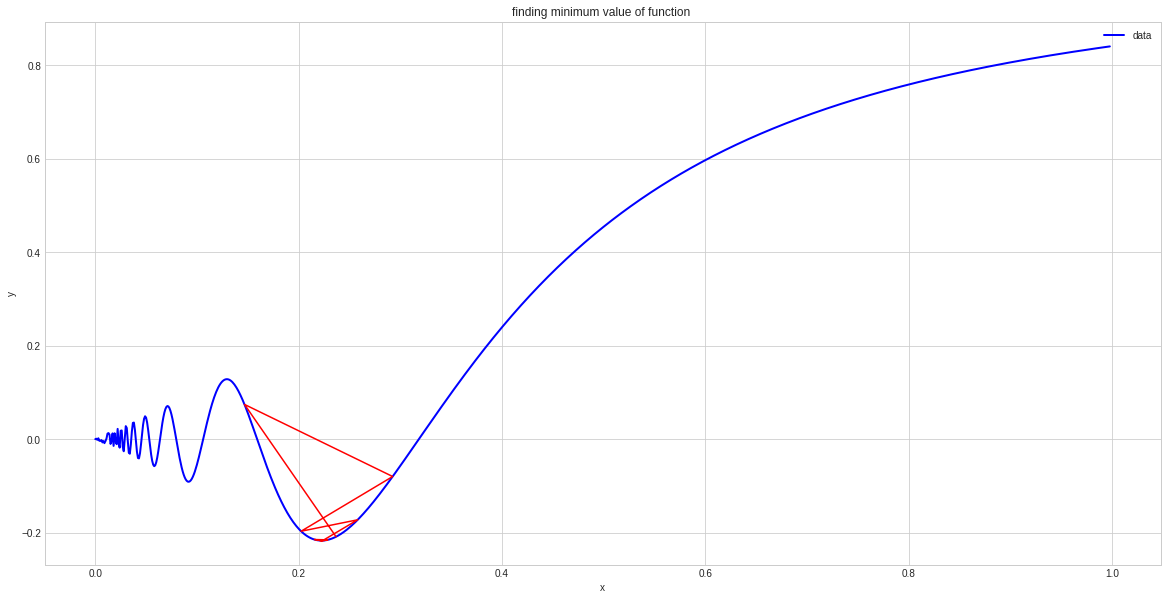

In [23]:
func='func3'
interval = [0.001,1]
n = (interval[1]-interval[0])/EPS  
n= math.floor(n)+1
X= [k* ((interval[1]-interval[0])/n) for k in range (n)]
Y= [func_list[func](x) for x in X ]
fig = plt.figure(figsize=(20,10))
plt.title("finding minimum value of function ")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()

ax.plot(X,Y,color='blue', label='data',linewidth=2)
plt.legend();
full_name =os.path.join(save_dir, 'golden_section'+func+'.csv') 
df = pd.read_csv(full_name)
data = np.array([df['x_min'],df['min_f_x']])
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

l, = plt.plot([], [], 'r-')

line_ani = animation.FuncAnimation(fig, update_line, data.shape[1], fargs=(data, l),
                                   interval=100, blit=True)

line_ani.save(os.path.join(save_dir, 'golden_section'+func+'.gif'))




#### here we visualize the resulted approximation function in comparsion to the oirgnal data, note that we don't save the optimal parameters of the functions so you should run this code after running an optimization alogrithm 

In [59]:
Approx_y = [linear_approx(res.x,x) for x in X]


<ipython-input-60-c55d5c9f318c>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


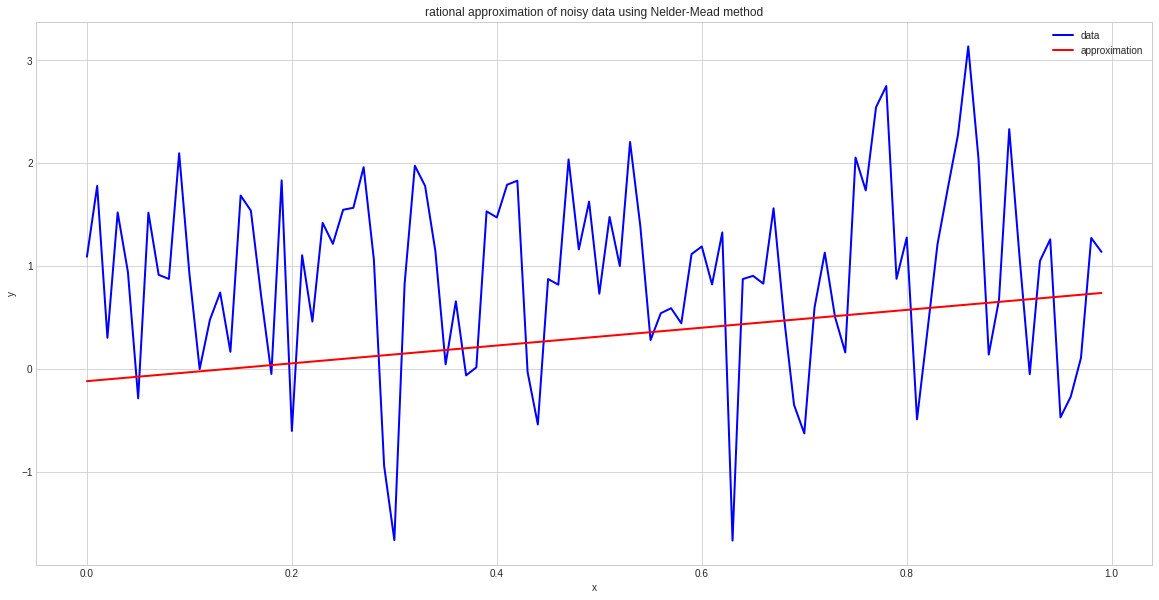

In [60]:

fig = plt.figure(figsize=(20,10))
plt.title("rational approximation of noisy data using Nelder-Mead method")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()

ax.plot(X,Y,color='blue', label='data',linewidth=2)
ax.plot(X,Approx_y,color='red', label='approximation',linewidth=2)
plt.legend();

#### in this code we visualize how gauss method finds the minimum value of the least square function, using the same random data we already generated, it saves a gif that illustrate the results. 
#### since we used scipy for Nelder-Mead and since gird search takes VERY long time, then we choose to visualize only gauss method, the data is obtained when running the gauss_method function and saved to the disk, note that you should use the same random data for visualization. 


MovieWriter ffmpeg unavailable; using Pillow instead.


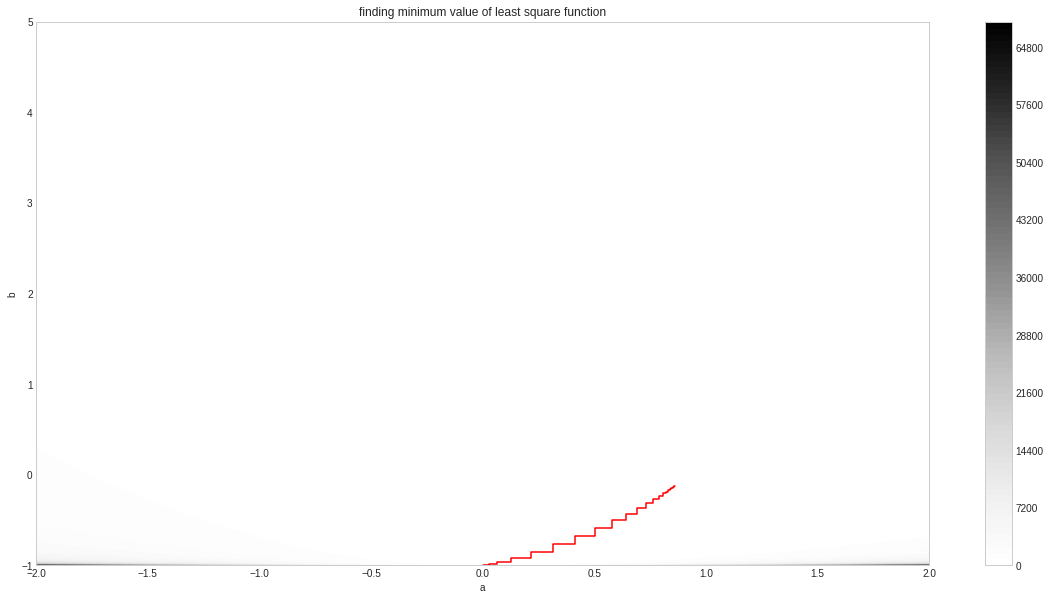

In [75]:
func='rational'

xlist = np.linspace(-2, 2, 10000)
ylist = np.linspace(-1, 5.0, 10000)
A, B = np.meshgrid(xlist, ylist)
Z = [least_squares([a,b],X,Y,func=func) for a,b in zip(A,B)] 



fig,ax=plt.subplots(1,1,figsize=(20,10))
cp = ax.contourf(A, B, Z,levels=100)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('finding minimum value of least square function')
ax.set_xlabel('a')
ax.set_ylabel('b')

full_name =os.path.join(save_dir, 'gauss_2d'+func+'.csv') 
df = pd.read_csv(full_name)
data = np.array([df['min_a'],df['min_b']])

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

l, = plt.plot([], [], 'r-')
line_ani = animation.FuncAnimation(fig, update_line, data.shape[1], fargs=(data, l),
                                   interval=100, blit=True)
line_ani.save(os.path.join(save_dir, 'gauss_2d_'+func+'.gif'))



plt.show()